In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def piecewise_constant_white_noise(t, Tdur, D, seed=None):
    if seed is not None:
        np.random.seed(seed)  # Set the random seed for reproducibility
    eta = np.random.randn(len(t))
    Ieta = np.zeros(len(t))
    for i in range(len(t)):
        Ieta[i] = eta[int(t[i] / Tdur)]
    return np.sqrt(D) * Ieta


setting up gating dynamics


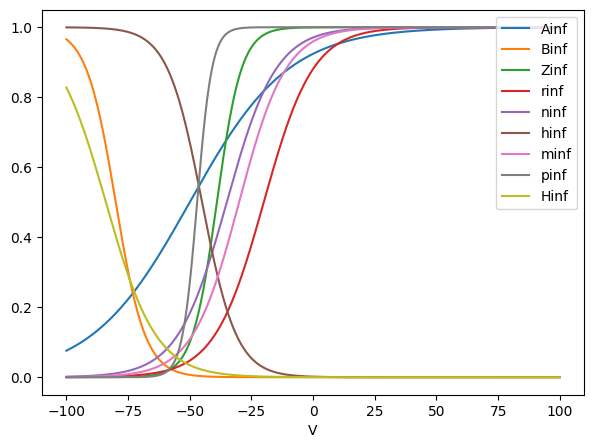

gating dynamic setup completed


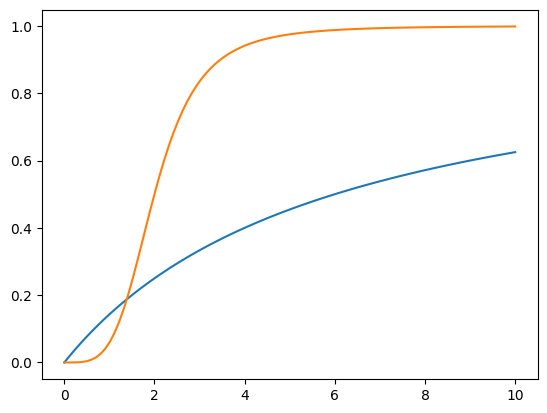

In [1879]:
print("setting up gating dynamics")
#gating varibles
tauq0 = 200
aq=2
Ca_acum = np.linspace(0.0001, 10, 100)

def minf(V):
    return 1.0/(1+np.exp(-(V--30)/9.5))
def hinf(V):
    return  1.0/(1+np.exp(-(V--45)/-7))
def tauh(V):
    return 0.1 + 0.75*(1.0/(1+np.exp(-(V--40.5)/-6)))
def ninf(V):
    return 1.0/(1+np.exp(-(V--35)/10))
def taun(V):
    return 0.1 + 0.5*(1.0/(1+np.exp(-(V--27)/-15)))
def pinf(V):
    return 1.0/(1+np.exp(-(V--47)/3))#can range from -47 to -41 #
def rinf(V):
    return 1/ (1 + np.exp(-(V--20)/10))
def Zinf(V):
    return 1.0/(1+np.exp(-(V--39)/5))
def Ainf(V):
    return 1.0/(1+np.exp(-(V--50)/20))
def Binf(V):
    return 1.0/(1+np.exp(-(V--80)/-6))
def Hinf(V):
    return 1./(1. + np.exp((V + 84.)/10.2))
def tauH(V):
    return  1./(np.exp(-17.9 - 0.116*V ) + np.exp(-1.84 + 0.09*V )) + 0.1
def cinf(V):
    return  1.0/(1+np.exp(-(V--30)/7))
def dinf(Ca_acum):
    return 1.0/(1+6/Ca_acum)
def Qinf(Ca_acum):
    return 1.0/(1+(aq**4)/(Ca_acum**4))
def Nv(V):
    return ( 1+np.tanh((V)/4))
def Nv2(V):
    return ( 1+np.tanh((V)/4))



vv = np.arange(-100,100 , 0.1)
fig = plt.figure(figsize=(7, 5))
#ax = plt.subplot(gs[0])
plt.plot(vv,Ainf(vv),label = "Ainf")
plt.plot(vv,Binf(vv),label = "Binf")
plt.plot(vv,Zinf(vv),label = "Zinf")
plt.plot(vv,rinf(vv),label = "rinf")
plt.plot(vv,ninf(vv), label = "ninf")
plt.plot(vv,hinf(vv), label = "hinf")
plt.plot(vv,minf(vv), label = "minf")
plt.plot(vv,pinf(vv), label = "pinf")
plt.plot(vv,Hinf(vv), label = "Hinf")
plt.legend(loc='upper right')
plt.xlabel("V")

# #ax = plt.subplot(gs[1])
# plt.plot(vv,taun(vv), label = "taun")
# plt.plot(vv,tauh(vv), label = "tauh")
# plt.plot(vv,tauH(vv), label = "tauH")

# plt.legend(loc='upper right')

# plt.xlabel("V")

#ax = plt.subplot(gs[2])
plt.show()
plt.plot(Ca_acum,dinf(Ca_acum))
plt.plot(Ca_acum,Qinf(Ca_acum))

print("gating dynamic setup completed")

In [939]:

def rtau(V):
    return 1/(np.exp(-17.9-0.116*V)+np.exp(-1.84+0.09*V))+0.1

def rinf(V):
    return 1/(1+np.exp((V+84)/10.2))


In [1877]:
def tauH(V):
    return  1./(np.exp(-17.9 - 0.116*V ) + np.exp(-1.84 + 0.09*V )) + 0.1


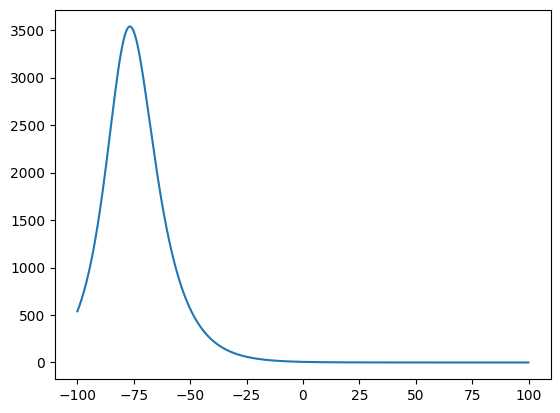

In [1878]:
plt.plot(vv,tauH(vv), label = "tauH")

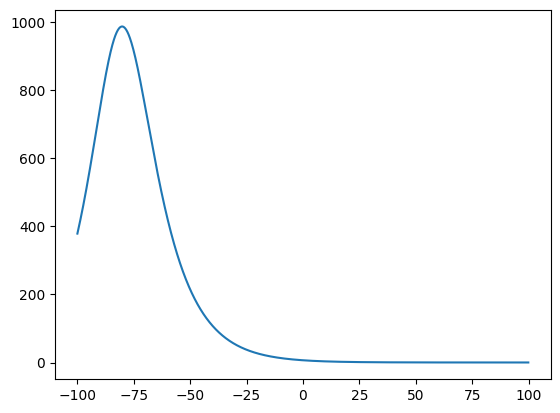

In [1875]:
plt.plot(vv,tauH(vv), label = "tauH")
#plt.plot(vv,Hinf(vv), label = "Hinf")

In [7]:
# Time
dt = 0.01 # ms
t_max = 2000 # ms
t = np.linspace(0, t_max, int(t_max/dt))# Parameters


In [6]:
noise = piecewise_constant_white_noise(t,Tdur=.1,D=.1)

In [3240]:
freqs = np.linspace(1, 100, 100)

### PHASE LOCKING VALUE ANALYSIS ###
def phase_locking_range_fixed(spike_times, t, freqs, min_spikes=3):
    PLV_freqs = np.zeros((len(freqs), spike_times.shape[1]))
    for f_idx, freq in enumerate(freqs):
        for neuron in range(spike_times.shape[1]):
            spike_times_neuron = spike_times[spike_times[:, neuron] != 0, neuron]
            if len(spike_times_neuron) < min_spikes:
                PLV_freqs[f_idx, neuron] = np.nan
                continue
            phases = (2 * np.pi * freq * spike_times_neuron / 1000.0) % (2 * np.pi)
            PLV_freqs[f_idx, neuron] = np.abs(np.sum(np.exp(1j * phases)) / len(phases))
    return PLV_freqs

In [8]:
# Gating Variables

# Excitatory RTM Equations
def RTM_m_alpha(V): return 0.32 * (V + 54.0) / (1 - np.exp(-(V + 54.0)/4))
def RTM_m_beta(V): return 0.28 * (V + 27.0) / (np.exp((V + 27.0)/5) - 1)
def RTM_m_inf(V): return RTM_m_alpha(V) / (RTM_m_alpha(V) + RTM_m_beta(V))

def RTM_h_alpha(V): return 0.128 * np.exp(-(V + 50.0) / 18.0)
def RTM_h_beta(V): return 4.0 / (1 + np.exp(-(V + 27.0)/5))
def RTM_h_inf(V): return RTM_h_alpha(V) / (RTM_h_alpha(V) + RTM_h_beta(V))
def RTM_h_tau(V): return 1.0 / (RTM_h_alpha(V) + RTM_h_beta(V))

def RTM_n_alpha(V): return 0.032 * (V + 52.0) / (1 - np.exp(-(V + 52.0)/5))
def RTM_n_beta(V): return 0.5 * np.exp(-(V + 57.0) / 40.0)
def RTM_n_inf(V): return RTM_n_alpha(V) / (RTM_n_alpha(V) + RTM_n_beta(V))
def RTM_n_tau(V): return 1.0 / (RTM_n_alpha(V) + RTM_n_beta(V))

# Inhibitory WB Equations
def WB_m_alpha(V): return 0.1 * (V + 35.0) / (1 - np.exp(-(V + 35.0)/10))
def WB_m_beta(V): return 4.0 * np.exp(-(V + 60.0)/18)
def WB_m_inf(V): return WB_m_alpha(V) / (WB_m_alpha(V) + WB_m_beta(V))

def WB_h_alpha(V): return 0.35 * np.exp(-(V + 58.0)/20)
def WB_h_beta(V): return 5 / (1 + np.exp(-(V + 28.0)/10))
def WB_h_inf(V): return WB_h_alpha(V) / (WB_h_alpha(V) + WB_h_beta(V))
def WB_h_tau(V): return 1.0 / (WB_h_alpha(V) + WB_h_beta(V))

def WB_n_alpha(V): return 0.05 * (V + 34.0) / (1 - np.exp(-(V + 34.0)/10))
def WB_n_beta(V): return 0.625 * np.exp(-(V + 44.0)/80)
def WB_n_inf(V): return WB_n_alpha(V) / (WB_n_alpha(V) + WB_n_beta(V))
def WB_n_tau(V): return 1.0 / (WB_n_alpha(V) + WB_n_beta(V))

# Synapse
def syn_tanh(V): return (1 + np.tanh((V/10.0)))/2
tau_rise_I = 0.5 # ms
tau_decay_I = 9.0 # ms
tau_rise_E = 0.5 # ms
tau_decay_E = 3.0 # ms
V_test = np.linspace(-100, 100, 1000)

# Plotting the Gating Variables
# plt.figure(figsize=(10, 5))
# plt.plot(V_test, RTM_m_inf(V_test), label='m_inf')
# plt.plot(V_test, RTM_h_inf(V_test), label='h_inf')
# plt.plot(V_test, RTM_n_inf(V_test), label='n_inf')
# plt.plot(V_test, syn_tanh(V_test), label='syn_tanh')
# plt.legend()
# plt.show()

# # Plotting the Time Constants
# plt.figure(figsize=(10, 5))
# plt.plot(V_test, RTM_h_tau(V_test), label='h_tau')
# plt.plot(V_test, RTM_n_tau(V_test), label='n_tau')
# plt.legend()
# plt.show()


In [3232]:
# WB Inhibitory Neuron
def WB_m_alpha(V): return 0.1 * (V + 35.0) / (1 - np.exp(-(V + 35.0)/10))
def WB_m_beta(V): return 4.0 * np.exp(-(V + 60.0)/18)
def WB_m_inf(V): return WB_m_alpha(V) / (WB_m_alpha(V) + WB_m_beta(V))

def WB_h_alpha(V): return 0.35 * np.exp(-(V + 58.0)/20)
def WB_h_beta(V): return 5 / (1 + np.exp(-(V + 28.0)/10))
def WB_h_inf(V): return WB_h_alpha(V) / (WB_h_alpha(V) + WB_h_beta(V))
def WB_h_tau(V): return 1.0 / (WB_h_alpha(V) + WB_h_beta(V))

def WB_n_alpha(V): return 0.05 * (V + 34.0) / (1 - np.exp(-(V + 34.0)/10))
def WB_n_beta(V): return 0.625 * np.exp(-(V + 44.0)/80)
def WB_n_inf(V): return WB_n_alpha(V) / (WB_n_alpha(V) + WB_n_beta(V))
def WB_n_tau(V): return 1.0 / (WB_n_alpha(V) + WB_n_beta(V))

def syn_tanh(V): return (1 + np.tanh((V/10.0)))/2

def WB_Neuron_update(j, t, V, h, n, Iapp, s_E, s_I, s_O, EI, II, OI, p_EI, p_II, p_OI, NE, NI, NO, nested):
  # Store Previous Value of Voltage
  V_prev = V.copy()

  # Synapse Stuff
  if nested == 1:
    g_II = 0.3#0.3 # mS/cm^2
    g_EI = 0.2#0.2#0.25 # mS/cm^2
    g_OI = 0.5#0.08#0.5 # mS/cm^2
  else:
    g_II = 0 # mS/cm^2
    g_EI = 0 # mS/cm^2
    g_OI = 0.0 # mS/cm^2

  tau_rise = 0.5 # ms
  tau_decay = 9.0 # ms
  tau_peak = 0.5 # ms

  if p_EI > 0:
    g_bar_EI = g_EI * EI / (p_EI * NE)
  else:
    g_bar_EI = np.zeros(NE)
  if p_II > 0:
    g_bar_II = g_II * II / (p_II * NI)
  else:
    g_bar_II = np.zeros(NI)
  if p_OI > 0:
    g_bar_OI = g_OI * OI / (p_OI * NO)
  else:
    g_bar_OI = np.zeros(NO)

  E_syn_I = -75.0 # mV
  E_syn_E = 0.0 # mV
  E_syn_O = -75.0 # mV

  # Capacitance
  Cm = 1.0 # uF/cm^2

  # Reversal Potentials
  WB_E_Na = 55.0 # mV
  WB_E_K = -90.0 # mV
  WB_E_L = -65.0 # mV

  # Conductances
  WB_g_Na = 35.0 # mS/cm^2
  WB_g_K = 9.0 # mS/cm^2
  WB_g_L = 0.1 # mS/cm^2

  amp_noise = 0
  
  # Forward Euler
  V = V + (Iapp - WB_g_L * (V - WB_E_L) - WB_g_Na * WB_m_inf(V)**3 * h * (V - WB_E_Na) 
           - WB_g_K * n**4 * (V - WB_E_K) - np.sum(np.multiply(g_bar_EI, s_E)) * (V - E_syn_E) 
           - np.sum(np.multiply(g_bar_II, s_I)) * (V - E_syn_I) 
           - np.sum(np.multiply(g_bar_OI, s_O)) * (V - E_syn_O))/Cm * dt
  h = h + (WB_h_inf(V_prev) - h)/WB_h_tau(V_prev) * dt
  n = n + (WB_n_inf(V_prev) - n)/WB_n_tau(V_prev) * dt
  s_I[j] = s_I[j] + (np.exp(-t/tau_peak) * (1 - s_I[j]) / tau_rise - s_I[j] / tau_decay) * dt
  return V, h, n, s_I[j]

In [ ]:
# ab(v)=0.000009/exp((v-26)/18.5)
# bb(v)=0.014/(0.2+exp(-(v+70)/11))
# minf(v)=am(v)/(am(v)+bm(v))
# hinf(v)=ah(v)/(ah(v)+bh(v))
# ninf(v)=an(v)/(an(v)+bn(v))
# ainf(v)=1/(1+exp(-(v+14)/16.6))
# binf(v)=1/(1+exp((v+71)/7.3))
# #rinf(v)=1/(1+exp((v+84)/10.2))
# rinf(v)=1/(1+exp((v+rth)/rsl))
# mtau(v)=1.0/(am(v)+bm(v))
# htau(v)=1.0/(ah(v)+bh(v))
# ntau(v)=1.0/(an(v)+bn(v))
# atau(v)=taua
# btau(v)=1.0/(ab(v)+bb(v))
# rtau(v)=1/(exp(-17.9-0.116*v)+exp(-1.84+0.09*v))+rbase
# #

In [3293]:
# O-LM Interneuron
def OLM_m_alpha(V): return 0.1 * (V + 38.0) / (1 - np.exp(-(V + 38.0)/10))
def OLM_m_beta(V): return 4.0 * np.exp(-(V + 65.0)/18)
def OLM_m_inf(V): return OLM_m_alpha(V) / (OLM_m_alpha(V) + OLM_m_beta(V))

def OLM_h_alpha(V): return 0.07 * np.exp(-(V + 63.0)/20)
def OLM_h_beta(V): return 1.0 / (1 + np.exp(-(V + 33.0)/10))
def OLM_h_inf(V): return OLM_h_alpha(V) / (OLM_h_alpha(V) + OLM_h_beta(V))
def OLM_h_tau(V): return 1.0 / (OLM_h_alpha(V) + OLM_h_beta(V))

def OLM_n_alpha(V): return 0.018 * (V - 25.0) / (1 - np.exp(-(V - 25.0)/25.0))
def OLM_n_beta(V): return 0.0036 * (35 - V) / (1 - np.exp(-(35 - V)/12.0))
def OLM_n_inf(V): return OLM_n_alpha(V) / (OLM_n_alpha(V) + OLM_n_beta(V))
def OLM_n_tau(V): return 1.0 / (OLM_n_alpha(V) + OLM_n_beta(V))

def OLM_r_inf(V): return 1.0 / (1 + np.exp((V + 84.0)/10.2))
def OLM_r_tau(V): return 1./(np.exp(-14.59 - 0.086*V ) + np.exp(-1.87 + 0.0701*V )) + 0.1#1./(np.exp(-17.9 - 0.116*V ) + np.exp(-1.84 + 0.09*V )) + 0.1 

def OLM_a_inf(V): return 1.0 / (1 + np.exp(-(V + 14.0)/16.6))
def OLM_a_tau(V): return 5.0

def OLM_b_inf(V): return 1.0 / (1 + np.exp((V + 71.0)/7.3))
def OLM_b_tau(V): return 1.0 / ((0.09 / np.exp(-(V - 26.0) / 28.5)) + (0.014 / (0.2 + np.exp(-(V + 70.0) / 11.0))))

def syn_tanh(V): return (1 + np.tanh((V/10.0)))/2

def OLM_Neuron_update(j, t, V, h, n, r, a, b, Iapp, s_E, s_I, s_O, EO, IO, OO, p_EO, p_IO, p_OO, NE, NI, NO, nested):
  # Store Previous Value of Voltage
  V_prev = V.copy()

  # Synapse Stuff
  if nested == 1:
    g_IO = 0.6#0.6 # mS/cm^2
    g_EO = 0.15#0.15# mS/cm^2
    g_OO = 0.00 # mS/cm^2
  else:
    g_IO = 0.0 # mS/cm^2
    g_EO = 0.0 # mS/cm^2
    g_OO = 0.00 # mS/cm^2

  tau_rise = 0.5 # ms
  tau_decay = 20.0 # ms
  tau_peak = 0.5 # ms

  if p_EO > 0:
    g_bar_EO = g_EO * EO / (p_EO * NE)
  else:
    g_bar_EO = np.zeros(NO)
  if p_IO > 0:
    g_bar_IO = g_IO * IO / (p_IO * NI)
  else:
    g_bar_IO = np.zeros(NI)
  if p_OO > 0:
    g_bar_OO = g_OO * OO / (p_OO * NO)
  else:
    g_bar_OO = np.zeros(NO)

  E_syn_I = -75.0 # mV
  E_syn_E = 0.0 # mV
  E_syn_O = -75.0 # mV

  # Capacitance
  Cm = 1.3 # uF/cm^2

  # Reversal Potentials
  OLM_E_Na = 90.0 # mV
  OLM_E_K = -100.0 # mV
  OLM_E_L = -70.0 # mV
  OLM_E_h = -32.9 # mV
  OLM_E_A = -90.0 # mV

  # Conductances
  OLM_g_Na = 30.0 # mS/cm^2
  OLM_g_K = 23.0 # mS/cm^2
  OLM_g_L = 0.05 # mS/cm^2
  OLM_g_h = 12 # mS/cm^2
  OLM_g_A = 21#22.0 # mS/cm^2
  OLM_g_NaP = 0.0 # mS/cm^2

  amp_noise = 0
  
  # Forward Euler
  V = V + (Iapp - OLM_g_L * (V - OLM_E_L) - OLM_g_Na * OLM_m_inf(V)**3 * h * (V - OLM_E_Na) - OLM_g_NaP*pinf(V)*(V-OLM_E_Na)
           - OLM_g_K * n**4 * (V - OLM_E_K) - OLM_g_h * r * (V - OLM_E_h) - OLM_g_A * a * b * (V - OLM_E_A) 
           - np.sum(np.multiply(g_bar_EO, s_E)) * (V - E_syn_E) - np.sum(np.multiply(g_bar_IO, s_I)) * (V - E_syn_I)
            - np.sum(np.multiply(g_bar_OO, s_O)) * (V - E_syn_O))/Cm * dt
  h = h + (OLM_h_inf(V_prev) - h)/OLM_h_tau(V_prev) * dt
  n = n + (OLM_n_inf(V_prev) - n)/OLM_n_tau(V_prev) * dt
  r = r + (OLM_r_inf(V_prev) - r)/OLM_r_tau(V_prev) * dt
  a = a + (OLM_a_inf(V_prev) - a)/OLM_a_tau(V_prev) * dt
  b = b + (OLM_b_inf(V_prev) - b)/OLM_b_tau(V_prev) * dt
  s_O[j] = s_O[j] + (np.exp(-t/tau_peak) * (1 - s_O[j]) / tau_rise - s_O[j] / tau_decay) * dt
   
  return V, h, n, r, a, b, s_O[j]

In [3325]:
def RTM_Neuron_update(j, t, V, Vd, h, n, rv, Z, B, H, C, Ca_acum, Q,
                      Iapp, s_E, s_I, s_O, EE, IE, OE, p_EE, p_IE, p_OE, NE, NI, NO, nested, noise=0,dt=0.1):
  
    # Store previous values for gating updates
    V_prev, Vd_prev, Ca_prev = V.copy(), Vd.copy(), Ca_acum.copy()

    # Parameters 
    Cm = 1.0
    El = -58 #-56
    Gl, Gl2 = 0.1, 0.1
    Ena, Ek, Eh = 60, -75, -32.9
    Gna, Gk, Gnap = 0,0,0#55, 10, 0.
    Gna2, Gk2 = 0, 0
    Gm, Gh = 3,0 #1,3 #3,1
    Gsd, Gds = 0.2, 0.02  # soma-dendrite coupling
    # External applied current
    Amp_Vs, Amp_Vd = 0,1

    # Synapse Stuff
    if nested == 1:
        g_EE = 0.0 # mS/cm^2
        g_IE = 0.4#0.4#0.25 # mS/cm^2
        g_OE = 0.7#0.4#0.9 # mS/cm^2
    
    # g_EI = 0.02
    # g_EO = 0.1

    else:
        g_EE = 0.0 # mS/cm^2
        g_IE = 0 # mS/cm^2
        g_OE = 0.0 # mS/cm^2

    # g_EI = 0
    # g_EO = 0

    tau_rise = 0.5 # ms
    tau_decay = 3.0 # ms
    tau_peak = 0.5 # ms

    if p_EE > 0:
        g_bar_EE = g_EE * EE / (p_EE * NE)
    else:
        g_bar_EE = np.zeros(NE)
    if p_IE > 0:
        g_bar_IE = g_IE * IE / (p_IE * NI)
    else:
        g_bar_IE = np.zeros(NE)
    if p_OE > 0:
        g_bar_OE = g_OE * OE / (p_OE * NO)
    else:
        g_bar_OE = np.zeros(NO)


    E_syn_I = -75.0 # mV
    E_syn_E = 0.0 # mV
    I_syn_E = 0.0
    E_syn_O = -75.0 # mV
    O_syn_E = 0

    amp_noise = 0

  
    k1Vs = (-Gl*(V-El) - Gna*(minf(V)**3)*h*(V-Ena) - Gnap*pinf(V)*(V-Ena)
             - Gk*(n**4)*(V-Ek) - Gm*Z*(V-Ek) - Gsd*(V-Vd) + Amp_Vs*Iapp
             - np.sum(np.multiply(g_bar_EE, s_E)) * (V - E_syn_E) 
             - np.sum(np.multiply(g_bar_IE, s_I)) * (V - E_syn_I)+noise)/Cm
    
    k1Vd = (-Gl2*(Vd-El) - Gh*H*(Vd-Eh) - Gds*(Vd-V)
             - Gna2*(minf(Vd)**3)*rv*(Vd-Ena) - Gk2*(rv**4)*(Vd-Ek) + Amp_Vd*Iapp
             - np.sum(np.multiply(g_bar_OE, s_O)) * (Vd - E_syn_O)+noise)/Cm

    k1h = (hinf(V_prev) - h)/tauh(V_prev)
    k1n = (ninf(V_prev) - n)/taun(V_prev)
    k1rv = (rinf(V_prev) - rv)
    k1Z = (Zinf(V_prev) - Z)/75
    k1B = (Binf(V_prev) - B)/15
    k1H = (Hinf(Vd_prev) - H)/tauH(Vd_prev)
    k1C = (cinf(V_prev) - C)/2
    k1Ca = (-0.13*(0*rv**2)*(V_prev-120) - Ca_acum)/13
    k1Q = (Qinf(Ca_prev) - Q)/450

    V1 = V + k1Vs*dt
    Vd1 = Vd + k1Vd*dt
    h1 = h + k1h*dt
    n1 = n + k1n*dt
    rv1 = rv + k1rv*dt
    Z1 = Z + k1Z*dt
    B1 = B + k1B*dt
    H1 = H + k1H*dt
    C1 = C + k1C*dt
    Ca1 = Ca_acum + k1Ca*dt
    Q1 = Q + k1Q*dt

    k2Vs = (-Gl*(V1-El) - Gna*(minf(V1)**3)*h1*(V1-Ena) - Gnap*pinf(V1)*(V1-Ena)
             - Gk*(n1**4)*(V1-Ek) - Gm*Z1*(V1-Ek) - Gsd*(V1-Vd1) + Amp_Vs*Iapp
             - np.sum(np.multiply(g_bar_EE, s_E)) * (V - E_syn_E) 
             - np.sum(np.multiply(g_bar_IE, s_I)) * (V - E_syn_I)+noise)/Cm
    
    k2Vd = (-Gl2*(Vd1-El) - Gh*H1*(Vd1-Eh) - Gds*(Vd1-V1)
             - Gna2*(minf(Vd1)**3)*rv1*(Vd1-Ena) - Gk2*(rv1**4)*(Vd1-Ek) + Amp_Vd*Iapp
             - np.sum(np.multiply(g_bar_OE, s_O)) * (Vd - E_syn_O)+noise)/Cm

    k2h = (hinf(V1) - h1)/tauh(V1)
    k2n = (ninf(V1) - n1)/taun(V1)
    k2rv = (rinf(V1) - rv1)
    k2Z = (Zinf(V1) - Z1)/75
    k2B = (Binf(V1) - B1)/15
    k2H = (Hinf(Vd1) - H1)/tauH(Vd1)
    k2C = (cinf(V1) - C1)/2
    k2Ca = (-0.13*(0*rv1**2)*(V1-120) - Ca1)/13
    k2Q = (Qinf(Ca1) - Q1)/450

    # Update variables
    V += 0.5*(k1Vs + k2Vs)*dt
    Vd += 0.5*(k1Vd + k2Vd)*dt
    h += 0.5*(k1h + k2h)*dt
    n += 0.5*(k1n + k2n)*dt
    rv += 0.5*(k1rv + k2rv)*dt
    Z += 0.5*(k1Z + k2Z)*dt
    B += 0.5*(k1B + k2B)*dt
    H += 0.5*(k1H + k2H)*dt
    C += 0.5*(k1C + k2C)*dt
    Ca_acum += 0.5*(k1Ca + k2Ca)*dt
    Q += 0.5*(k1Q + k2Q)*dt

    # ===============================
    # Synapse update (excitatory)
    # ===============================
    tau_rise, tau_decay, tau_peak = 0.5, 3.0, 0.5
    s_E[j] += (np.exp(-t/tau_peak)*(1-s_E[j])/tau_rise - s_E[j]/tau_decay)*dt

    return V, h, n, s_E[j], Vd, rv, Z, B, H, C, Ca_acum, Q


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

El = -58
NE = 40
#NE2 = 20
NI = 10
NO = 10

dt = 0.1
t_max = 1000
t = np.arange(0, t_max, dt)

#Ntot = NE + NE2 + NI + NO
Ntot = NE + NI + NO

V  = np.zeros((len(t), Ntot))
Vd = np.zeros_like(V)
h  = np.zeros_like(V)
n  = np.zeros_like(V)
r  = np.zeros_like(V)
a  = np.zeros_like(V)
b  = np.zeros_like(V)
rv = np.zeros_like(V)
Z  = np.zeros_like(V)
B  = np.zeros_like(V)
H  = np.zeros_like(V)
C  = np.zeros_like(V)
Ca_acum = np.zeros_like(V)
Q  = np.zeros_like(V)

Ca_acum[0, :] = 0.0001
V[0, :] = El
Vd[0, :] = El

# E1 = slice(0, NE)
# E2 = slice(NE, NE+NE2)
# I  = slice(NE+NE2, NE+NE2+NI)
# O  = slice(NE+NE2+NI, Ntot)
E1 = slice(0, NE)
E2 = slice(NE, NE)
I  = slice(NE, NE+NI)
O  = slice(NE+NI, Ntot)
V[0, E1] = El
#V[0, E2] = El
V[0, I]  = -70 
V[0, O]  = -65 

#V[0, E1] = -70 + 5*np.random.randn(NE)
#V[0, E2] = -70 + 10*np.random.randn(NE2)
#V[0, I]  = -70 + 5*np.random.randn(NI)
#V[0, O]  = -65 + 5*np.random.randn(NO)

h[0, E1] = Hinf(V[0, E1])
h[0, E2] = Hinf(V[0, E2])
h[0, I]  = WB_h_inf(V[0, I])
h[0, O]  = OLM_h_inf(V[0, O])

n[0, E1] = ninf(V[0, E1])
n[0, E2] = ninf(V[0, E2])
n[0, I]  = WB_n_inf(V[0, I])
n[0, O]  = OLM_n_inf(V[0, O])

r[0, O] = OLM_r_inf(V[0, O])
a[0, O] = OLM_a_inf(V[0, O])
b[0, O] = OLM_b_inf(V[0, O])

s_E1 = np.zeros(NE)
#s_E2 = np.zeros(NE2)
s_I  = np.zeros(NI)
s_O  = np.zeros(NO)

t_spike = 1000*np.ones(Ntot)
spike_times = np.zeros((len(t), Ntot))

EE1 = np.ones((NE, NE))
#EE2 = np.ones((NE2, NE2))
IE1 = np.ones((NI, NE))
#IE2 = np.ones((NI, NE2))
OE1 = np.ones((NO, NE))
#OE2 = np.ones((NO, NE2))
#EI  = np.ones((NE+NE2, NI))
EI  = np.ones((NE, NI))
II  = np.ones((NI, NI))
OI  = np.ones((NO, NI))
#EO  = np.ones((NE+NE2, NO))
EO  = np.ones((NE, NO))
IO  = np.ones((NI, NO))
OO  = np.ones((NO, NO))

Iapp_E1 = np.ones((len(t), NE))*0#*-3
#Iapp_E2 = np.ones((len(t), NE2))*0#*-3
Iapp_I  = np.ones((len(t), NI)) * 0
Iapp_O  = np.ones((len(t), NO))* 0
#Iapp_E1 = Iapp_E2 = np.array([zap_input(i, 5, dt) for i in range(N)]) * -1



#Ntot = NE + NE2 + NI + NO
Tdur = .1
D = 10
noise_all = np.zeros((len(t), Ntot))
amp_noise = 0
for idx in range(Ntot):
    noise_all[:, idx] = piecewise_constant_white_noise(t, Tdur, D)

for i in range(len(t)-1):
    #sE1p, sE2p, sIp, sOp = s_E1.copy(), s_E2.copy(), s_I.copy(), s_O.copy()
    sE1p, sIp, sOp = s_E1.copy(), s_I.copy(), s_O.copy()
    nested = int(i > 0000)
    
    for j in range(NE):
        idx = j
        noise_value = noise_all[i, idx] * amp_noise
        V[i+1,idx],h[i+1,idx],n[i+1,idx],s_E1[j],Vd[i+1,idx],rv[i+1,idx],Z[i+1,idx],B[i+1,idx],H[i+1,idx],C[i+1,idx],Ca_acum[i+1,idx],Q[i+1,idx] = RTM_Neuron_update(
            j,t_spike[idx],V[i,idx],Vd[i,idx],h[i,idx],n[i,idx],rv[i,idx],Z[i,idx],B[i,idx],H[i,idx],C[i,idx],Ca_acum[i,idx],Q[i,idx],
            Iapp_E1[i, j],sE1p,sIp,sOp,EE1[:,j],IE1[:,j],OE1[:,j],1,1,1,NE,NI,NO,nested,noise=noise_value)
        #V[i+1,idx] += noise[idx]
        if V[i+1,idx]>-10 and V[i,idx]<=-10:
            spike_times[i,idx]=t[i]; t_spike[idx]=0

    # for j in range(NE2):
    #     idx = NE+j
    #     noise_value = noise_all[i, idx] * amp_noise
    #     V[i+1,idx],h[i+1,idx],n[i+1,idx],s_E2[j],Vd[i+1,idx],rv[i+1,idx],Z[i+1,idx],B[i+1,idx],H[i+1,idx],C[i+1,idx],Ca_acum[i+1,idx],Q[i+1,idx] = RTM2_Neuron_update(
    #         j,t_spike[idx],V[i,idx],Vd[i,idx],h[i,idx],n[i,idx],rv[i,idx],Z[i,idx],B[i,idx],H[i,idx],C[i,idx],Ca_acum[i,idx],Q[i,idx],
    #         Iapp_E2[i, j],sE2p,sIp,sOp,EE2[:,j],IE2[:,j],OE2[:,j],1,1,1,NE2,NI,NO,nested,noise=noise_value)
    #     #V[i+1,idx] += noise[idx]
    #     if V[i+1,idx]>0 and V[i,idx]<=0:
    #         spike_times[i,idx]=t[i]; t_spike[idx]=0

###Note if you want to add back in second E pop. then you need to add NE2 back to the idx
    for j in range(NI):
        idx = NE+j
        V[i+1,idx],h[i+1,idx],n[i+1,idx],s_I[j] = WB_Neuron_update(
            j,t_spike[idx],V[i,idx],h[i,idx],n[i,idx],
            Iapp_I[i,j],np.r_[sE1p],sIp,sOp,EI[:,j],II[:,j],OI[:,j],1,1,1,NE,NI,NO,nested)
        if V[i+1,idx]>0 and V[i,idx]<=0:
            spike_times[i,idx]=t[i]; t_spike[idx]=0

    for j in range(NO):
        idx = NE+NI+j
        #Iapp_O[:,:] = -2.4
        # Iapp_O[:,10:20] = -2.4

        V[i+1,idx],h[i+1,idx],n[i+1,idx],r[i+1,idx],a[i+1,idx],b[i+1,idx],s_O[j] = OLM_Neuron_update(
            j,t_spike[idx],V[i,idx],h[i,idx],n[i,idx],r[i,idx],a[i,idx],b[i,idx],
            Iapp_O[i,j],np.r_[sE1p],sIp,sOp,EO[:,j],IO[:,j],OO[:,j],1,1,1,NE,NI,NO,nested)
        if V[i+1,idx]>0 and V[i,idx]<=0:
            spike_times[i,idx]=t[i]; t_spike[idx]=0

    t_spike += dt


E1 = slice(0, NE)
E2 = slice(NE, NE)
I  = slice(NE, NE+NI)
O  = slice(NE+NI, Ntot)

# Raster plot
rast = [spike_times[spike_times[:, i] != 0, i] for i in range(Ntot)]
rast_colors = ['red']*NE + ['blue']*NI + ['green']*NO
plt.figure(figsize=(30, 15))
plt.eventplot(rast, colors=rast_colors)
#plt.xlim(0,500)
Z_avg = np.mean(Z[:, E1], axis=1)
plt.plot(t, Z_avg*100)
plt.axvline(x=1000, color='gray', linestyle='--')
plt.savefig("raster_plot.png", dpi=300, bbox_inches='tight')
plt.show()

# Average voltage (E1 + E2)
V_avg = np.mean(V[:, :NE], axis=1)
plt.figure(figsize=(30, 5))
plt.plot(t, V_avg)
plt.xlim(0,1000)
plt.axvline(x=1000, color='gray', linestyle='--')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.title('Average Voltage of Excitatory Neurons')
plt.savefig("V_avg_plot.png", dpi=300, bbox_inches='tight')
plt.show()

# O cells
plt.figure(figsize=(30, 5))
plt.plot(t, V[:, O])
plt.axvline(x=1000, color='gray', linestyle='--')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.title('O_cells Voltage')
plt.savefig("O_cells_voltage.png", dpi=300, bbox_inches='tight')
plt.show()

# I cells
plt.figure(figsize=(30, 5))
plt.plot(t, V[:, I])
plt.axvline(x=1000, color='gray', linestyle='--')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.title('I_cells Voltage')
plt.savefig("I_cells_voltage.png", dpi=300, bbox_inches='tight')
plt.show()

# E cells (both populations)
plt.figure(figsize=(30, 5))
plt.plot(t, V[:, E1], color='red')
plt.plot(t, V[:, E2], color='orange')
plt.axvline(x=1000, color='gray', linestyle='--')
plt.xlim(0, 1000)
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.title('E_cells Voltage')
plt.savefig("E_cells_voltage.png", dpi=300, bbox_inches='tight')
plt.show()

# H current (O cells)
plt.figure(figsize=(30, 5))
plt.plot(t, r[:, O])
plt.axvline(x=1000, color='gray', linestyle='--')
plt.ylim(-0.01, 0.01)
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.title('H_current')
plt.savefig("H_current.png", dpi=300, bbox_inches='tight')
plt.show()

PLV_all = phase_locking_range_fixed(spike_times, t, freqs, min_spikes=3)  # shape: (num_freqs, num_neurons)
PLV_matrix = PLV_all.T  # neurons x freqs

plt.figure(figsize=(12, 6))
im = plt.imshow(PLV_matrix, 
                aspect='auto', 
                origin='lower',  # neuron 0 at bottom
                extent=[freqs[0], freqs[-1], 0, Ntot],
                cmap='inferno')

plt.colorbar(im, label='PLV')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Neuron #')
plt.title('Neuron Phase Locking Value (PLV) Heatmap')
plt.show()
### AVERAGE FIRING RATES ###

tot_spikes_E = 0
tot_spikes_E2 = 0
tot_spikes_I = 0
tot_spikes_O = 0

for k in range(NE):
    spike_per_neuron = len(spike_times[spike_times[:, k] != 0, k])
    tot_spikes_E += spike_per_neuron
# for k in range(NE2):
#     spike_per_neuron = len(spike_times[spike_times[:, NE+k] != 0, NE+k])
#     tot_spikes_E2 += spike_per_neuron
for k in range(NI):
    spike_per_neuron = len(spike_times[spike_times[:, NE+k] != 0, NE+k])
    tot_spikes_I += spike_per_neuron
for k in range(NO):
    spike_per_neuron = len(spike_times[spike_times[:, NE+NI+k] != 0, NE+NI+k])
    tot_spikes_O += spike_per_neuron
       
print(" total spikes Excitatory: ", tot_spikes_E)
print(" Average firing rate Excitatory: ", 1000*(tot_spikes_E/(t_max*NE)), " Hz")
# print(" total spikes Excitatory2: ", tot_spikes_E2)
# print(" Average firing rate Excitatory2: ", 1000*(tot_spikes_E2/(t_max*NE2)), " Hz")
print(" total spikes inhibitory: ", tot_spikes_I)
print(" Average firing rate Inhibitory: ", 1000*(tot_spikes_I/(t_max*NI)), " Hz")
print(" total spikes OLM: ", tot_spikes_O)
print(" Average firing rate OLM: ", 1000*(tot_spikes_O/(t_max*NO)), " Hz")


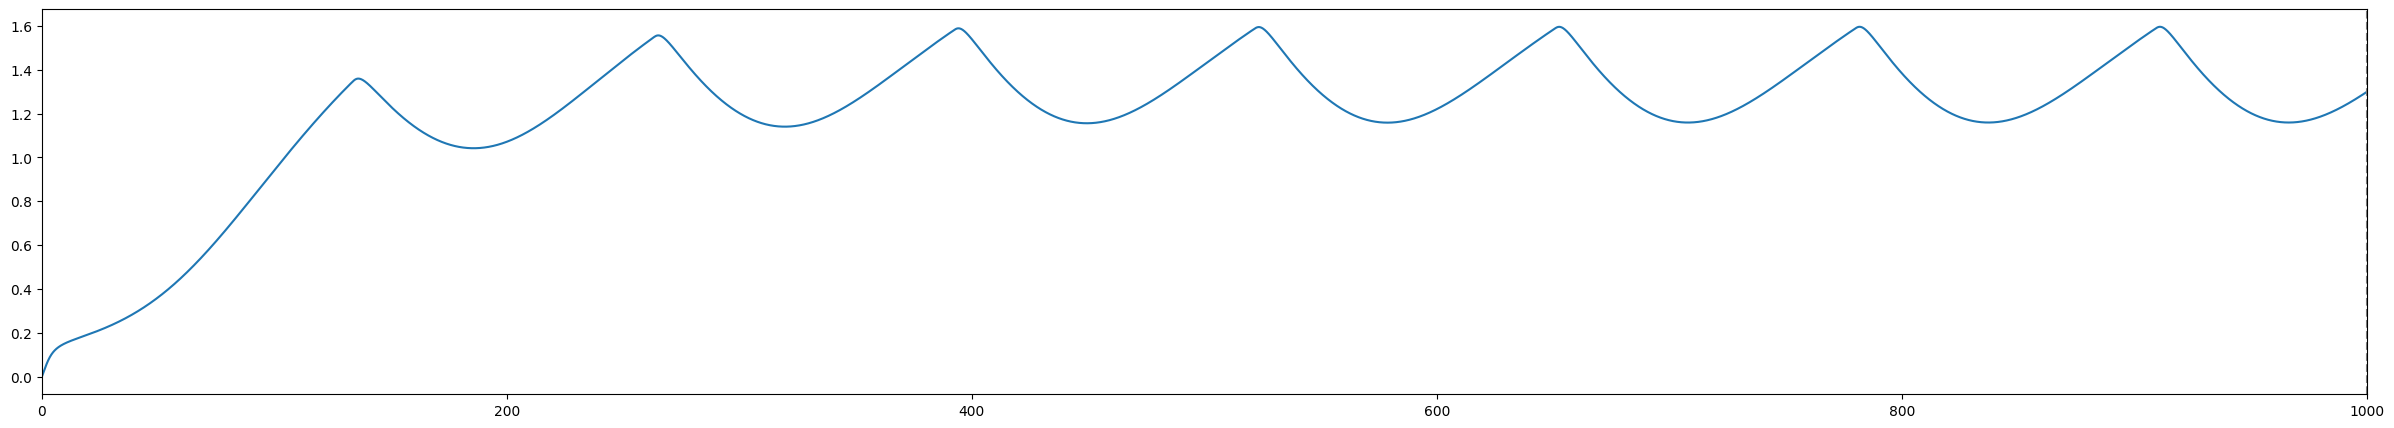

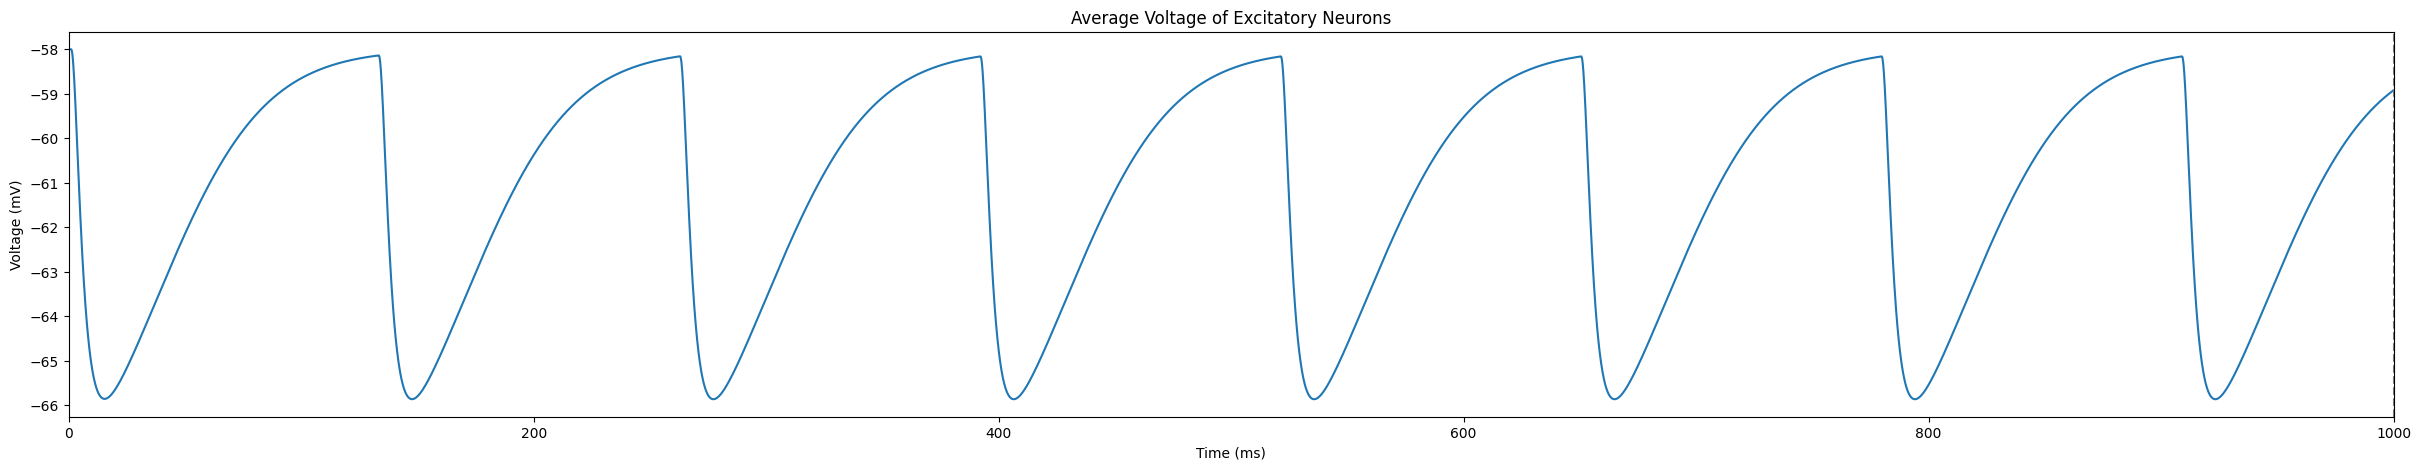

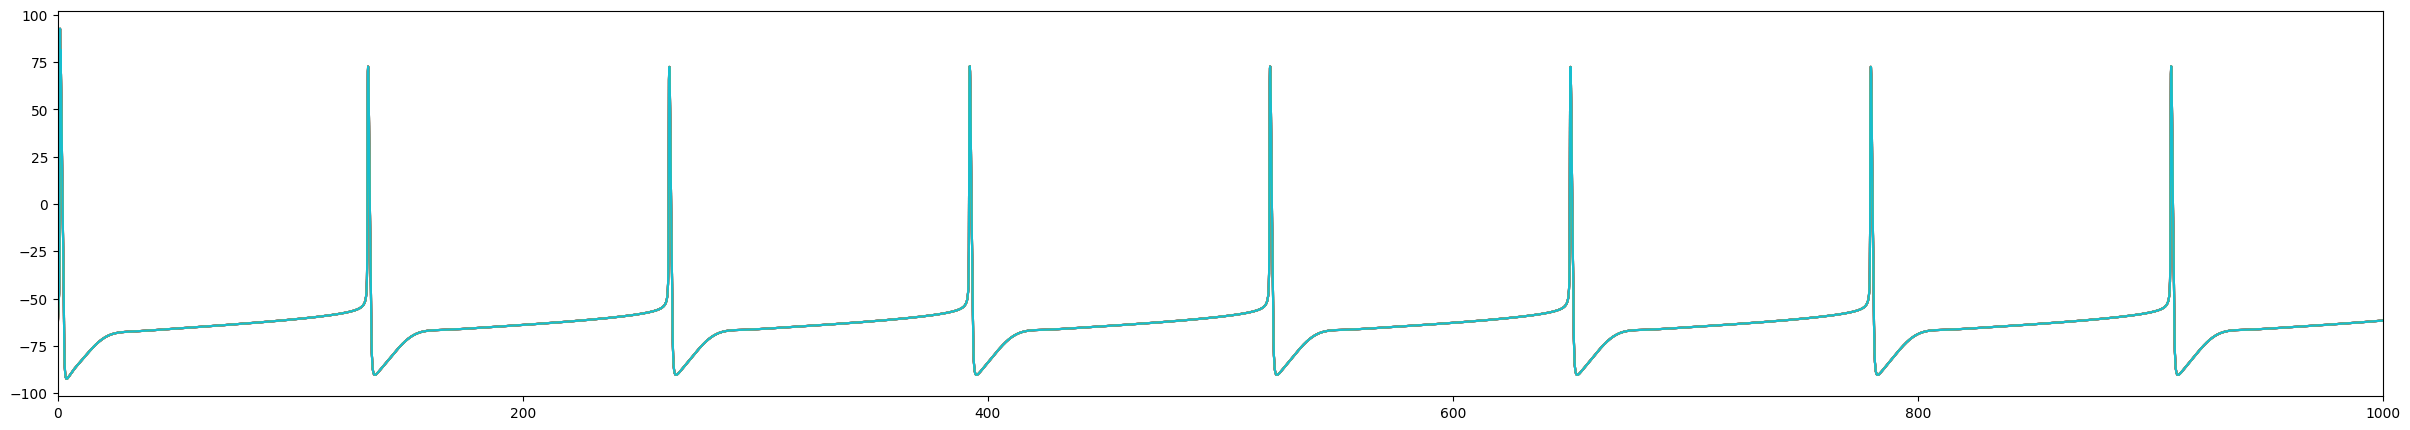

In [3324]:
Z_avg = np.mean(Z[:, E1], axis=1)
plt.figure(figsize=(30, 5))
plt.plot(t, Z_avg*100)
plt.xlim(0,1000)
plt.axvline(x=1000, color='gray', linestyle='--')
# plt.savefig("raster_plot.png", dpi=300, bbox_inches='tight')
# plt.show()

# Average voltage (E1 + E2)
V_avg = np.mean(V[:, :NE], axis=1)
plt.figure(figsize=(30, 5))
plt.plot(t, V_avg)
# plt.plot(t, V[:, O])
#plt.ylim(-50,-80)
plt.xlim(0,1000)
plt.axvline(x=1000, color='gray', linestyle='--')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.title('Average Voltage of Excitatory Neurons')
plt.savefig("V_avg_plot.png", dpi=300, bbox_inches='tight')
plt.show()
plt.figure(figsize=(30, 5))
plt.plot(t, V[:, O])
plt.xlim(0,1000)
plt.show()

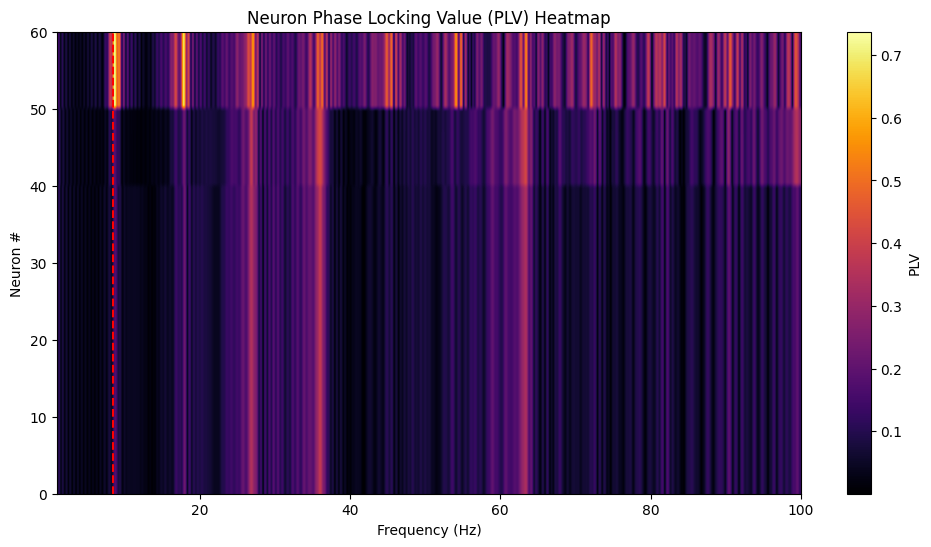

In [3190]:
plt.figure(figsize=(12, 6))
im = plt.imshow(PLV_matrix, 
                aspect='auto', 
                origin='lower',  # neuron 0 at bottom
                extent=[freqs[0], freqs[-1], 0, Ntot],
                cmap='inferno')

plt.colorbar(im, label='PLV')
plt.axvline(x=8.5, color='red', linestyle='--')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Neuron #')
plt.title('Neuron Phase Locking Value (PLV) Heatmap')
plt.show()

E max PLV = 0.994 at 15.77 Hz
I max PLV = 0.994 at 15.77 Hz
O max PLV = 0.964 at 31.52 Hz


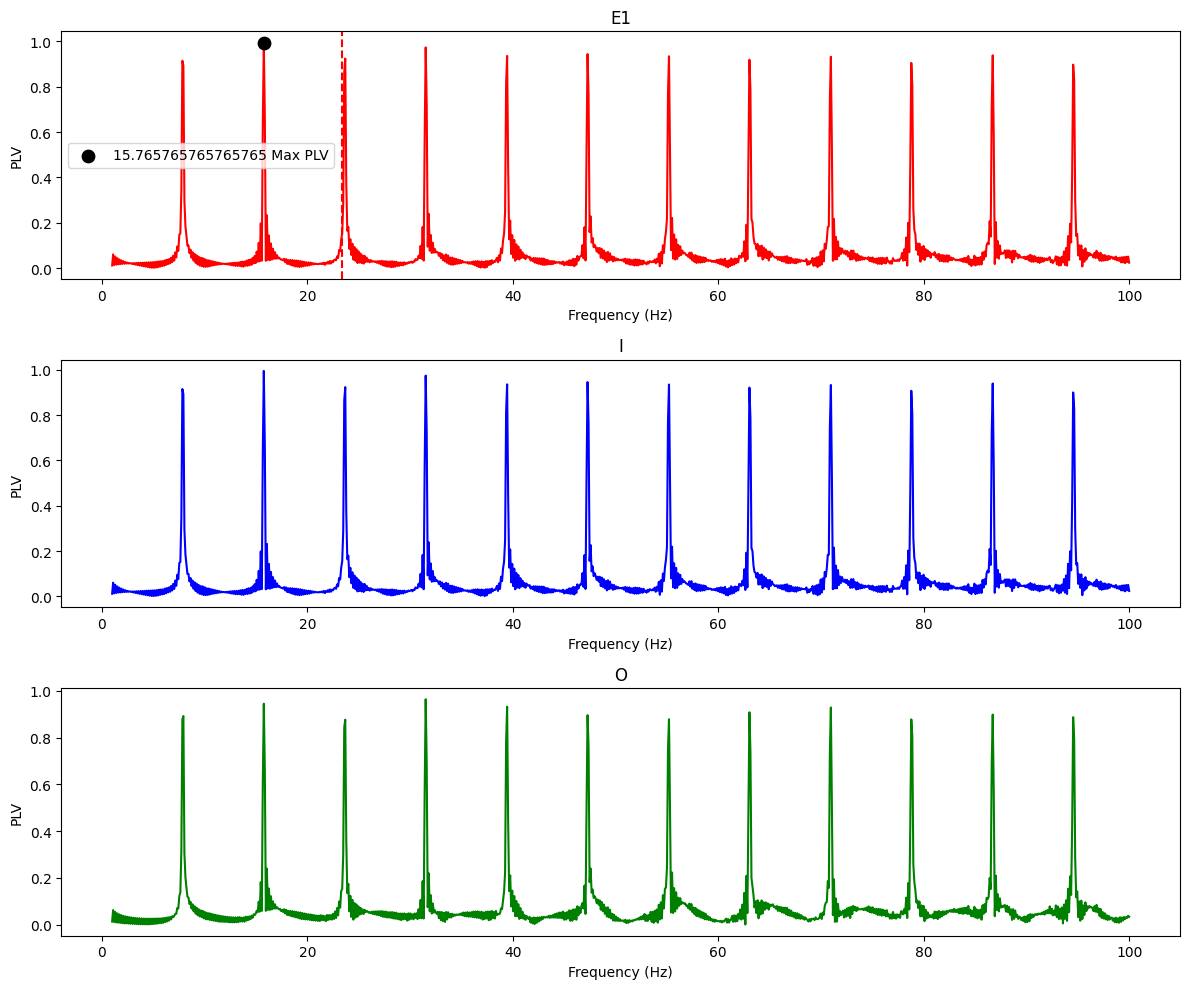

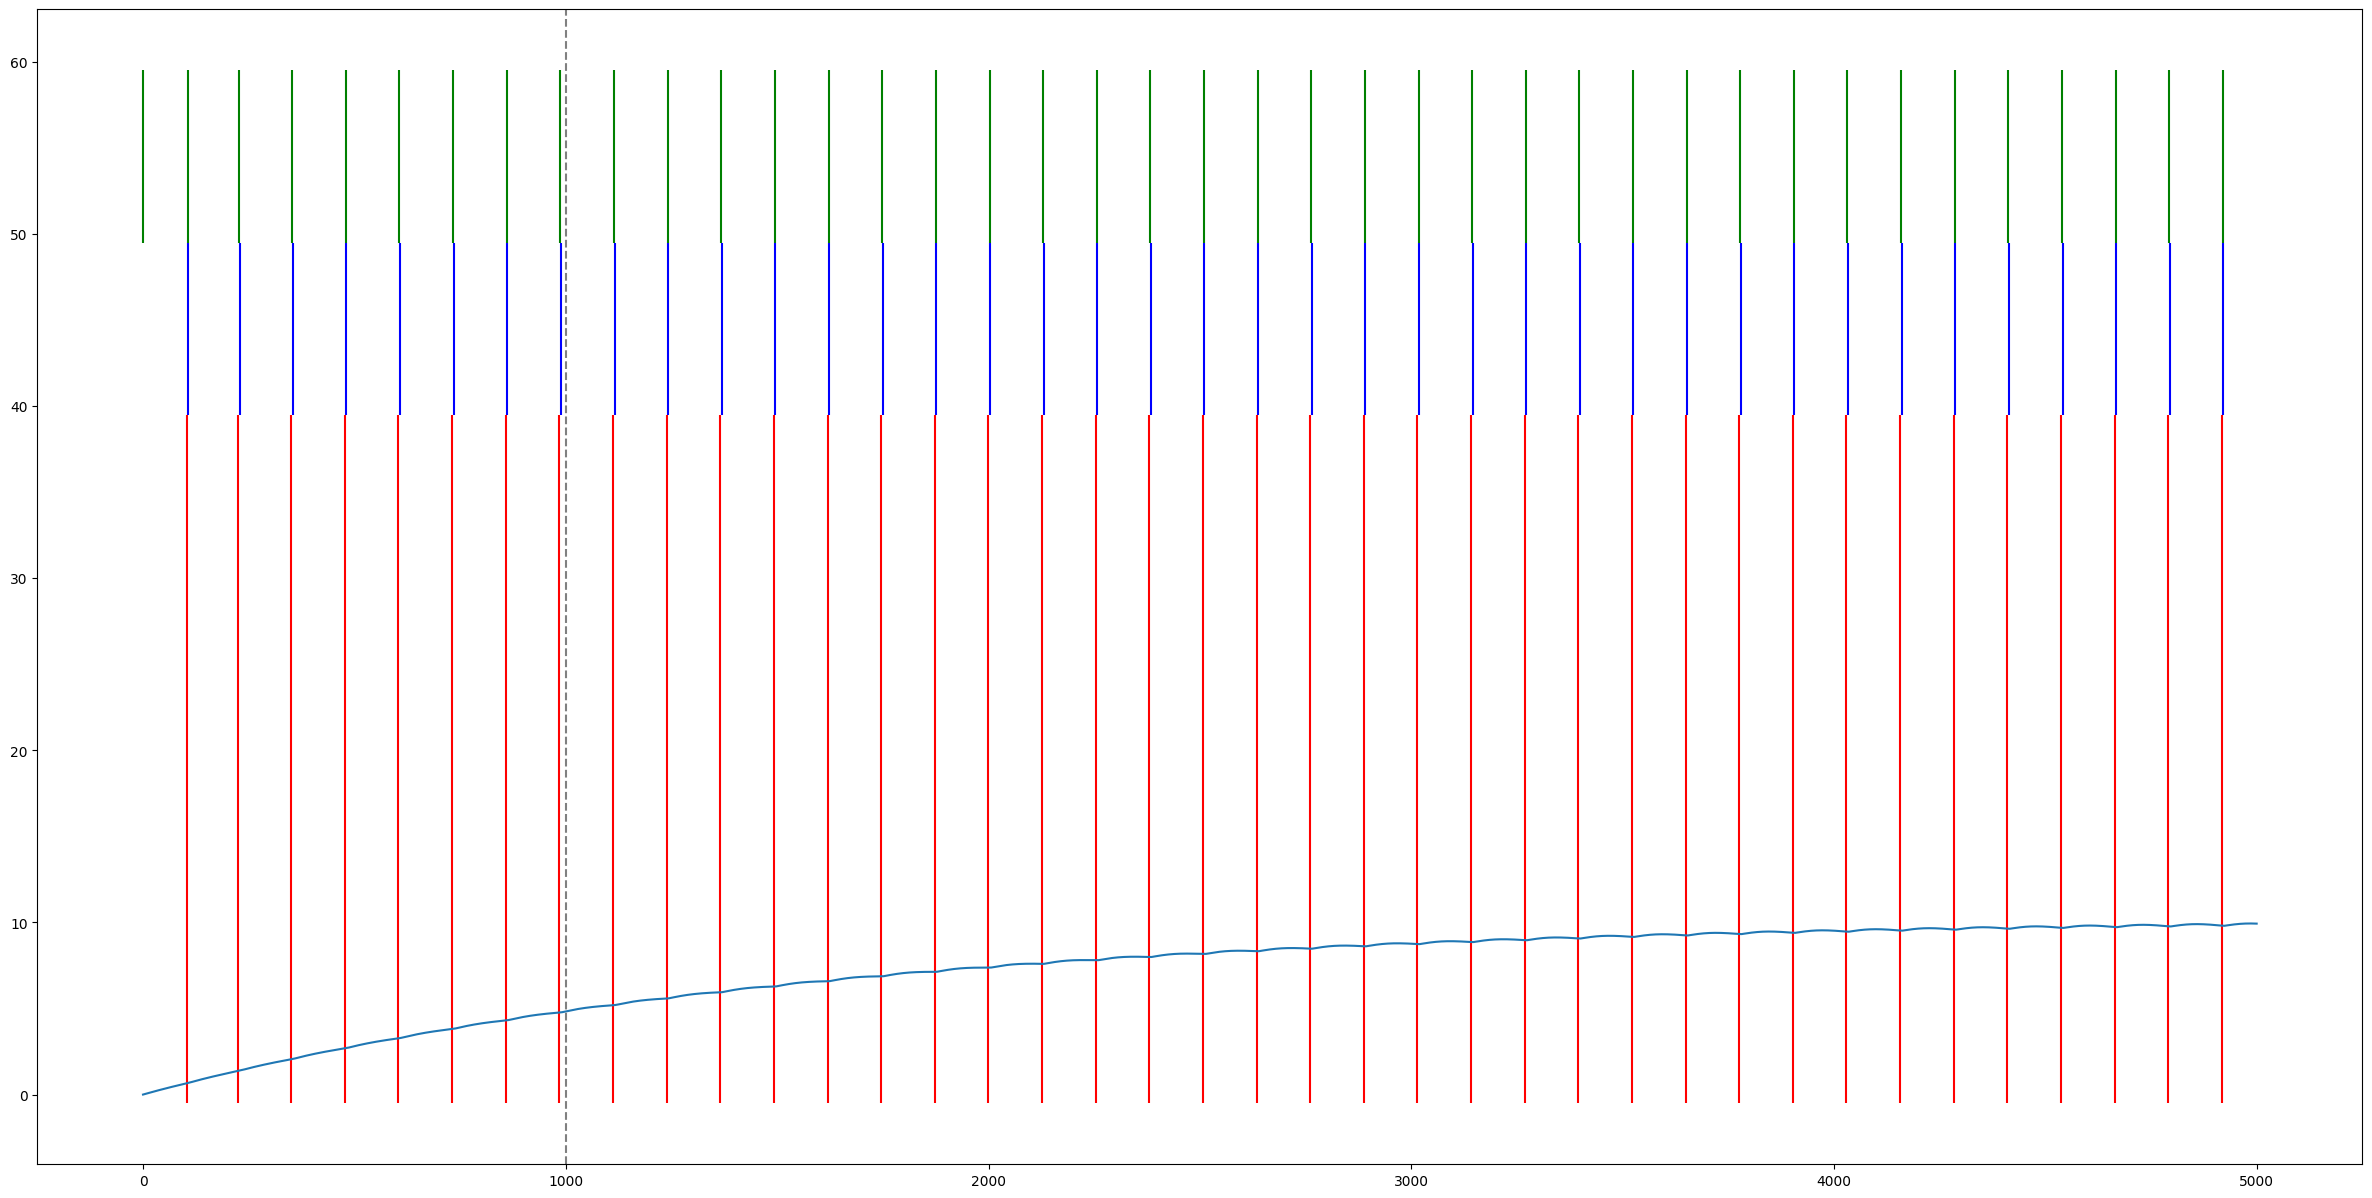

In [3288]:

freqs = np.linspace(1, 100, 1000)
PLV_freqs = phase_locking_range_fixed(spike_times, t, freqs)

mean_PLV_E = np.nanmean(PLV_freqs[:, :NE], axis=1)        
mean_PLV_I = np.nanmean(PLV_freqs[:, NE:NE+NI], axis=1)
mean_PLV_O = np.nanmean(PLV_freqs[:, NE+NI:], axis=1)
idx_E = np.nanargmax(mean_PLV_E)
idx_I = np.nanargmax(mean_PLV_I)
idx_O = np.nanargmax(mean_PLV_O)

freq_E_max = freqs[idx_E]
freq_I_max = freqs[idx_I]
freq_O_max = freqs[idx_O]

PLV_E_max = mean_PLV_E[idx_E]
PLV_I_max = mean_PLV_I[idx_I]
PLV_O_max = mean_PLV_O[idx_O]
print(f"E max PLV = {PLV_E_max:.3f} at {freq_E_max:.2f} Hz")
print(f"I max PLV = {PLV_I_max:.3f} at {freq_I_max:.2f} Hz")
print(f"O max PLV = {PLV_O_max:.3f} at {freq_O_max:.2f} Hz")


fig, axs = plt.subplots(3, 1, figsize=(12, 10))

axs[0].plot(freqs, np.nanmean(PLV_freqs[:, :NE], axis=1), color='red')
axs[0].scatter(freq_E_max, PLV_E_max, color='k', s=80, zorder=5, label=f'{freq_E_max} Max PLV')
axs[0].set_title('E1')
axs[0].set_ylabel('PLV')
axs[0].set_xlabel('Frequency (Hz)')
axs[0].legend()
#################################################
axs[0].axvline(x=7.8*3, color='red', linestyle='--')#
#################################################

axs[1].plot(freqs, np.nanmean(PLV_freqs[:, NE:NE+NI], axis=1), color='blue')
axs[1].set_title('I')
axs[1].set_ylabel('PLV')
axs[1].set_xlabel('Frequency (Hz)')

axs[2].plot(freqs, np.nanmean(PLV_freqs[:, NE+NI:], axis=1), color='green')
axs[2].set_title('O')
axs[2].set_ylabel('PLV')
axs[2].set_xlabel('Frequency (Hz)')

plt.tight_layout()
plt.show()
# Raster plot
rast = [spike_times[spike_times[:, i] != 0, i] for i in range(Ntot)]
rast_colors = ['red']*NE + ['blue']*NI + ['green']*NO
plt.figure(figsize=(30, 15))
plt.eventplot(rast, colors=rast_colors)
#plt.xlim(0,500)
H_avg = np.mean(H[:, E1], axis=1)
plt.plot(t, H_avg*100)
plt.axvline(x=1000, color='gray', linestyle='--')
plt.savefig("raster_plot.png", dpi=300, bbox_inches='tight')
plt.show()


E max PLV = 0.643 at 14.68 Hz
I max PLV = 0.818 at 7.34 Hz
O max PLV = 0.953 at 7.34 Hz


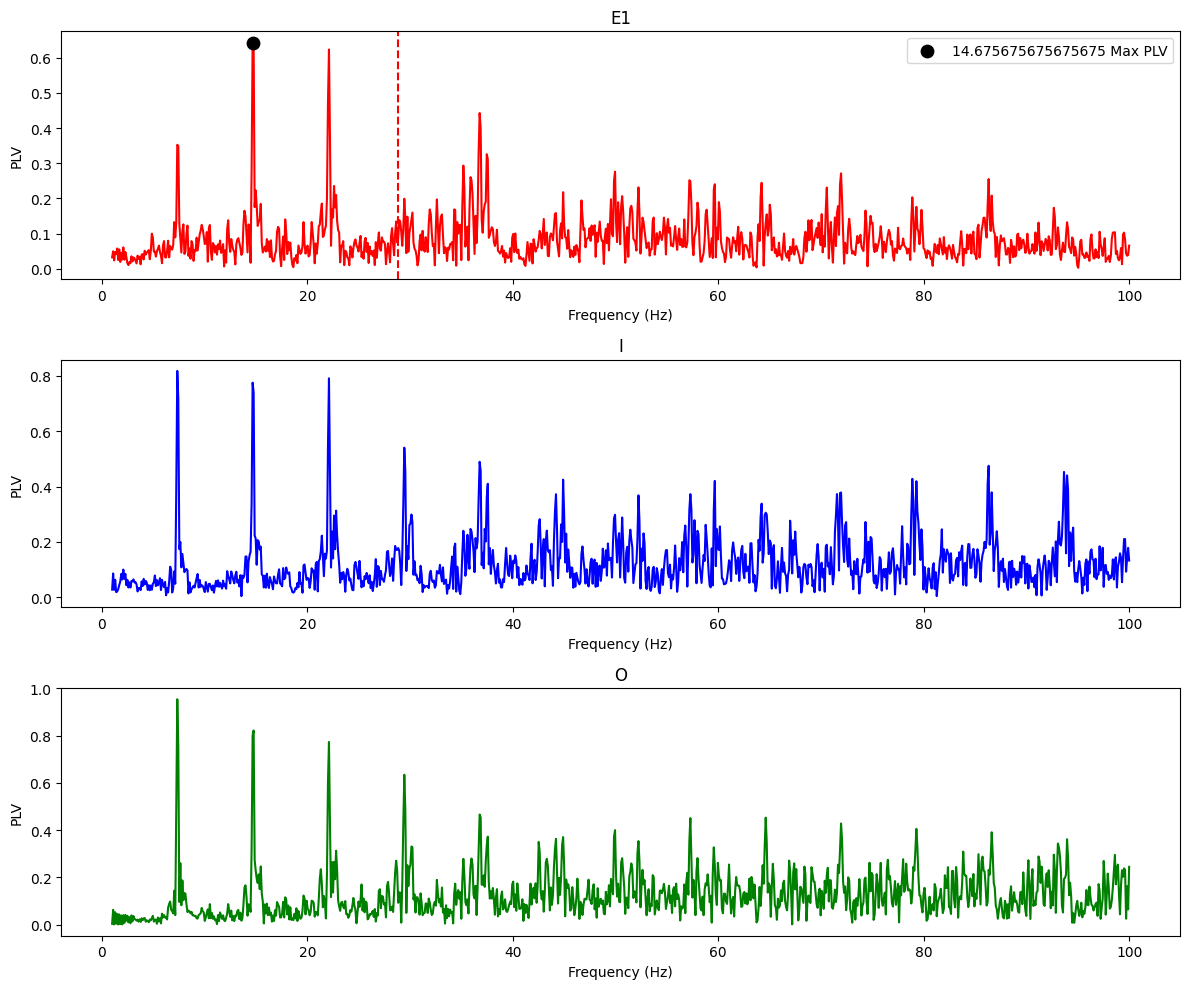

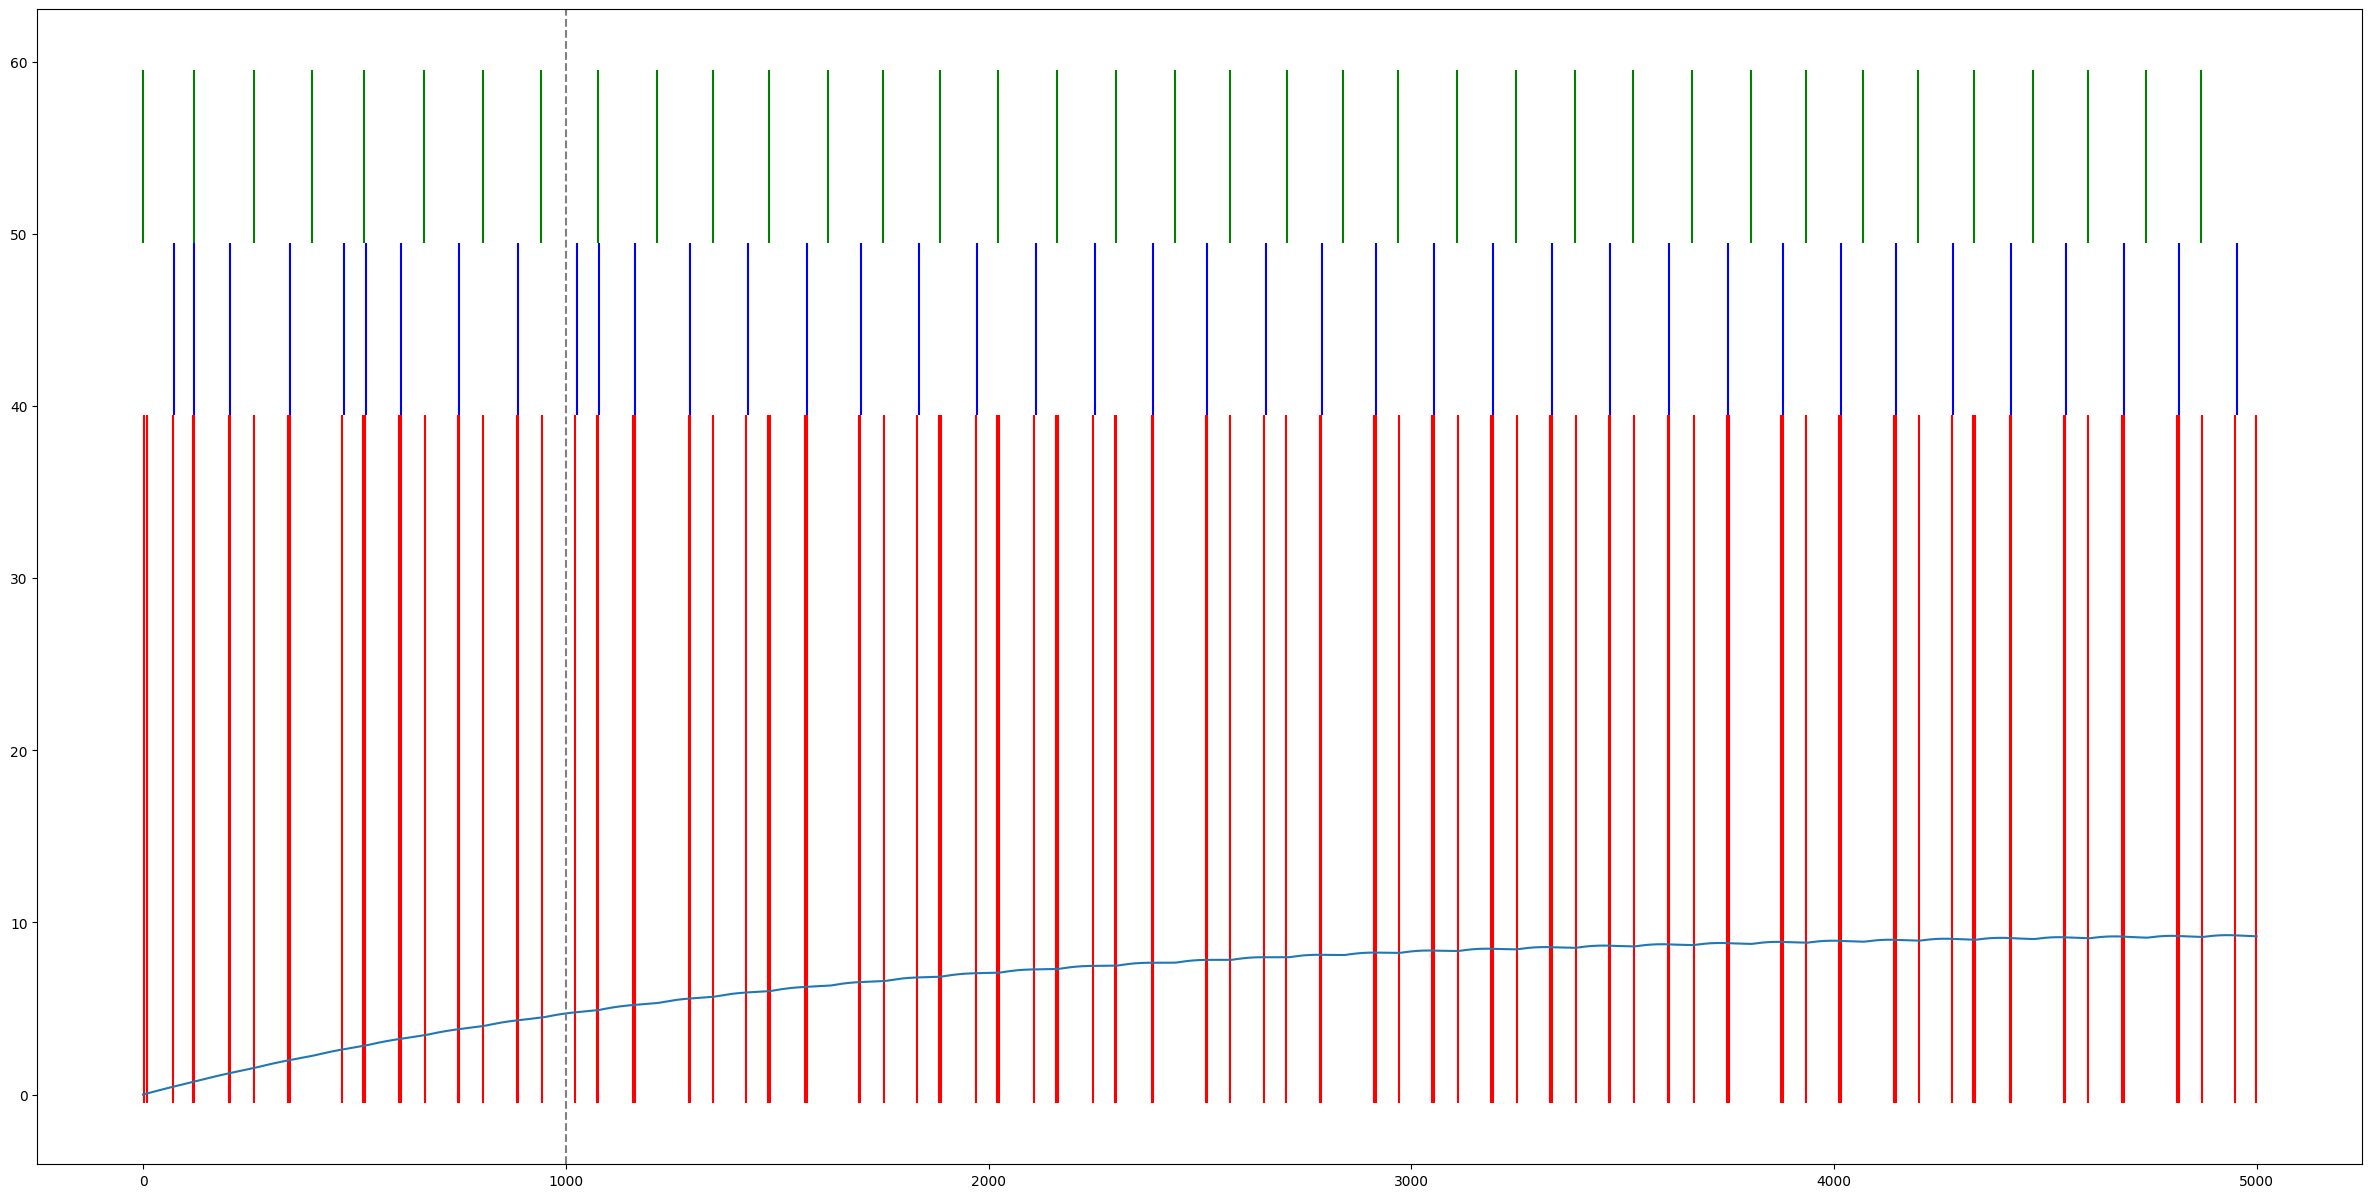

In [3275]:

freqs = np.linspace(1, 100, 1000)
PLV_freqs = phase_locking_range_fixed(spike_times, t, freqs)

mean_PLV_E = np.nanmean(PLV_freqs[:, :NE], axis=1)        
mean_PLV_I = np.nanmean(PLV_freqs[:, NE:NE+NI], axis=1)
mean_PLV_O = np.nanmean(PLV_freqs[:, NE+NI:], axis=1)
idx_E = np.nanargmax(mean_PLV_E)
idx_I = np.nanargmax(mean_PLV_I)
idx_O = np.nanargmax(mean_PLV_O)

freq_E_max = freqs[idx_E]
freq_I_max = freqs[idx_I]
freq_O_max = freqs[idx_O]

PLV_E_max = mean_PLV_E[idx_E]
PLV_I_max = mean_PLV_I[idx_I]
PLV_O_max = mean_PLV_O[idx_O]
print(f"E max PLV = {PLV_E_max:.3f} at {freq_E_max:.2f} Hz")
print(f"I max PLV = {PLV_I_max:.3f} at {freq_I_max:.2f} Hz")
print(f"O max PLV = {PLV_O_max:.3f} at {freq_O_max:.2f} Hz")


fig, axs = plt.subplots(3, 1, figsize=(12, 10))

axs[0].plot(freqs, np.nanmean(PLV_freqs[:, :NE], axis=1), color='red')
axs[0].scatter(freq_E_max, PLV_E_max, color='k', s=80, zorder=5, label=f'{freq_E_max} Max PLV')
axs[0].set_title('E1')
axs[0].set_ylabel('PLV')
axs[0].set_xlabel('Frequency (Hz)')
axs[0].legend()
#################################################
axs[0].axvline(x=9.6*3, color='red', linestyle='--')#
#################################################

axs[1].plot(freqs, np.nanmean(PLV_freqs[:, NE:NE+NI], axis=1), color='blue')
axs[1].set_title('I')
axs[1].set_ylabel('PLV')
axs[1].set_xlabel('Frequency (Hz)')

axs[2].plot(freqs, np.nanmean(PLV_freqs[:, NE+NI:], axis=1), color='green')
axs[2].set_title('O')
axs[2].set_ylabel('PLV')
axs[2].set_xlabel('Frequency (Hz)')

plt.tight_layout()
plt.show()
# Raster plot
rast = [spike_times[spike_times[:, i] != 0, i] for i in range(Ntot)]
rast_colors = ['red']*NE + ['blue']*NI + ['green']*NO
plt.figure(figsize=(30, 15))
plt.eventplot(rast, colors=rast_colors)
#plt.xlim(0,500)
H_avg = np.mean(H[:, E1], axis=1)
plt.plot(t, H_avg*100)
plt.axvline(x=1000, color='gray', linestyle='--')
plt.savefig("raster_plot.png", dpi=300, bbox_inches='tight')
plt.show()


In [2801]:
import numpy as np
import matplotlib.pyplot as plt
def RTM_Neuron_update(j, t, V, Vd, h, n, rv, Z, B, H, C, Ca_acum, Q,
                      Iapp, s_E, s_I, s_O, EE, IE, OE, p_EE, p_IE, p_OE, NE, NI, NO, nested, noise=0,dt=0.1,param_gM=0,param_gH=0):
  
    # Store previous values for gating updates
    V_prev, Vd_prev, Ca_prev = V.copy(), Vd.copy(), Ca_acum.copy()

    # Parameters 
    Cm = 1.0
    El = -58 #-56
    Gl, Gl2 = 0.1, 0.1
    Ena, Ek, Eh = 60, -75, -32.9
    Gna, Gk, Gnap = 55, 10, 0.3
    Gna2, Gk2 = 0, 0
    Gm, Gh =param_gM,param_gH#1,3 #3,1
    Gsd, Gds = 0.2, 0.02  # soma-dendrite coupling
    # External applied current
    Amp_Vs, Amp_Vd = 0,1

    # Synapse Stuff
    if nested == 1:
        g_EE = 0.0 # mS/cm^2
        g_IE = 0.4#0.25 # mS/cm^2
        g_OE = 0.7 # mS/cm^2
    
    # g_EI = 0.02
    # g_EO = 0.1

    else:
        g_EE = 0.0 # mS/cm^2
        g_IE = 0 # mS/cm^2
        g_OE = 0.0 # mS/cm^2

    # g_EI = 0
    # g_EO = 0

    tau_rise = 0.5 # ms
    tau_decay = 3.0 # ms
    tau_peak = 0.5 # ms

    if p_EE > 0:
        g_bar_EE = g_EE * EE / (p_EE * NE)
    else:
        g_bar_EE = np.zeros(NE)
    if p_IE > 0:
        g_bar_IE = g_IE * IE / (p_IE * NI)
    else:
        g_bar_IE = np.zeros(NE)
    if p_OE > 0:
        g_bar_OE = g_OE * OE / (p_OE * NO)
    else:
        g_bar_OE = np.zeros(NO)


    E_syn_I = -75.0 # mV
    E_syn_E = 0.0 # mV
    I_syn_E = 0.0
    E_syn_O = -75.0 # mV
    O_syn_E = 0

    amp_noise = 0

  
    k1Vs = (-Gl*(V-El) - Gna*(minf(V)**3)*h*(V-Ena) - Gnap*pinf(V)*(V-Ena)
             - Gk*(n**4)*(V-Ek) - Gm*Z*(V-Ek) - Gsd*(V-Vd) + Amp_Vs*Iapp
             - np.sum(np.multiply(g_bar_EE, s_E)) * (V - E_syn_E) 
             - np.sum(np.multiply(g_bar_IE, s_I)) * (V - E_syn_I)+noise)/Cm
    
    k1Vd = (-Gl2*(Vd-El) - Gh*H*(Vd-Eh) - Gds*(Vd-V)
             - Gna2*(minf(Vd)**3)*rv*(Vd-Ena) - Gk2*(rv**4)*(Vd-Ek) + Amp_Vd*Iapp
             - np.sum(np.multiply(g_bar_OE, s_O)) * (Vd - E_syn_O)+noise)/Cm

    k1h = (hinf(V_prev) - h)/tauh(V_prev)
    k1n = (ninf(V_prev) - n)/taun(V_prev)
    k1rv = (rinf(V_prev) - rv)
    k1Z = (Zinf(V_prev) - Z)/75
    k1B = (Binf(V_prev) - B)/15
    k1H = (Hinf(Vd_prev) - H)/tauH(Vd_prev)
    k1C = (cinf(V_prev) - C)/2
    k1Ca = (-0.13*(0*rv**2)*(V_prev-120) - Ca_acum)/13
    k1Q = (Qinf(Ca_prev) - Q)/450

    V1 = V + k1Vs*dt
    Vd1 = Vd + k1Vd*dt
    h1 = h + k1h*dt
    n1 = n + k1n*dt
    rv1 = rv + k1rv*dt
    Z1 = Z + k1Z*dt
    B1 = B + k1B*dt
    H1 = H + k1H*dt
    C1 = C + k1C*dt
    Ca1 = Ca_acum + k1Ca*dt
    Q1 = Q + k1Q*dt

    k2Vs = (-Gl*(V1-El) - Gna*(minf(V1)**3)*h1*(V1-Ena) - Gnap*pinf(V1)*(V1-Ena)
             - Gk*(n1**4)*(V1-Ek) - Gm*Z1*(V1-Ek) - Gsd*(V1-Vd1) + Amp_Vs*Iapp
             - np.sum(np.multiply(g_bar_EE, s_E)) * (V - E_syn_E) 
             - np.sum(np.multiply(g_bar_IE, s_I)) * (V - E_syn_I)+noise)/Cm
    
    k2Vd = (-Gl2*(Vd1-El) - Gh*H1*(Vd1-Eh) - Gds*(Vd1-V1)
             - Gna2*(minf(Vd1)**3)*rv1*(Vd1-Ena) - Gk2*(rv1**4)*(Vd1-Ek) + Amp_Vd*Iapp
             - np.sum(np.multiply(g_bar_OE, s_O)) * (Vd - E_syn_O)+noise)/Cm

    k2h = (hinf(V1) - h1)/tauh(V1)
    k2n = (ninf(V1) - n1)/taun(V1)
    k2rv = (rinf(V1) - rv1)
    k2Z = (Zinf(V1) - Z1)/75
    k2B = (Binf(V1) - B1)/15
    k2H = (Hinf(Vd1) - H1)/tauH(Vd1)
    k2C = (cinf(V1) - C1)/2
    k2Ca = (-0.13*(0*rv1**2)*(V1-120) - Ca1)/13
    k2Q = (Qinf(Ca1) - Q1)/450

    # Update variables
    V += 0.5*(k1Vs + k2Vs)*dt
    Vd += 0.5*(k1Vd + k2Vd)*dt
    h += 0.5*(k1h + k2h)*dt
    n += 0.5*(k1n + k2n)*dt
    rv += 0.5*(k1rv + k2rv)*dt
    Z += 0.5*(k1Z + k2Z)*dt
    B += 0.5*(k1B + k2B)*dt
    H += 0.5*(k1H + k2H)*dt
    C += 0.5*(k1C + k2C)*dt
    Ca_acum += 0.5*(k1Ca + k2Ca)*dt
    Q += 0.5*(k1Q + k2Q)*dt

    # ===============================
    # Synapse update (excitatory)
    # ===============================
    tau_rise, tau_decay, tau_peak = 0.5, 3.0, 0.5
    s_E[j] += (np.exp(-t/tau_peak)*(1-s_E[j])/tau_rise - s_E[j]/tau_decay)*dt

    return V, h, n, s_E[j], Vd, rv, Z, B, H, C, Ca_acum, Q

def run_sim(param_IE,param_OE):
    El = -58
    NE = 40
    #NE2 = 20
    NI = 10
    NO = 10

    dt = 0.1
    t_max = 2000
    t = np.arange(0, t_max, dt)

    #Ntot = NE + NE2 + NI + NO
    Ntot = NE + NI + NO

    V  = np.zeros((len(t), Ntot))
    Vd = np.zeros_like(V)
    h  = np.zeros_like(V)
    n  = np.zeros_like(V)
    r  = np.zeros_like(V)
    a  = np.zeros_like(V)
    b  = np.zeros_like(V)
    rv = np.zeros_like(V)
    Z  = np.zeros_like(V)
    B  = np.zeros_like(V)
    H  = np.zeros_like(V)
    C  = np.zeros_like(V)
    Ca_acum = np.zeros_like(V)
    Q  = np.zeros_like(V)

    Ca_acum[0, :] = 0.0001
    V[0, :] = El
    Vd[0, :] = El

    # E1 = slice(0, NE)
    # E2 = slice(NE, NE+NE2)
    # I  = slice(NE+NE2, NE+NE2+NI)
    # O  = slice(NE+NE2+NI, Ntot)
    E1 = slice(0, NE)
    E2 = slice(NE, NE)
    I  = slice(NE, NE+NI)
    O  = slice(NE+NI, Ntot)
    V[0, E1] = El
    #V[0, E2] = El
    V[0, I]  = -70 
    V[0, O]  = -65 

    # V[0, E1] = -70 + 10*np.random.randn(NE)
    # V[0, E2] = -70 + 10*np.random.randn(NE2)
    # V[0, I]  = -70 + 5*np.random.randn(NI)
    # V[0, O]  = -65 + 10*np.random.randn(NO)

    h[0, E1] = Hinf(V[0, E1])
    h[0, E2] = Hinf(V[0, E2])
    h[0, I]  = WB_h_inf(V[0, I])
    h[0, O]  = OLM_h_inf(V[0, O])

    n[0, E1] = ninf(V[0, E1])
    n[0, E2] = ninf(V[0, E2])
    n[0, I]  = WB_n_inf(V[0, I])
    n[0, O]  = OLM_n_inf(V[0, O])

    r[0, O] = OLM_r_inf(V[0, O])
    a[0, O] = OLM_a_inf(V[0, O])
    b[0, O] = OLM_b_inf(V[0, O])

    s_E1 = np.zeros(NE)
    #s_E2 = np.zeros(NE2)
    s_I  = np.zeros(NI)
    s_O  = np.zeros(NO)

    t_spike = 1000*np.ones(Ntot)
    spike_times = np.zeros((len(t), Ntot))

    EE1 = np.ones((NE, NE))
    #EE2 = np.ones((NE2, NE2))
    IE1 = np.ones((NI, NE))
    #IE2 = np.ones((NI, NE2))
    OE1 = np.ones((NO, NE))
    #OE2 = np.ones((NO, NE2))
    #EI  = np.ones((NE+NE2, NI))
    EI  = np.ones((NE, NI))
    II  = np.ones((NI, NI))
    OI  = np.ones((NO, NI))
    #EO  = np.ones((NE+NE2, NO))
    EO  = np.ones((NE, NO))
    IO  = np.ones((NI, NO))
    OO  = np.ones((NO, NO))

    Iapp_E1 = np.ones((len(t), NE))*0#*-3
    #Iapp_E2 = np.ones((len(t), NE2))*0#*-3
    Iapp_I  = np.ones((len(t), NI)) * 0
    Iapp_O  = np.ones((len(t), NO))* 0.0
    #Iapp_E1 = Iapp_E2 = np.array([zap_input(i, 5, dt) for i in range(N)]) * -1



    #Ntot = NE + NE2 + NI + NO
    Tdur = .1
    D = 10
    noise_all = np.zeros((len(t), Ntot))
    amp_noise = 1
    for idx in range(Ntot):
        noise_all[:, idx] = piecewise_constant_white_noise(t, Tdur, D)

    for i in range(len(t)-1):
        #sE1p, sE2p, sIp, sOp = s_E1.copy(), s_E2.copy(), s_I.copy(), s_O.copy()
        sE1p, sIp, sOp = s_E1.copy(), s_I.copy(), s_O.copy()
        nested = int(i > 0000)
        
        for j in range(NE):
            idx = j
            noise_value = noise_all[i, idx] * amp_noise
            V[i+1,idx],h[i+1,idx],n[i+1,idx],s_E1[j],Vd[i+1,idx],rv[i+1,idx],Z[i+1,idx],B[i+1,idx],H[i+1,idx],C[i+1,idx],Ca_acum[i+1,idx],Q[i+1,idx] = RTM_Neuron_update(
                j,t_spike[idx],V[i,idx],Vd[i,idx],h[i,idx],n[i,idx],rv[i,idx],Z[i,idx],B[i,idx],H[i,idx],C[i,idx],Ca_acum[i,idx],Q[i,idx],
                Iapp_E1[i, j],sE1p,sIp,sOp,EE1[:,j],IE1[:,j],OE1[:,j],1,1,1,NE,NI,NO,nested,noise=noise_value,param_gM=param_gM,param_gH=param_gH)
            #V[i+1,idx] += noise[idx]
            if V[i+1,idx]>-10 and V[i,idx]<=-10:
                spike_times[i,idx]=t[i]; t_spike[idx]=0

        # for j in range(NE2):
        #     idx = NE+j
        #     noise_value = noise_all[i, idx] * amp_noise
        #     V[i+1,idx],h[i+1,idx],n[i+1,idx],s_E2[j],Vd[i+1,idx],rv[i+1,idx],Z[i+1,idx],B[i+1,idx],H[i+1,idx],C[i+1,idx],Ca_acum[i+1,idx],Q[i+1,idx] = RTM2_Neuron_update(
        #         j,t_spike[idx],V[i,idx],Vd[i,idx],h[i,idx],n[i,idx],rv[i,idx],Z[i,idx],B[i,idx],H[i,idx],C[i,idx],Ca_acum[i,idx],Q[i,idx],
        #         Iapp_E2[i, j],sE2p,sIp,sOp,EE2[:,j],IE2[:,j],OE2[:,j],1,1,1,NE2,NI,NO,nested,noise=noise_value)
        #     #V[i+1,idx] += noise[idx]
        #     if V[i+1,idx]>0 and V[i,idx]<=0:
        #         spike_times[i,idx]=t[i]; t_spike[idx]=0

    ###Note if you want to add back in second E pop. then you need to add NE2 back to the idx
        for j in range(NI):
            idx = NE+j
            V[i+1,idx],h[i+1,idx],n[i+1,idx],s_I[j] = WB_Neuron_update(
                j,t_spike[idx],V[i,idx],h[i,idx],n[i,idx],
                Iapp_I[i,j],np.r_[sE1p],sIp,sOp,EI[:,j],II[:,j],OI[:,j],1,1,1,NE,NI,NO,nested)
            if V[i+1,idx]>0 and V[i,idx]<=0:
                spike_times[i,idx]=t[i]; t_spike[idx]=0

        for j in range(NO):
            idx = NE+NI+j
            #Iapp_O[:,:] = -2.4
            # Iapp_O[:,10:20] = -2.4

            V[i+1,idx],h[i+1,idx],n[i+1,idx],r[i+1,idx],a[i+1,idx],b[i+1,idx],s_O[j] = OLM_Neuron_update(
                j,t_spike[idx],V[i,idx],h[i,idx],n[i,idx],r[i,idx],a[i,idx],b[i,idx],
                Iapp_O[i,j],np.r_[sE1p],sIp,sOp,EO[:,j],IO[:,j],OO[:,j],1,1,1,NE,NI,NO,nested)
            if V[i+1,idx]>0 and V[i,idx]<=0:
                spike_times[i,idx]=t[i]; t_spike[idx]=0

        t_spike += dt


    E1 = slice(0, NE)
    E2 = slice(NE, NE)
    I  = slice(NE, NE+NI)
    O  = slice(NE+NI, Ntot)

    # Raster plot
    rast = [spike_times[spike_times[:, i] != 0, i] for i in range(Ntot)]
    rast_colors = ['red']*NE + ['blue']*NI + ['green']*NO
    plt.figure(figsize=(30, 15))
    plt.eventplot(rast, colors=rast_colors)
    #plt.xlim(0,500)
    H_avg = np.mean(H[:, E1], axis=1)
    plt.plot(t, H_avg*100)
    plt.axvline(x=1000, color='gray', linestyle='--')
    plt.savefig("raster_plot.png", dpi=300, bbox_inches='tight')
    plt.show()

    # # Average voltage (E1 + E2)
    # V_avg = np.mean(V[:, :NE], axis=1)
    # plt.figure(figsize=(30, 5))
    # plt.plot(t, V_avg)
    # plt.axvline(x=1000, color='gray', linestyle='--')
    # plt.xlabel('Time (ms)')
    # plt.ylabel('Voltage (mV)')
    # plt.title('Average Voltage of Excitatory Neurons')
    # plt.savefig("V_avg_plot.png", dpi=300, bbox_inches='tight')
    # plt.show()

    # # O cells
    # plt.figure(figsize=(30, 5))
    # plt.plot(t, V[:, O])
    # plt.axvline(x=1000, color='gray', linestyle='--')
    # plt.xlabel('Time (ms)')
    # plt.ylabel('Voltage (mV)')
    # plt.title('O_cells Voltage')
    # plt.savefig("O_cells_voltage.png", dpi=300, bbox_inches='tight')
    # plt.show()

    # # I cells
    # plt.figure(figsize=(30, 5))
    # plt.plot(t, V[:, I])
    # plt.axvline(x=1000, color='gray', linestyle='--')
    # plt.xlabel('Time (ms)')
    # plt.ylabel('Voltage (mV)')
    # plt.title('I_cells Voltage')
    # plt.savefig("I_cells_voltage.png", dpi=300, bbox_inches='tight')
    # plt.show()

    # # E cells (both populations)
    # plt.figure(figsize=(30, 5))
    # plt.plot(t, V[:, E1], color='red')
    # plt.plot(t, V[:, E2], color='orange')
    # plt.axvline(x=1000, color='gray', linestyle='--')
    # #plt.xlim(0, 500)
    # plt.xlabel('Time (ms)')
    # plt.ylabel('Voltage (mV)')
    # plt.title('E_cells Voltage')
    # plt.savefig("E_cells_voltage.png", dpi=300, bbox_inches='tight')
    # plt.show()

    # # H current (O cells)
    # plt.figure(figsize=(30, 5))
    # plt.plot(t, r[:, O])
    # plt.axvline(x=1000, color='gray', linestyle='--')
    # plt.ylim(-0.01, 0.01)
    # plt.xlabel('Time (ms)')
    # plt.ylabel('Voltage (mV)')
    # plt.title('H_current')
    # plt.savefig("H_current.png", dpi=300, bbox_inches='tight')
    # plt.show()

    PLV_all = phase_locking_range_fixed(spike_times, t, freqs, min_spikes=3)  # shape: (num_freqs, num_neurons)
    PLV_E = PLV_all[:,:NE]
    PLV_matrix = PLV_E.T  # neurons x freqs

    plt.figure(figsize=(12, 6))
    im = plt.imshow(PLV_matrix, 
                    aspect='auto', 
                    origin='lower',  # neuron 0 at bottom
                    extent=[freqs[0], freqs[-1], 0, NE],
                    cmap='inferno')

    plt.colorbar(im, label='PLV')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Neuron #')
    plt.title('Phase Locking Value (PLV) Heatmap')
    plt.show()

    ### AVERAGE FIRING RATES ###

    tot_spikes_E = 0
    tot_spikes_E2 = 0
    tot_spikes_I = 0
    tot_spikes_O = 0

    for k in range(NE):
        spike_per_neuron = len(spike_times[spike_times[:, k] != 0, k])
        tot_spikes_E += spike_per_neuron
    # for k in range(NE2):
    #     spike_per_neuron = len(spike_times[spike_times[:, NE+k] != 0, NE+k])
    #     tot_spikes_E2 += spike_per_neuron
    for k in range(NI):
        spike_per_neuron = len(spike_times[spike_times[:, NE+k] != 0, NE+k])
        tot_spikes_I += spike_per_neuron
    for k in range(NO):
        spike_per_neuron = len(spike_times[spike_times[:, NE+NI+k] != 0, NE+NI+k])
        tot_spikes_O += spike_per_neuron
        
    print(" total spikes Excitatory: ", tot_spikes_E)
    print(" Average firing rate Excitatory: ", 1000*(tot_spikes_E/(t_max*NE)), " Hz")
    # print(" total spikes Excitatory2: ", tot_spikes_E2)
    # print(" Average firing rate Excitatory2: ", 1000*(tot_spikes_E2/(t_max*NE2)), " Hz")
    print(" total spikes inhibitory: ", tot_spikes_I)
    print(" Average firing rate Inhibitory: ", 1000*(tot_spikes_I/(t_max*NI)), " Hz")
    print(" total spikes OLM: ", tot_spikes_O)
    print(" Average firing rate OLM: ", 1000*(tot_spikes_O/(t_max*NO)), " Hz")


    PLV_freqs = phase_locking_range_fixed(spike_times, t, freqs)

    mean_PLV_E = np.nanmean(PLV_freqs[:, :NE], axis=1)        
    mean_PLV_I = np.nanmean(PLV_freqs[:, NE:NE+NI], axis=1)
    mean_PLV_O = np.nanmean(PLV_freqs[:, NE+NI:], axis=1)
    idx_E = np.nanargmax(mean_PLV_E)
    idx_I = np.nanargmax(mean_PLV_I)
    idx_O = np.nanargmax(mean_PLV_O)

    freq_E_max = freqs[idx_E]
    freq_I_max = freqs[idx_I]
    freq_O_max = freqs[idx_O]

    PLV_E_max = mean_PLV_E[idx_E]
    PLV_I_max = mean_PLV_I[idx_I]
    PLV_O_max = mean_PLV_O[idx_O]

    
    print(f"E max PLV = {PLV_E_max:.3f} at {freq_E_max:.2f} Hz")
    print(f"I max PLV = {PLV_I_max:.3f} at {freq_I_max:.2f} Hz")
    print(f"O max PLV = {PLV_O_max:.3f} at {freq_O_max:.2f} Hz")


    fig, axs = plt.subplots(3, 1, figsize=(12, 10))

    axs[0].plot(freqs, np.nanmean(PLV_freqs[:, :NE], axis=1), color='red')
    axs[0].scatter(freq_E_max, PLV_E_max, color='k', s=80, zorder=5, label=f'{freq_E_max} Max PLV')
    axs[0].set_title('E1')
    axs[0].set_ylabel('PLV')
    axs[0].set_xlabel('Frequency (Hz)')
    axs[0].legend()
    #################################################
    #axs[0].axvline(x=22.5, color='red', linestyle='--')#
    #################################################

    axs[1].plot(freqs, np.nanmean(PLV_freqs[:, NE:NE+NI], axis=1), color='blue')
    axs[1].set_title('I')
    axs[1].set_ylabel('PLV')
    axs[1].set_xlabel('Frequency (Hz)')

    axs[2].plot(freqs, np.nanmean(PLV_freqs[:, NE+NI:], axis=1), color='green')
    axs[2].set_title('O')
    axs[2].set_ylabel('PLV')
    axs[2].set_xlabel('Frequency (Hz)')

    plt.tight_layout()
    plt.show()


    return spike_times,t

Running gM=0.00, gH=0.00


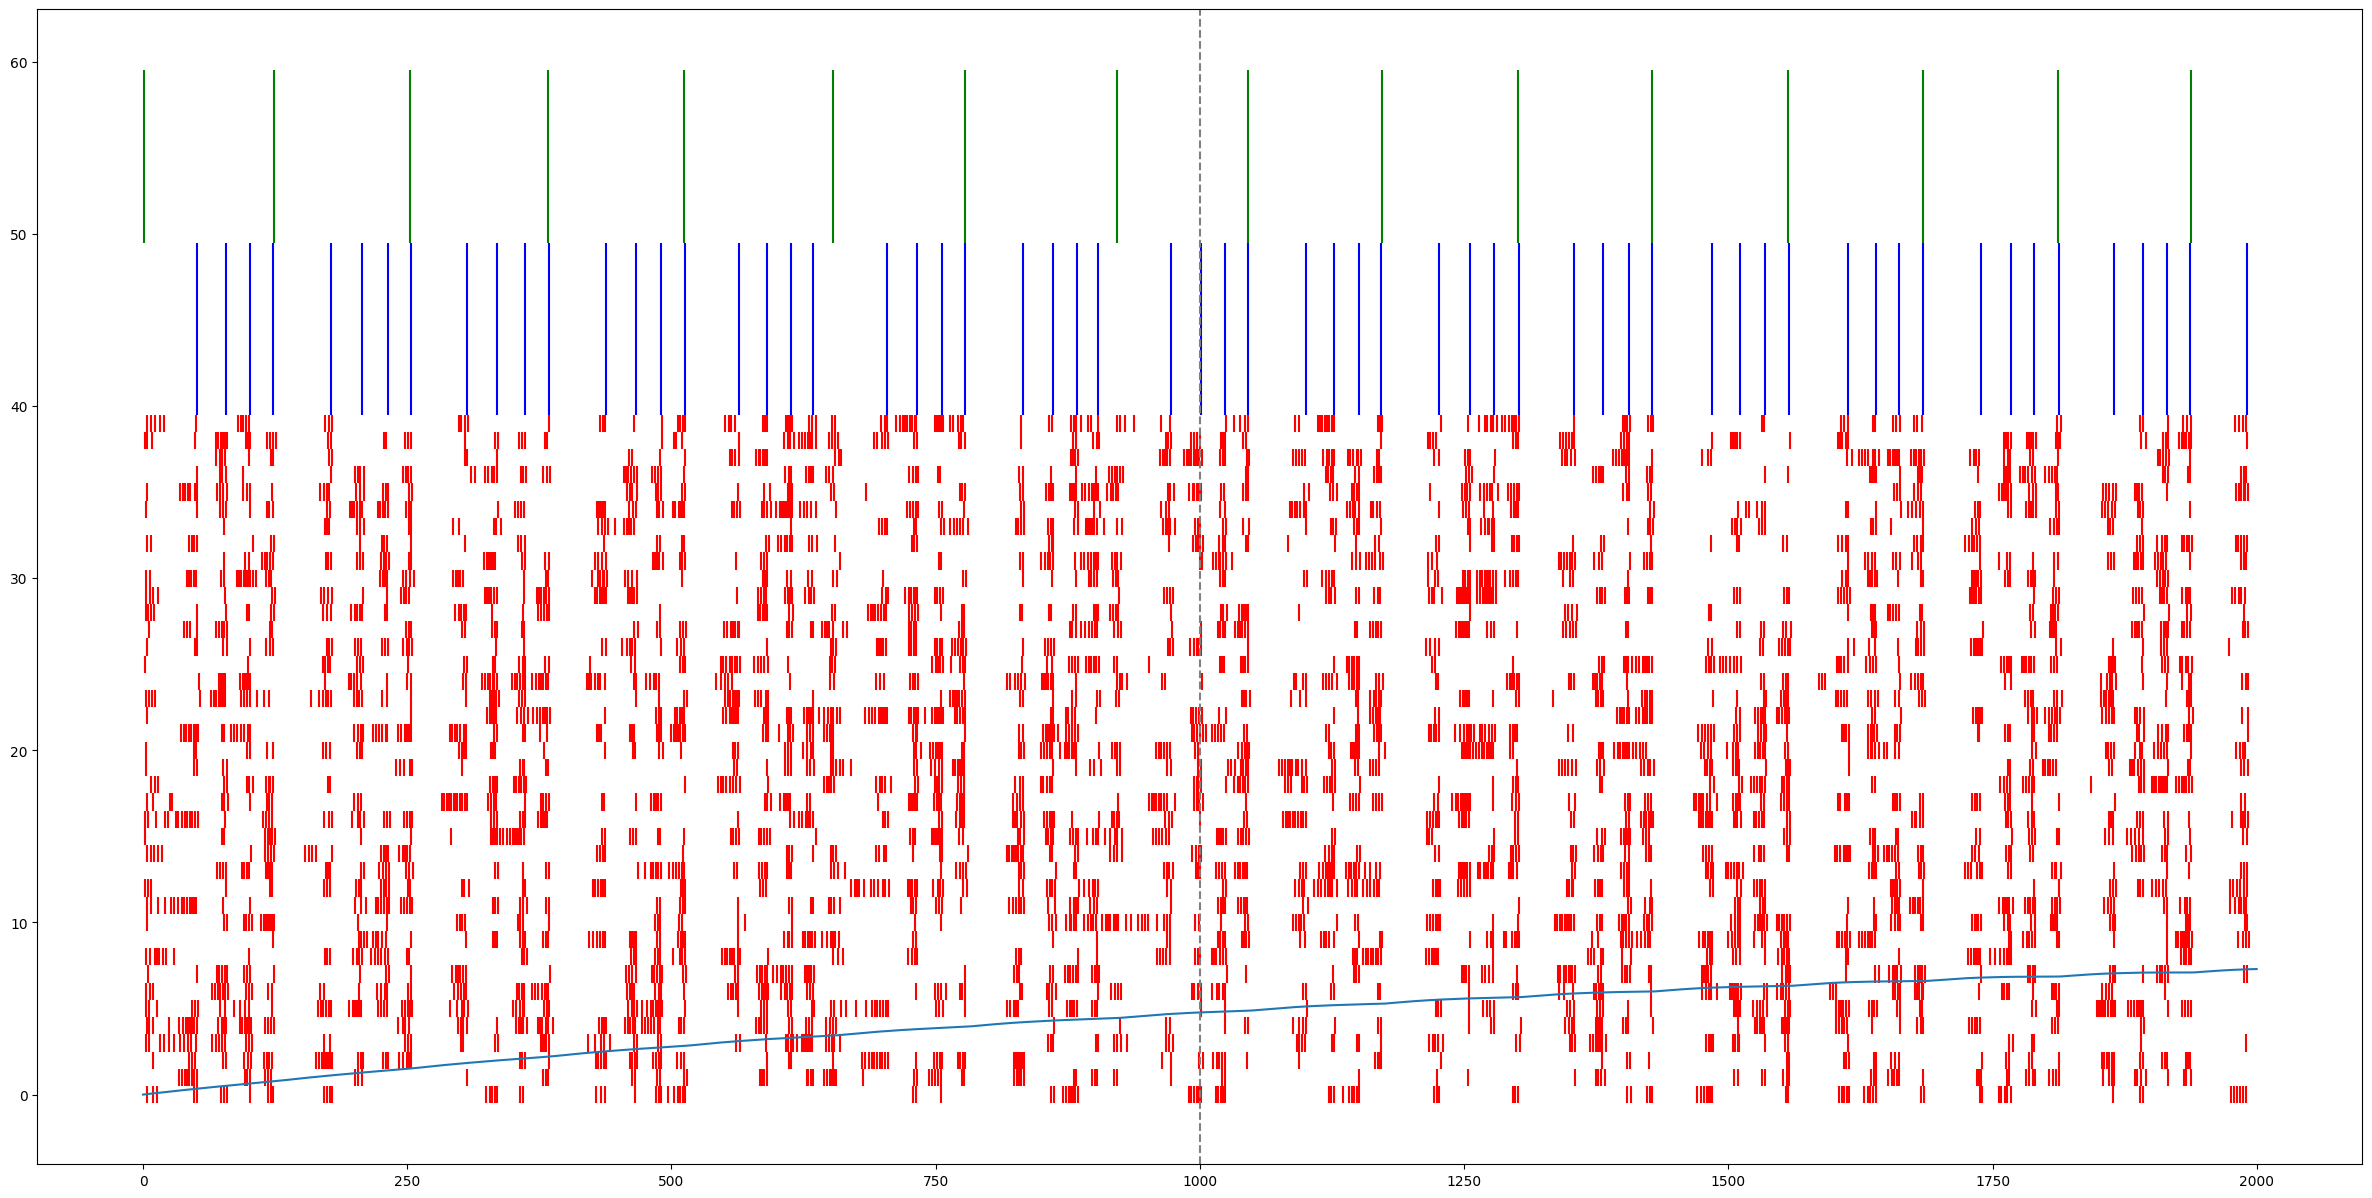

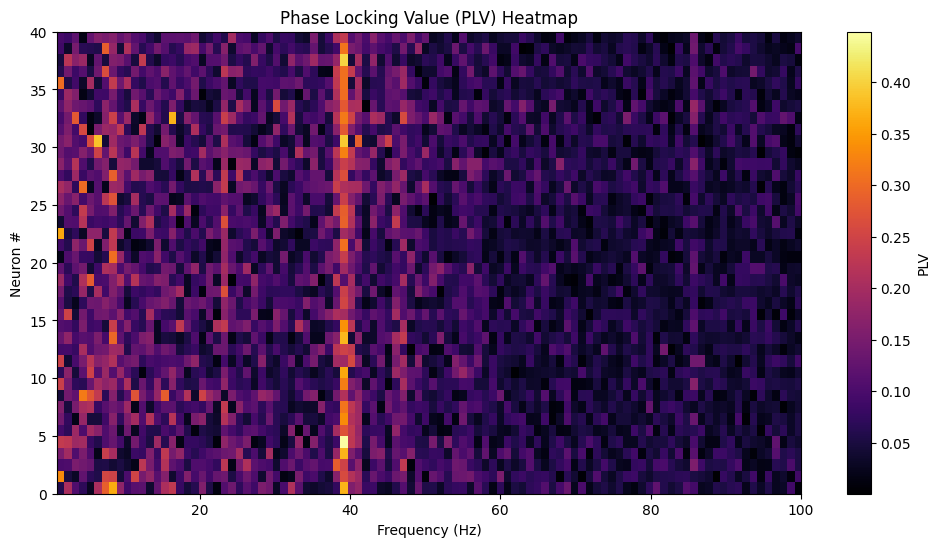

 total spikes Excitatory:  5638
 Average firing rate Excitatory:  70.475  Hz
 total spikes inhibitory:  610
 Average firing rate Inhibitory:  30.5  Hz
 total spikes OLM:  160
 Average firing rate OLM:  8.0  Hz
E max PLV = 0.285 at 39.00 Hz
I max PLV = 0.510 at 39.00 Hz
O max PLV = 0.744 at 63.00 Hz


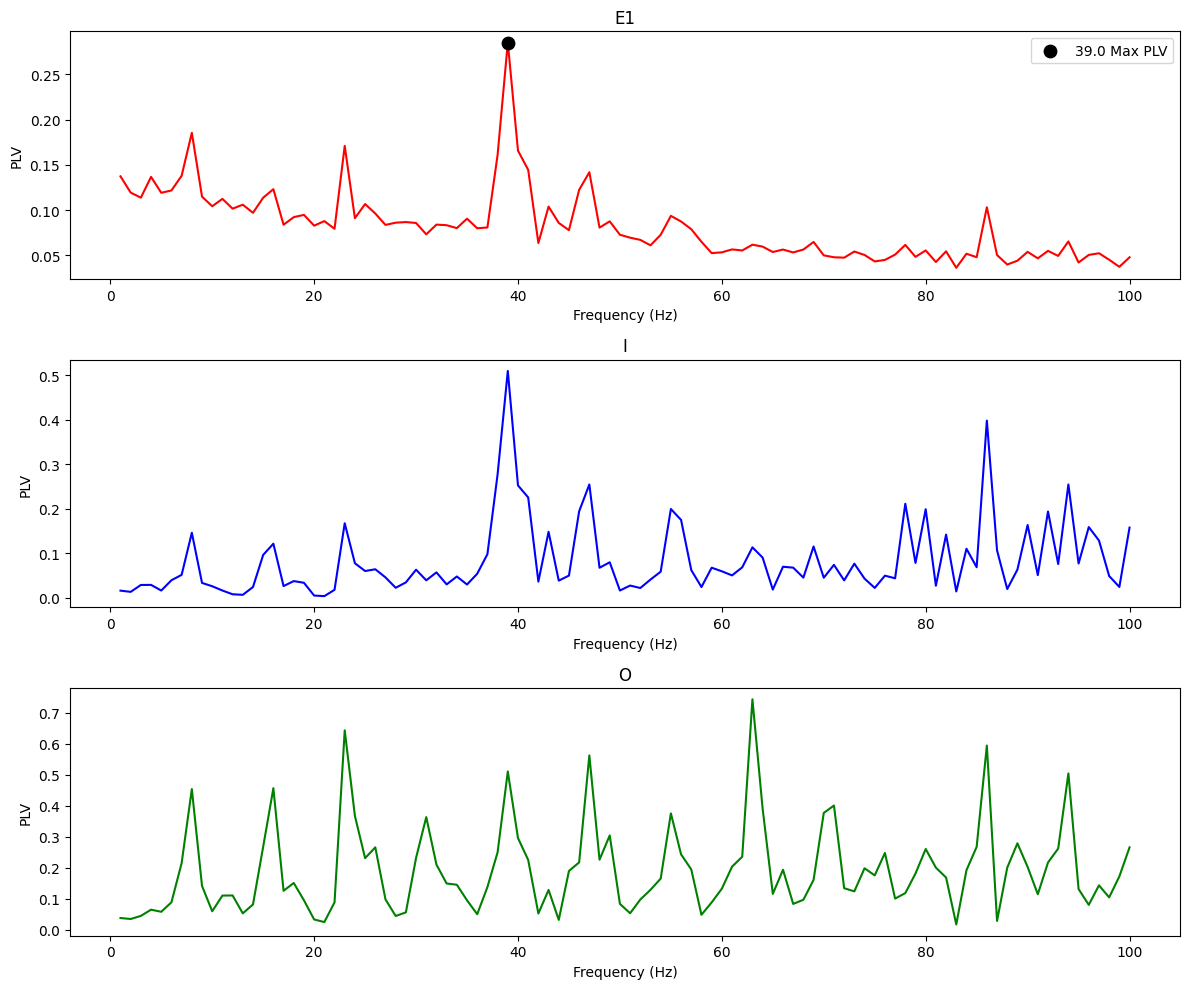

Running gM=0.00, gH=1.00


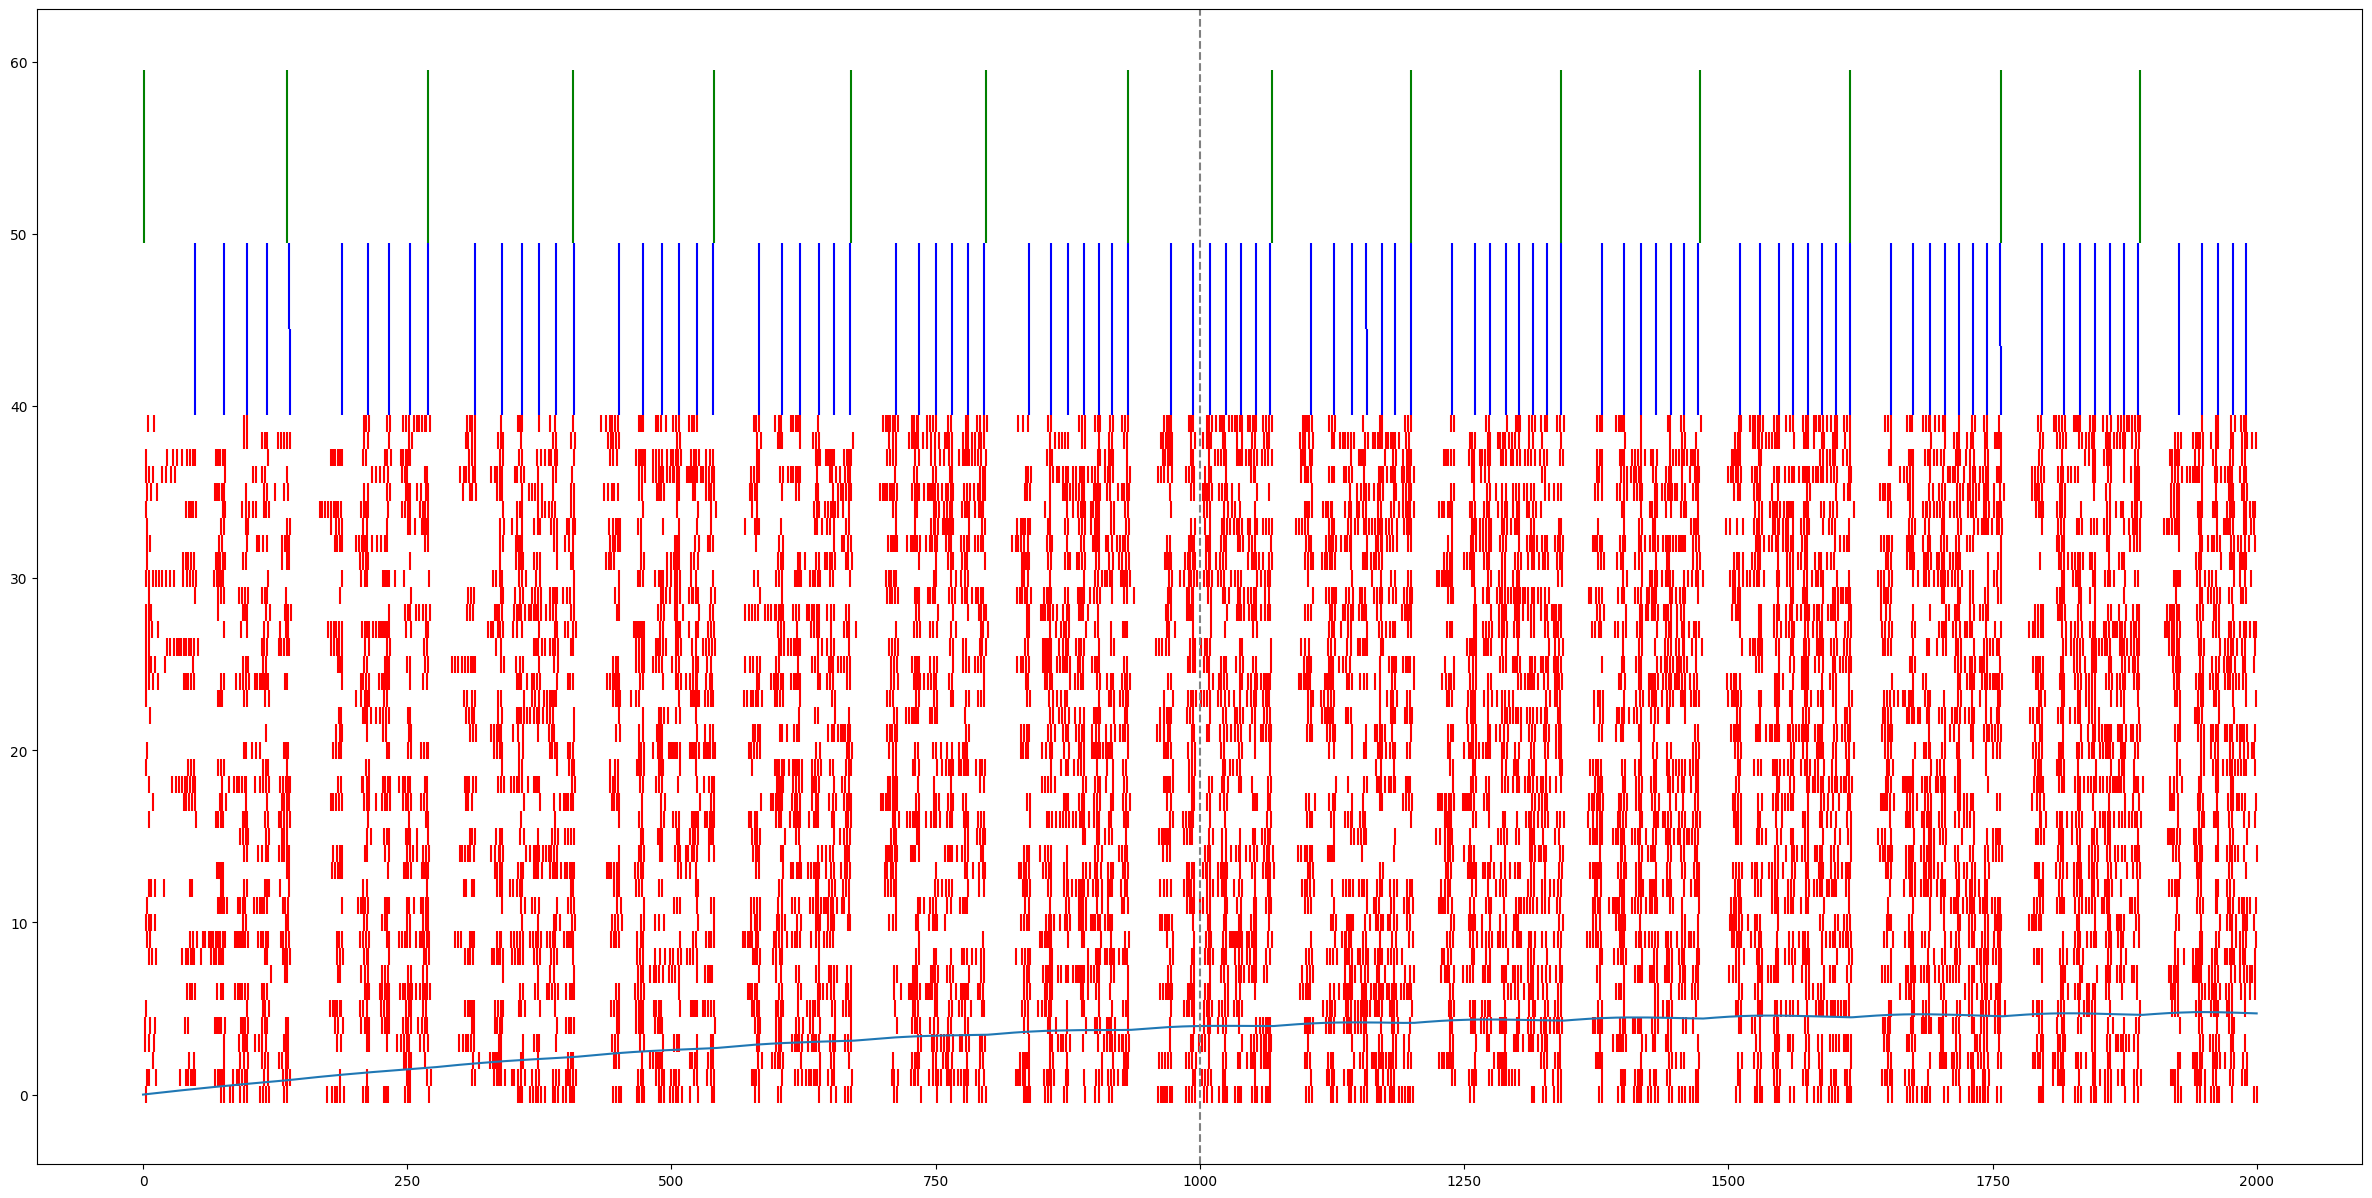

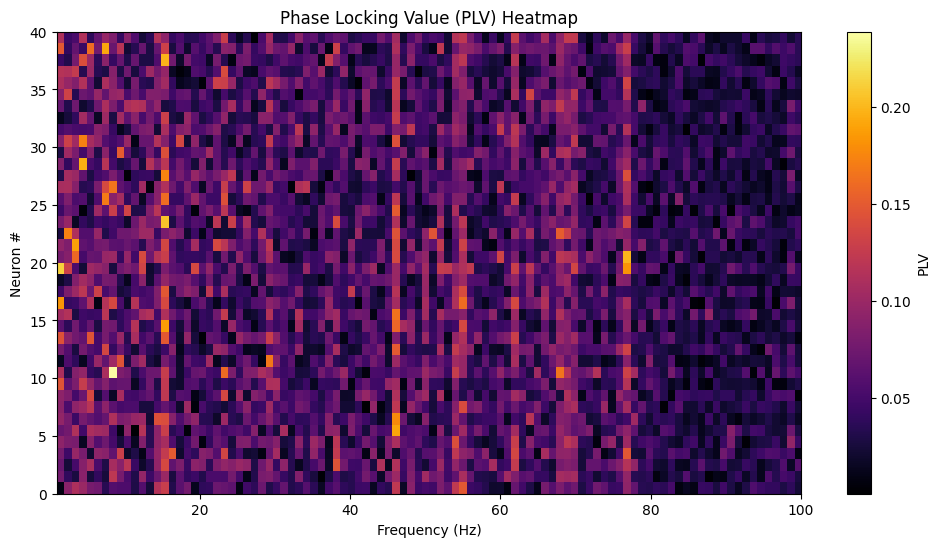

 total spikes Excitatory:  10278
 Average firing rate Excitatory:  128.475  Hz
 total spikes inhibitory:  980
 Average firing rate Inhibitory:  49.0  Hz
 total spikes OLM:  150
 Average firing rate OLM:  7.5  Hz
E max PLV = 0.118 at 15.00 Hz
I max PLV = 0.292 at 77.00 Hz
O max PLV = 0.756 at 15.00 Hz


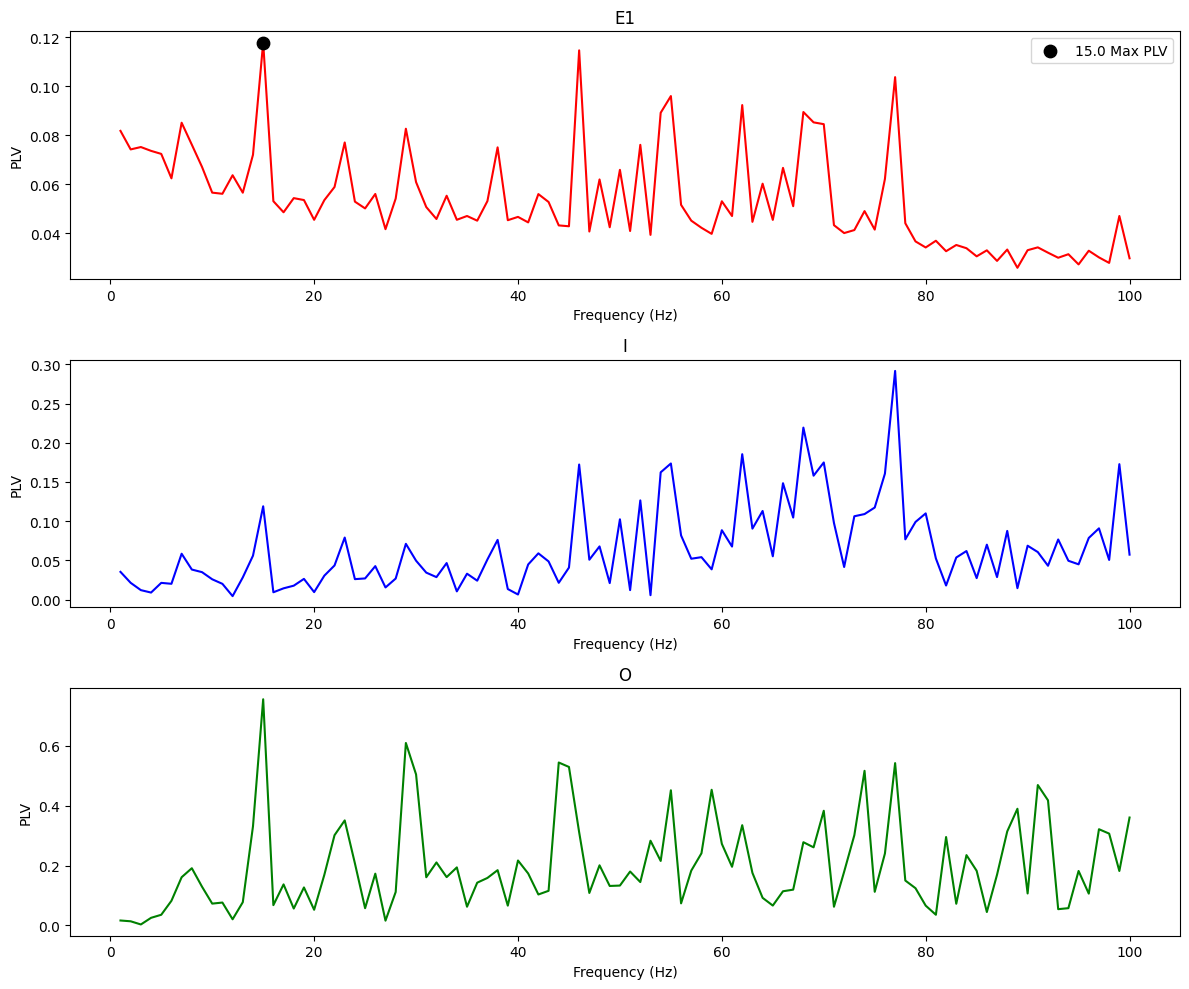

Running gM=0.00, gH=2.00


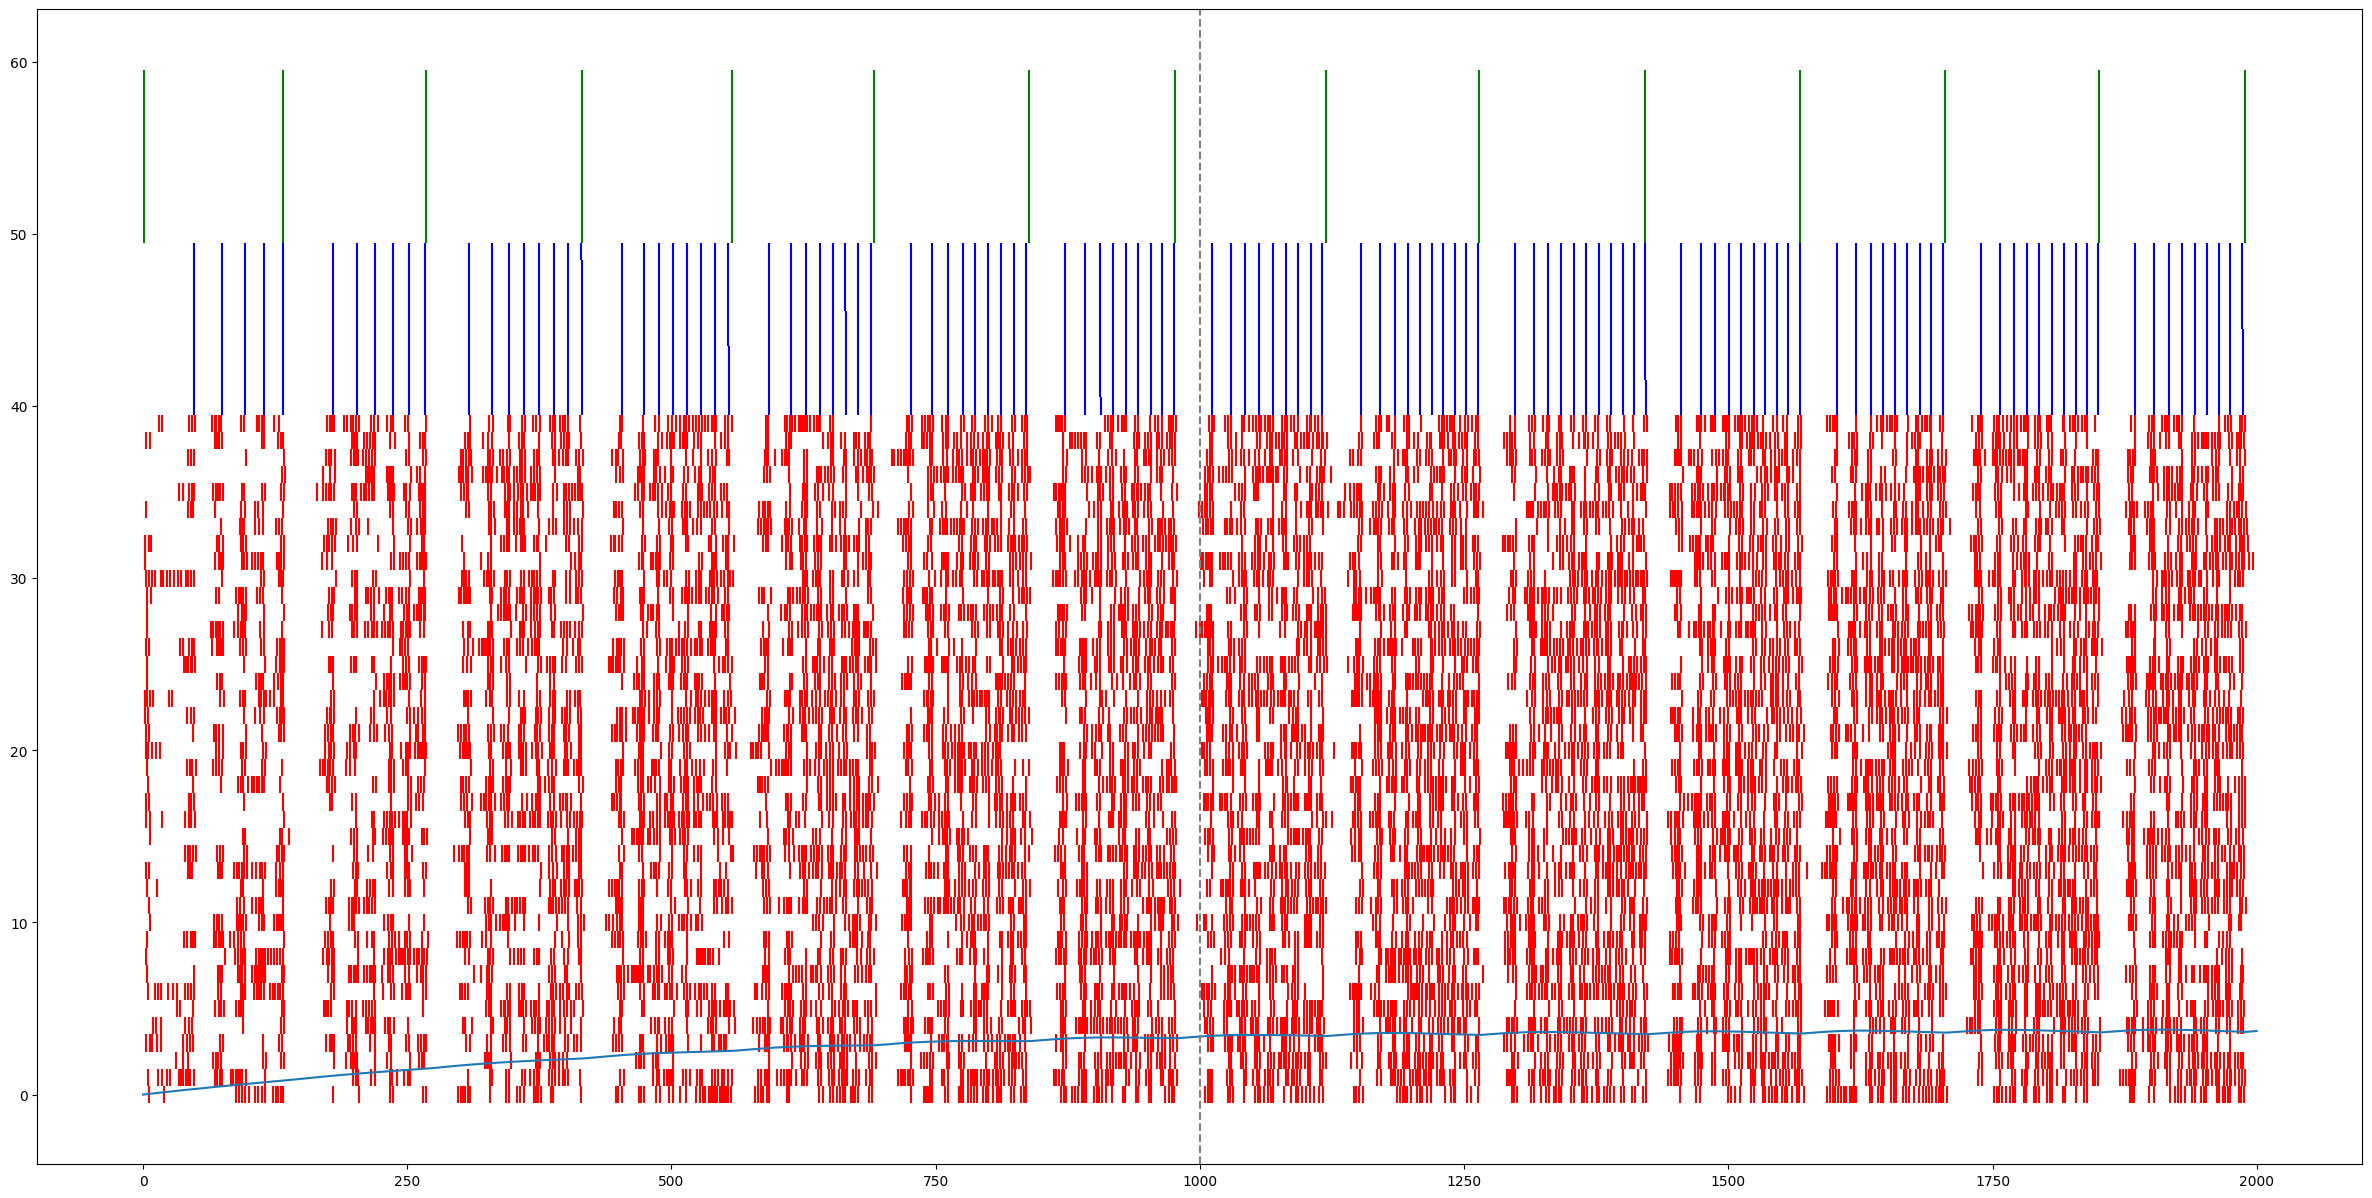

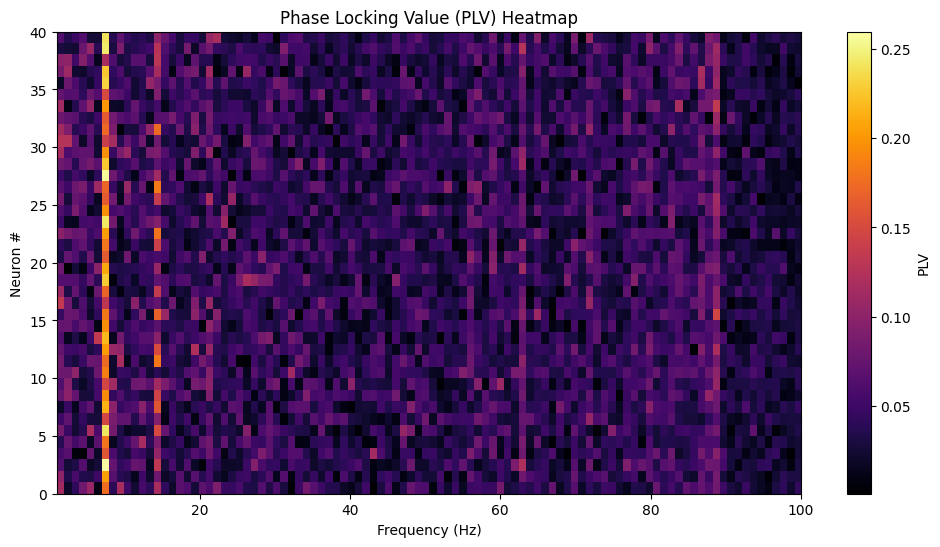

 total spikes Excitatory:  13038
 Average firing rate Excitatory:  162.97500000000002  Hz
 total spikes inhibitory:  1210
 Average firing rate Inhibitory:  60.5  Hz
 total spikes OLM:  150
 Average firing rate OLM:  7.5  Hz
E max PLV = 0.193 at 7.00 Hz
I max PLV = 0.293 at 89.00 Hz
O max PLV = 0.946 at 7.00 Hz


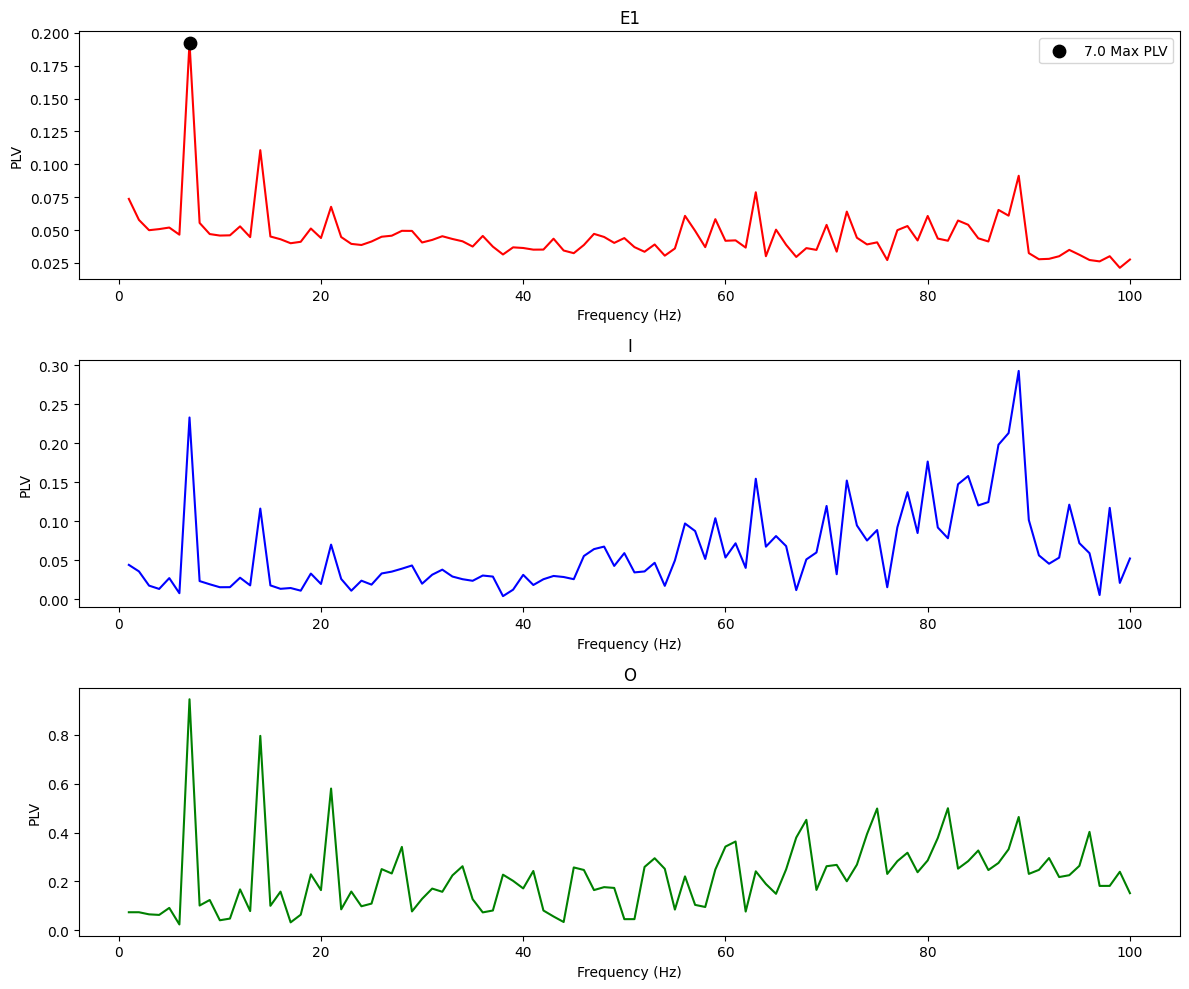

Running gM=0.00, gH=3.00


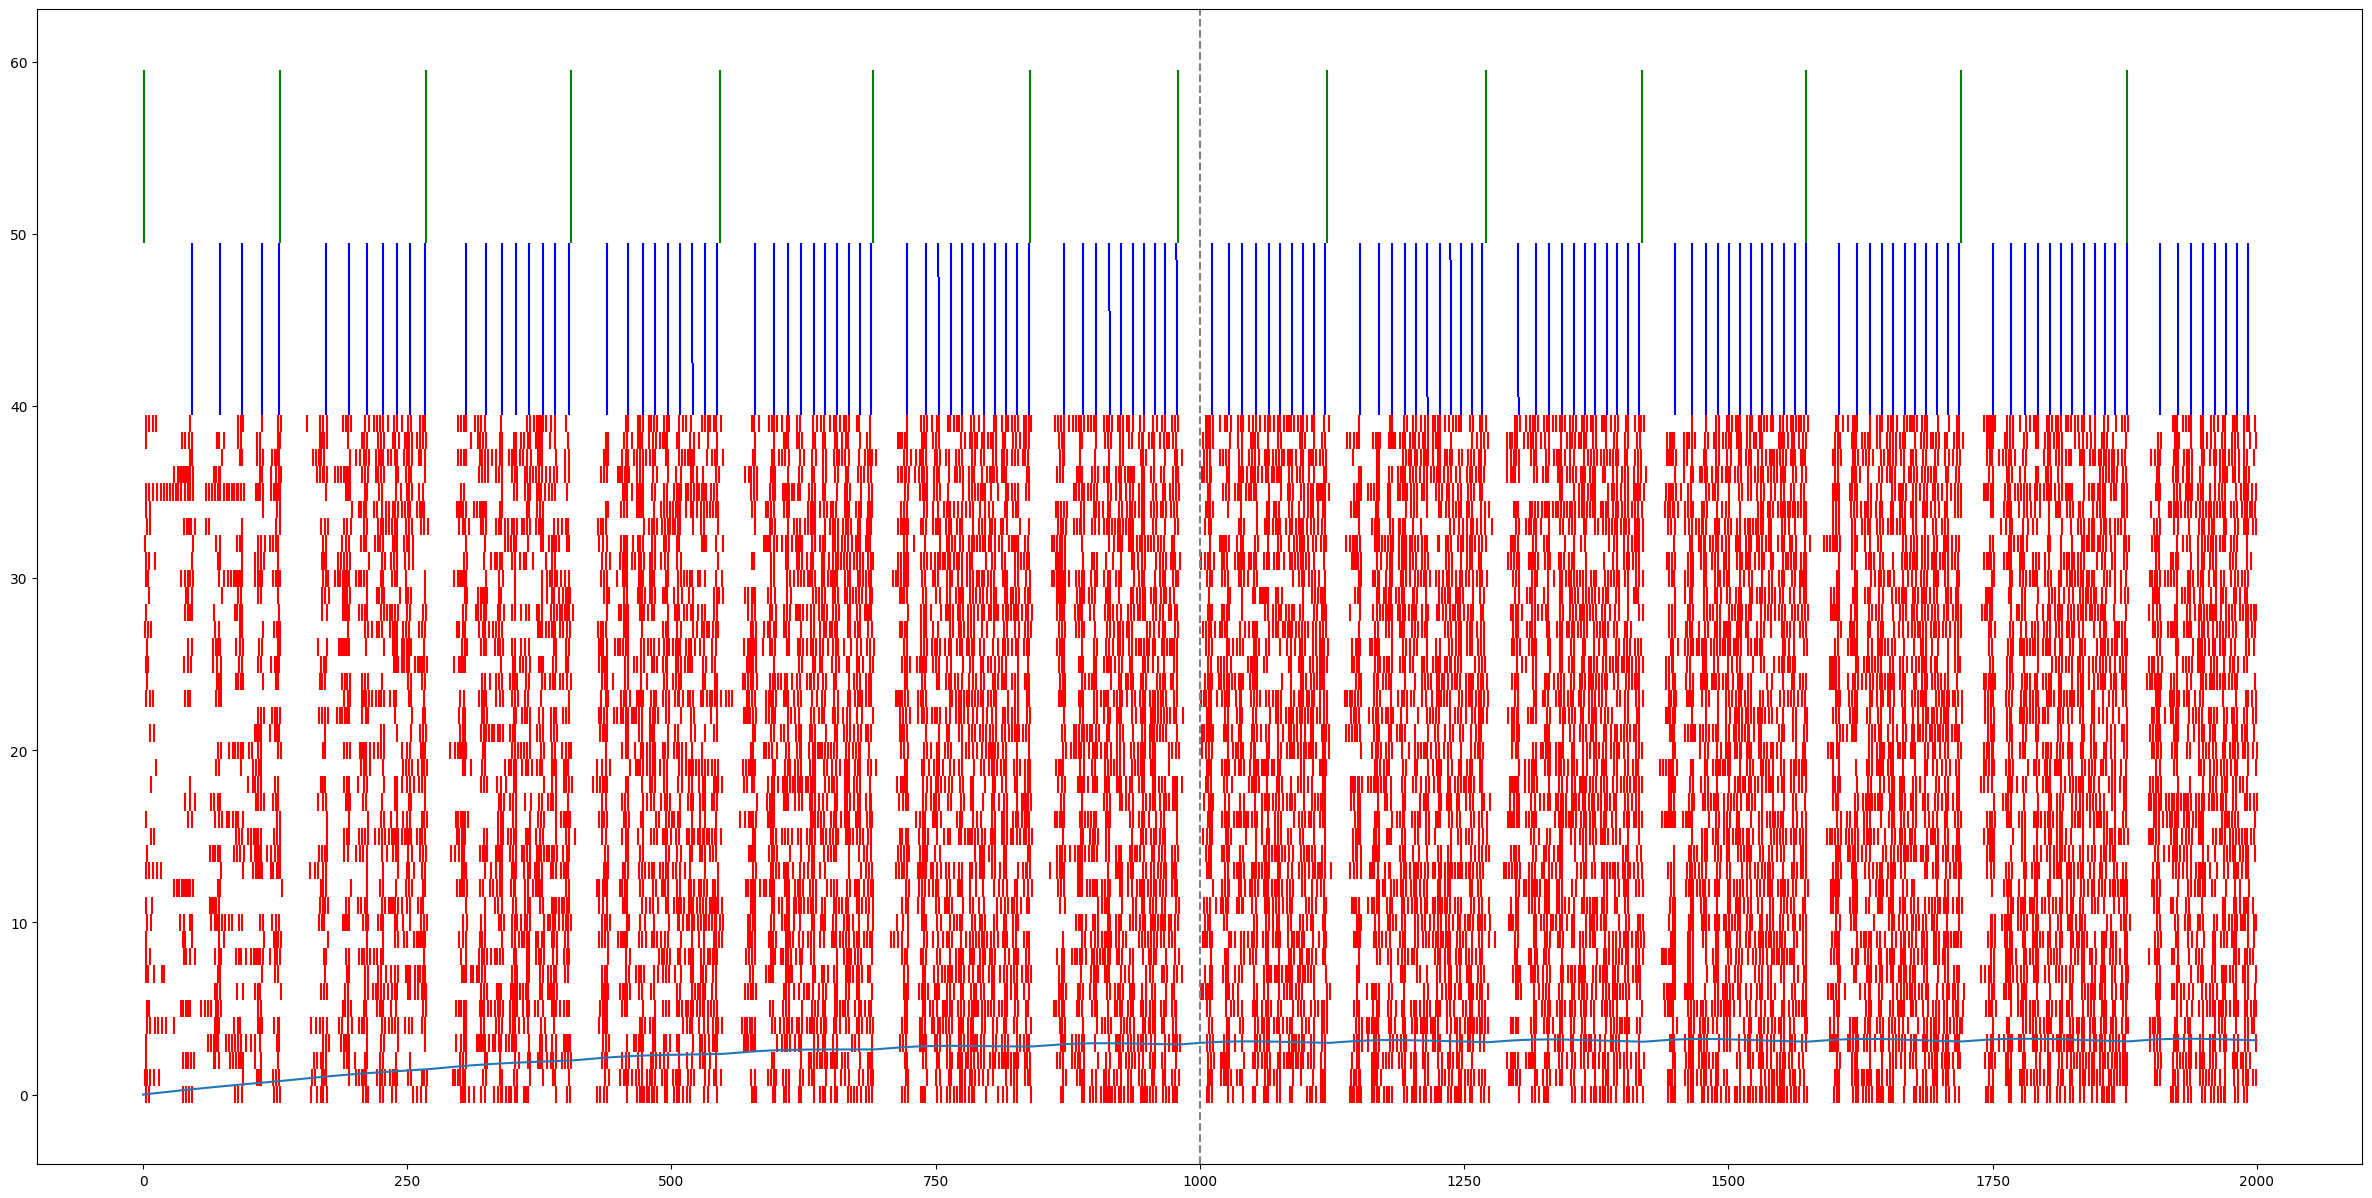

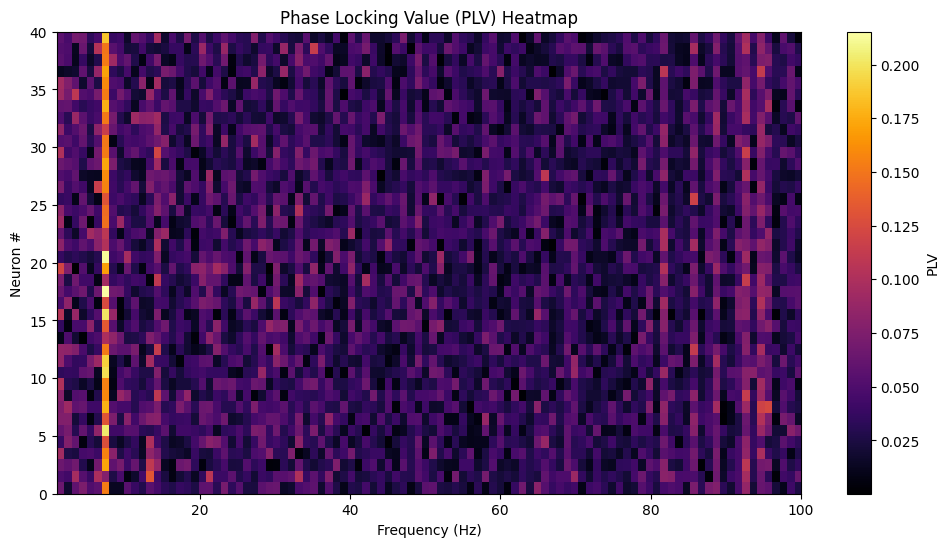

 total spikes Excitatory:  14900
 Average firing rate Excitatory:  186.25  Hz
 total spikes inhibitory:  1350
 Average firing rate Inhibitory:  67.5  Hz
 total spikes OLM:  140
 Average firing rate OLM:  7.0  Hz
E max PLV = 0.154 at 7.00 Hz
I max PLV = 0.287 at 95.00 Hz
O max PLV = 0.849 at 7.00 Hz


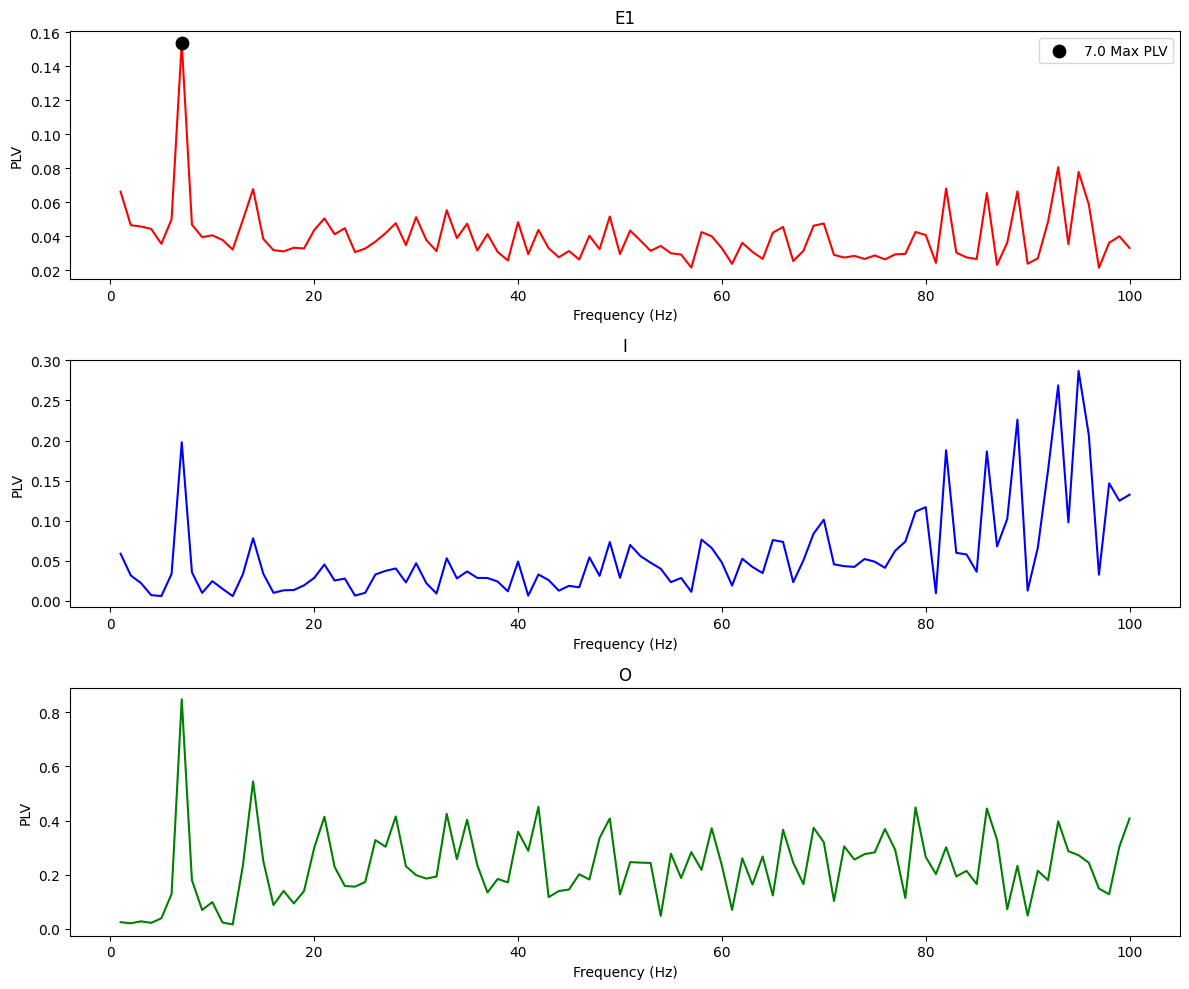

Running gM=1.00, gH=0.00


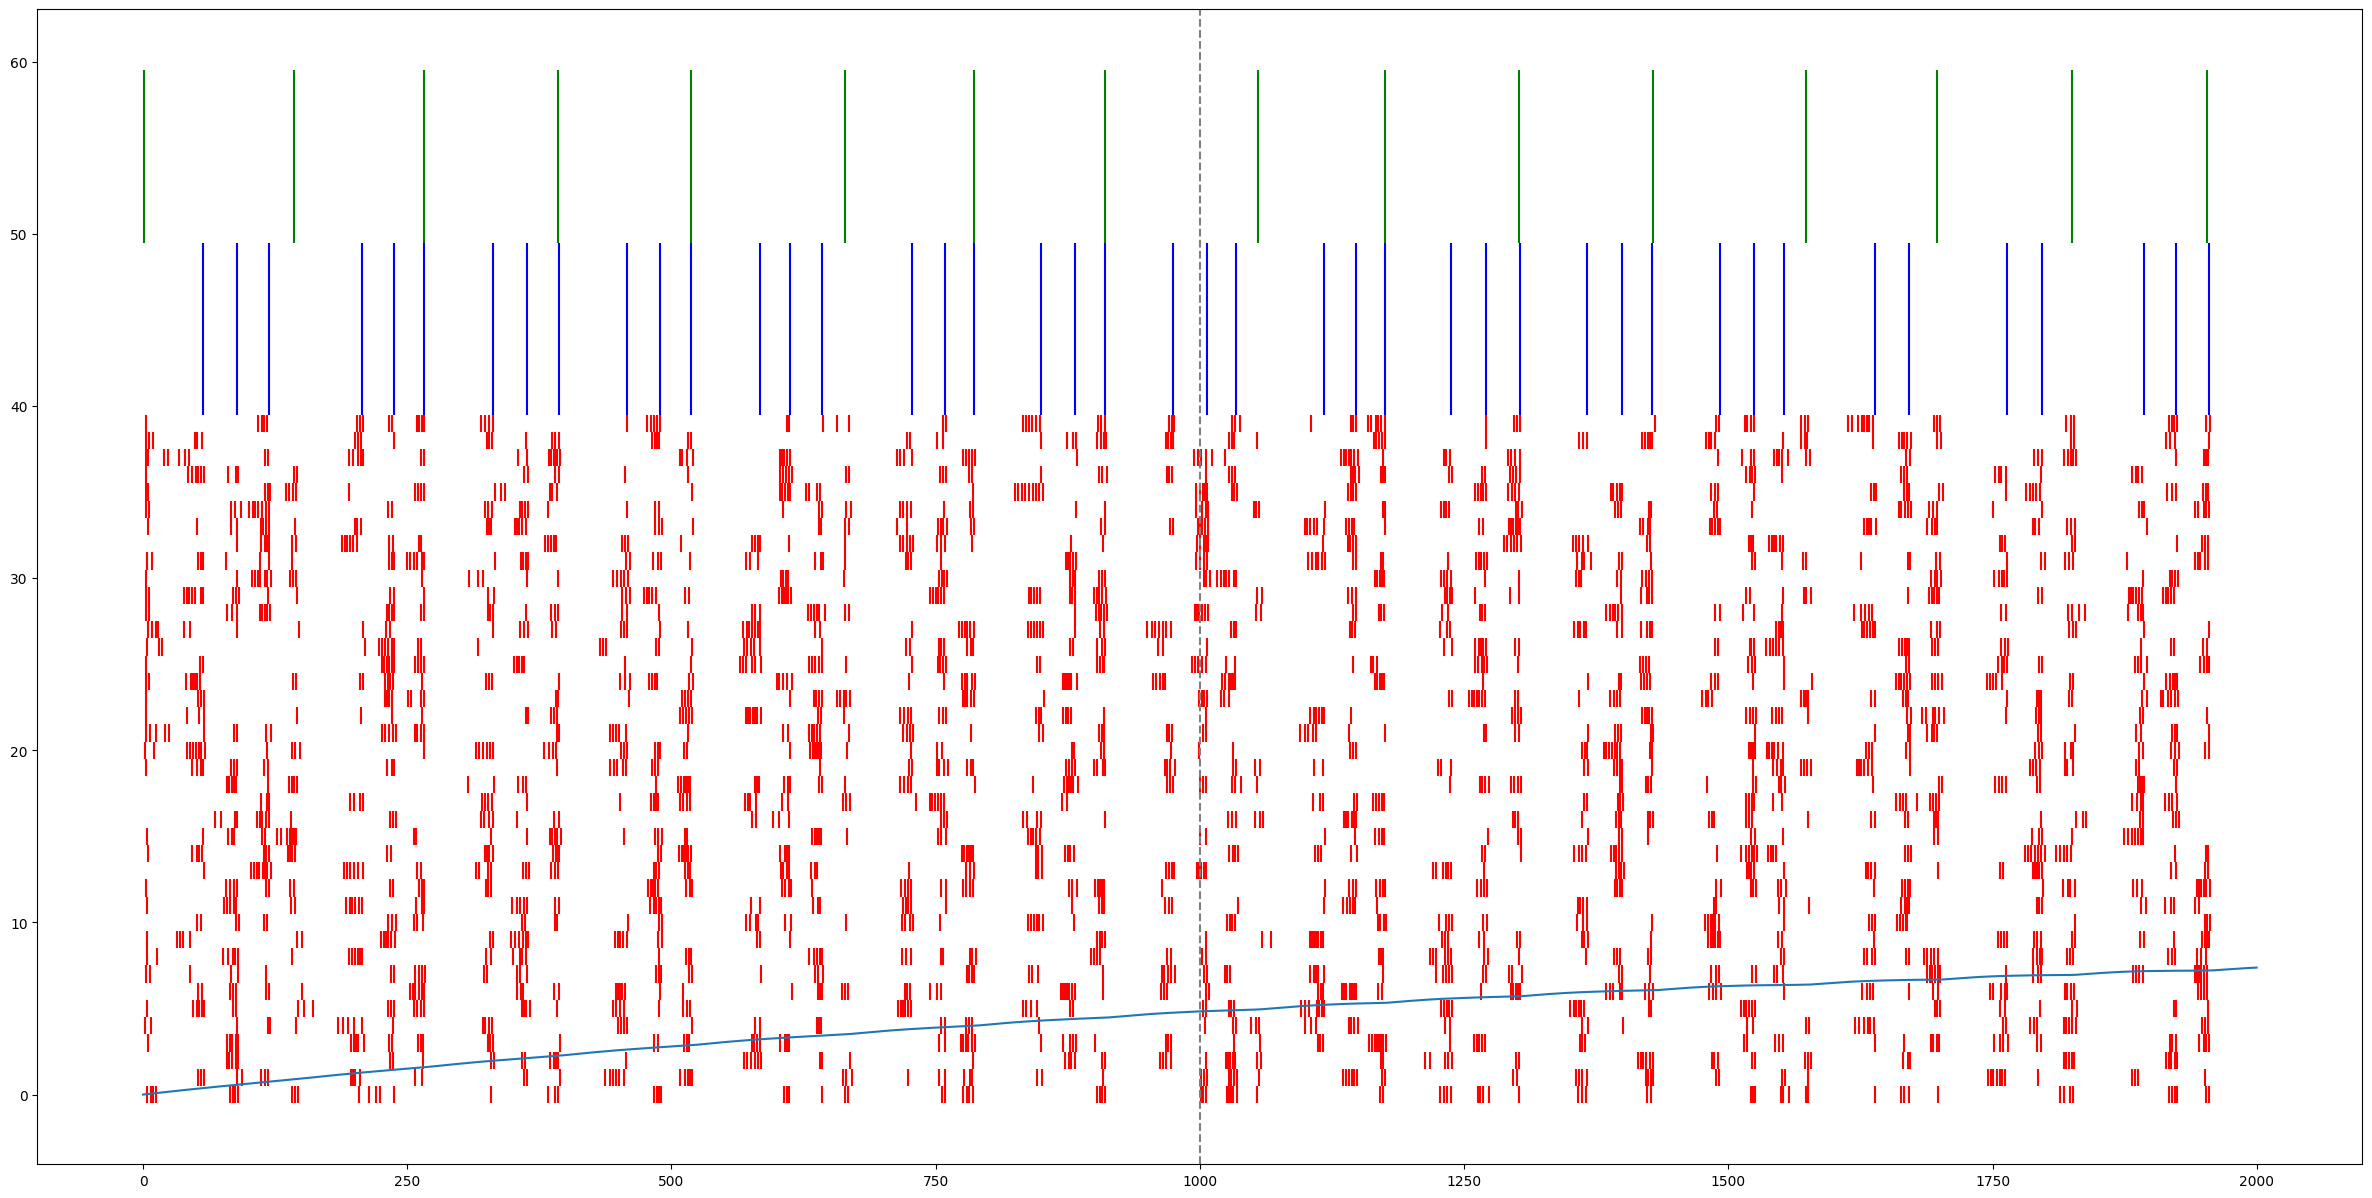

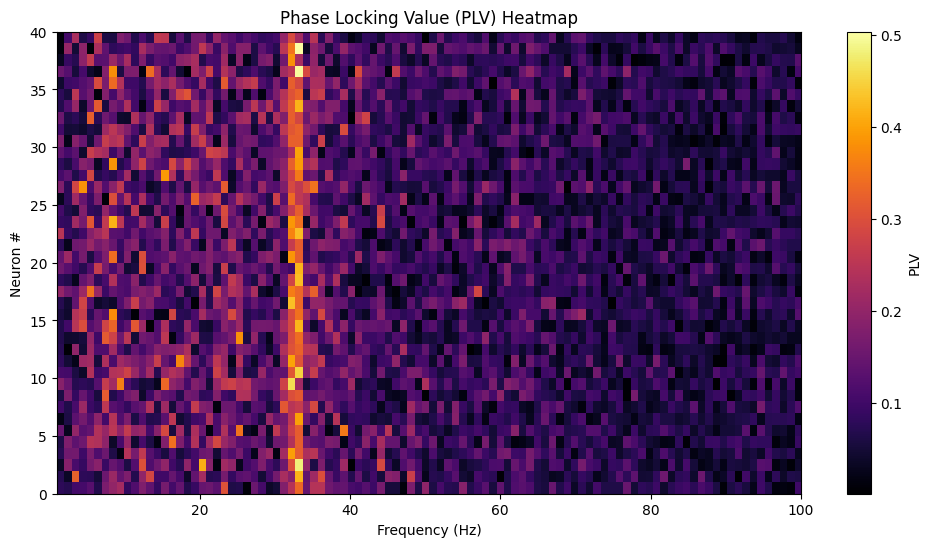

 total spikes Excitatory:  3437
 Average firing rate Excitatory:  42.9625  Hz
 total spikes inhibitory:  430
 Average firing rate Inhibitory:  21.5  Hz
 total spikes OLM:  160
 Average firing rate OLM:  8.0  Hz
E max PLV = 0.348 at 33.00 Hz
I max PLV = 0.521 at 33.00 Hz
O max PLV = 0.692 at 56.00 Hz


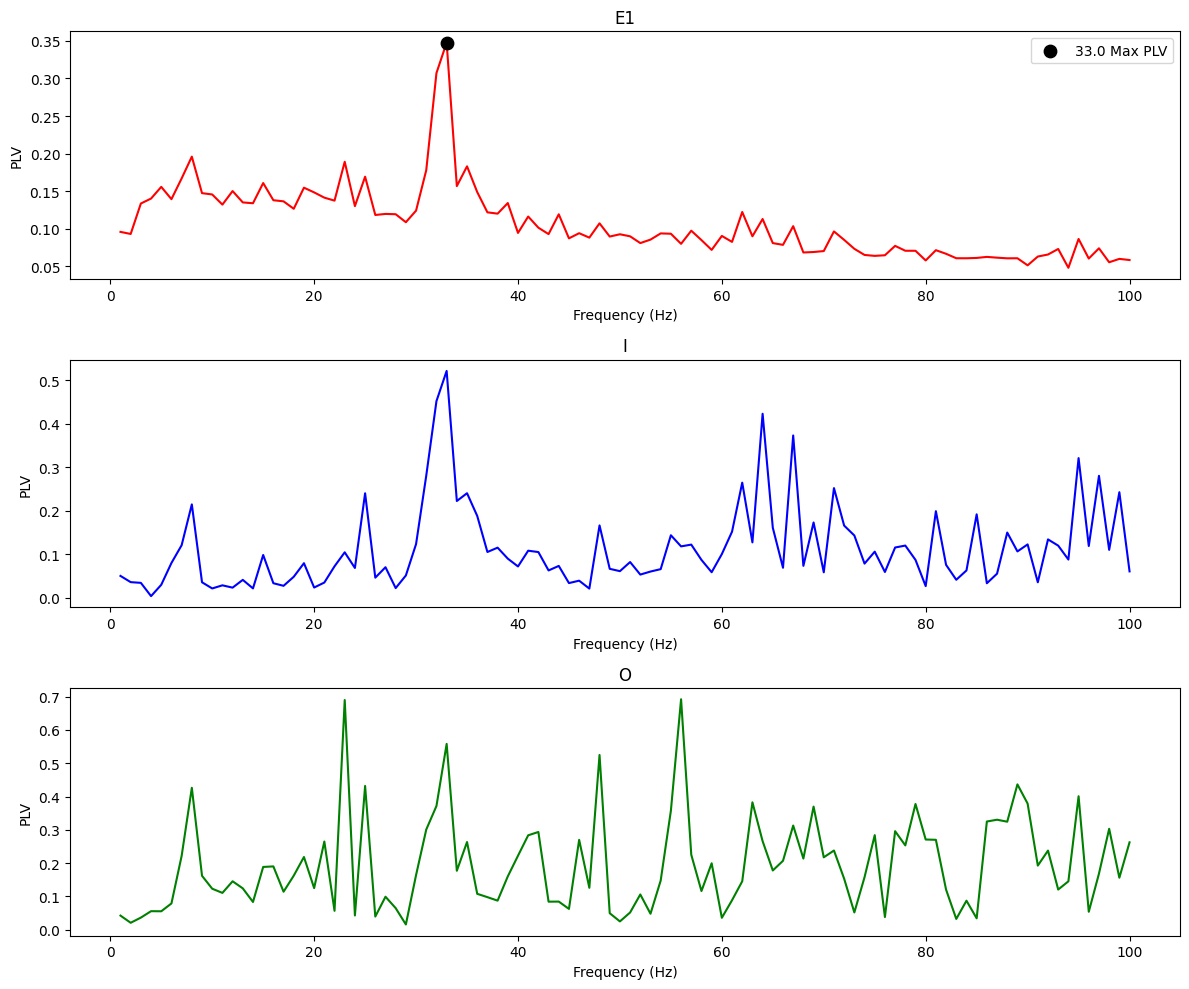

Running gM=1.00, gH=1.00


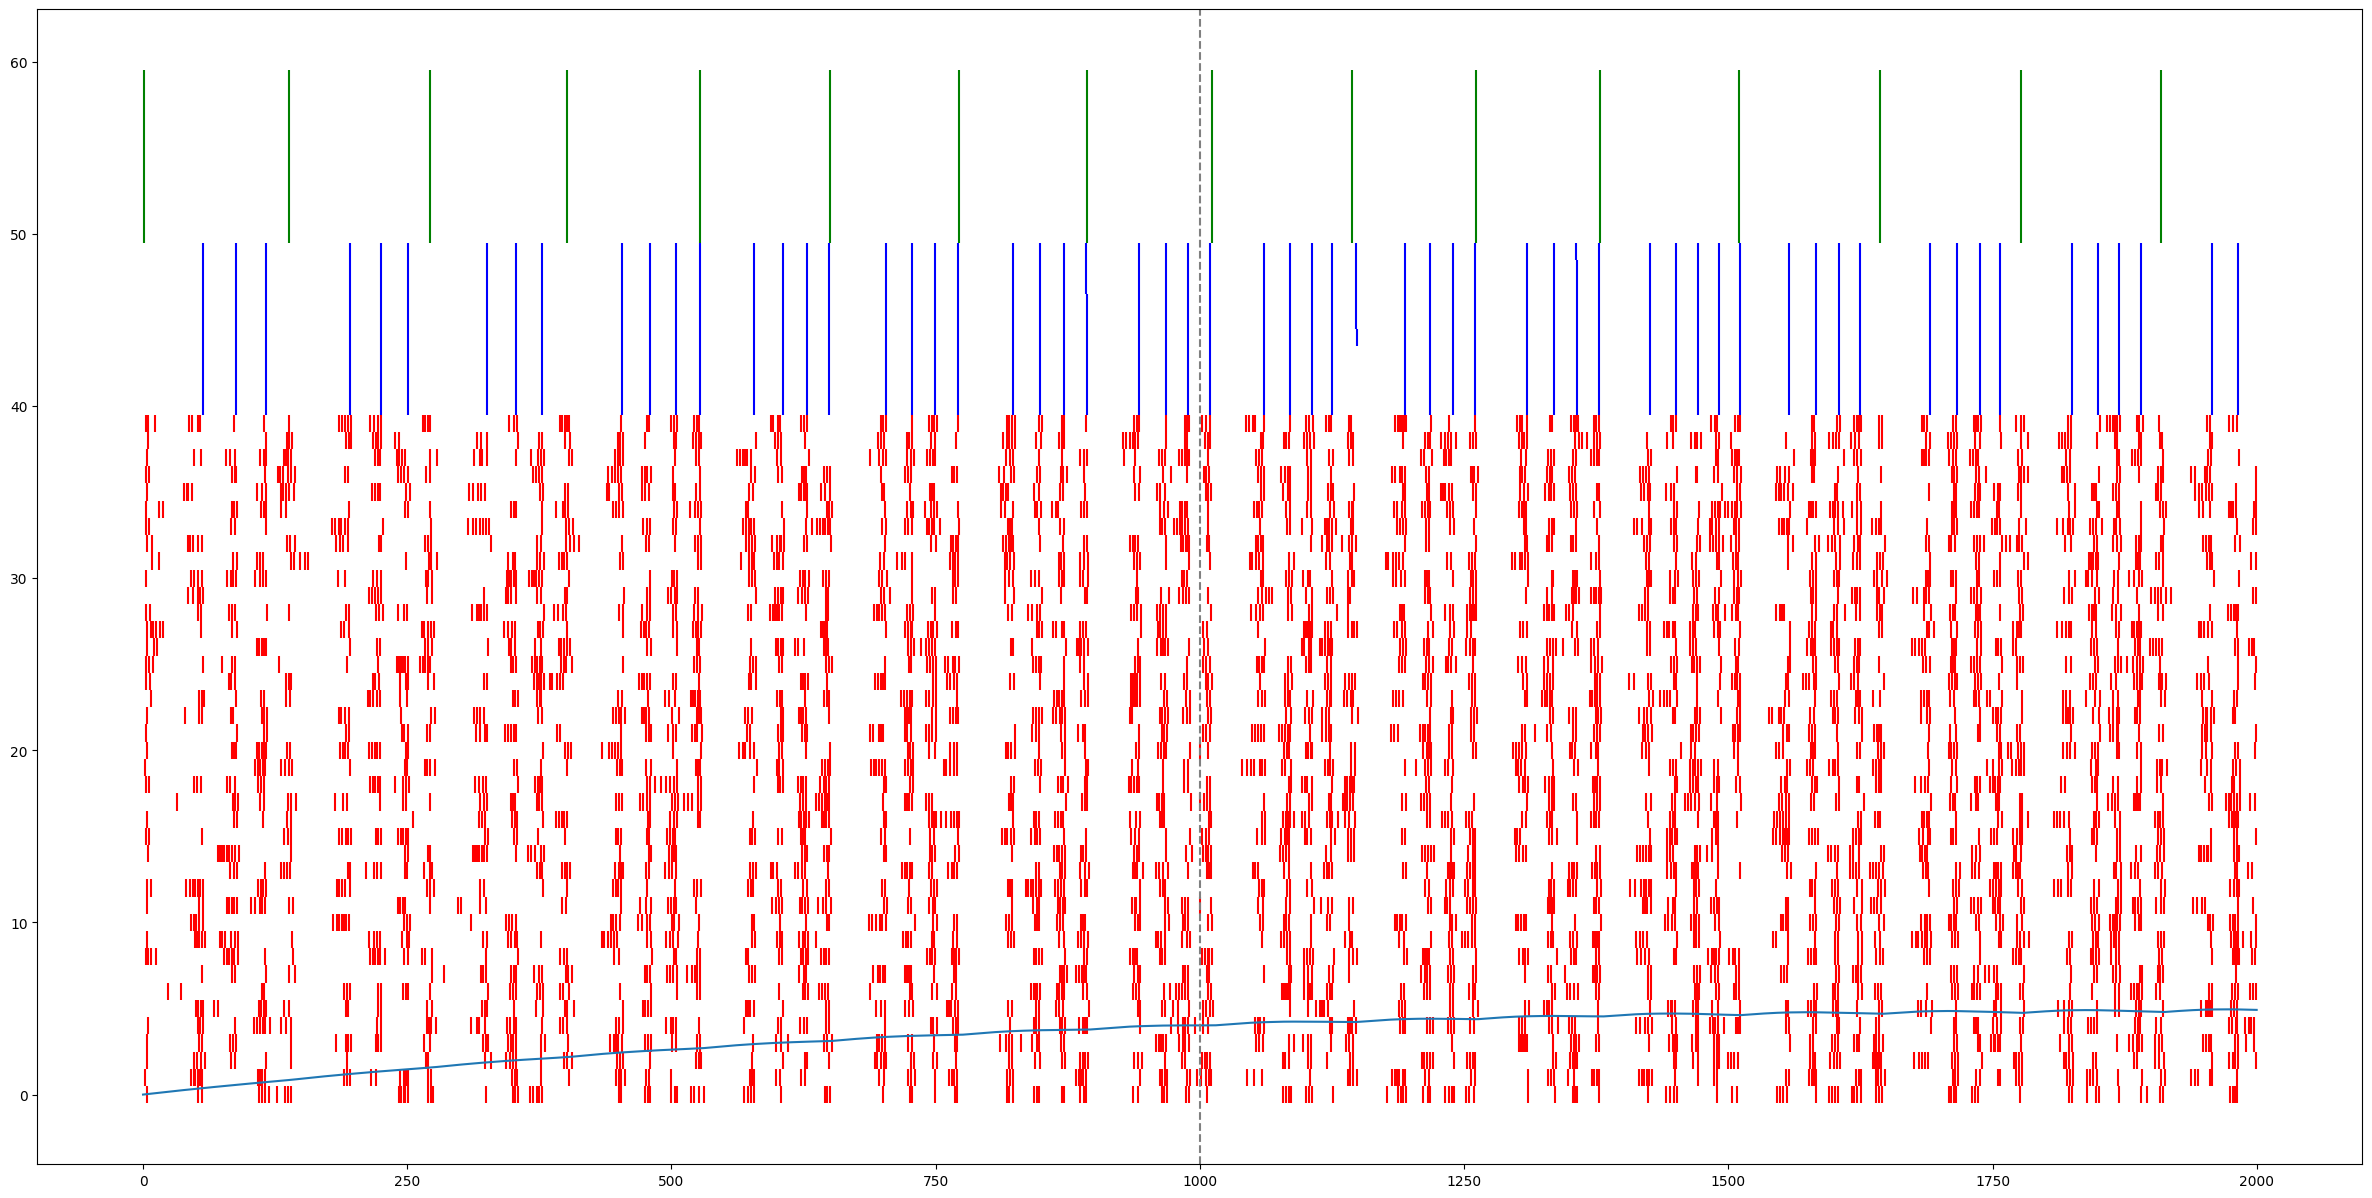

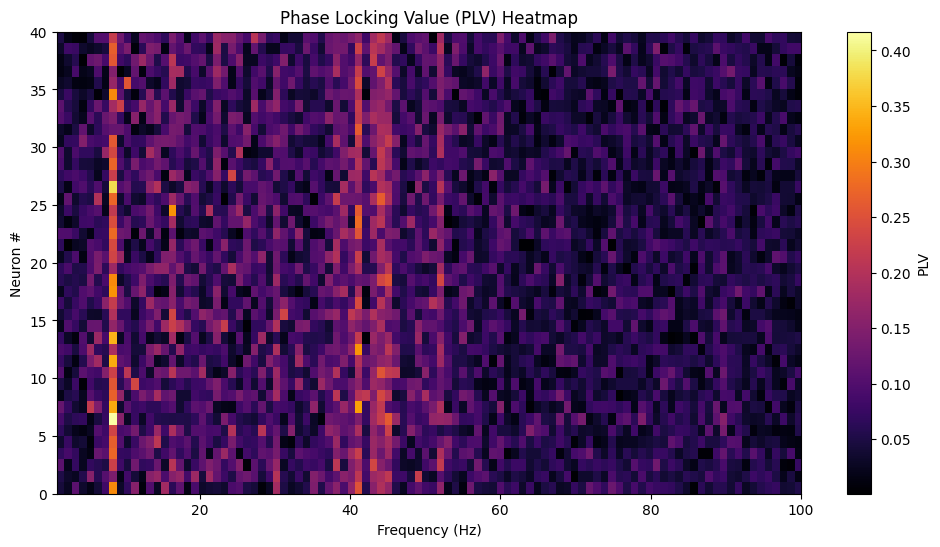

 total spikes Excitatory:  6069
 Average firing rate Excitatory:  75.8625  Hz
 total spikes inhibitory:  606
 Average firing rate Inhibitory:  30.3  Hz
 total spikes OLM:  160
 Average firing rate OLM:  8.0  Hz
E max PLV = 0.248 at 8.00 Hz
I max PLV = 0.340 at 90.00 Hz
O max PLV = 0.905 at 8.00 Hz


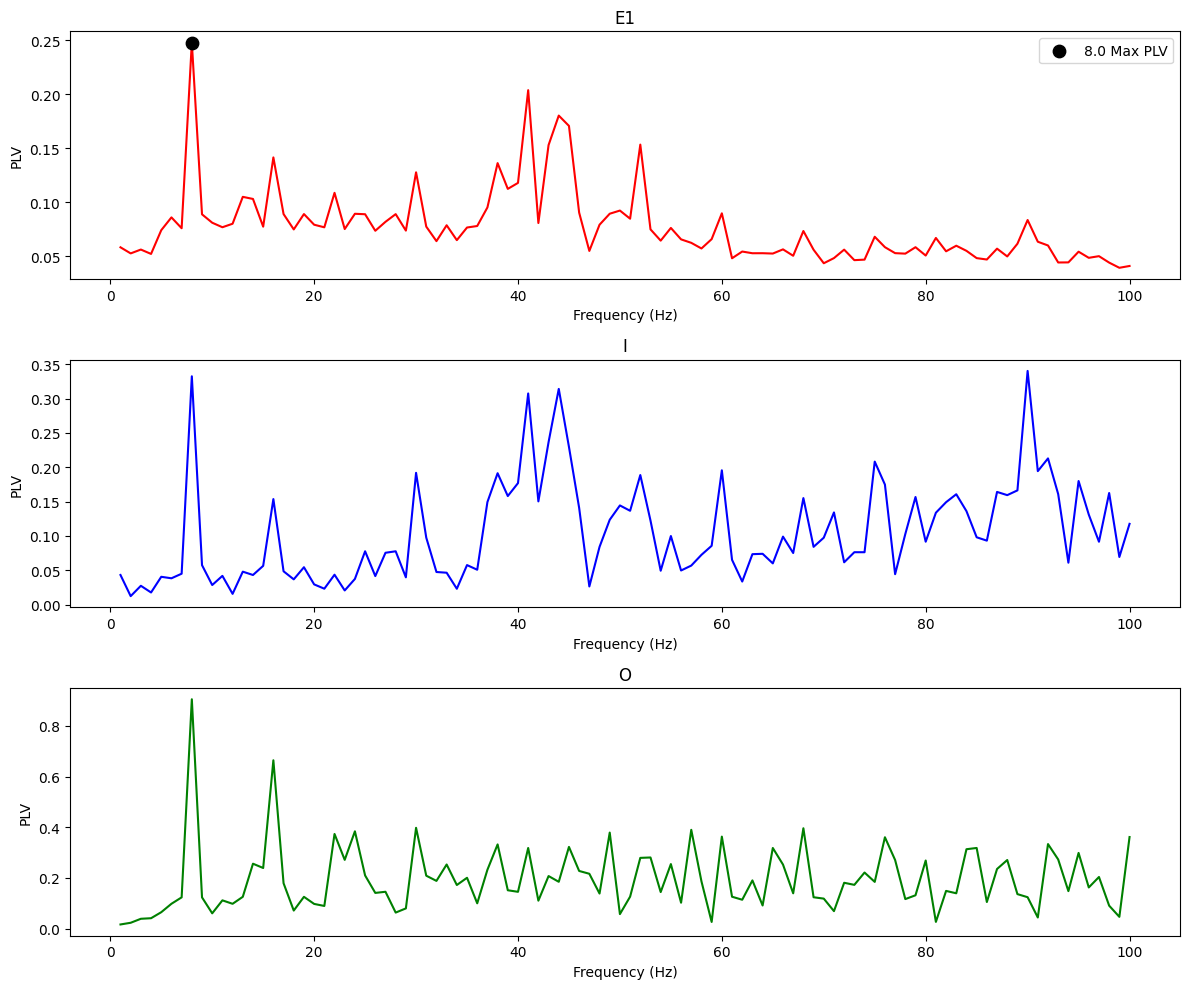

Running gM=1.00, gH=2.00


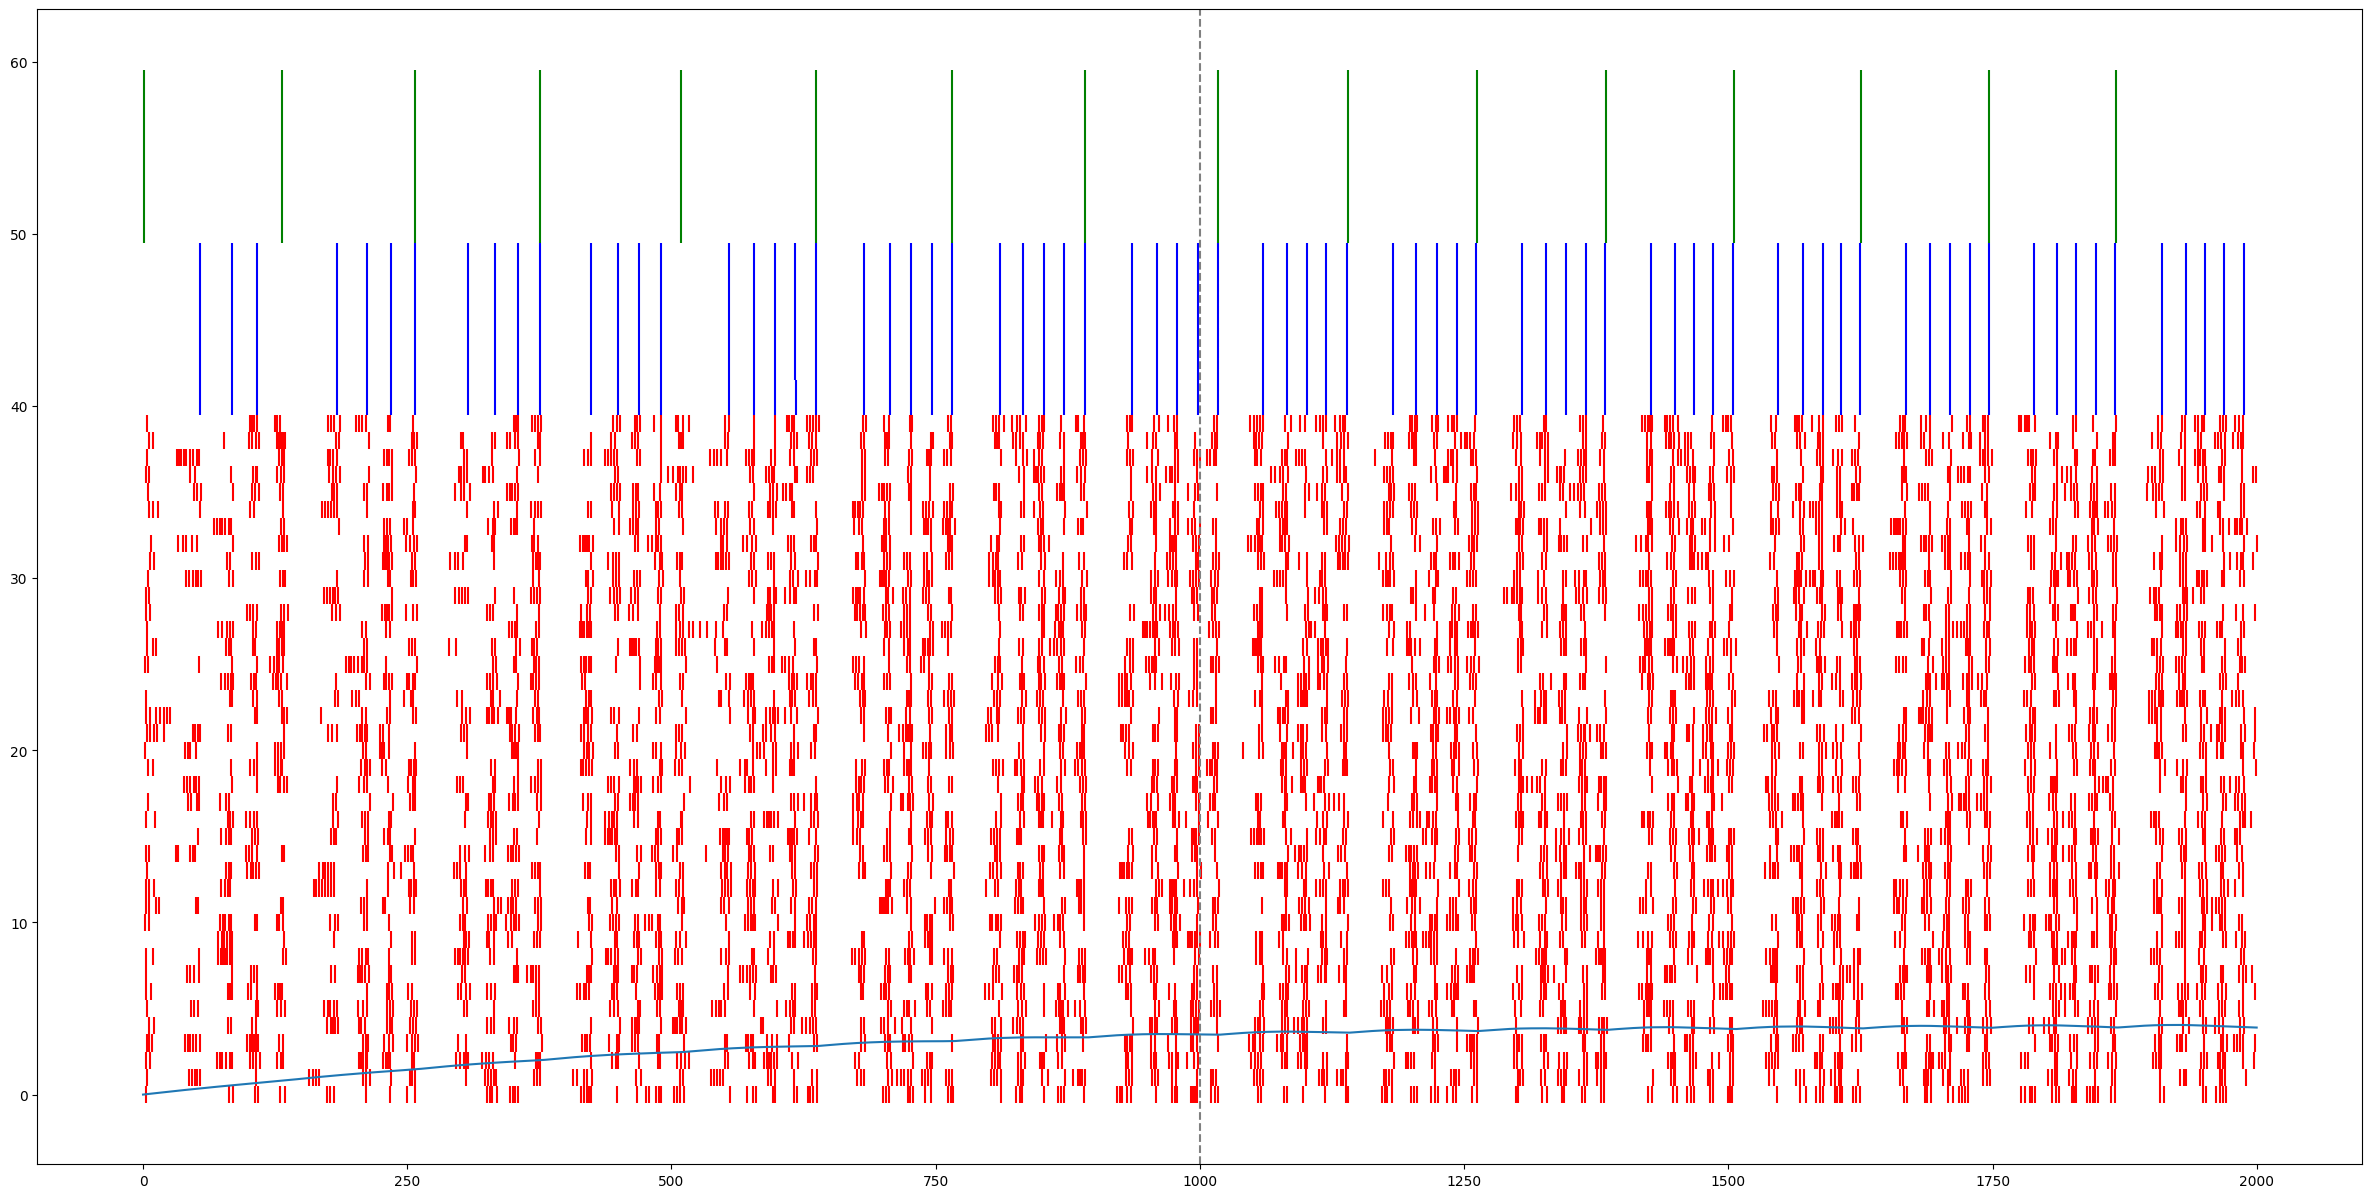

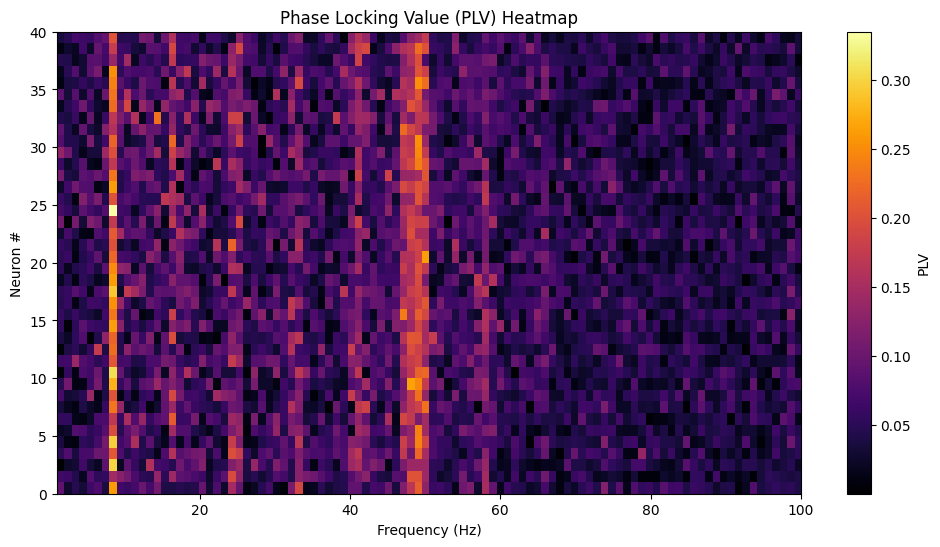

 total spikes Excitatory:  7313
 Average firing rate Excitatory:  91.4125  Hz
 total spikes inhibitory:  750
 Average firing rate Inhibitory:  37.5  Hz
 total spikes OLM:  160
 Average firing rate OLM:  8.0  Hz
E max PLV = 0.226 at 8.00 Hz
I max PLV = 0.314 at 49.00 Hz
O max PLV = 0.937 at 8.00 Hz


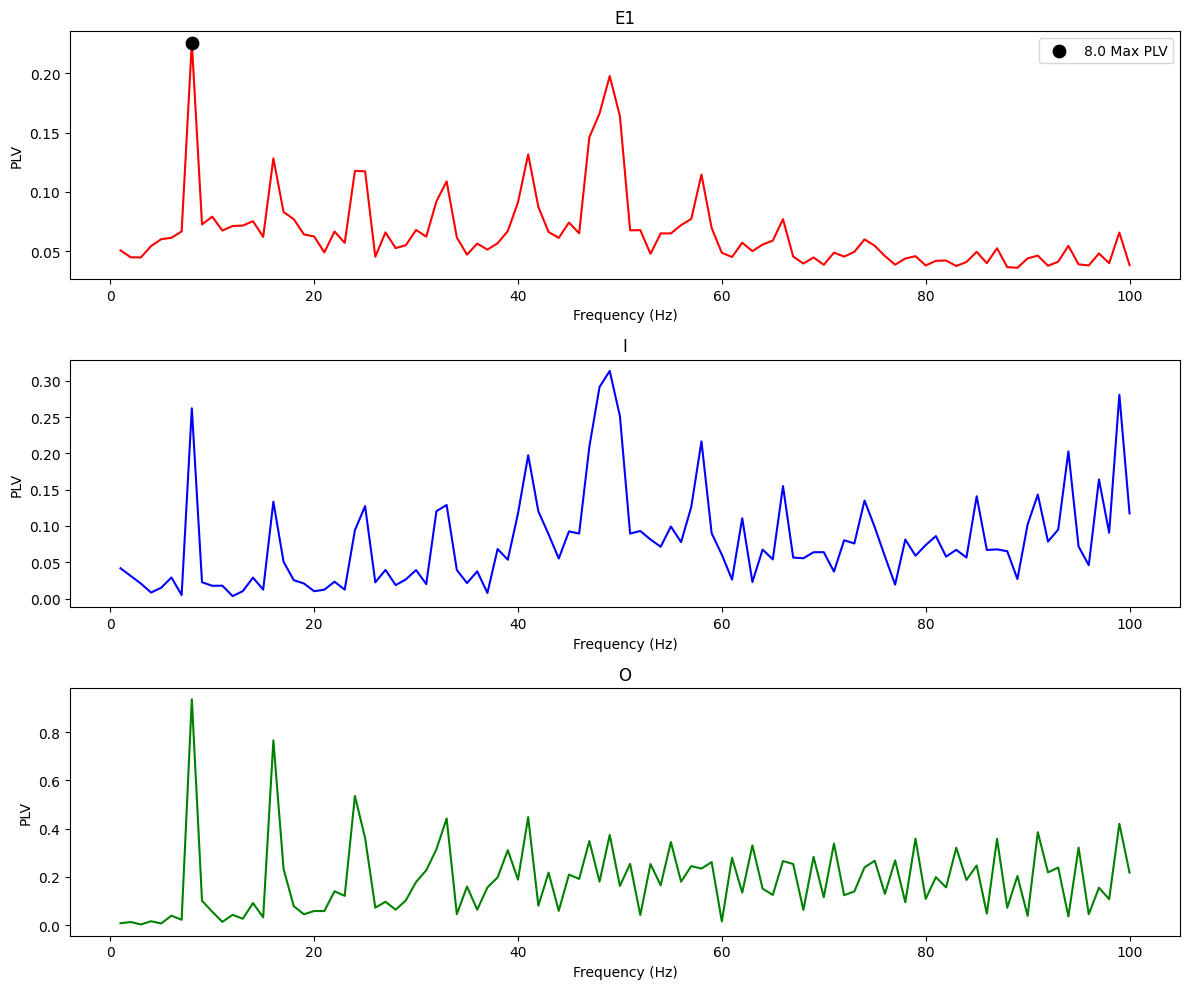

Running gM=1.00, gH=3.00


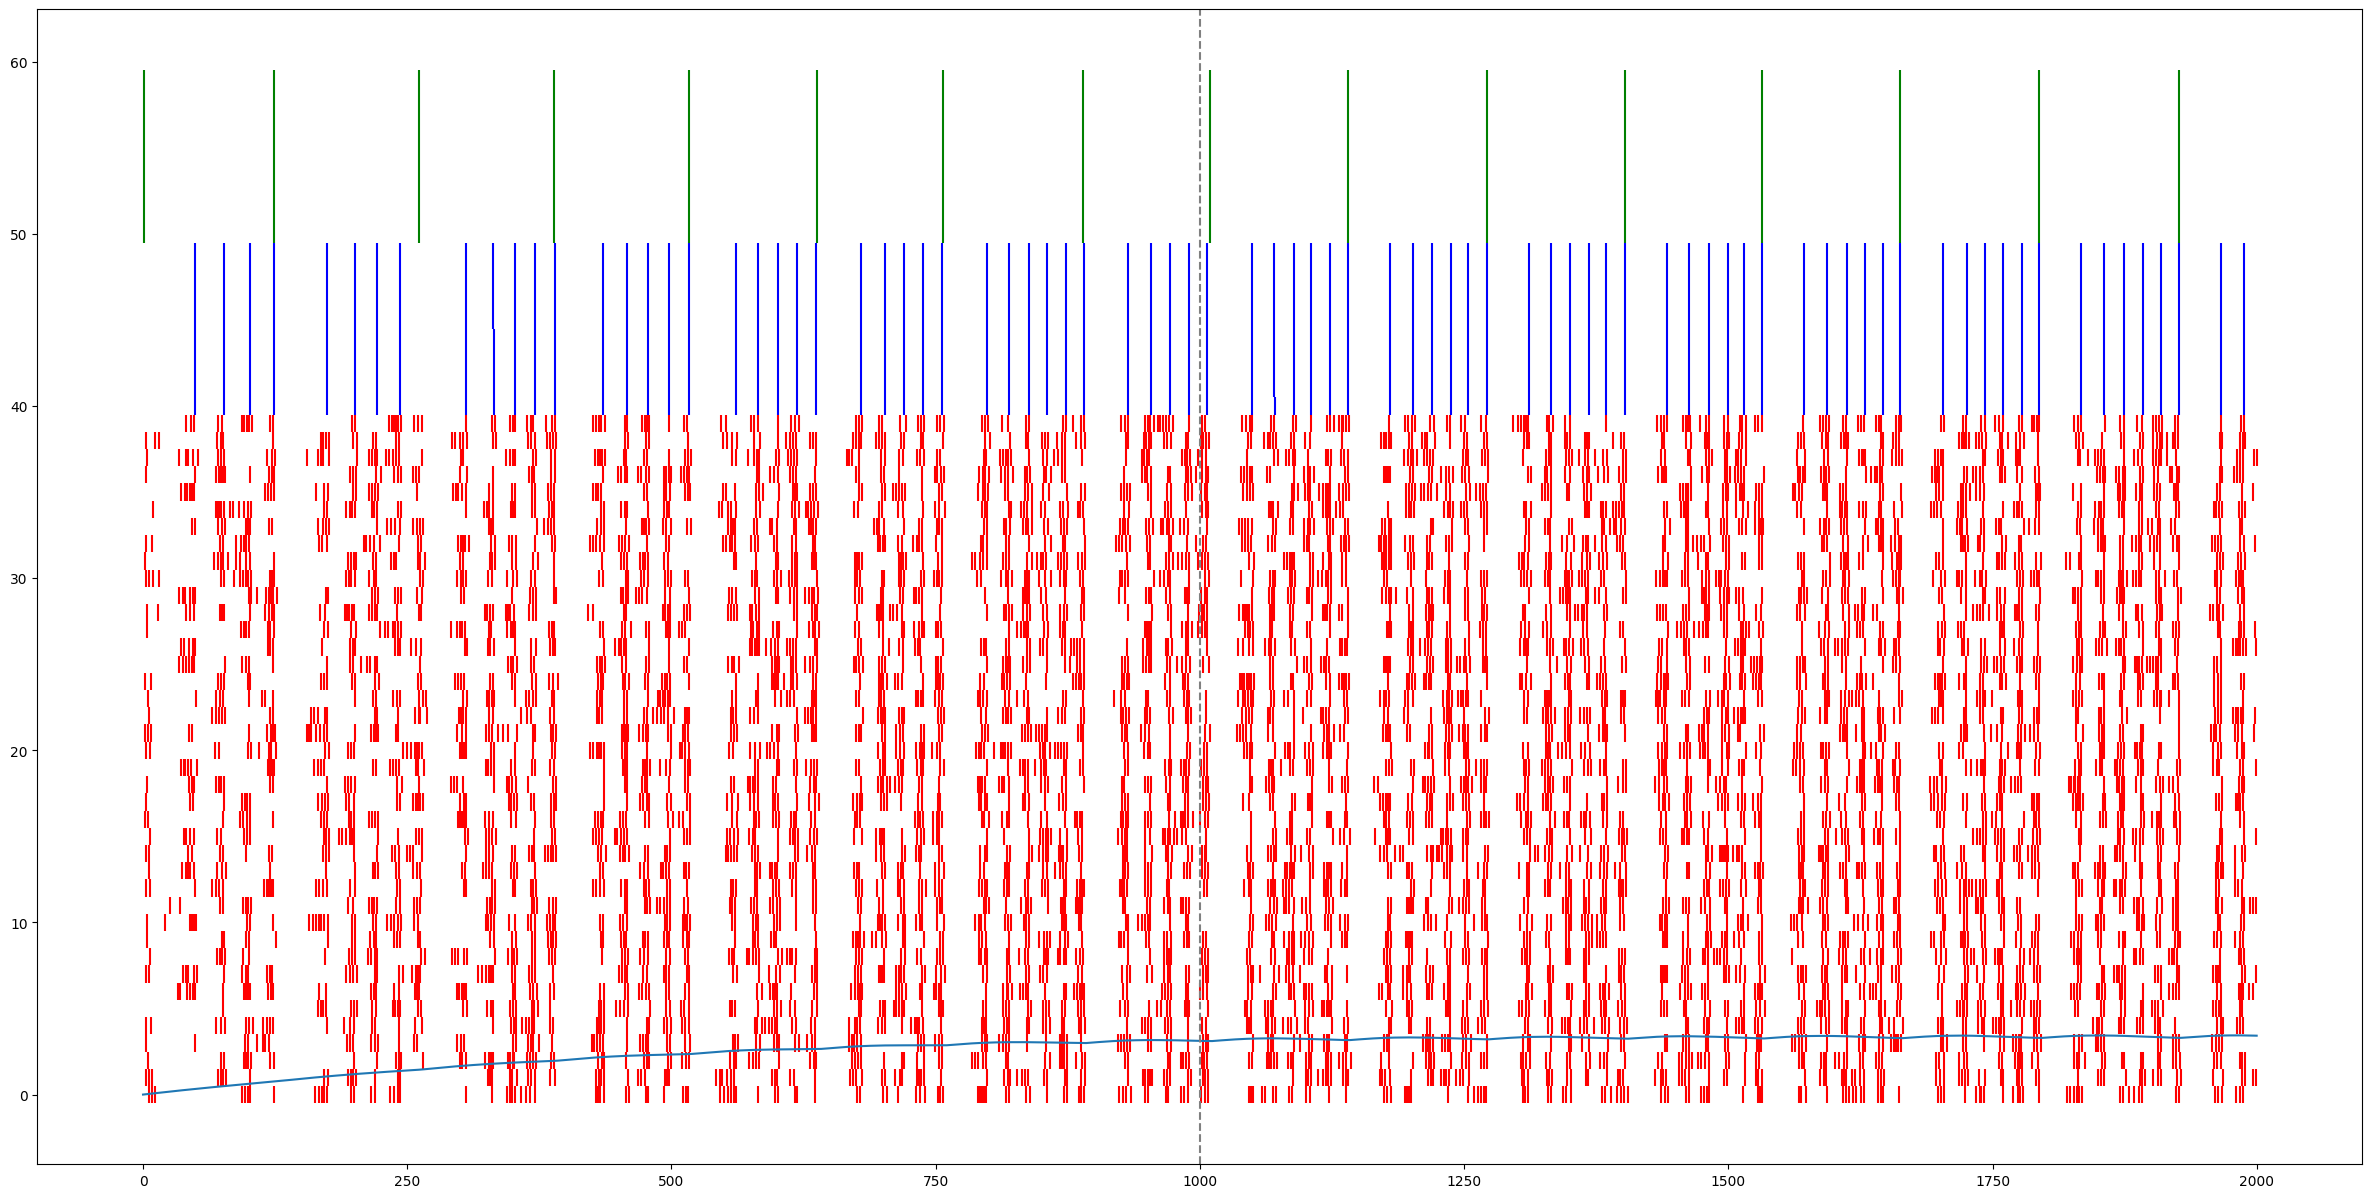

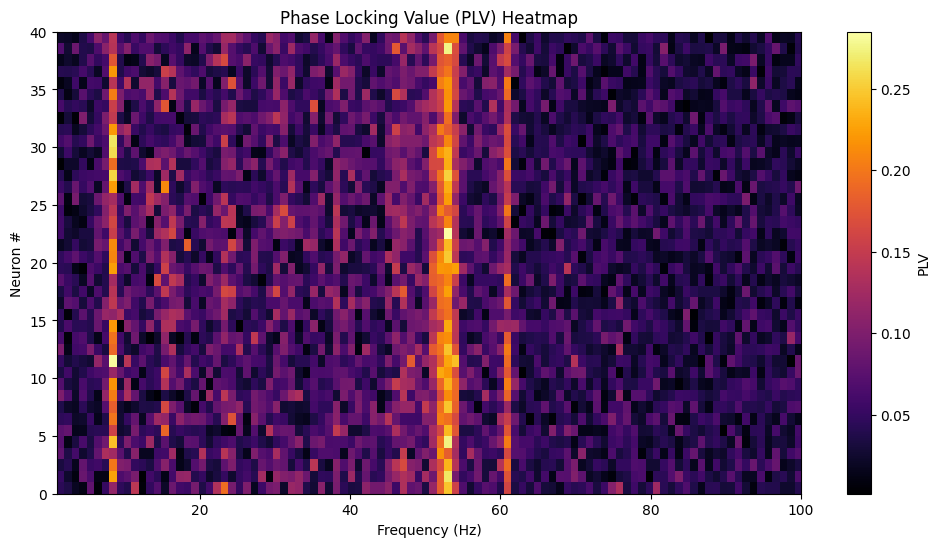

 total spikes Excitatory:  8190
 Average firing rate Excitatory:  102.375  Hz
 total spikes inhibitory:  830
 Average firing rate Inhibitory:  41.5  Hz
 total spikes OLM:  160
 Average firing rate OLM:  8.0  Hz
E max PLV = 0.224 at 53.00 Hz
I max PLV = 0.389 at 53.00 Hz
O max PLV = 0.761 at 8.00 Hz


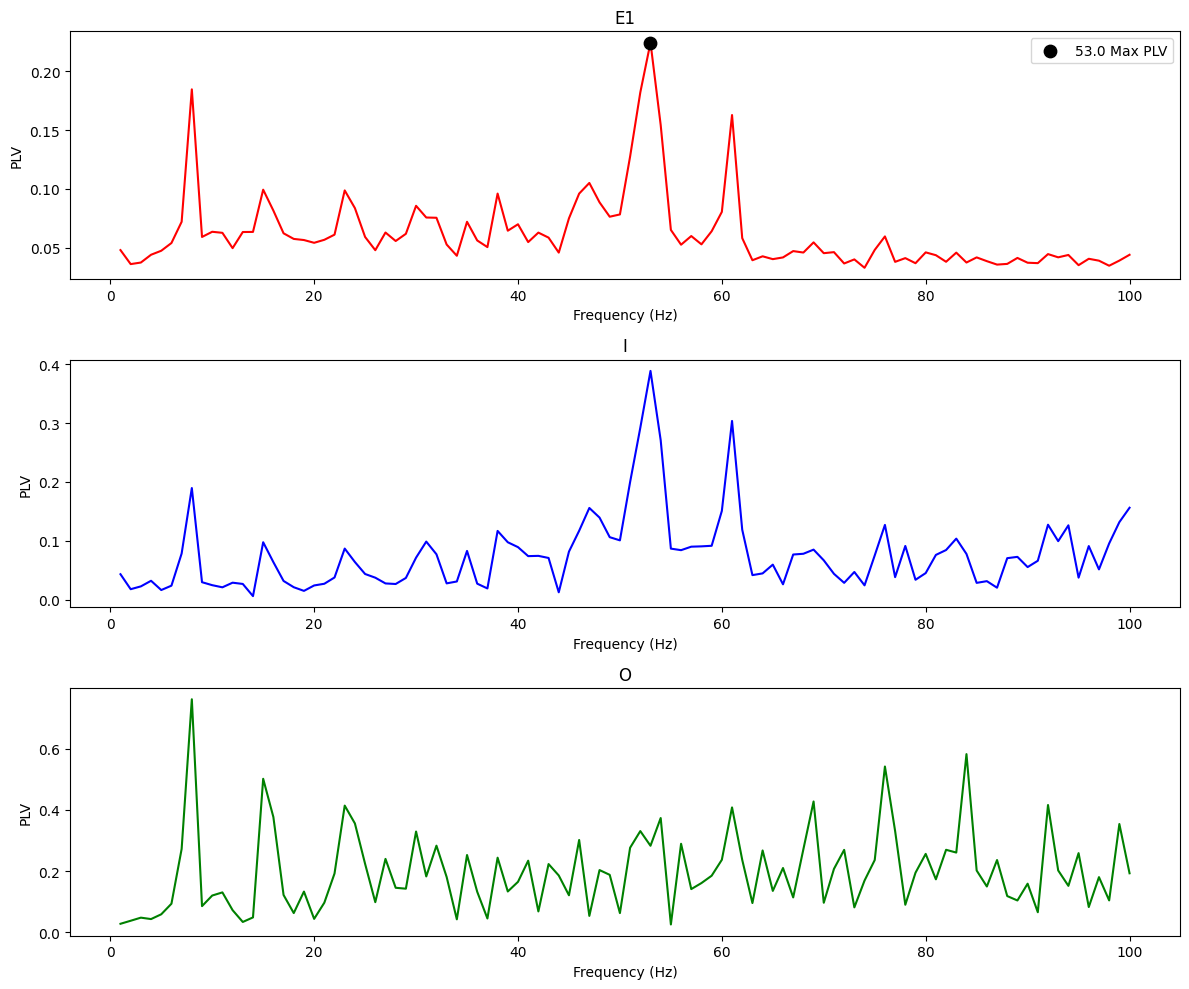

Running gM=2.00, gH=0.00


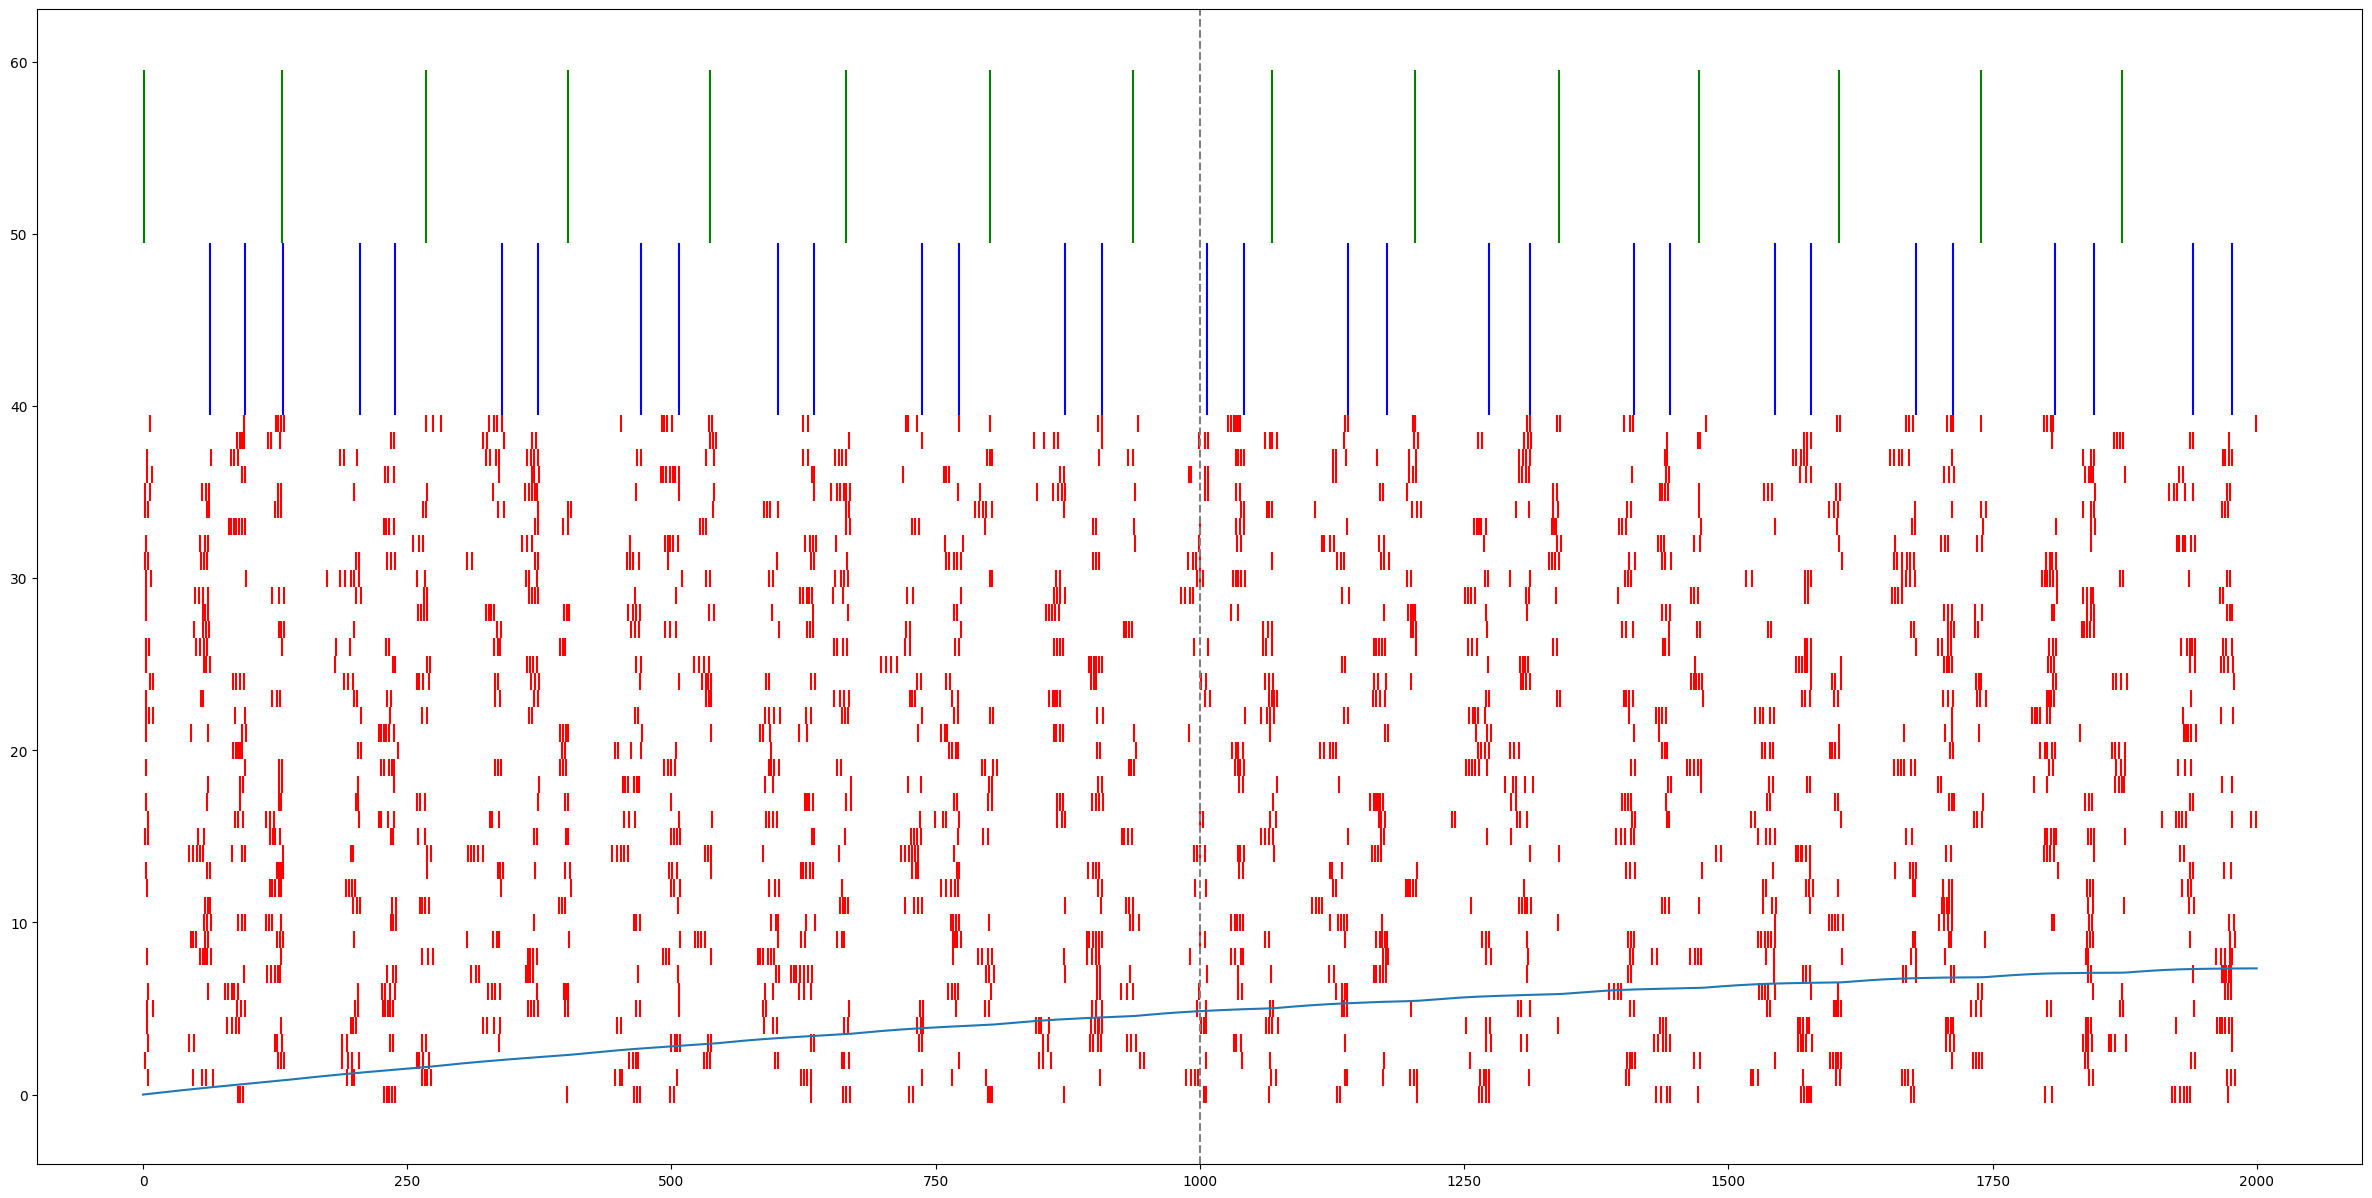

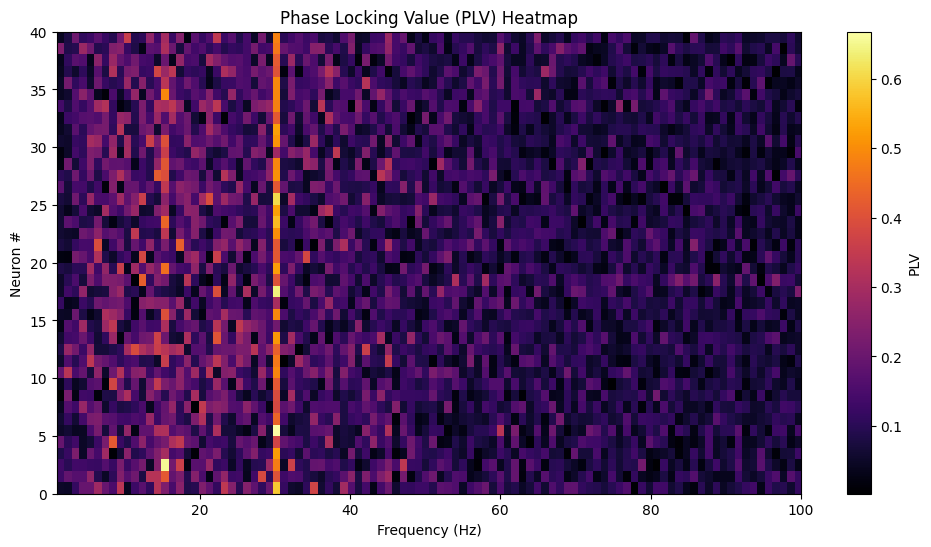

 total spikes Excitatory:  2384
 Average firing rate Excitatory:  29.8  Hz
 total spikes inhibitory:  310
 Average firing rate Inhibitory:  15.5  Hz
 total spikes OLM:  150
 Average firing rate OLM:  7.5  Hz
E max PLV = 0.465 at 30.00 Hz
I max PLV = 0.719 at 30.00 Hz
O max PLV = 0.971 at 15.00 Hz


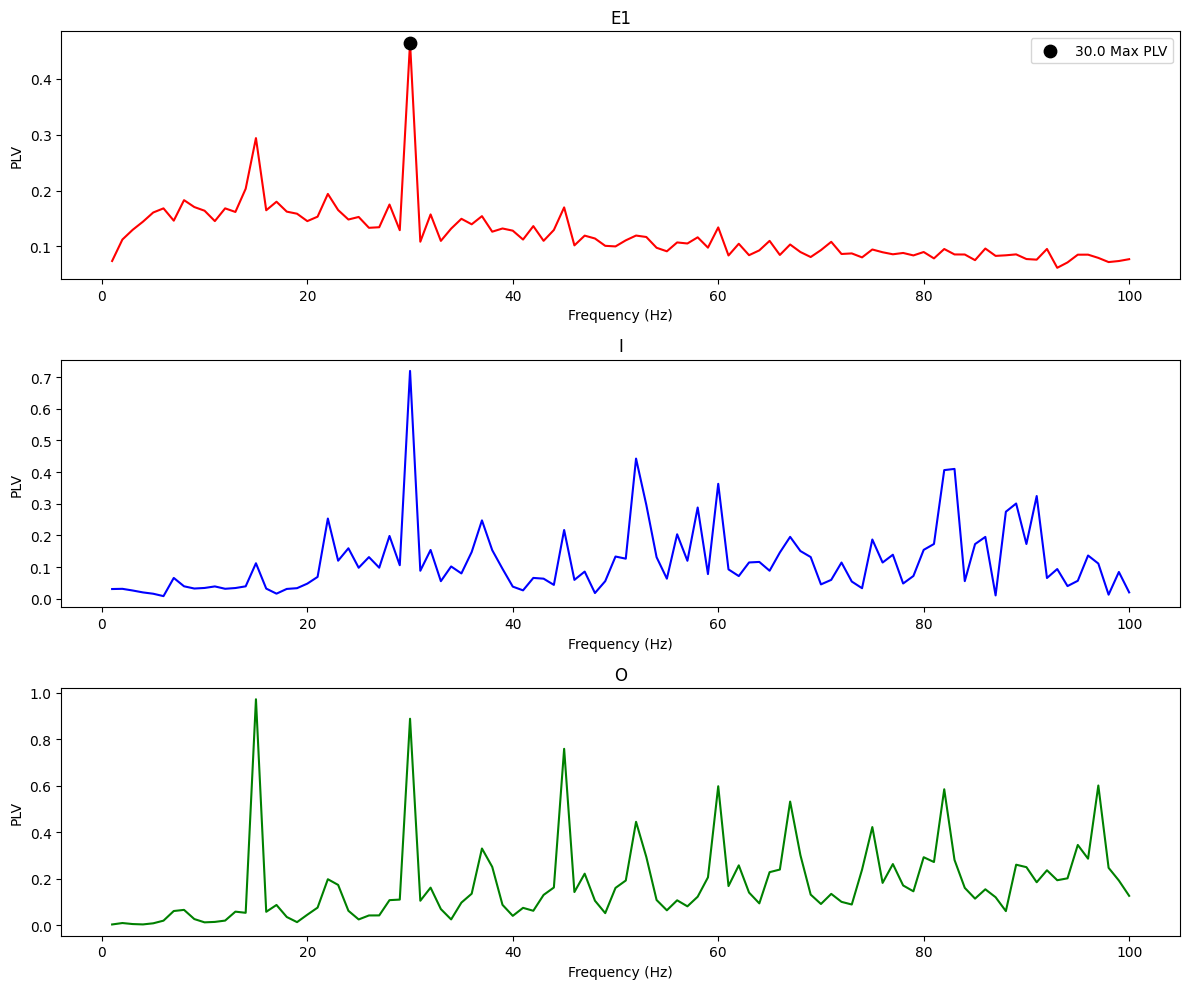

Running gM=2.00, gH=1.00


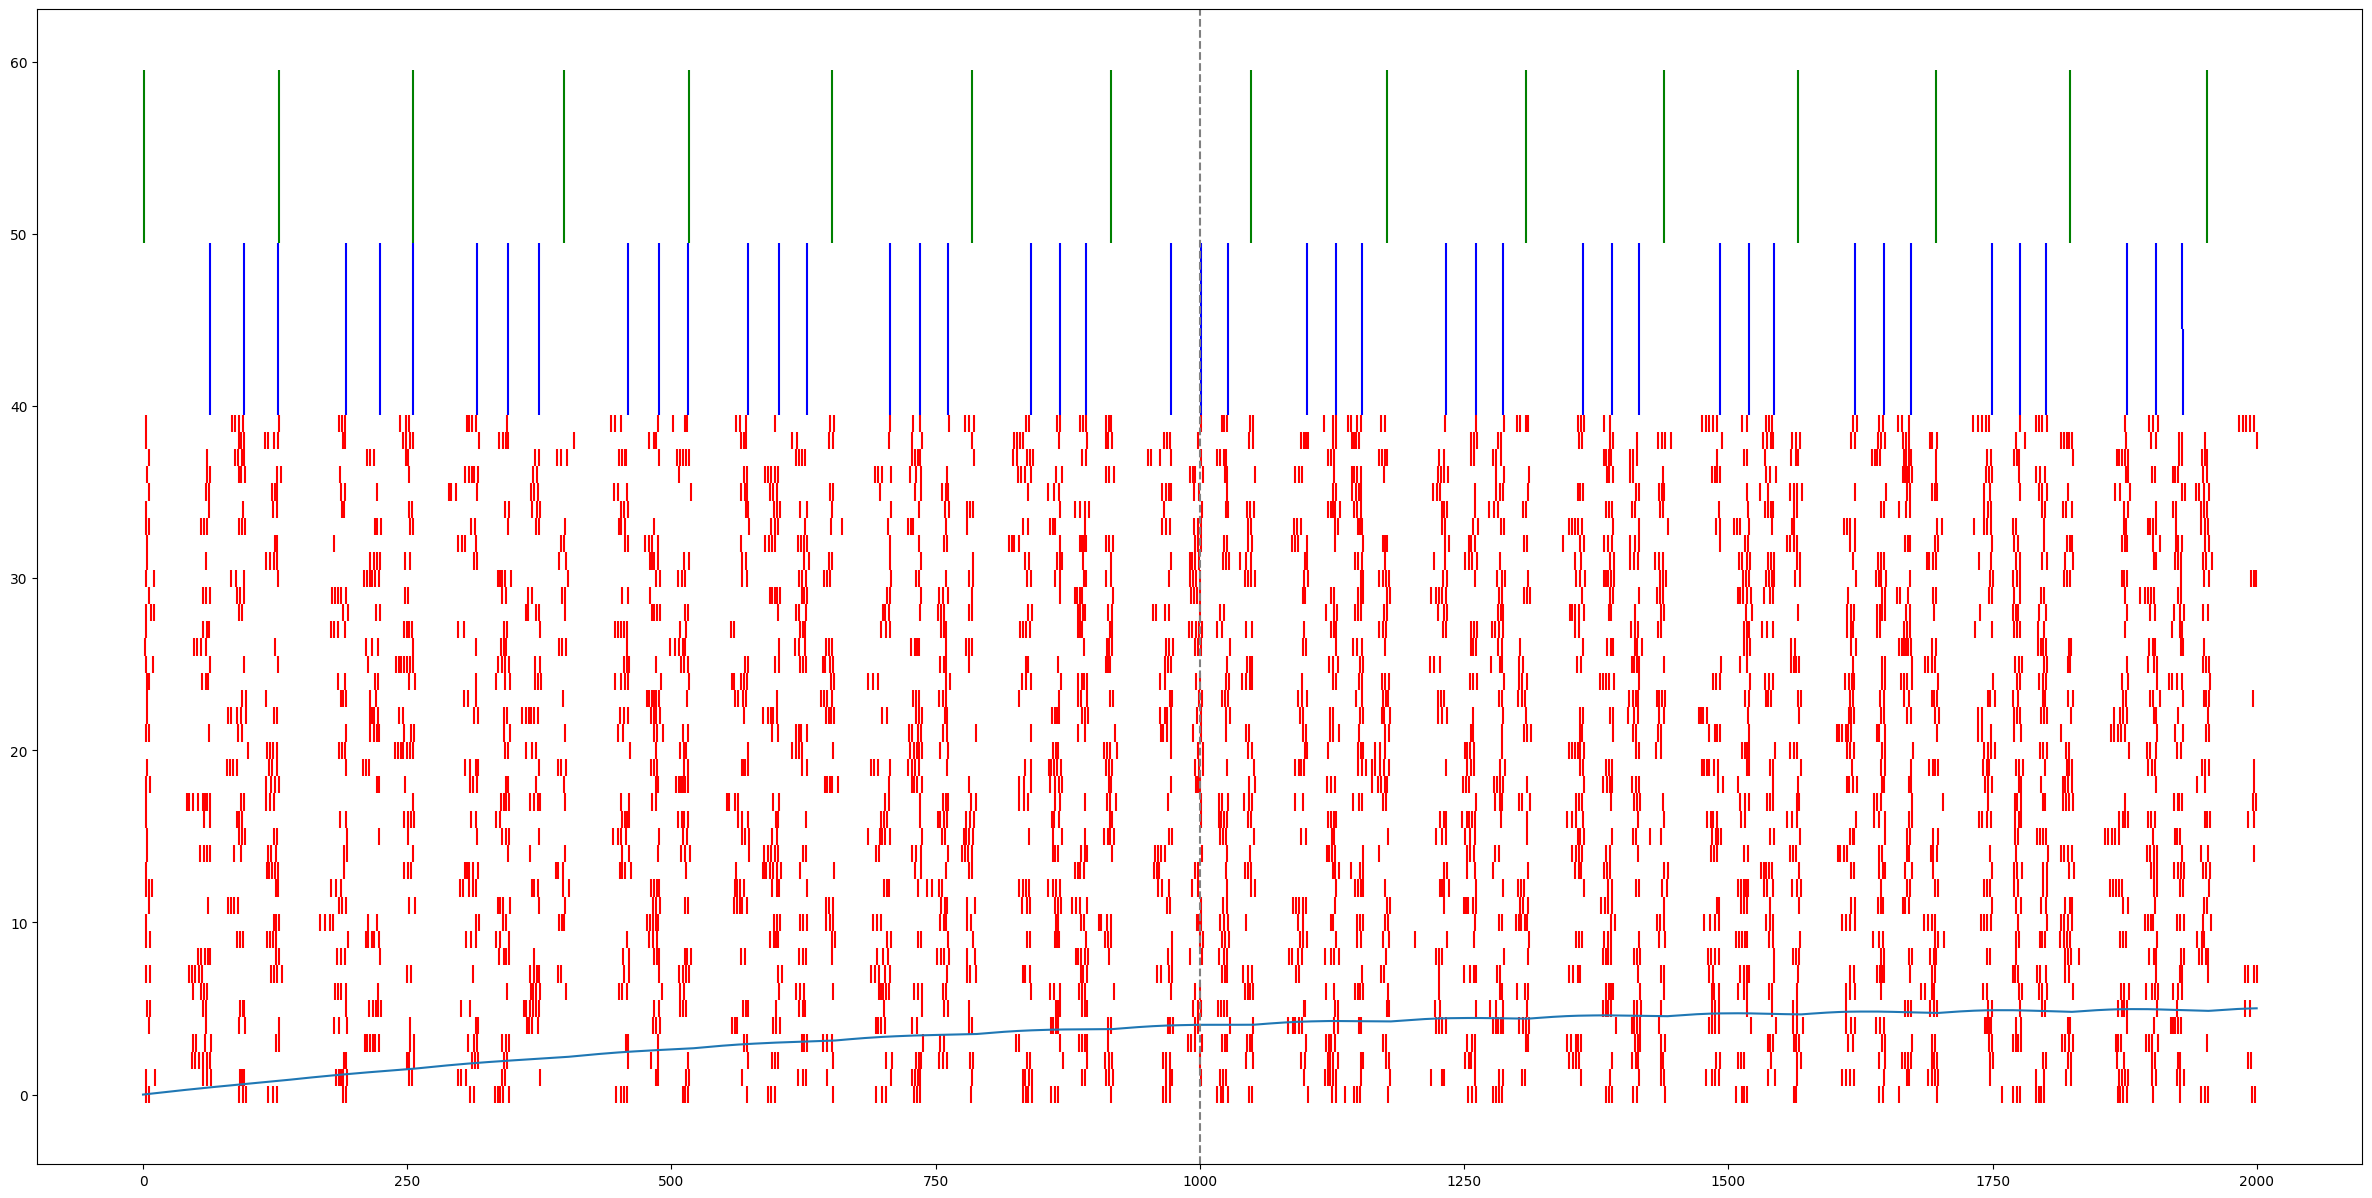

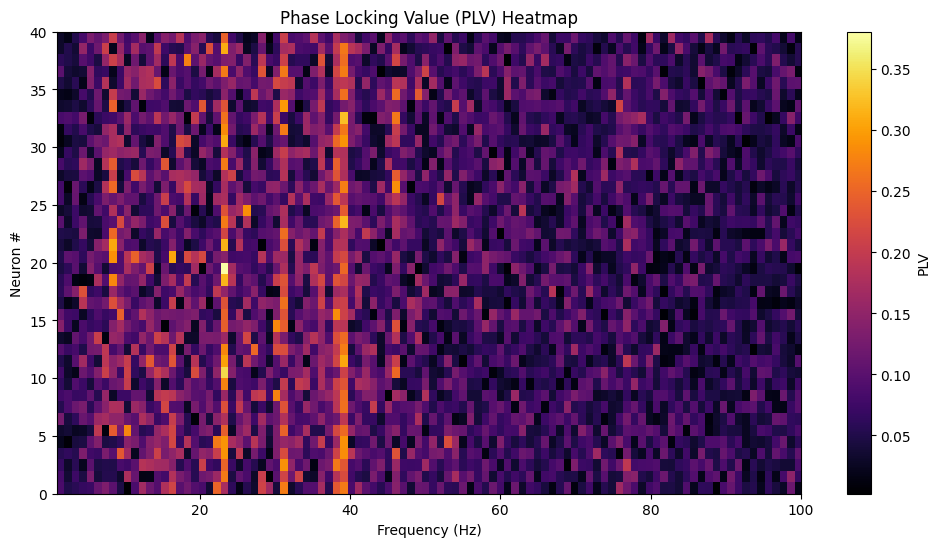

 total spikes Excitatory:  4179
 Average firing rate Excitatory:  52.2375  Hz
 total spikes inhibitory:  450
 Average firing rate Inhibitory:  22.5  Hz
 total spikes OLM:  160
 Average firing rate OLM:  8.0  Hz
E max PLV = 0.238 at 23.00 Hz
I max PLV = 0.457 at 31.00 Hz
O max PLV = 0.871 at 23.00 Hz


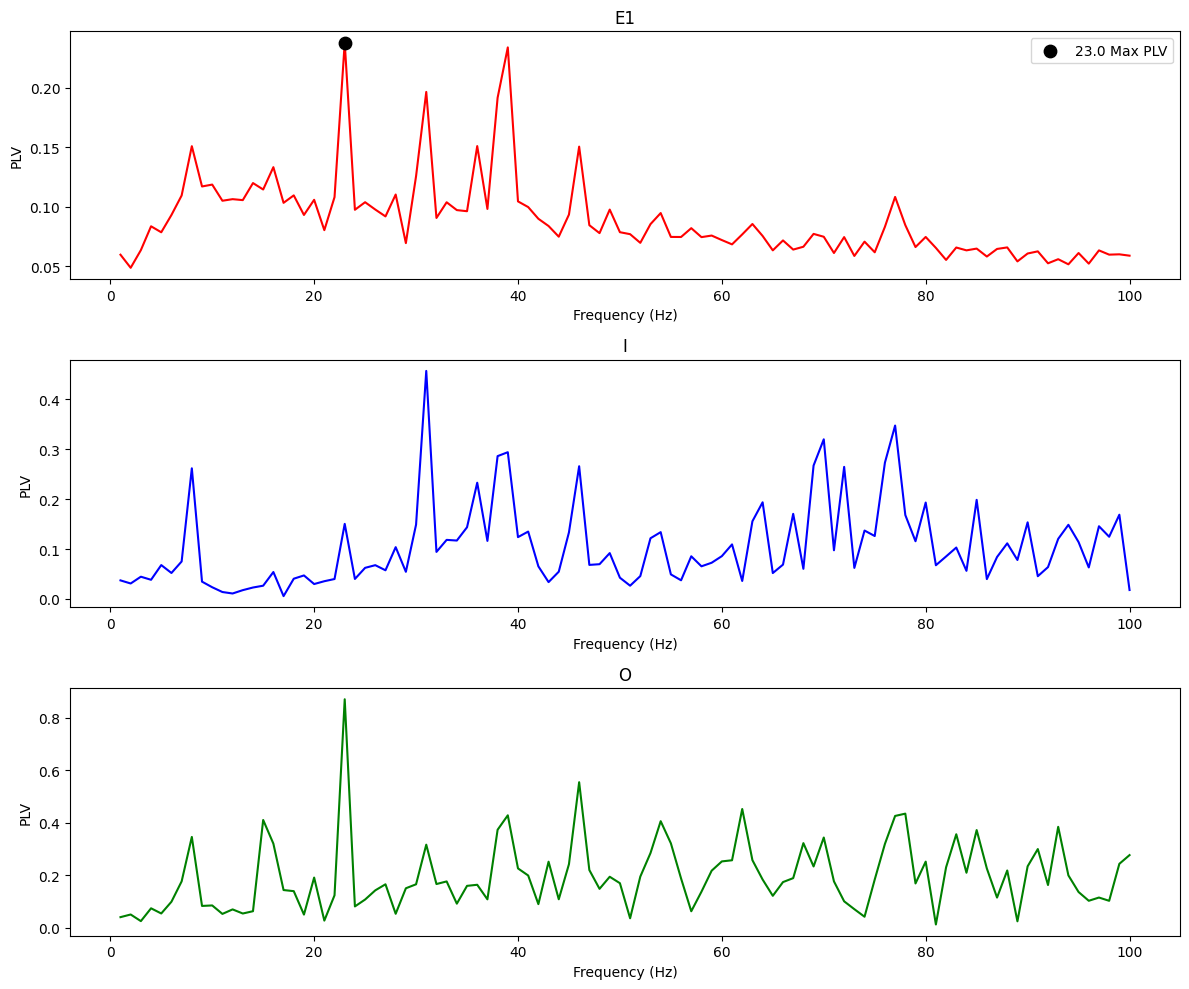

Running gM=2.00, gH=2.00


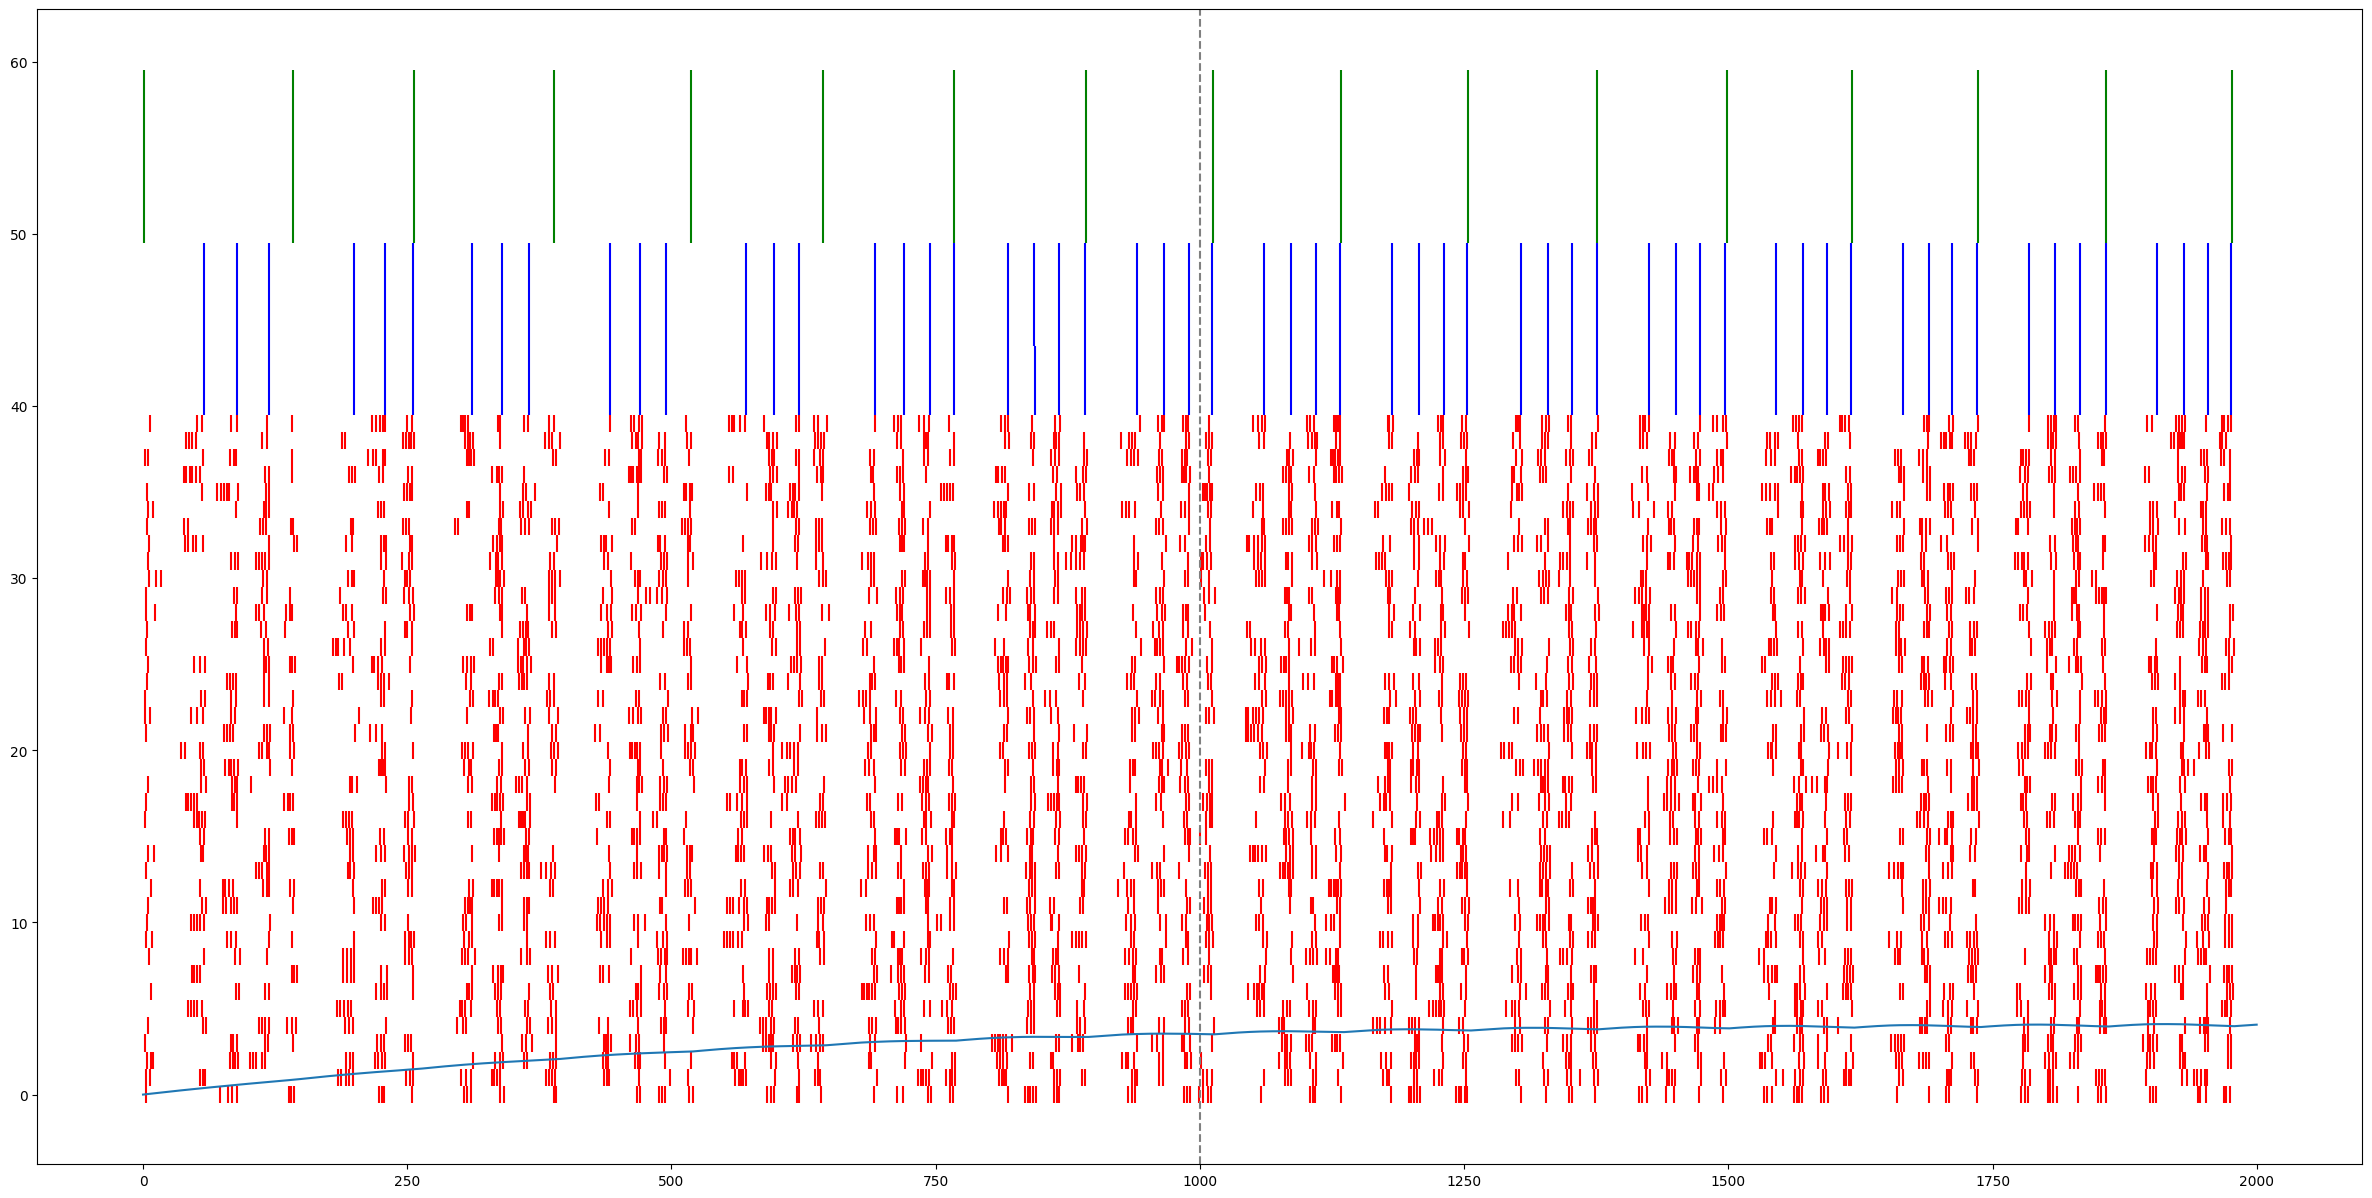

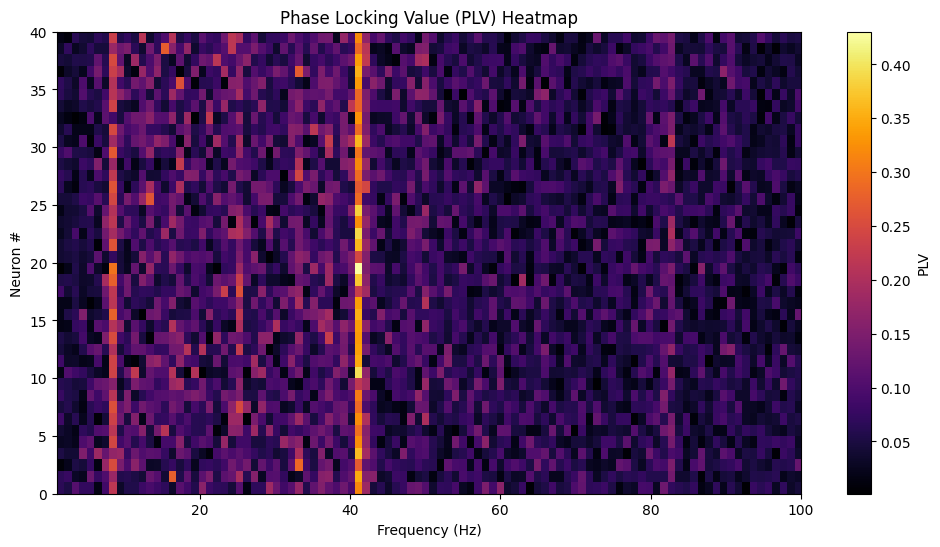

 total spikes Excitatory:  5124
 Average firing rate Excitatory:  64.05  Hz
 total spikes inhibitory:  590
 Average firing rate Inhibitory:  29.5  Hz
 total spikes OLM:  170
 Average firing rate OLM:  8.5  Hz
E max PLV = 0.322 at 41.00 Hz
I max PLV = 0.520 at 41.00 Hz
O max PLV = 0.808 at 8.00 Hz


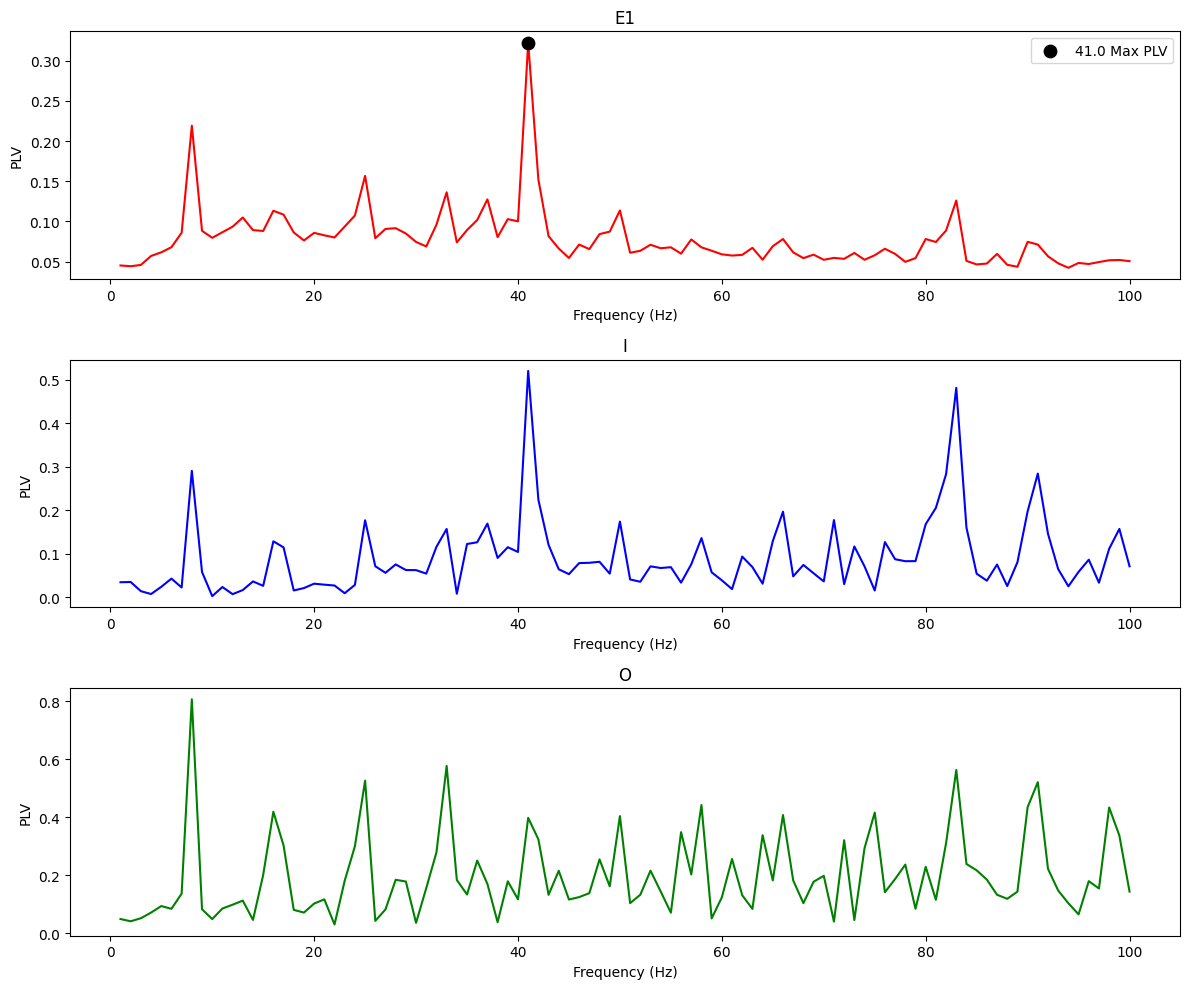

Running gM=2.00, gH=3.00


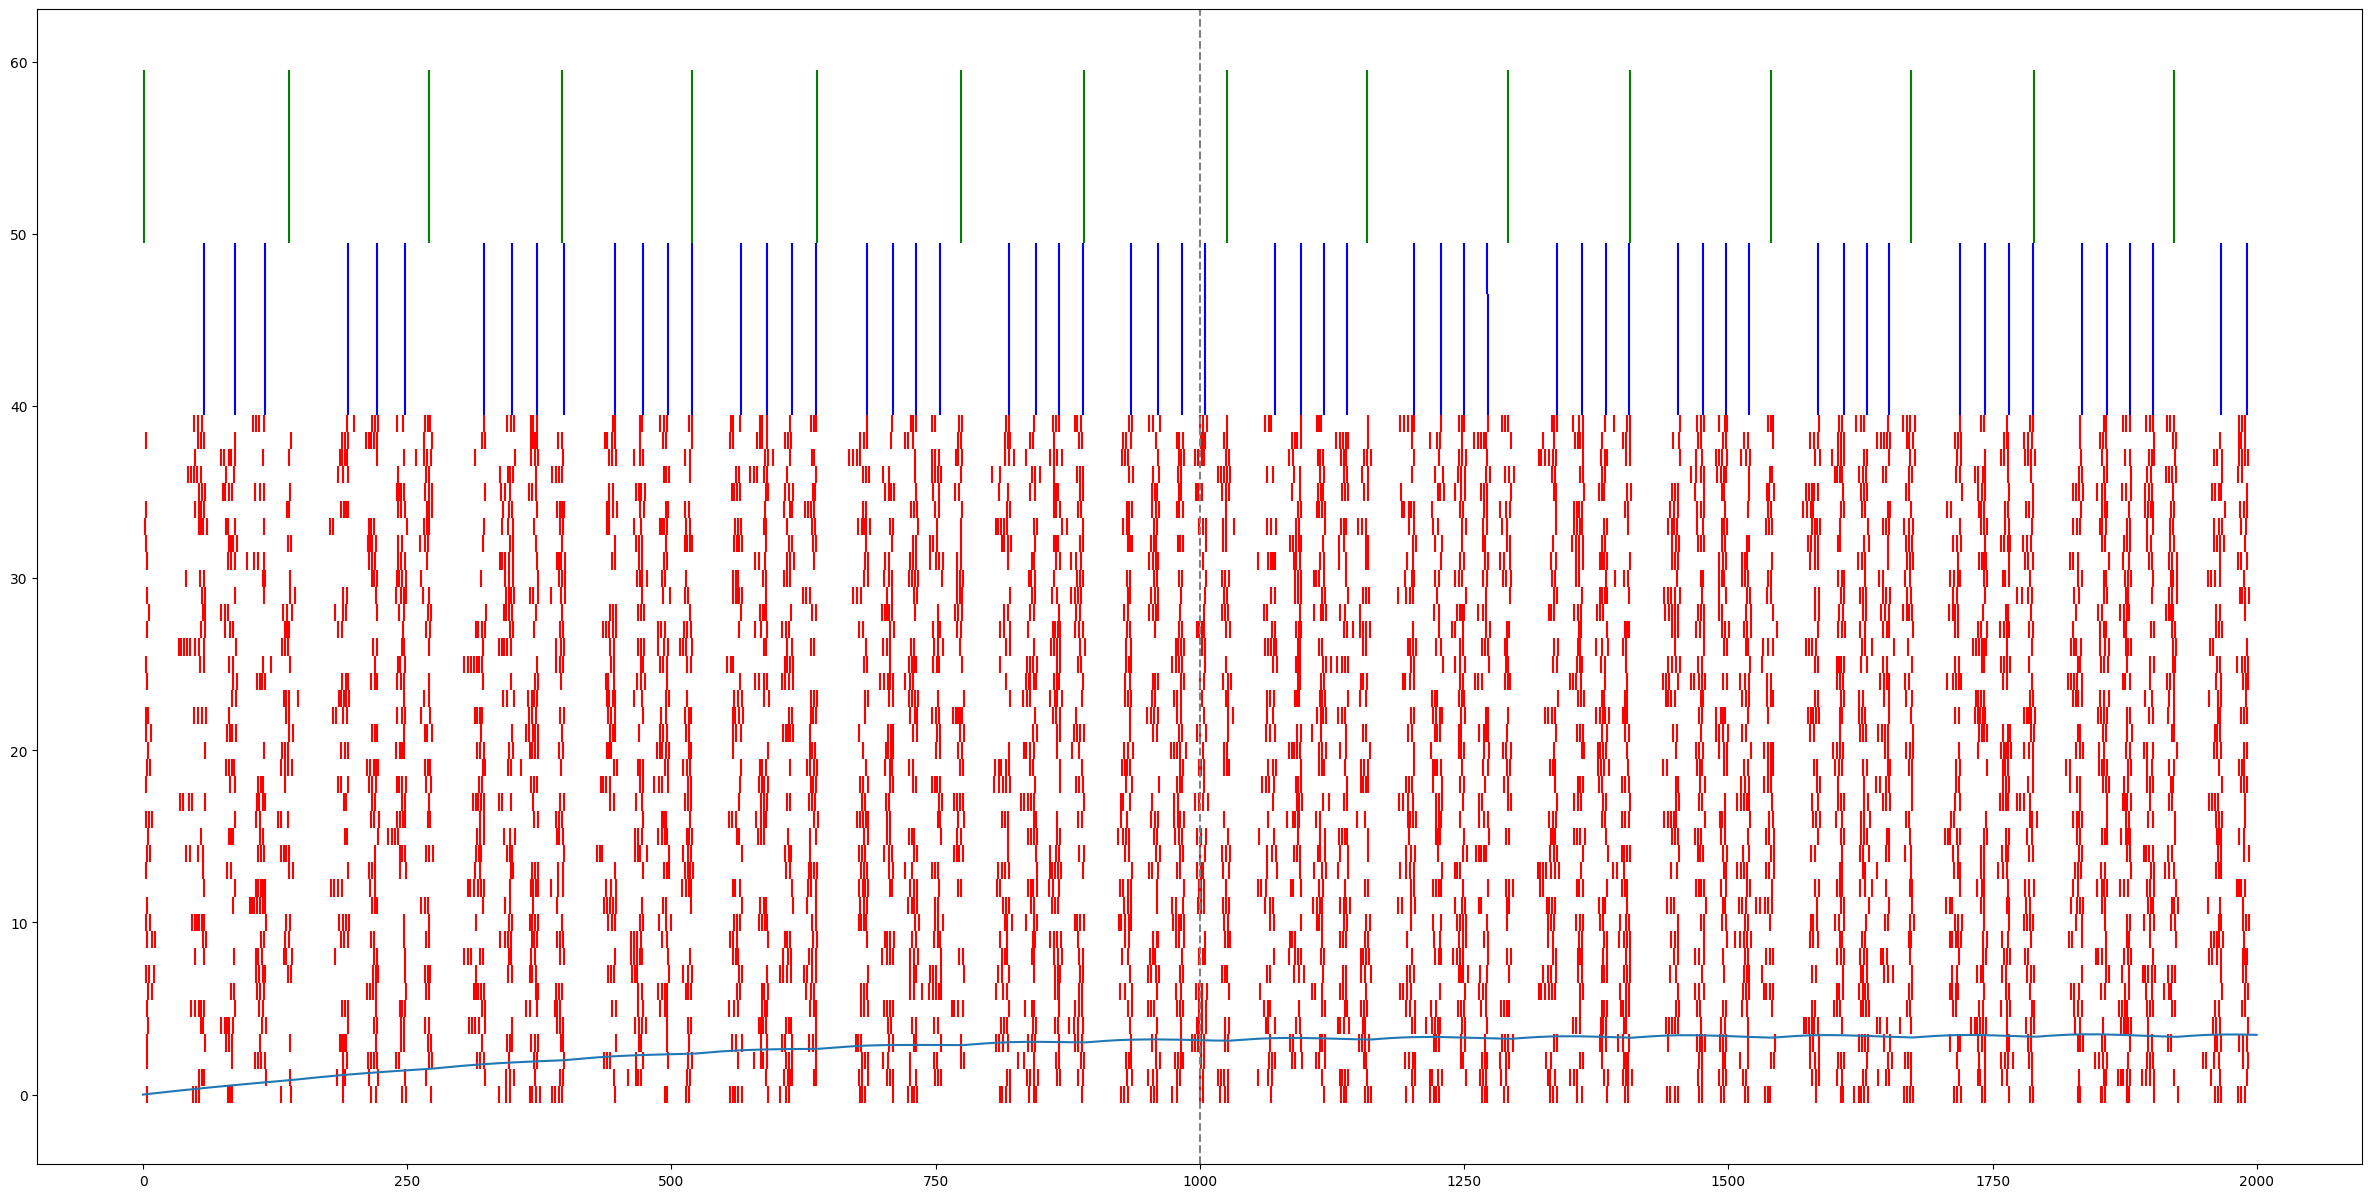

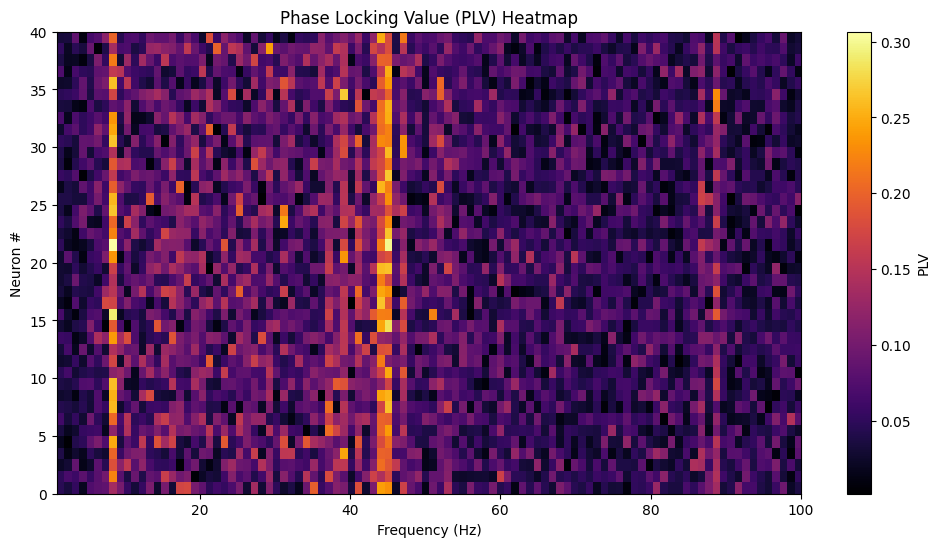

 total spikes Excitatory:  5734
 Average firing rate Excitatory:  71.675  Hz
 total spikes inhibitory:  600
 Average firing rate Inhibitory:  30.0  Hz
 total spikes OLM:  160
 Average firing rate OLM:  8.0  Hz
E max PLV = 0.218 at 45.00 Hz
I max PLV = 0.510 at 89.00 Hz
O max PLV = 0.795 at 8.00 Hz


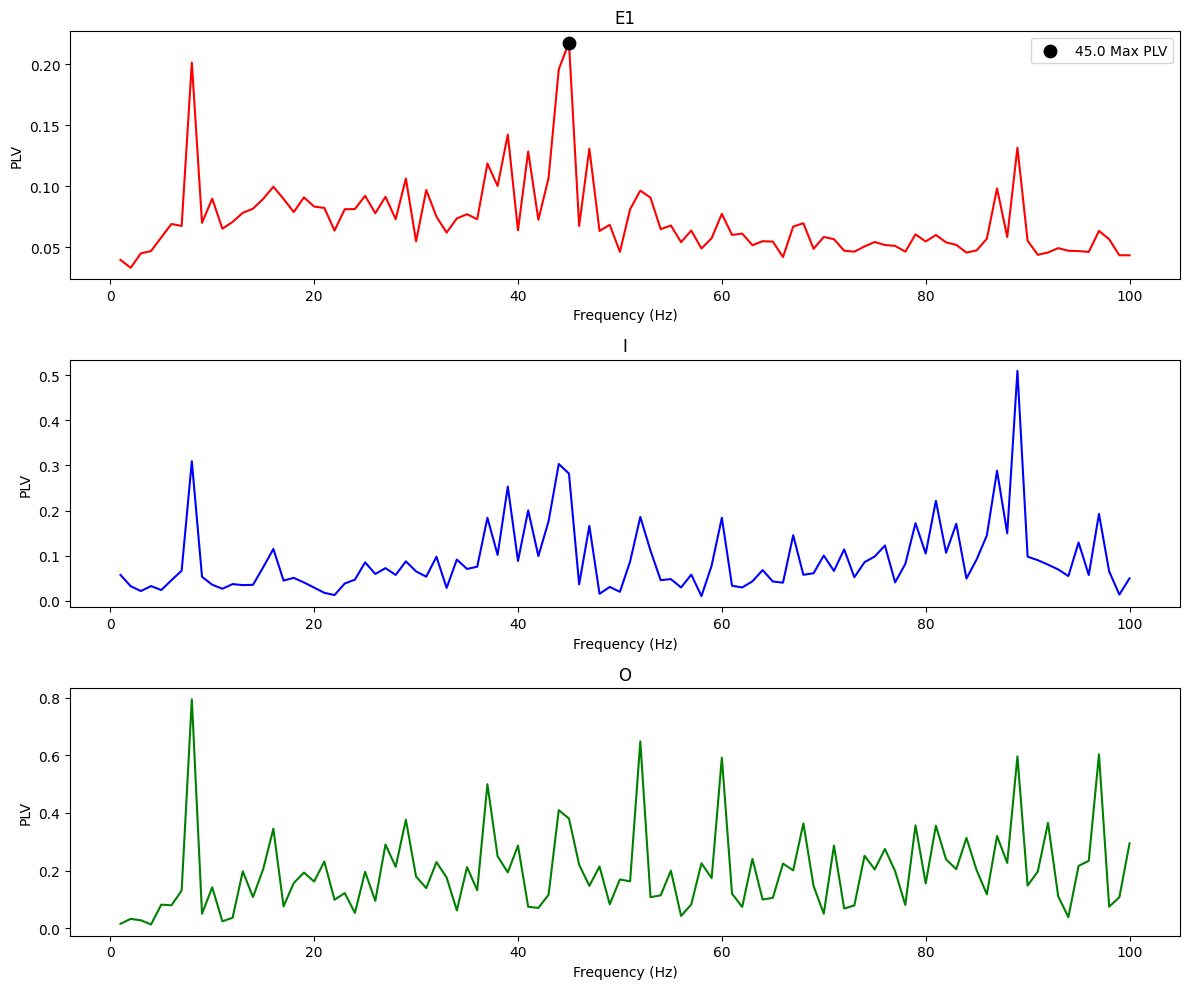

Running gM=3.00, gH=0.00


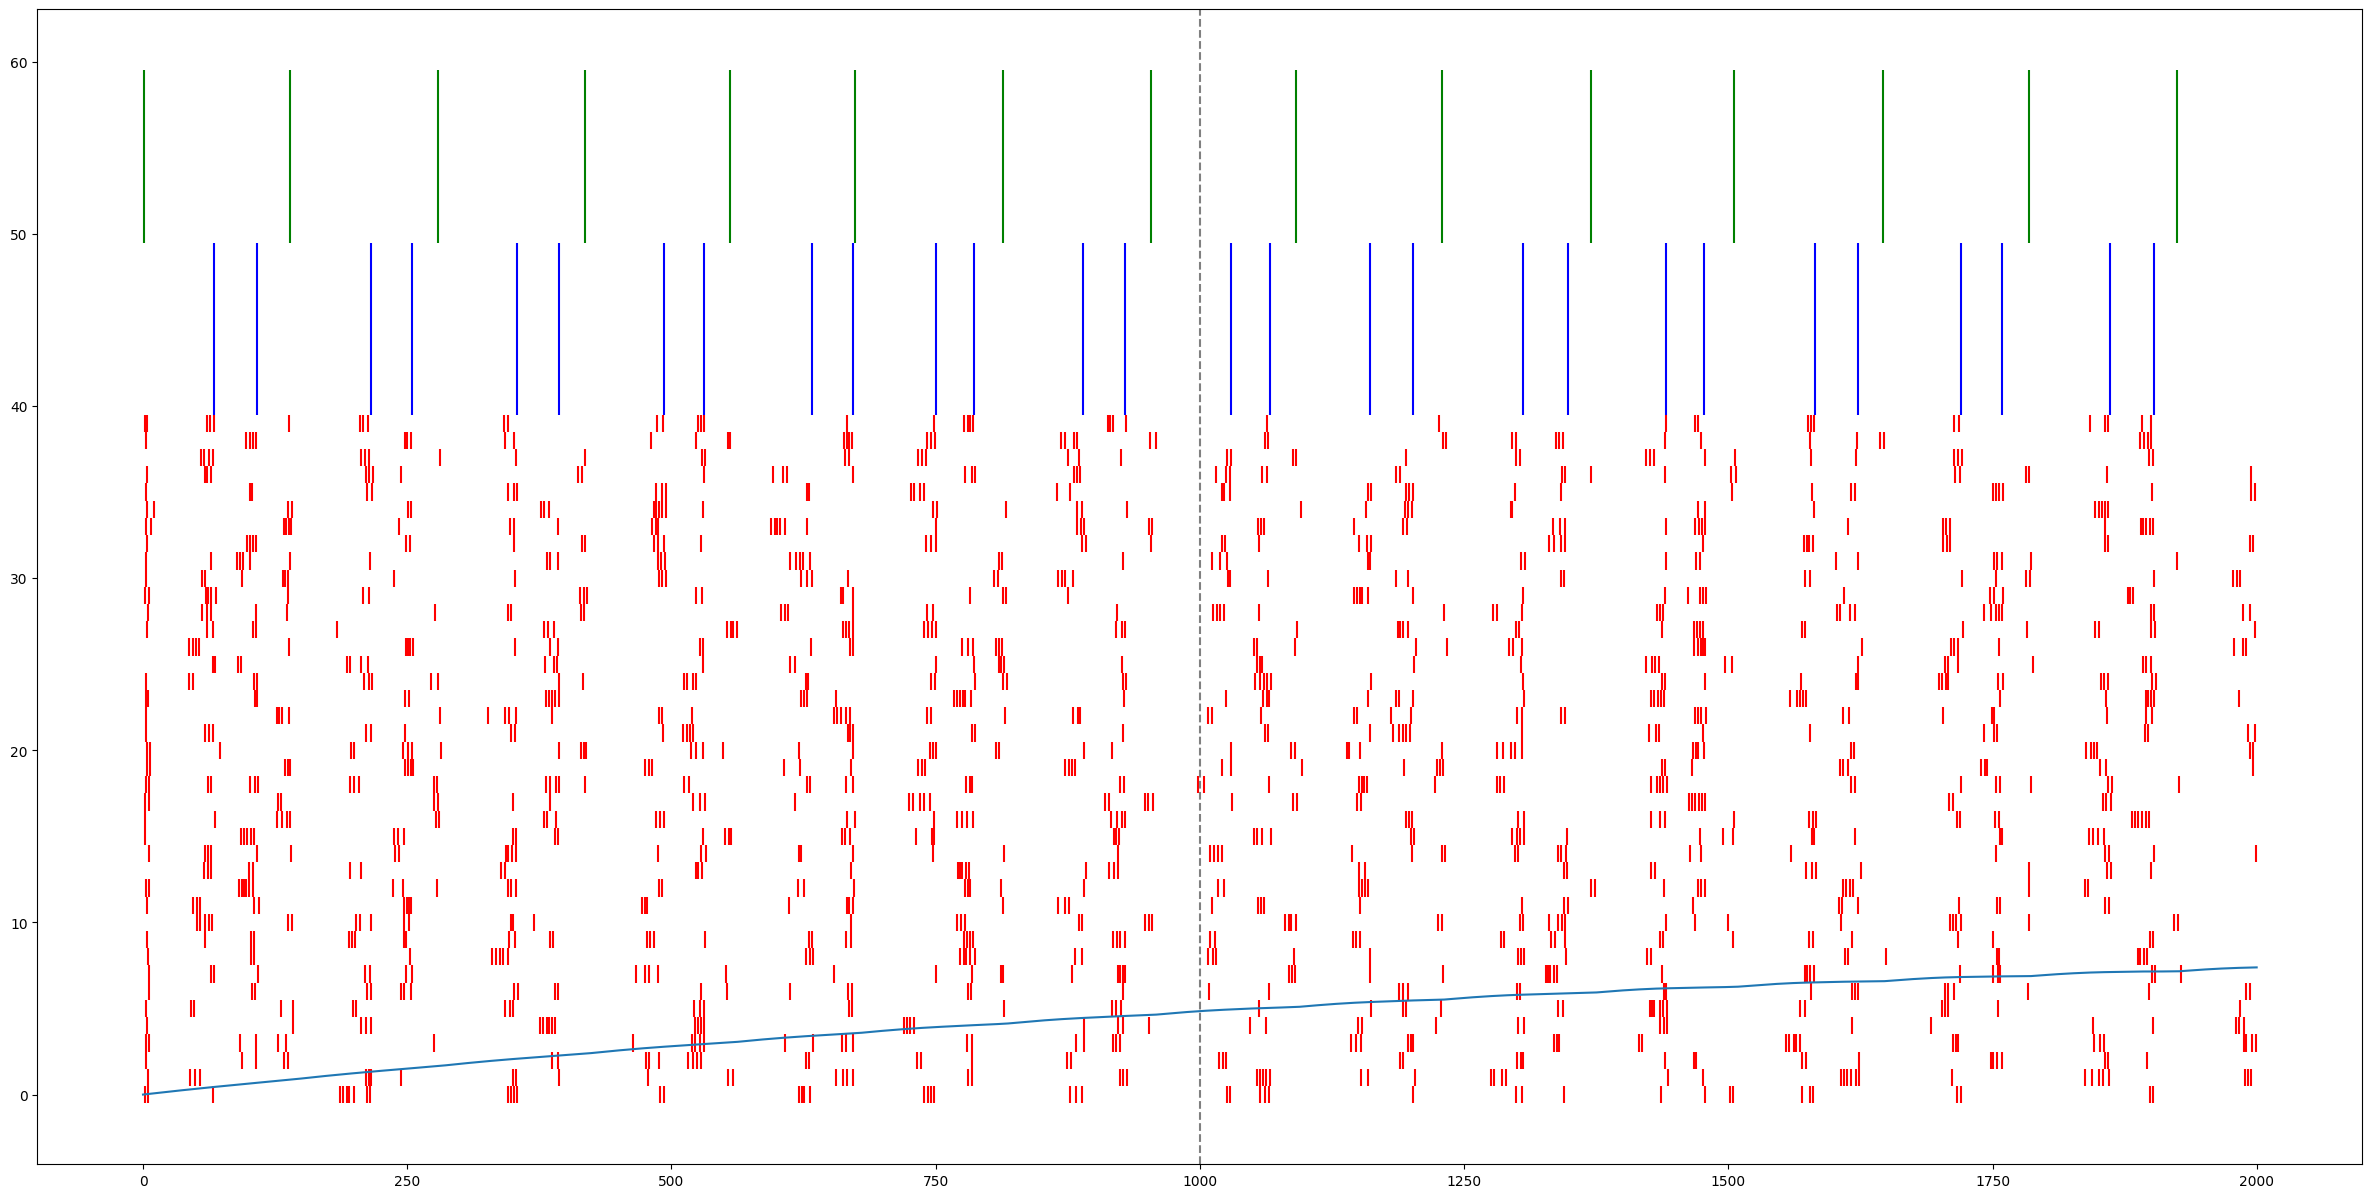

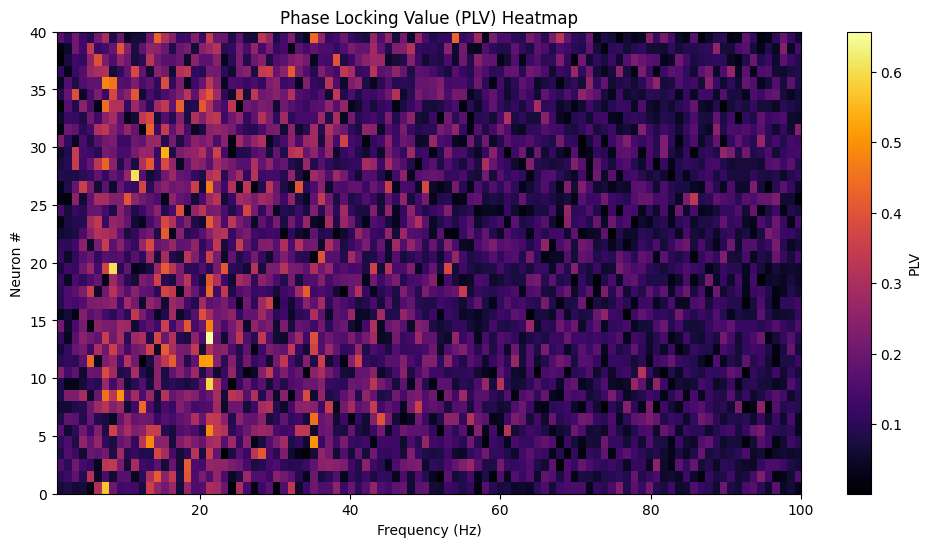

 total spikes Excitatory:  1735
 Average firing rate Excitatory:  21.6875  Hz
 total spikes inhibitory:  280
 Average firing rate Inhibitory:  14.0  Hz
 total spikes OLM:  150
 Average firing rate OLM:  7.5  Hz
E max PLV = 0.309 at 21.00 Hz
I max PLV = 0.551 at 22.00 Hz
O max PLV = 0.790 at 43.00 Hz


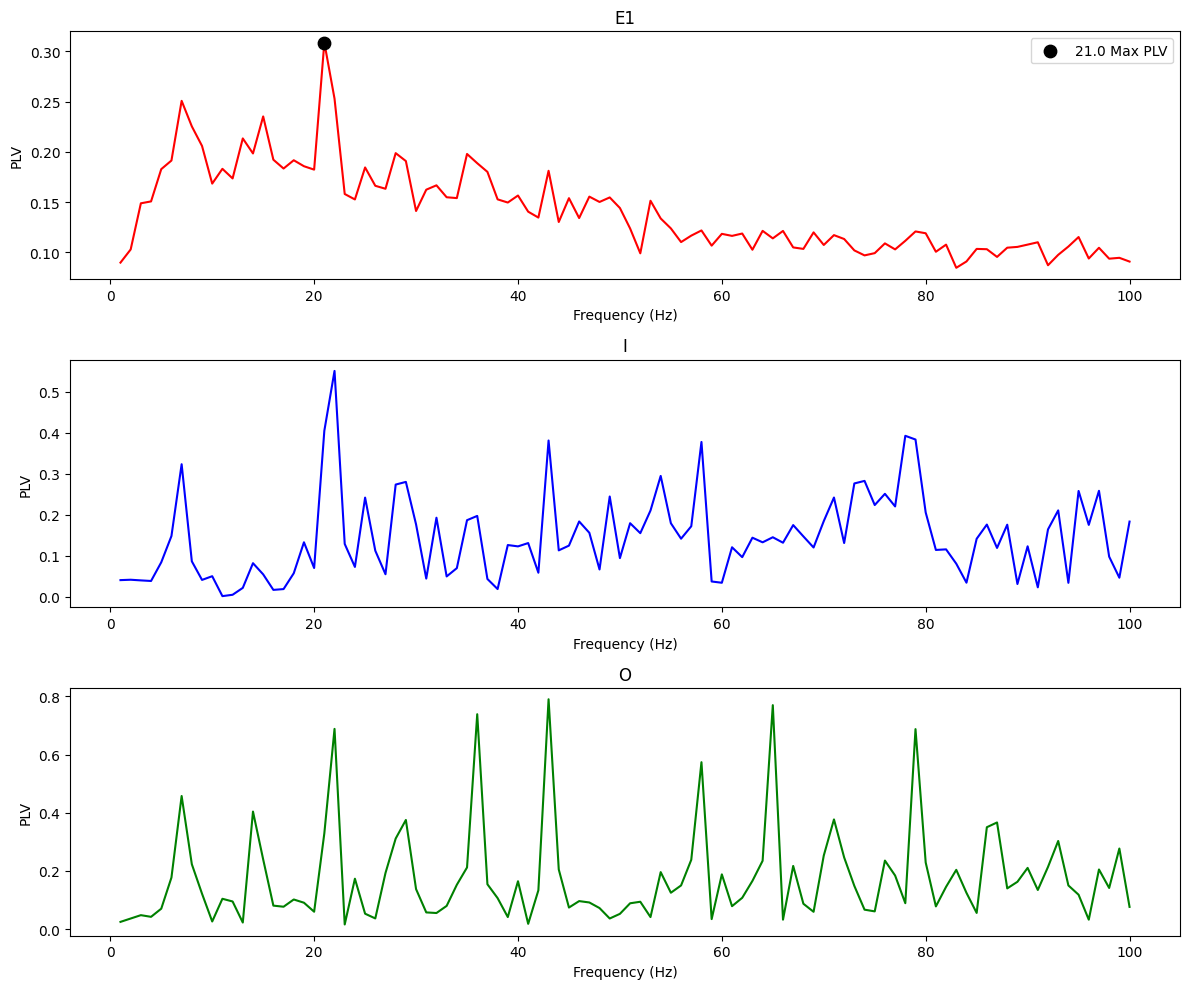

Running gM=3.00, gH=1.00


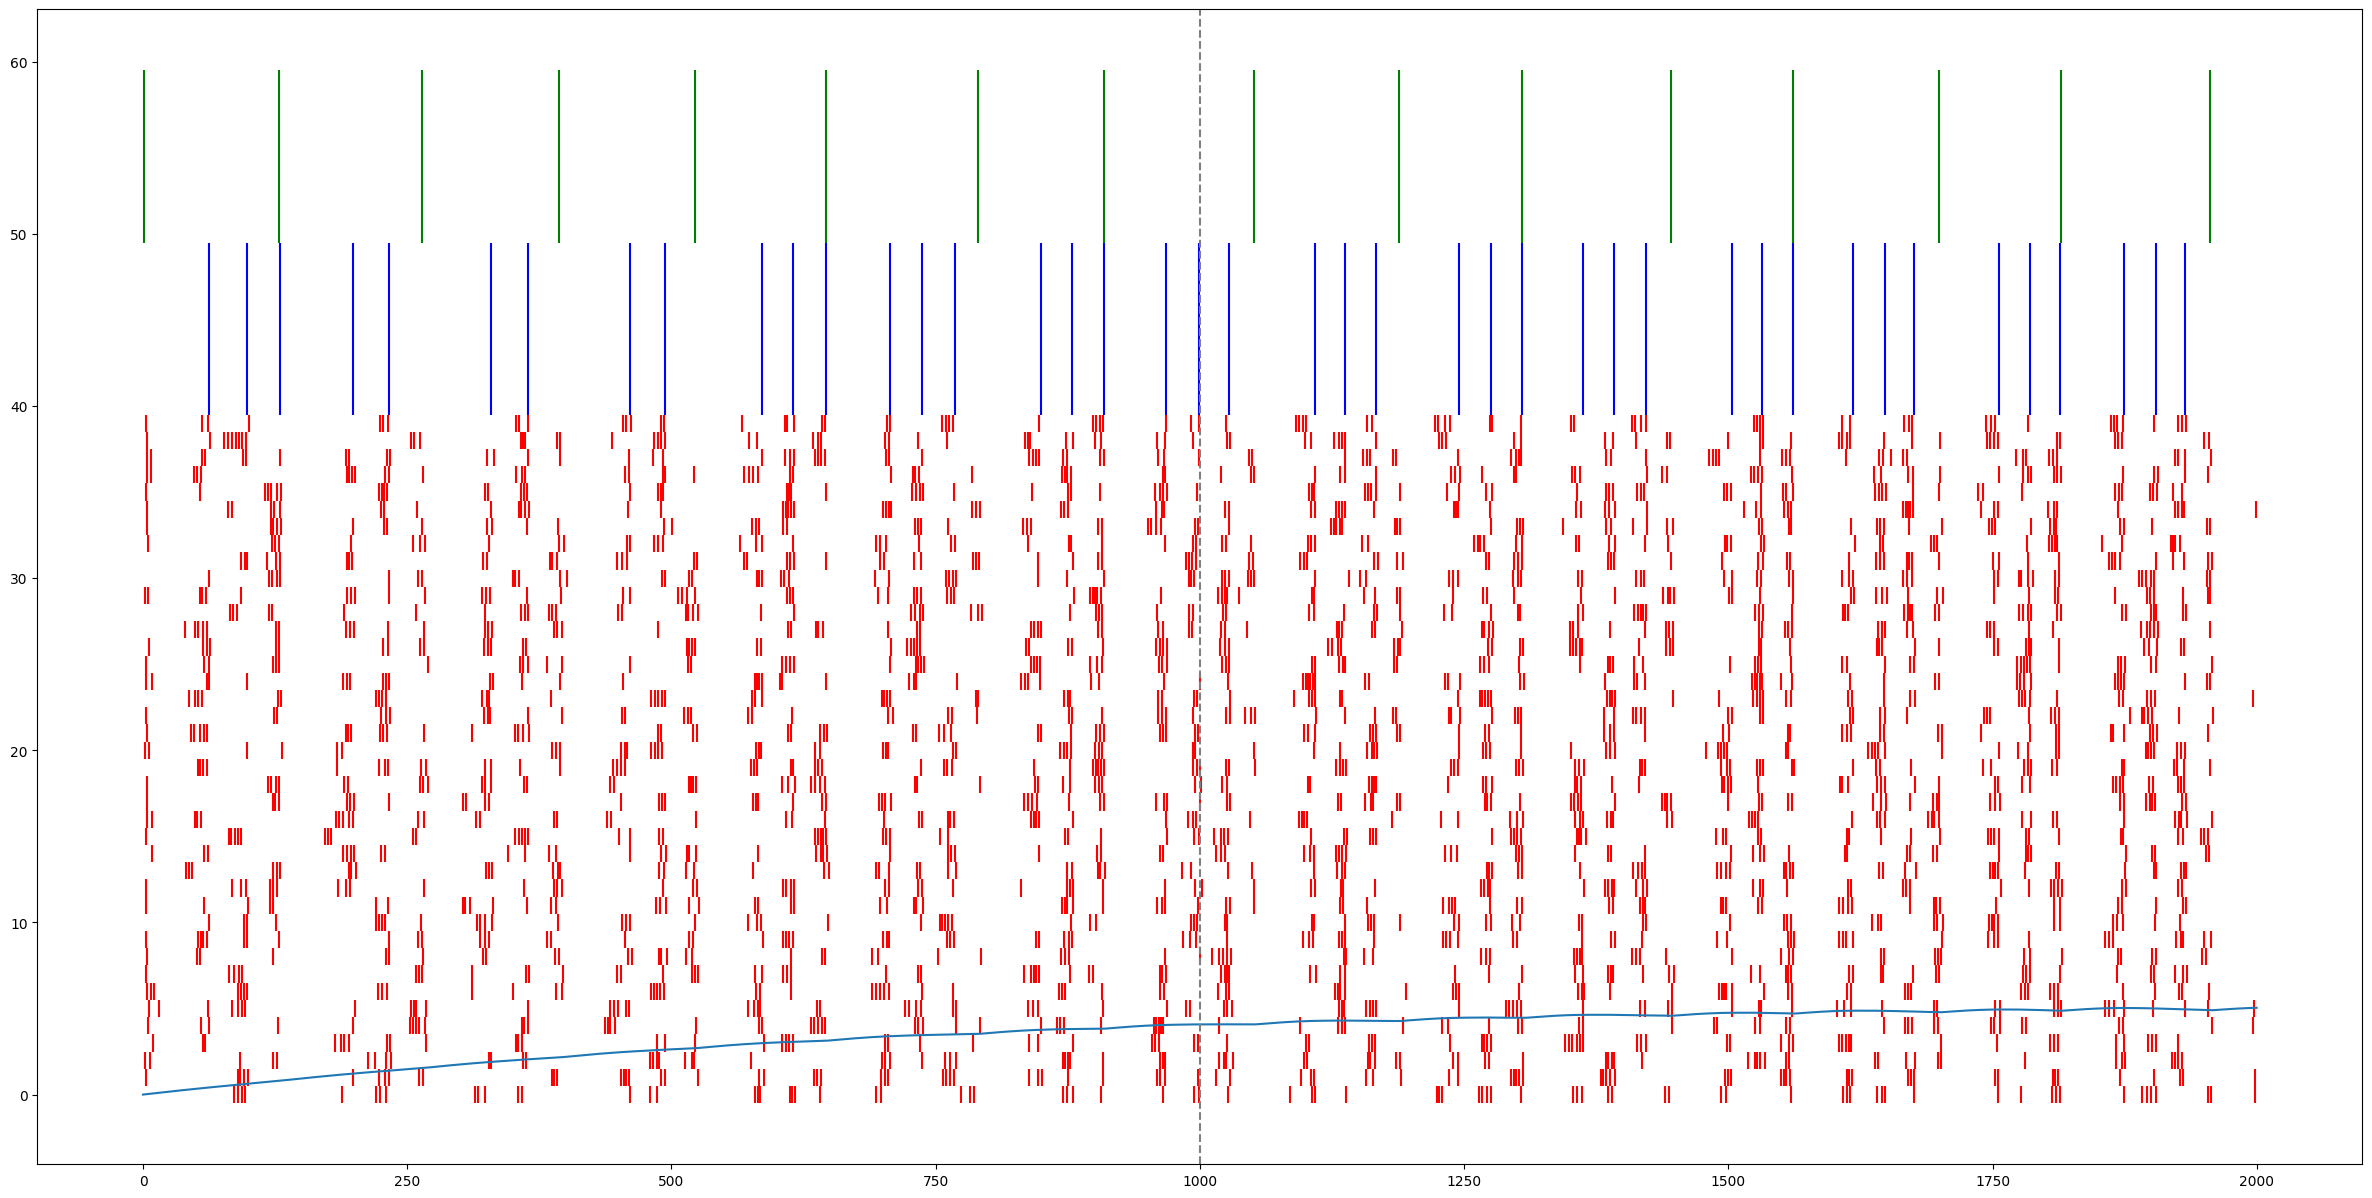

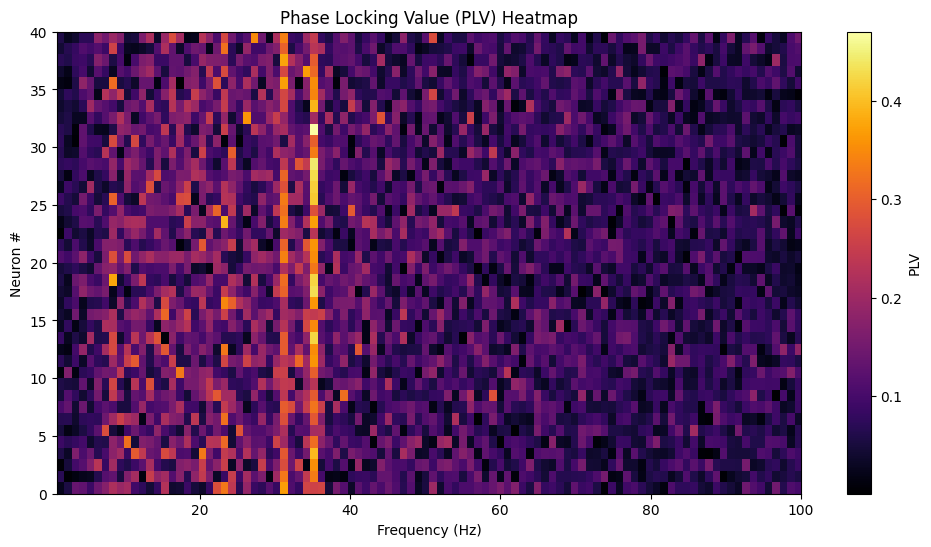

 total spikes Excitatory:  3125
 Average firing rate Excitatory:  39.0625  Hz
 total spikes inhibitory:  420
 Average firing rate Inhibitory:  21.0  Hz
 total spikes OLM:  160
 Average firing rate OLM:  8.0  Hz
E max PLV = 0.334 at 35.00 Hz
I max PLV = 0.515 at 35.00 Hz
O max PLV = 0.661 at 23.00 Hz


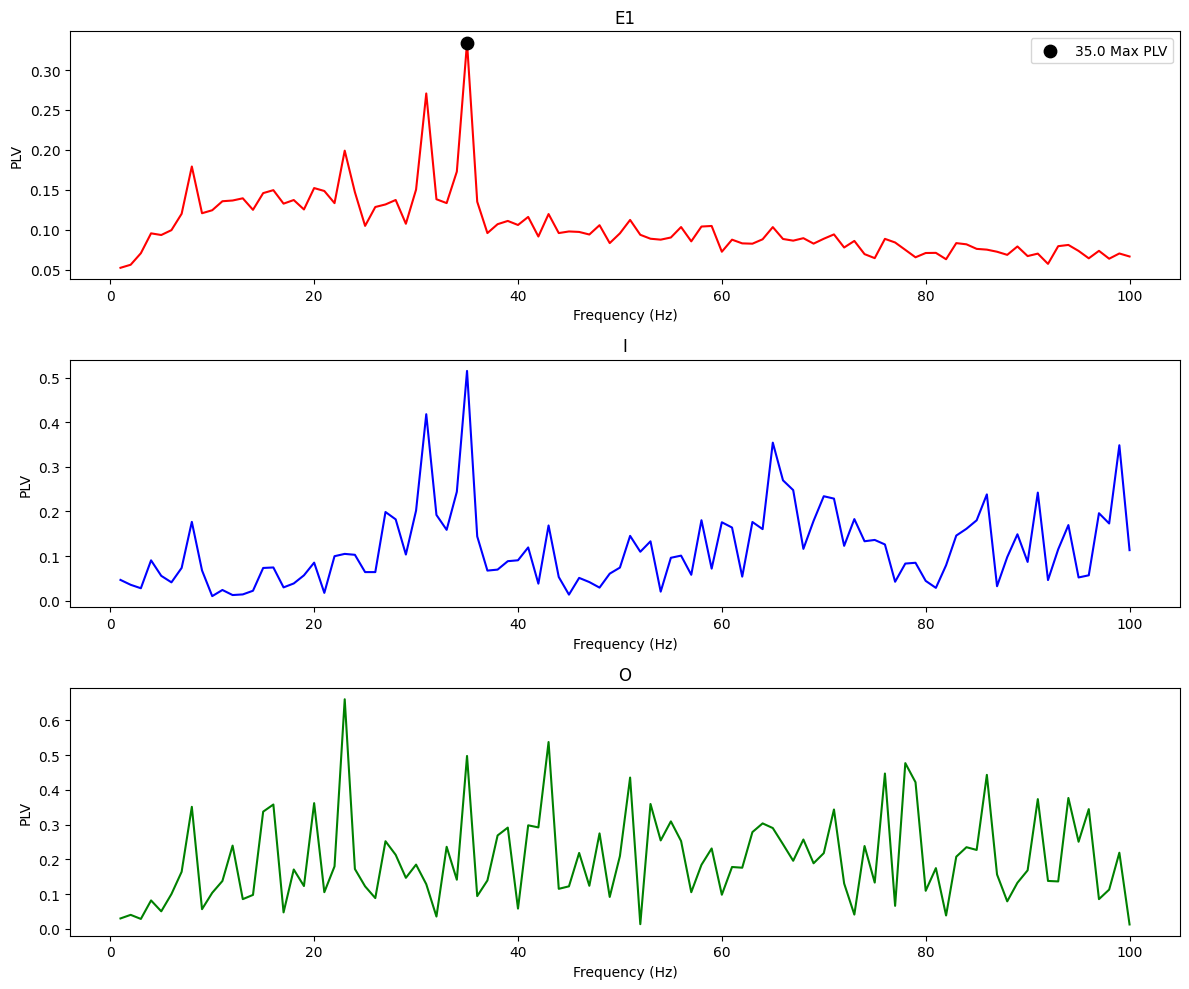

Running gM=3.00, gH=2.00


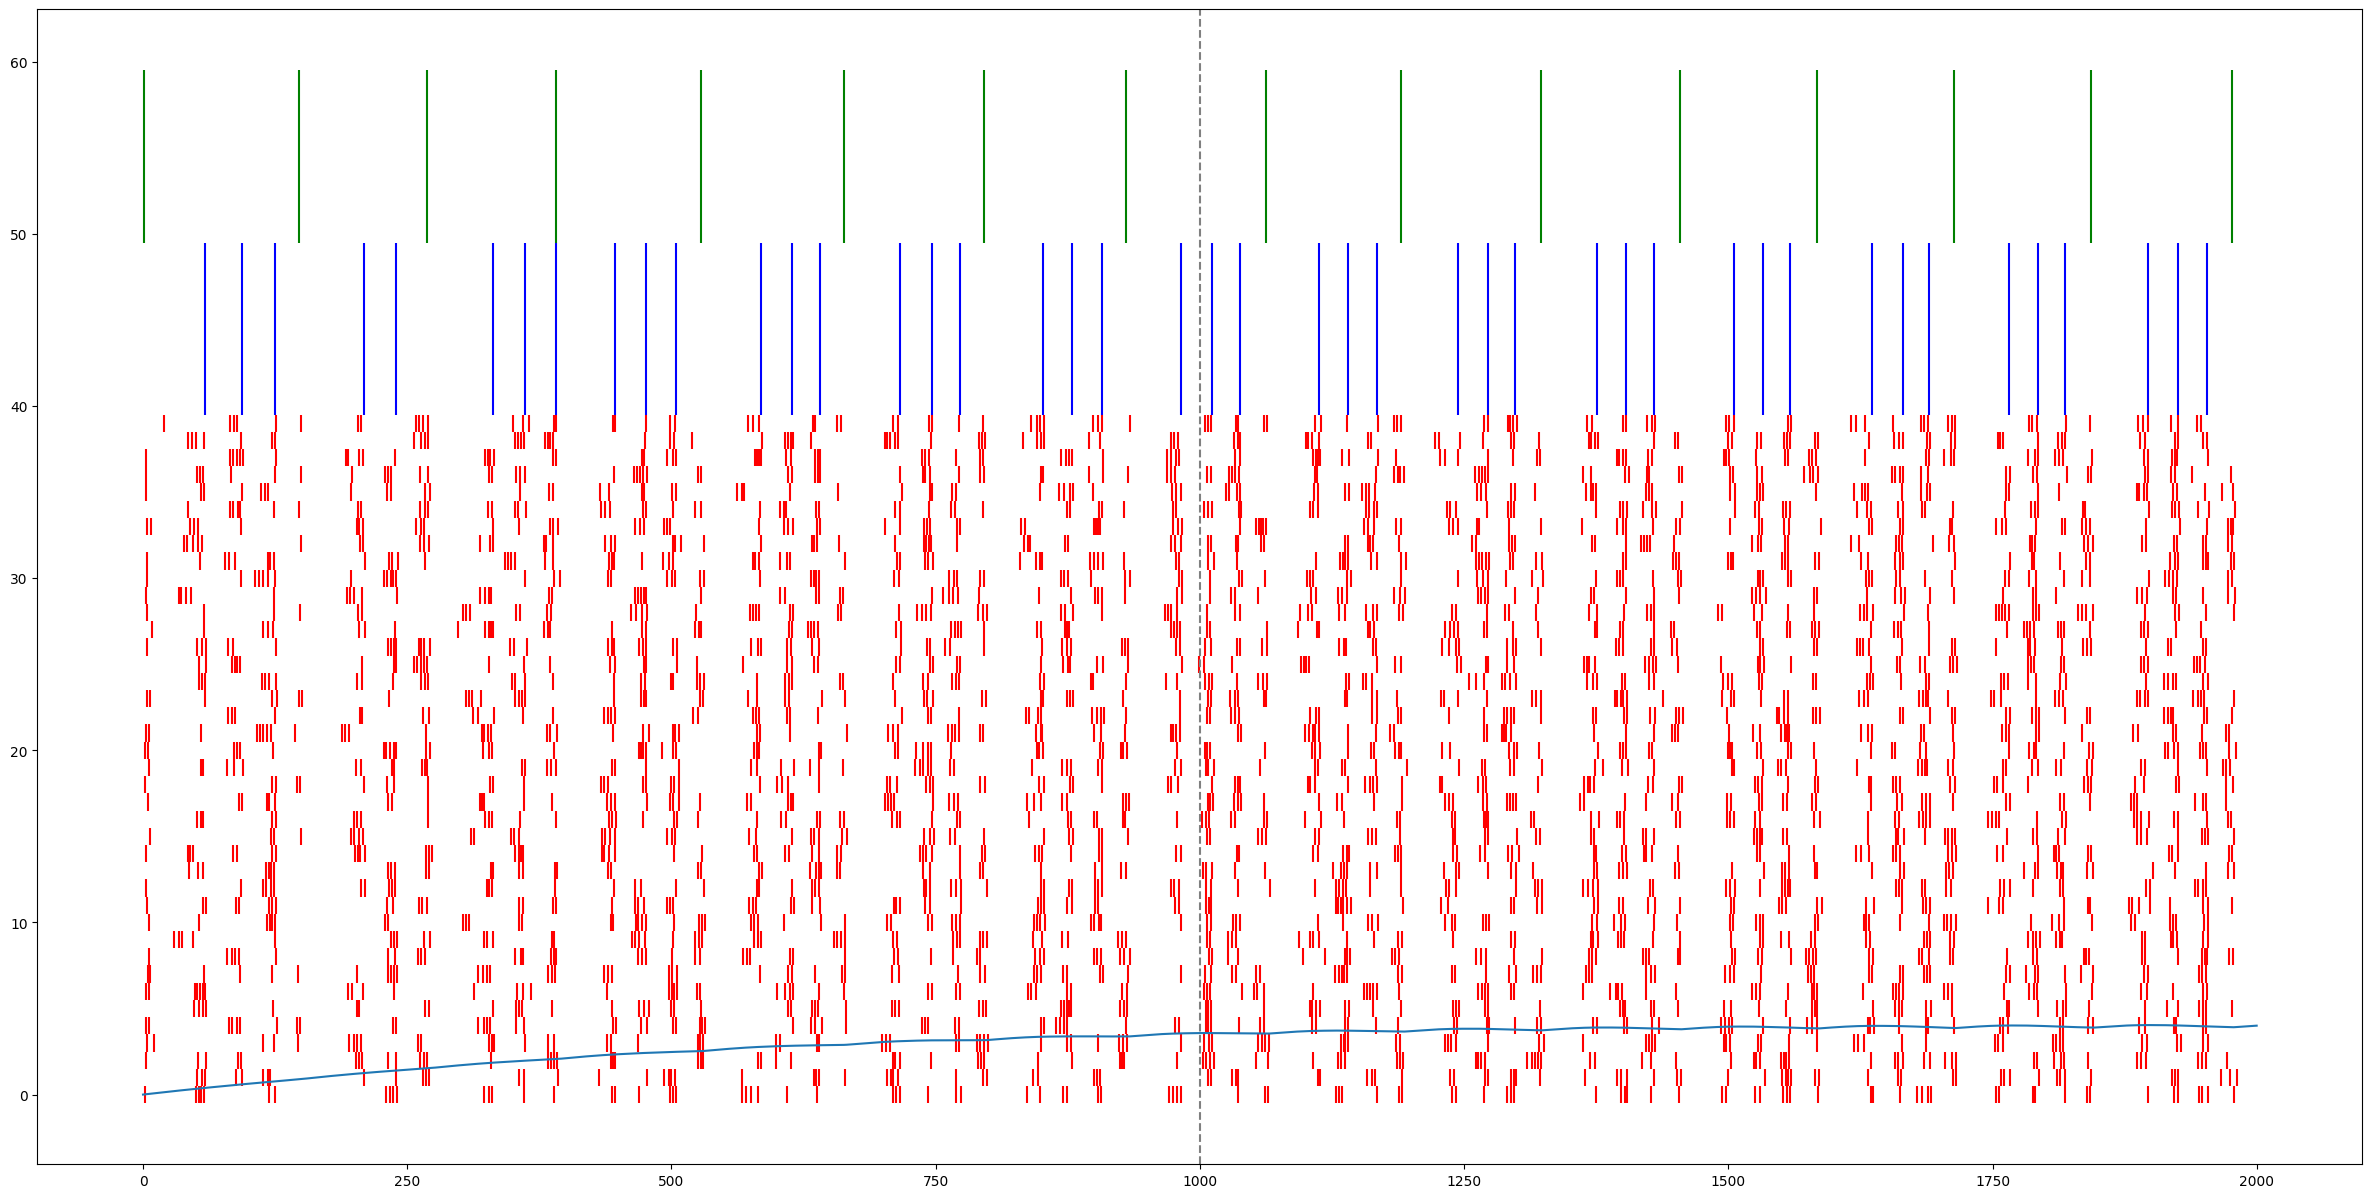

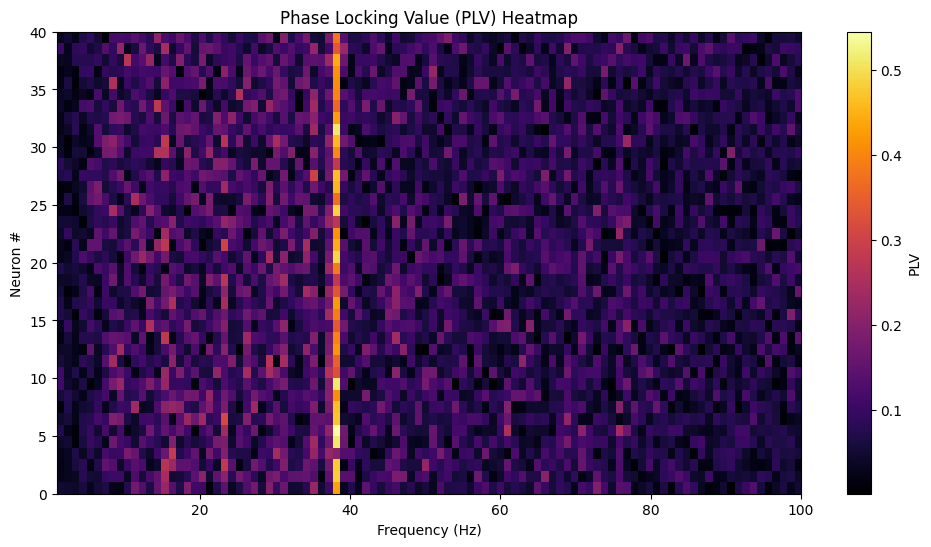

 total spikes Excitatory:  3837
 Average firing rate Excitatory:  47.9625  Hz
 total spikes inhibitory:  440
 Average firing rate Inhibitory:  22.0  Hz
 total spikes OLM:  160
 Average firing rate OLM:  8.0  Hz
E max PLV = 0.410 at 38.00 Hz
I max PLV = 0.576 at 38.00 Hz
O max PLV = 0.665 at 15.00 Hz


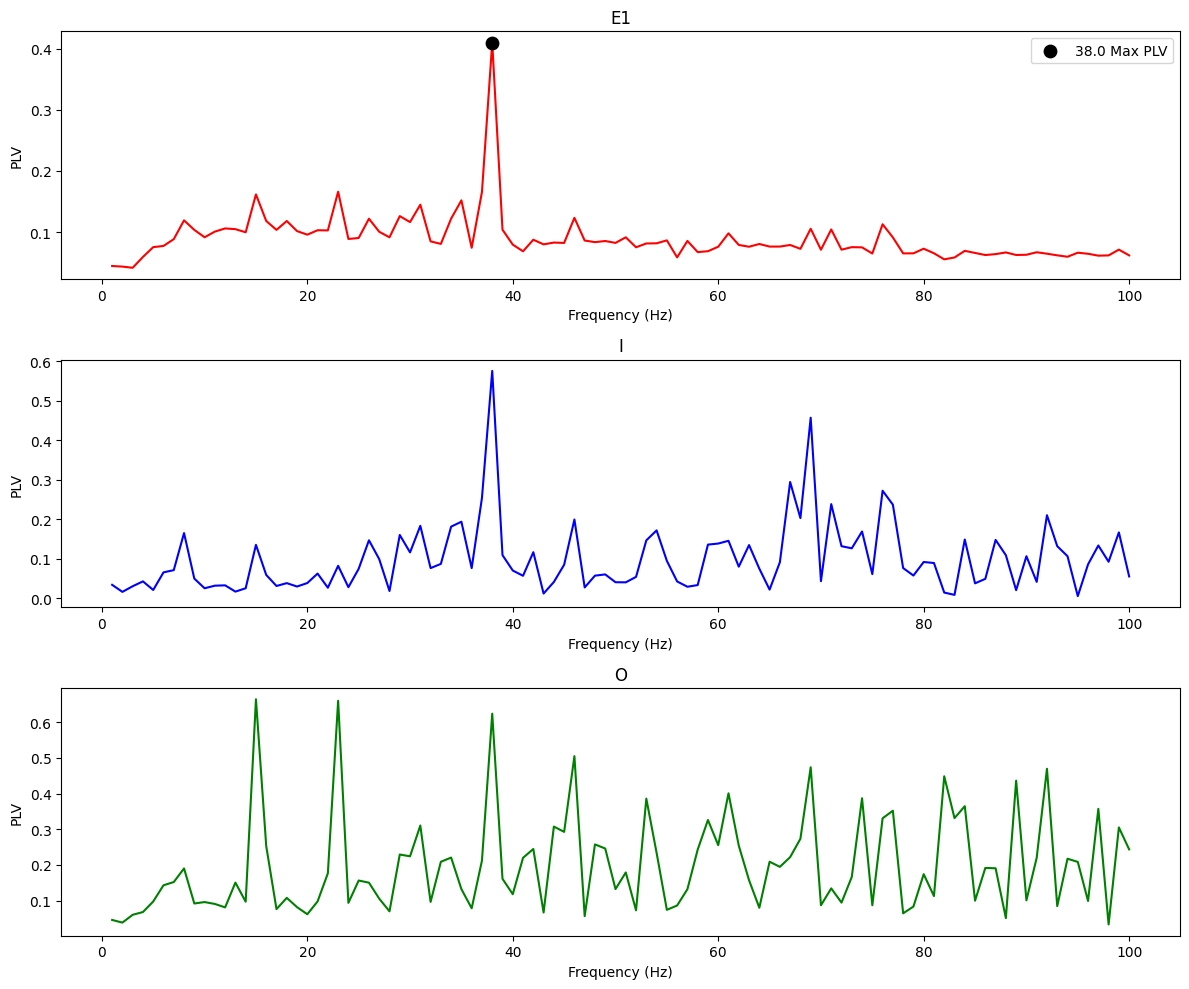

Running gM=3.00, gH=3.00


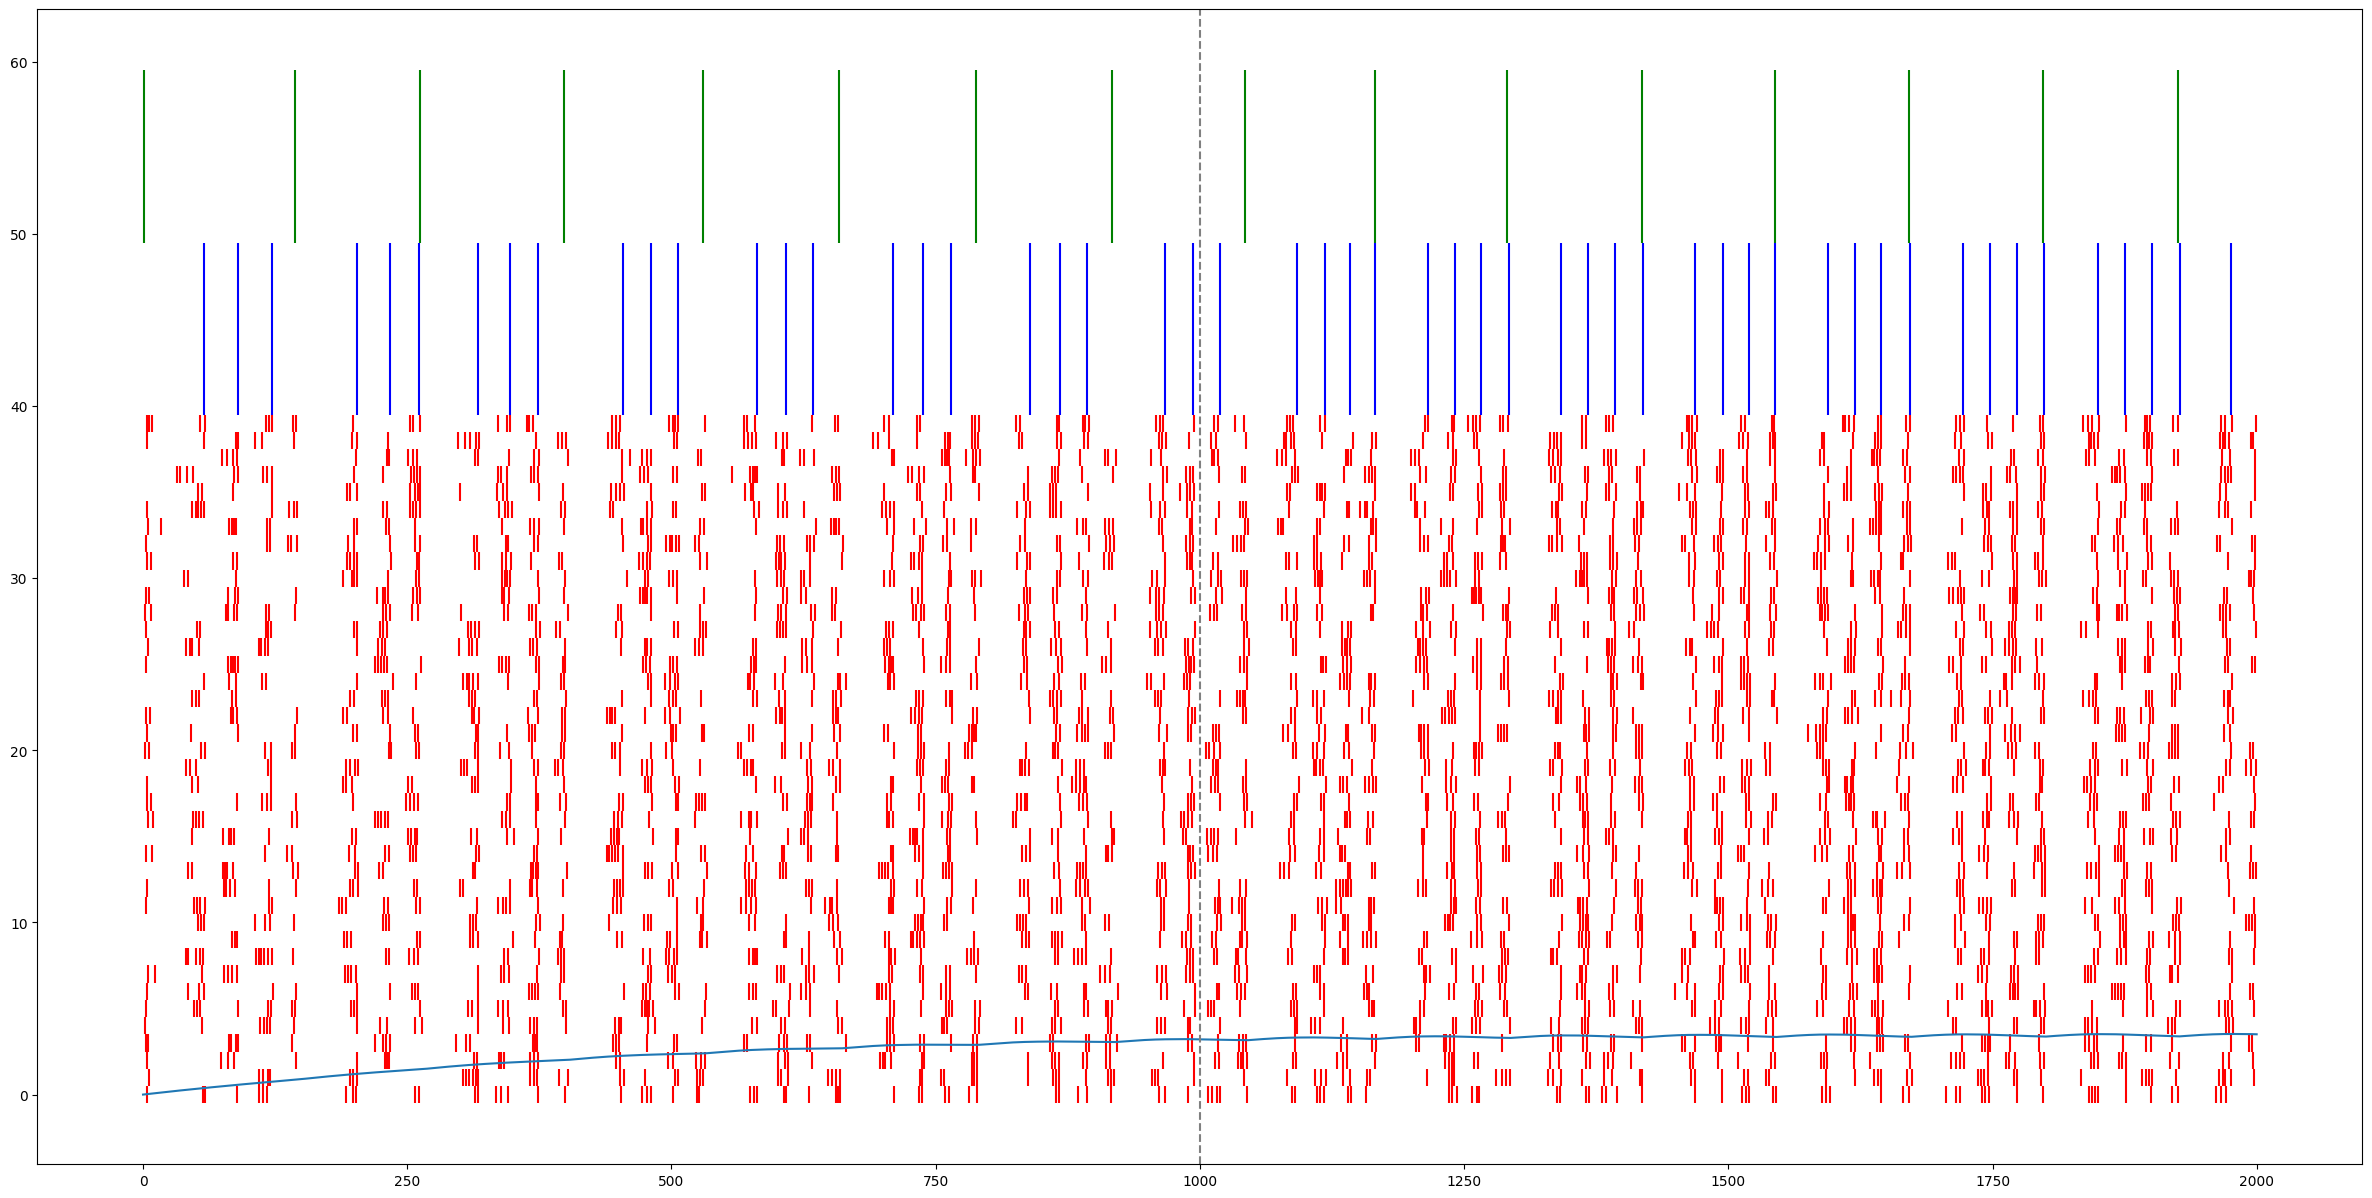

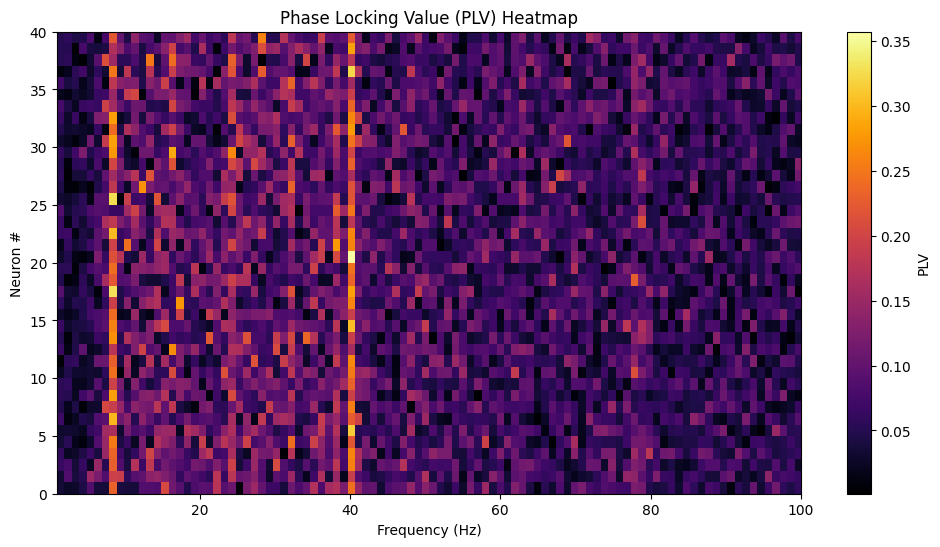

 total spikes Excitatory:  4356
 Average firing rate Excitatory:  54.449999999999996  Hz
 total spikes inhibitory:  530
 Average firing rate Inhibitory:  26.5  Hz
 total spikes OLM:  160
 Average firing rate OLM:  8.0  Hz
E max PLV = 0.238 at 40.00 Hz
I max PLV = 0.445 at 79.00 Hz
O max PLV = 0.795 at 8.00 Hz


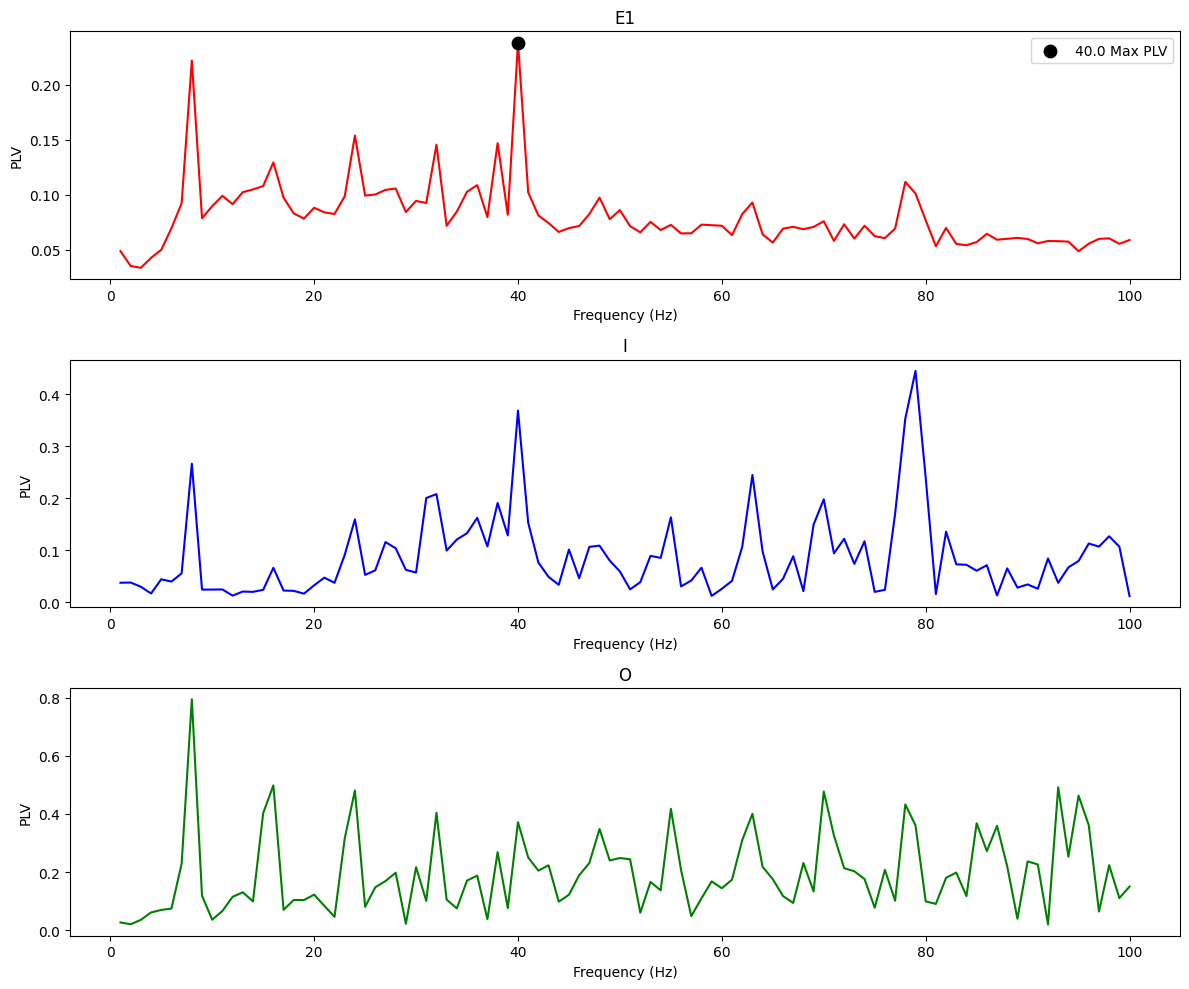

In [2806]:
params_gM = np.arange(0, 4, 1)
params_gH = np.arange(0, 4, 1)
freqs = np.linspace(1, 100, 100)
results = {}

for param_gM in params_gM:
    for param_gH in params_gH:
        print(f"Running gM={param_gM:.2f}, gH={param_gH:.2f}")
        spike_times, t = run_sim(param_gM, param_gH)
        results[(param_gM, param_gH)] = spike_times


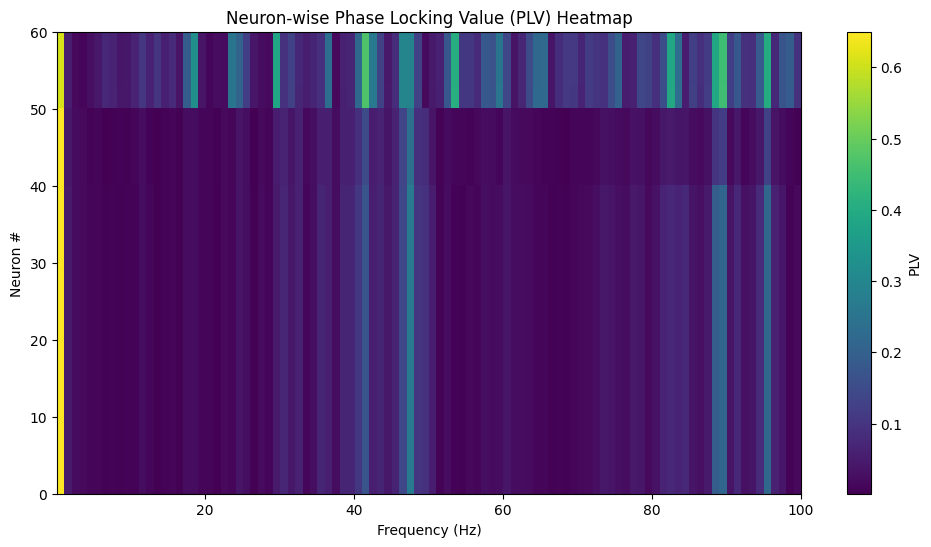

In [1691]:
import numpy as np
freqs = np.linspace(.1, 100, 100)

PLV_all = phase_locking_range_fixed(spike_times, t, freqs, min_spikes=3)  # shape: (num_freqs, num_neurons)
PLV_matrix = PLV_all.T  # neurons x freqs

plt.figure(figsize=(12, 6))
im = plt.imshow(PLV_matrix, 
                aspect='auto', 
                origin='lower',  # neuron 0 at bottom
                extent=[freqs[0], freqs[-1], 0, num_neurons],
                cmap='viridis')

plt.colorbar(im, label='PLV')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Neuron #')
plt.title('Neuron-wise Phase Locking Value (PLV) Heatmap')
plt.show()


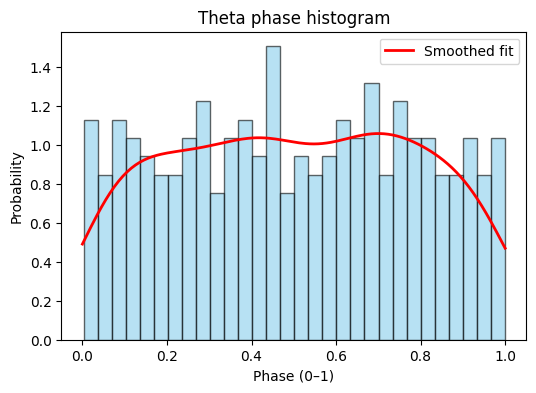

In [1653]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# choose neuron
neuron_idx = 32

spk = spike_times[spike_times[:, neuron_idx] != 0, neuron_idx]

Hz = 26
T_theta = 1000 / Hz  # ms


phases = (spk % T_theta) / T_theta

plt.figure(figsize=(6,4))
plt.hist(phases, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='k')

kde = gaussian_kde(phases)
phase_grid = np.linspace(0, 1, 200)
plt.plot(phase_grid, kde(phase_grid), color='r', lw=2, label='Smoothed fit')

plt.xlabel("Phase (0–1)")
plt.ylabel("Probability")
plt.title("Theta phase histogram")
plt.legend()
plt.show()


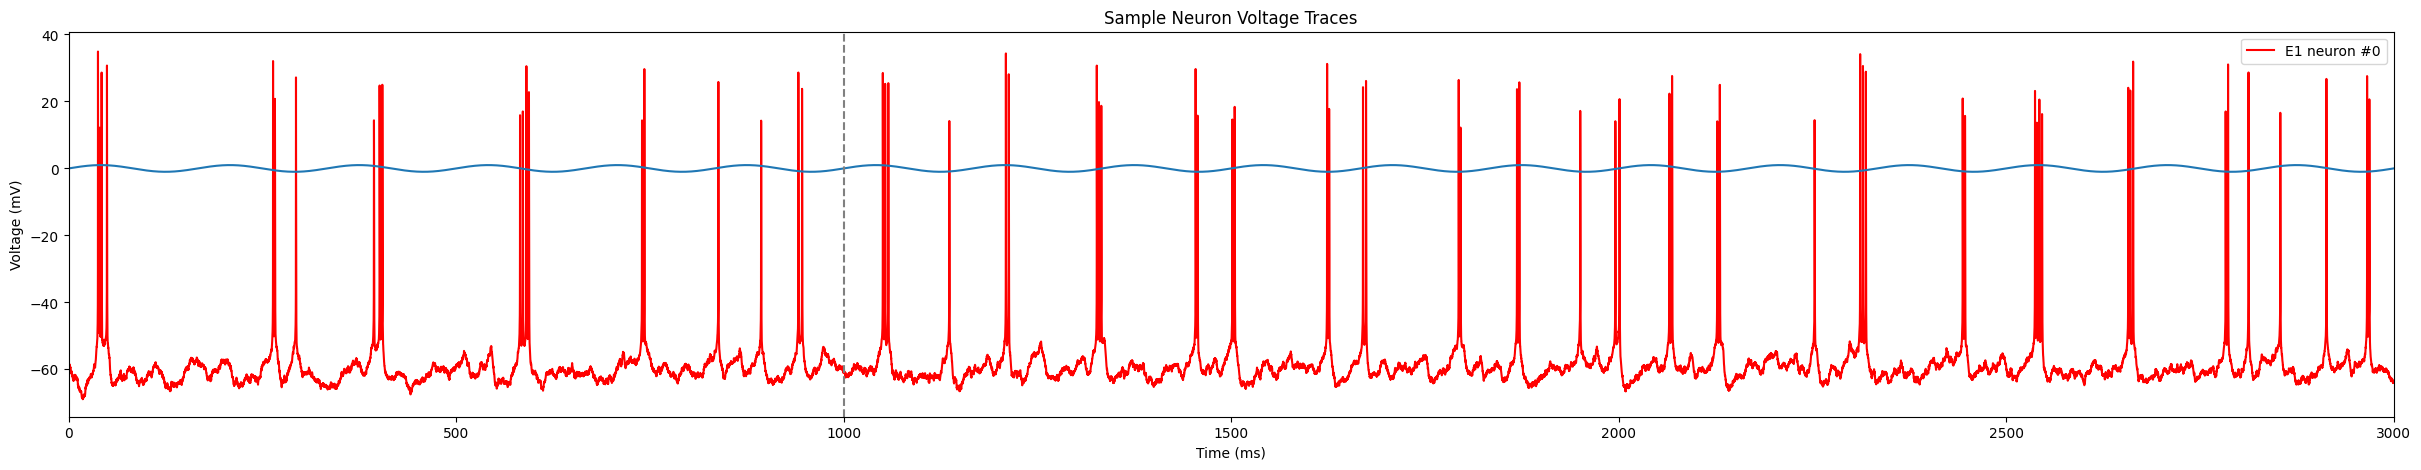

In [1602]:
plt.figure(figsize=(30, 5))

f = 6  # frequency in Hz

sine_6hz = np.sin(2 * np.pi * f * (t / 1000))  # t in ms → seconds

plt.plot(t, V[:, 0], color='red', label='E1 neuron #0')
plt.plot(t,sine_6hz)
#plt.plot(t, V[:, NE], color='orange', label='I neuron #0')

#plt.plot(t, V[:, NE+NE2+NI], color='green', label='O neuron #0')

plt.axvline(x=1000, color='gray', linestyle='--')
plt.xlim(0, 3000)
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.title('Sample Neuron Voltage Traces')
plt.legend()
plt.savefig("sample_neuron_voltage.png", dpi=300, bbox_inches='tight')
plt.show()


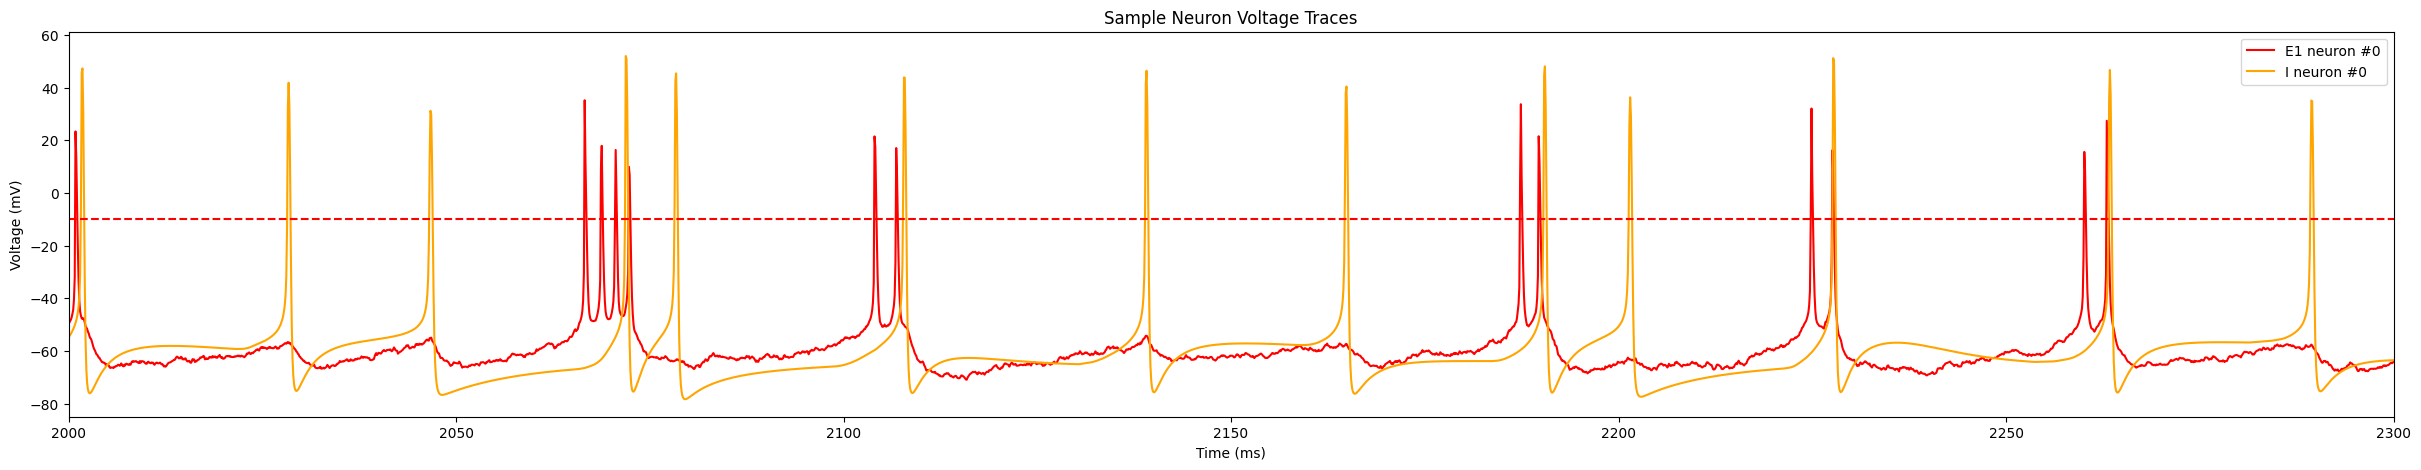

In [1518]:
plt.figure(figsize=(30, 5))

plt.plot(t, V[:, 0], color='red', label='E1 neuron #0')
plt.plot(t, V[:, NE], color='orange', label='I neuron #0')

#plt.plot(t, V[:, NE+NE2+NI], color='green', label='O neuron #0')

plt.axvline(x=1000, color='gray', linestyle='--')
plt.xlim(2000, 2300)
plt.axhline(y=-10, color='red', linestyle='--')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.title('Sample Neuron Voltage Traces')
plt.legend()
plt.savefig("sample_neuron_voltage.png", dpi=300, bbox_inches='tight')
plt.show()


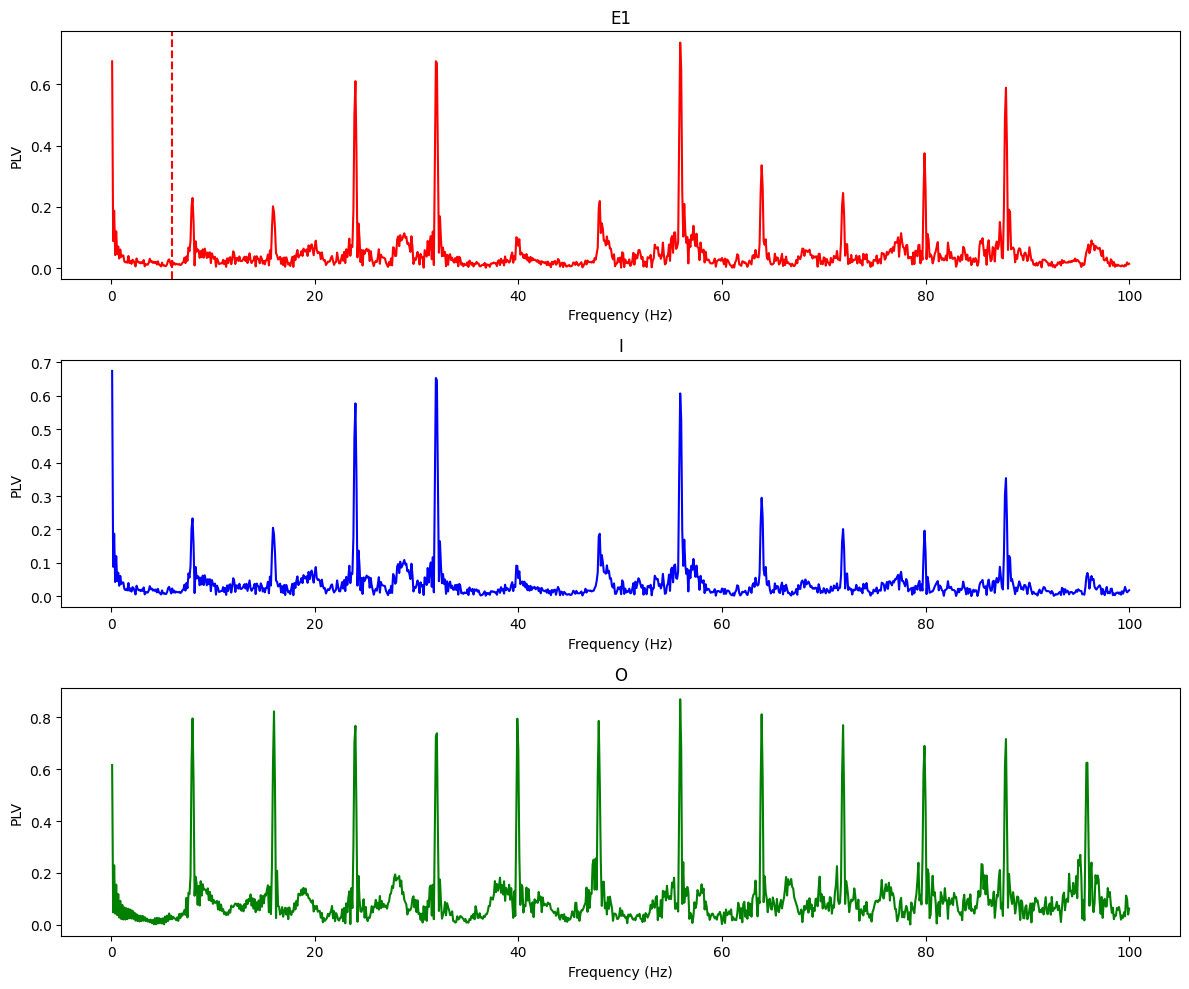

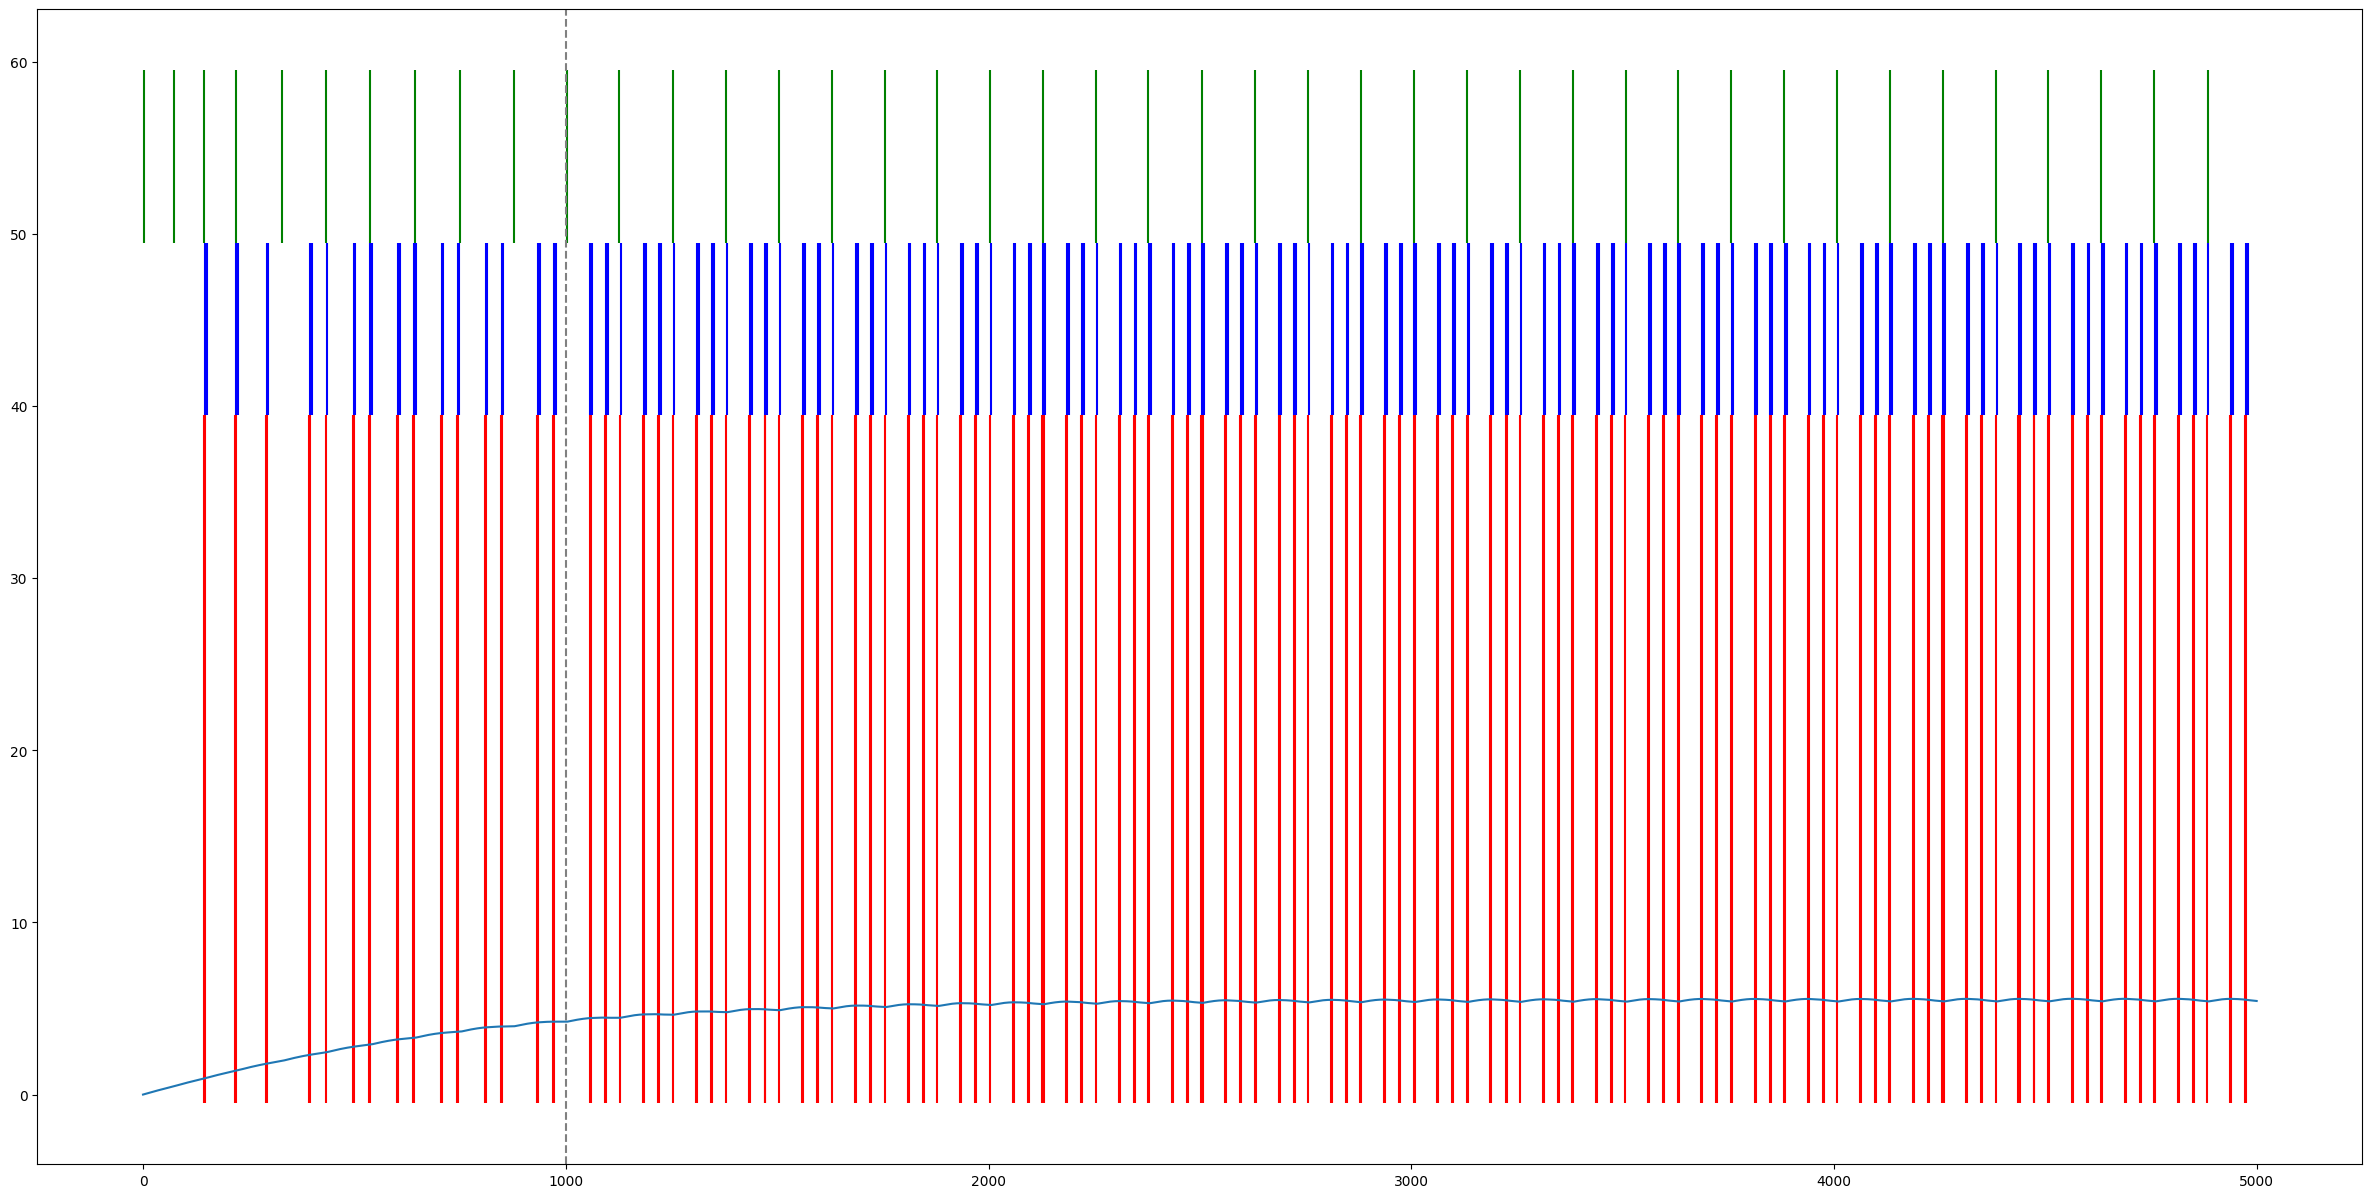

In [1709]:

freqs = np.linspace(.1, 100, 1000)
PLV_freqs = phase_locking_range_fixed(spike_times, t, freqs)

fig, axs = plt.subplots(3, 1, figsize=(12, 10))

axs[0].plot(freqs, np.nanmean(PLV_freqs[:, :NE], axis=1), color='red')
axs[0].set_title('E1')
axs[0].set_ylabel('PLV')
axs[0].set_xlabel('Frequency (Hz)')
#################################################
axs[0].axvline(x=6, color='red', linestyle='--')#
#################################################

axs[1].plot(freqs, np.nanmean(PLV_freqs[:, NE:NE+NI], axis=1), color='blue')
axs[1].set_title('I')
axs[1].set_ylabel('PLV')
axs[1].set_xlabel('Frequency (Hz)')

axs[2].plot(freqs, np.nanmean(PLV_freqs[:, NE+NI:], axis=1), color='green')
axs[2].set_title('O')
axs[2].set_ylabel('PLV')
axs[2].set_xlabel('Frequency (Hz)')

plt.tight_layout()
plt.show()
# Raster plot
rast = [spike_times[spike_times[:, i] != 0, i] for i in range(Ntot)]
rast_colors = ['red']*NE + ['blue']*NI + ['green']*NO
plt.figure(figsize=(30, 15))
plt.eventplot(rast, colors=rast_colors)
#plt.xlim(0,500)
H_avg = np.mean(H[:, E1], axis=1)
plt.plot(t, H_avg*100)
plt.axvline(x=1000, color='gray', linestyle='--')
plt.savefig("raster_plot.png", dpi=300, bbox_inches='tight')
plt.show()


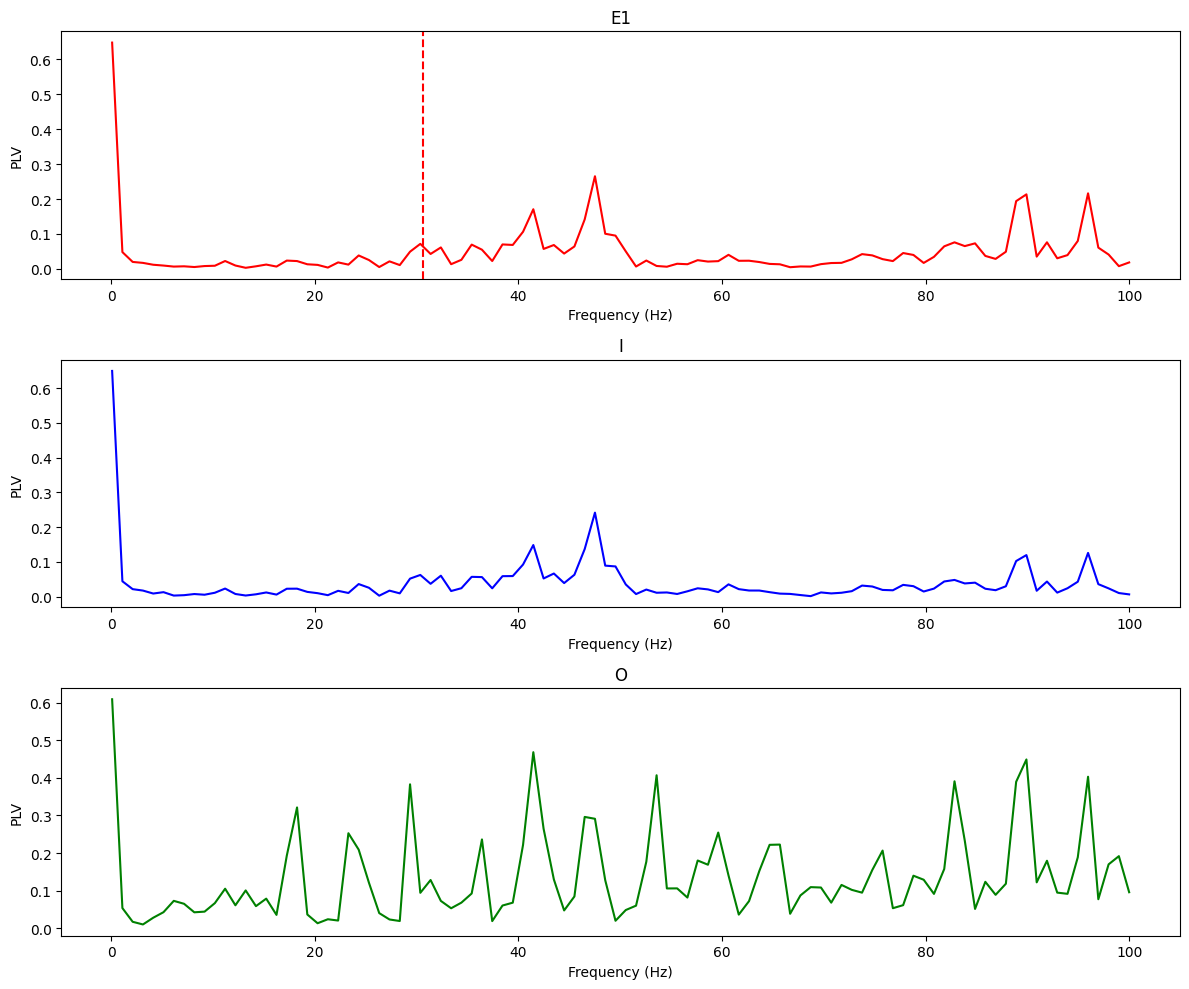

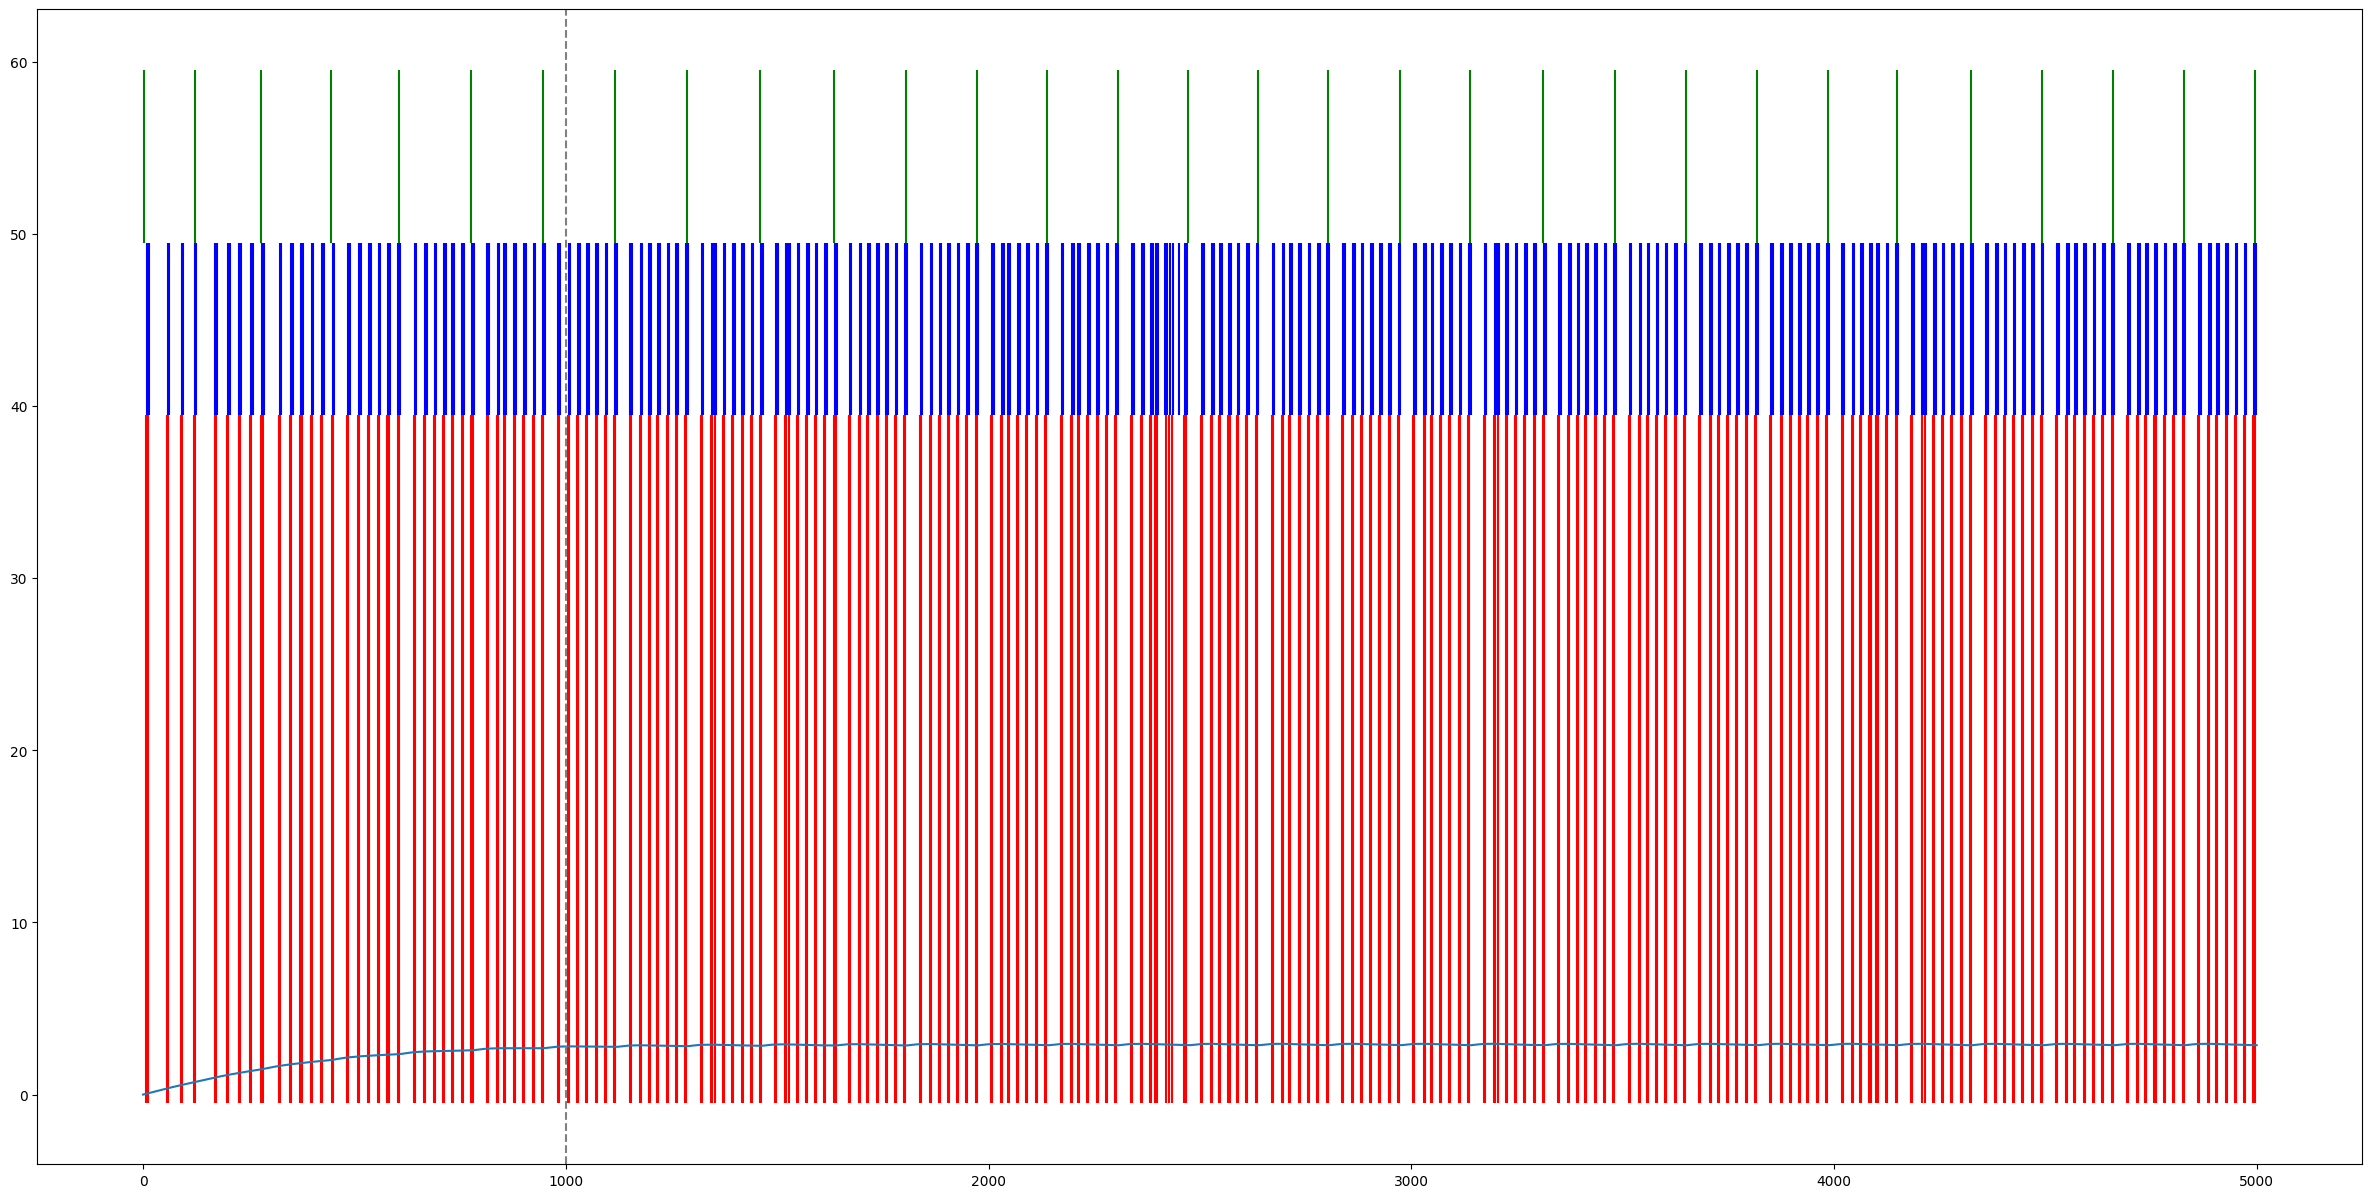

In [1639]:
### PHASE LOCKING VALUE ANALYSIS ###
def phase_locking_range_fixed(spike_times, t, freqs, min_spikes=3):
    PLV_freqs = np.zeros((len(freqs), spike_times.shape[1]))
    for f_idx, freq in enumerate(freqs):
        for neuron in range(spike_times.shape[1]):
            spike_times_neuron = spike_times[spike_times[:, neuron] != 0, neuron]
            if len(spike_times_neuron) < min_spikes:
                PLV_freqs[f_idx, neuron] = np.nan
                continue
            phases = (2 * np.pi * freq * spike_times_neuron / 1000.0) % (2 * np.pi)
            PLV_freqs[f_idx, neuron] = np.abs(np.sum(np.exp(1j * phases)) / len(phases))
    return PLV_freqs

freqs = np.linspace(.1, 100, 100)
PLV_freqs = phase_locking_range_fixed(spike_times, t, freqs)

fig, axs = plt.subplots(3, 1, figsize=(12, 10))

axs[0].plot(freqs, np.nanmean(PLV_freqs[:, :NE], axis=1), color='red')
axs[0].set_title('E1')
axs[0].set_ylabel('PLV')
axs[0].set_xlabel('Frequency (Hz)')
#################################################
axs[0].axvline(x=30.6, color='red', linestyle='--')#
#################################################
axs[1].plot(freqs, np.nanmean(PLV_freqs[:, NE:NE+NI], axis=1), color='blue')
axs[1].set_title('I')
axs[1].set_ylabel('PLV')
axs[1].set_xlabel('Frequency (Hz)')

axs[2].plot(freqs, np.nanmean(PLV_freqs[:, NE+NI:], axis=1), color='green')
axs[2].set_title('O')
axs[2].set_ylabel('PLV')
axs[2].set_xlabel('Frequency (Hz)')

plt.tight_layout()
plt.show()
# Raster plot
rast = [spike_times[spike_times[:, i] != 0, i] for i in range(Ntot)]
rast_colors = ['red']*NE + ['blue']*NI + ['green']*NO
plt.figure(figsize=(30, 15))
plt.eventplot(rast, colors=rast_colors)
#plt.xlim(0,500)
H_avg = np.mean(H[:, E1], axis=1)
plt.plot(t, H_avg*100)
plt.axvline(x=1000, color='gray', linestyle='--')
plt.savefig("raster_plot.png", dpi=300, bbox_inches='tight')
plt.show()


/var/folders/h6/lrzzslg91lsg0q56fgqvrlsh0000gn/T/ipykernel_68784/1082327631.py:29: RuntimeWarning: Mean of empty slice
  axs[2].plot(freqs, np.nanmean(PLV_freqs[:, NE+NE2:NE+NE2+NI], axis=1), color='blue')


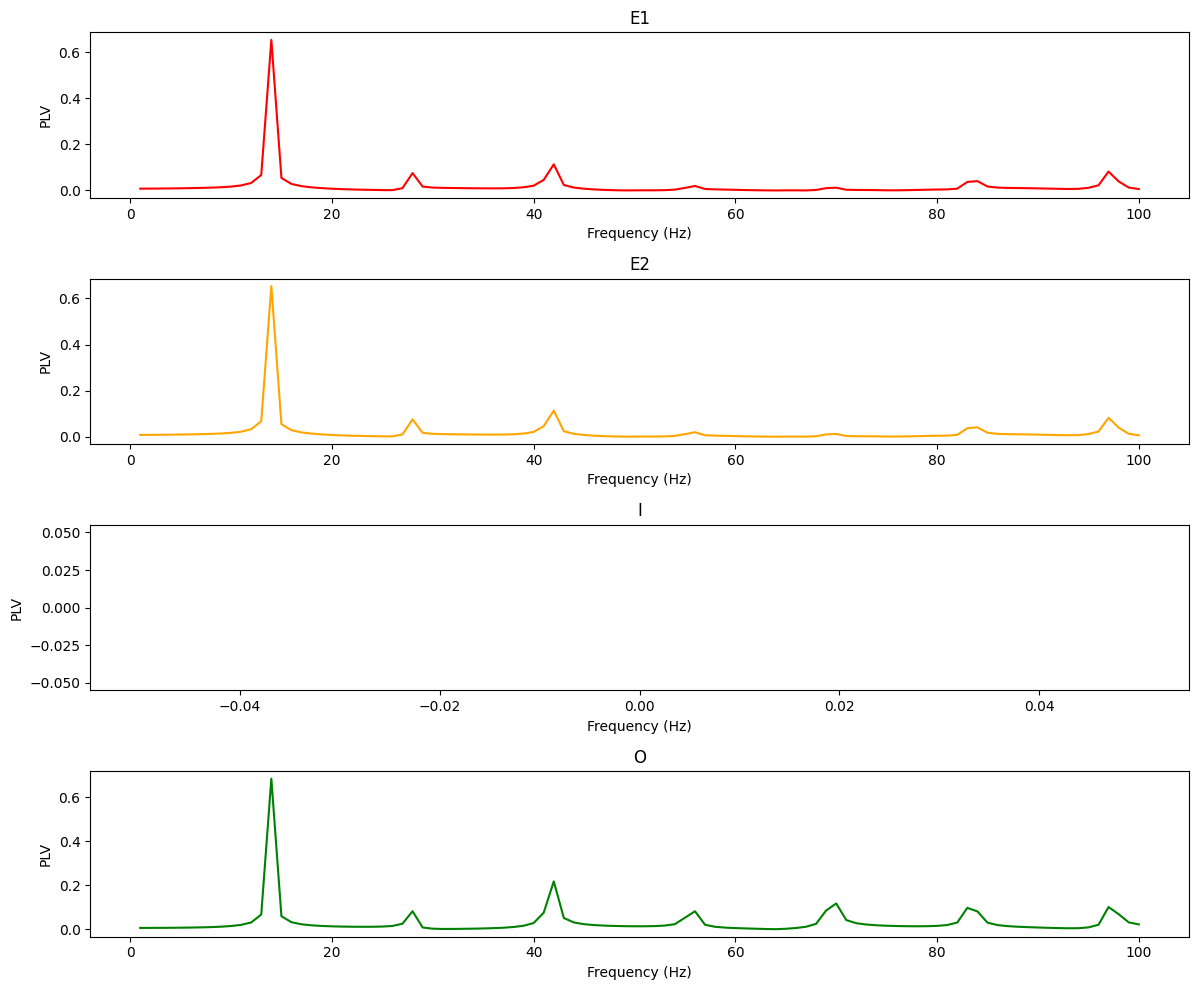

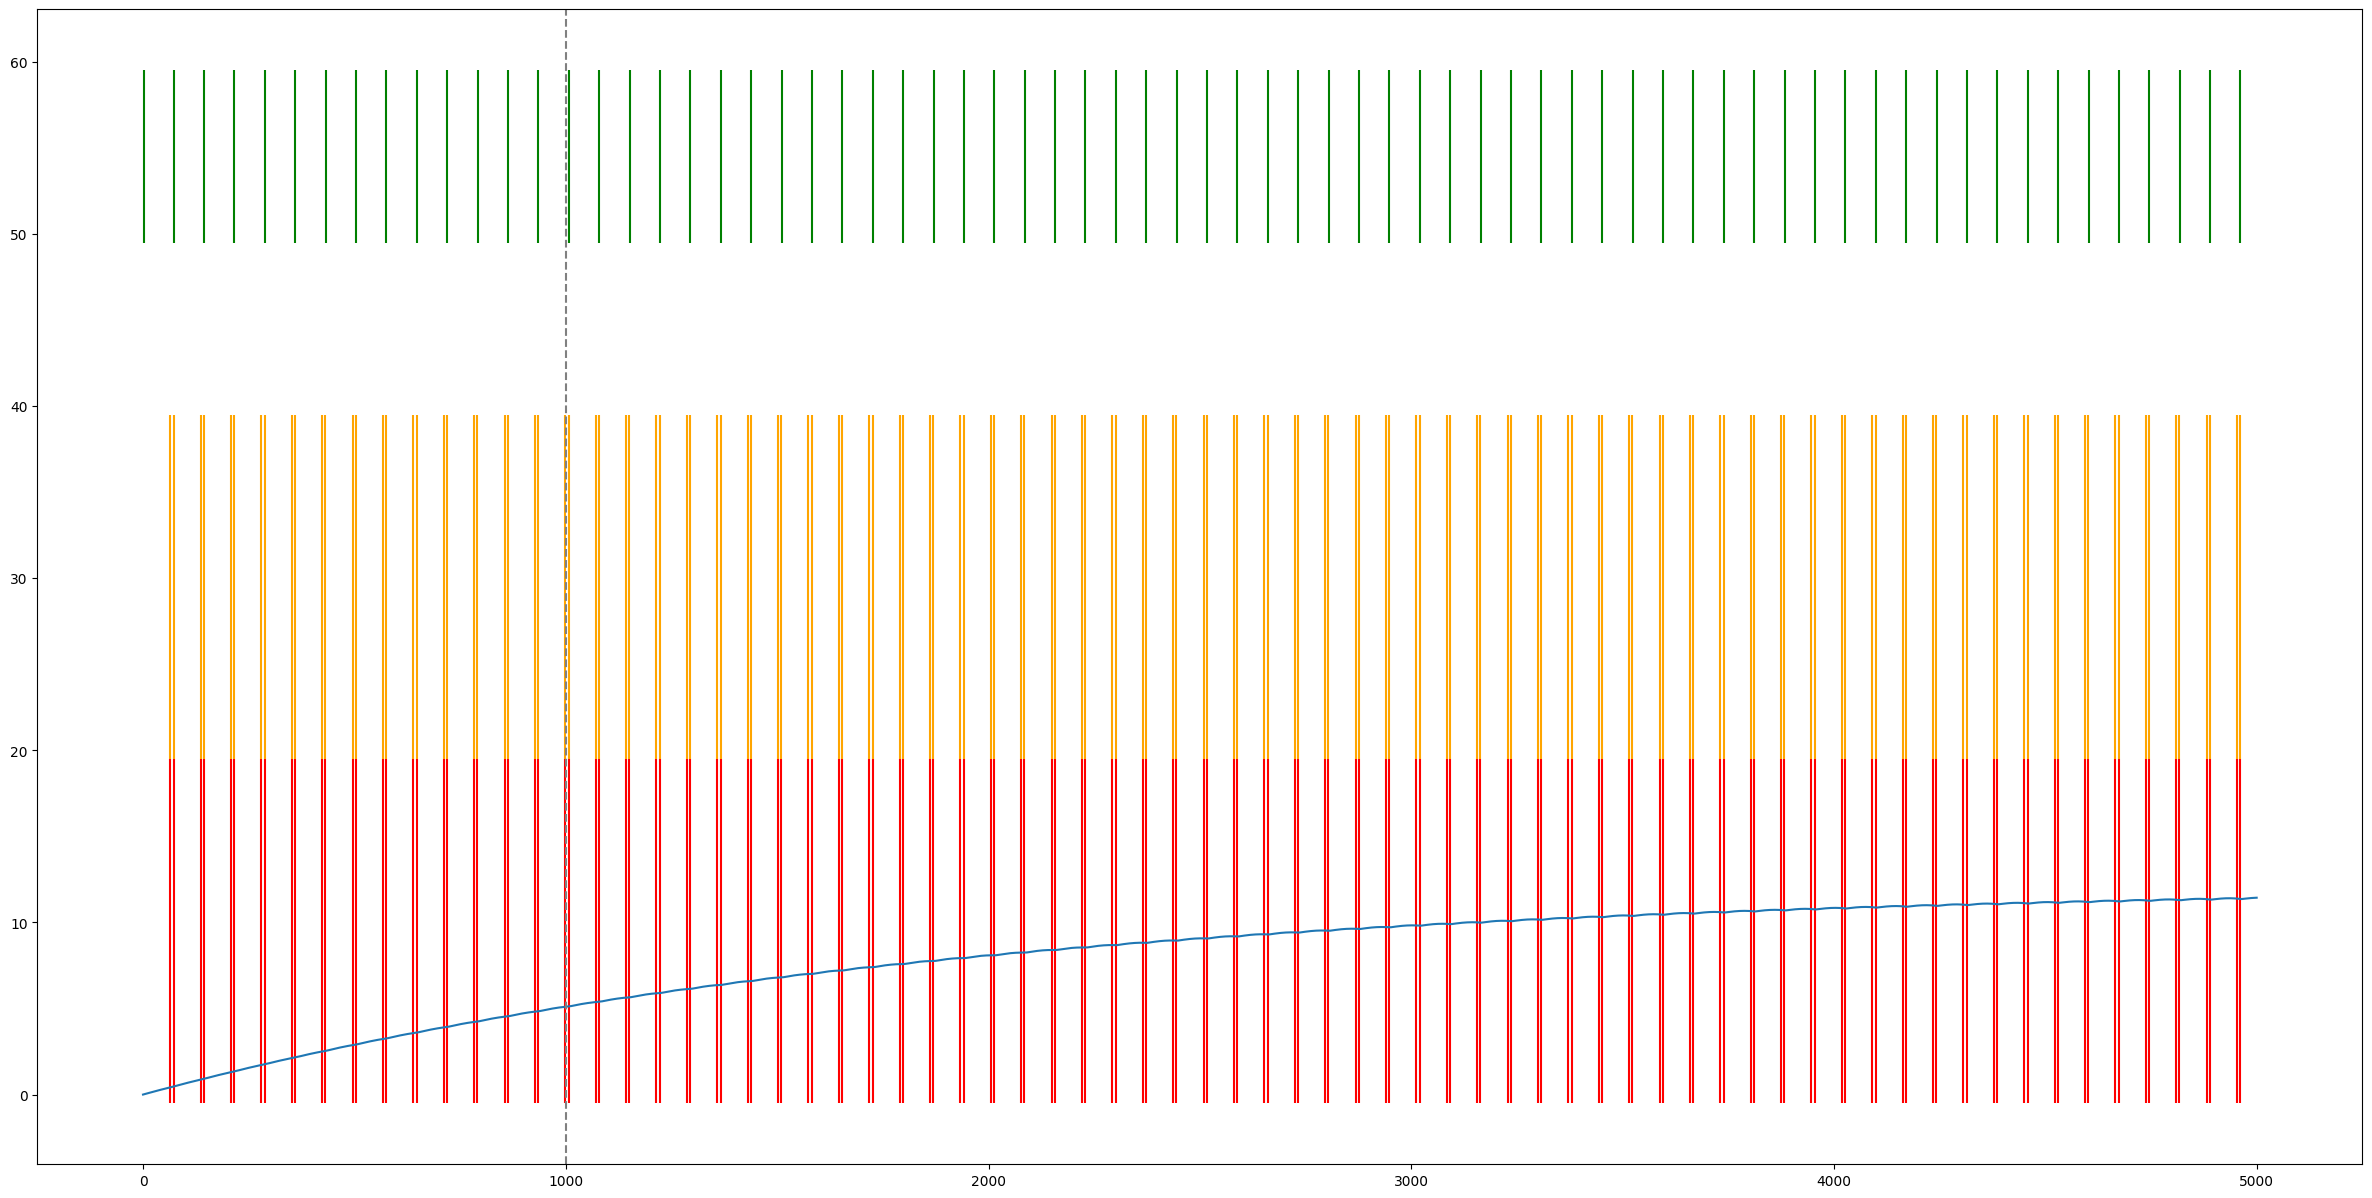

In [825]:
### PHASE LOCKING VALUE ANALYSIS ###
def phase_locking_range_fixed(spike_times, t, freqs, min_spikes=3):
    PLV_freqs = np.zeros((len(freqs), spike_times.shape[1]))
    for f_idx, freq in enumerate(freqs):
        for neuron in range(spike_times.shape[1]):
            spike_times_neuron = spike_times[spike_times[:, neuron] != 0, neuron]
            if len(spike_times_neuron) < min_spikes:
                PLV_freqs[f_idx, neuron] = np.nan
                continue
            phases = (2 * np.pi * freq * spike_times_neuron / 1000.0) % (2 * np.pi)
            PLV_freqs[f_idx, neuron] = np.abs(np.sum(np.exp(1j * phases)) / len(phases))
    return PLV_freqs

freqs = np.linspace(1, 100, 100)
PLV_freqs = phase_locking_range_fixed(spike_times, t, freqs)

fig, axs = plt.subplots(4, 1, figsize=(12, 10))

axs[0].plot(freqs, np.nanmean(PLV_freqs[:, :NE], axis=1), color='red')
axs[0].set_title('E1')
axs[0].set_ylabel('PLV')
axs[0].set_xlabel('Frequency (Hz)')

axs[1].plot(freqs, np.nanmean(PLV_freqs[:, NE:NE+NE2], axis=1), color='orange')
axs[1].set_title('E2')
axs[1].set_ylabel('PLV')
axs[1].set_xlabel('Frequency (Hz)')

axs[2].plot(freqs, np.nanmean(PLV_freqs[:, NE+NE2:NE+NE2+NI], axis=1), color='blue')
axs[2].set_title('I')
axs[2].set_ylabel('PLV')
axs[2].set_xlabel('Frequency (Hz)')

axs[3].plot(freqs, np.nanmean(PLV_freqs[:, NE+NE2+NI:], axis=1), color='green')
axs[3].set_title('O')
axs[3].set_ylabel('PLV')
axs[3].set_xlabel('Frequency (Hz)')

plt.tight_layout()
plt.show()
# Raster plot
rast = [spike_times[spike_times[:, i] != 0, i] for i in range(Ntot)]
rast_colors = ['red']*NE + ['orange']*NE2 + ['blue']*NI + ['green']*NO
plt.figure(figsize=(30, 15))
plt.eventplot(rast, colors=rast_colors)
#plt.xlim(0,500)
H_avg = np.mean(H[:, E1], axis=1)
plt.plot(t, H_avg*100)
plt.axvline(x=1000, color='gray', linestyle='--')
plt.savefig("raster_plot.png", dpi=300, bbox_inches='tight')
plt.show()


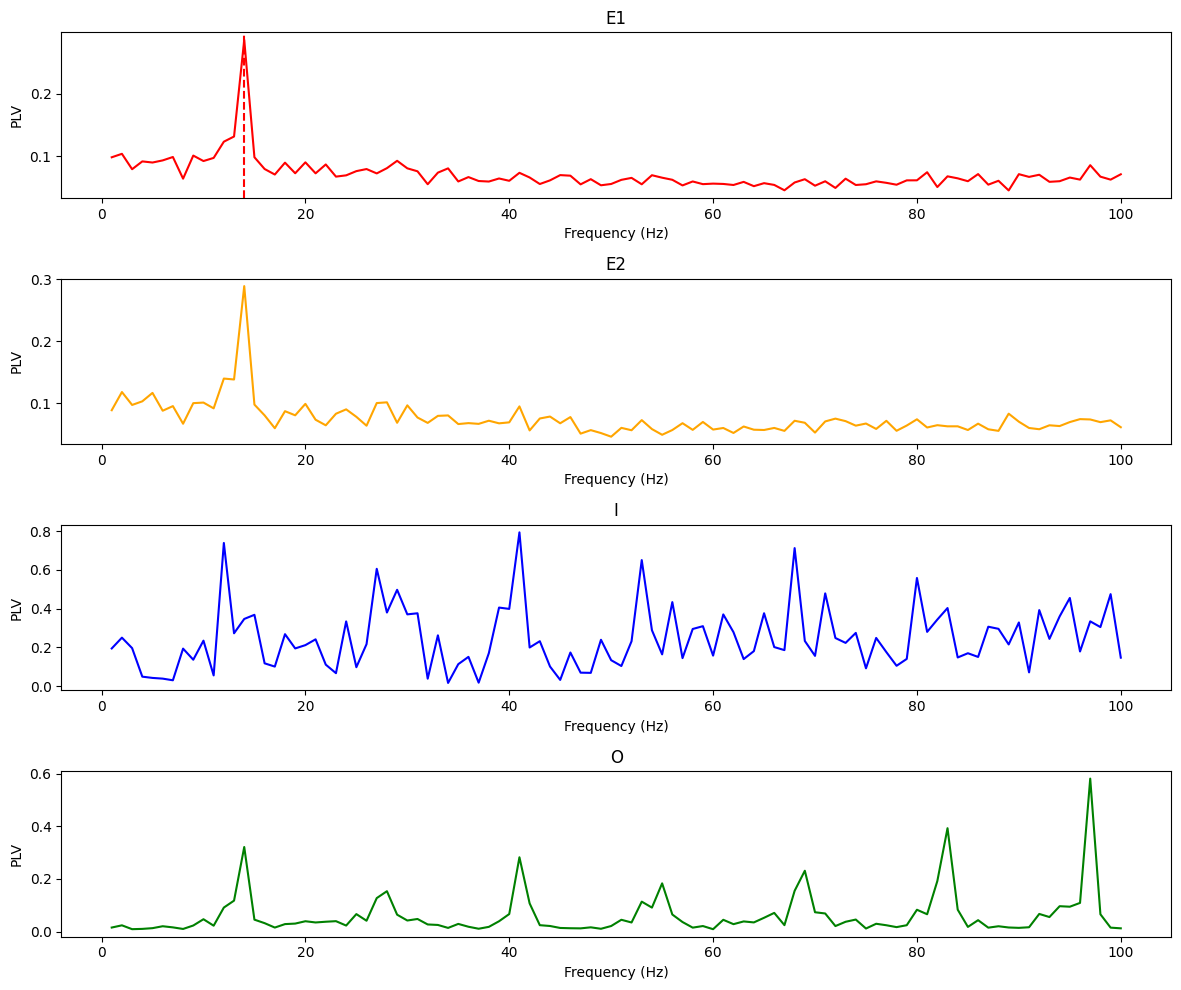

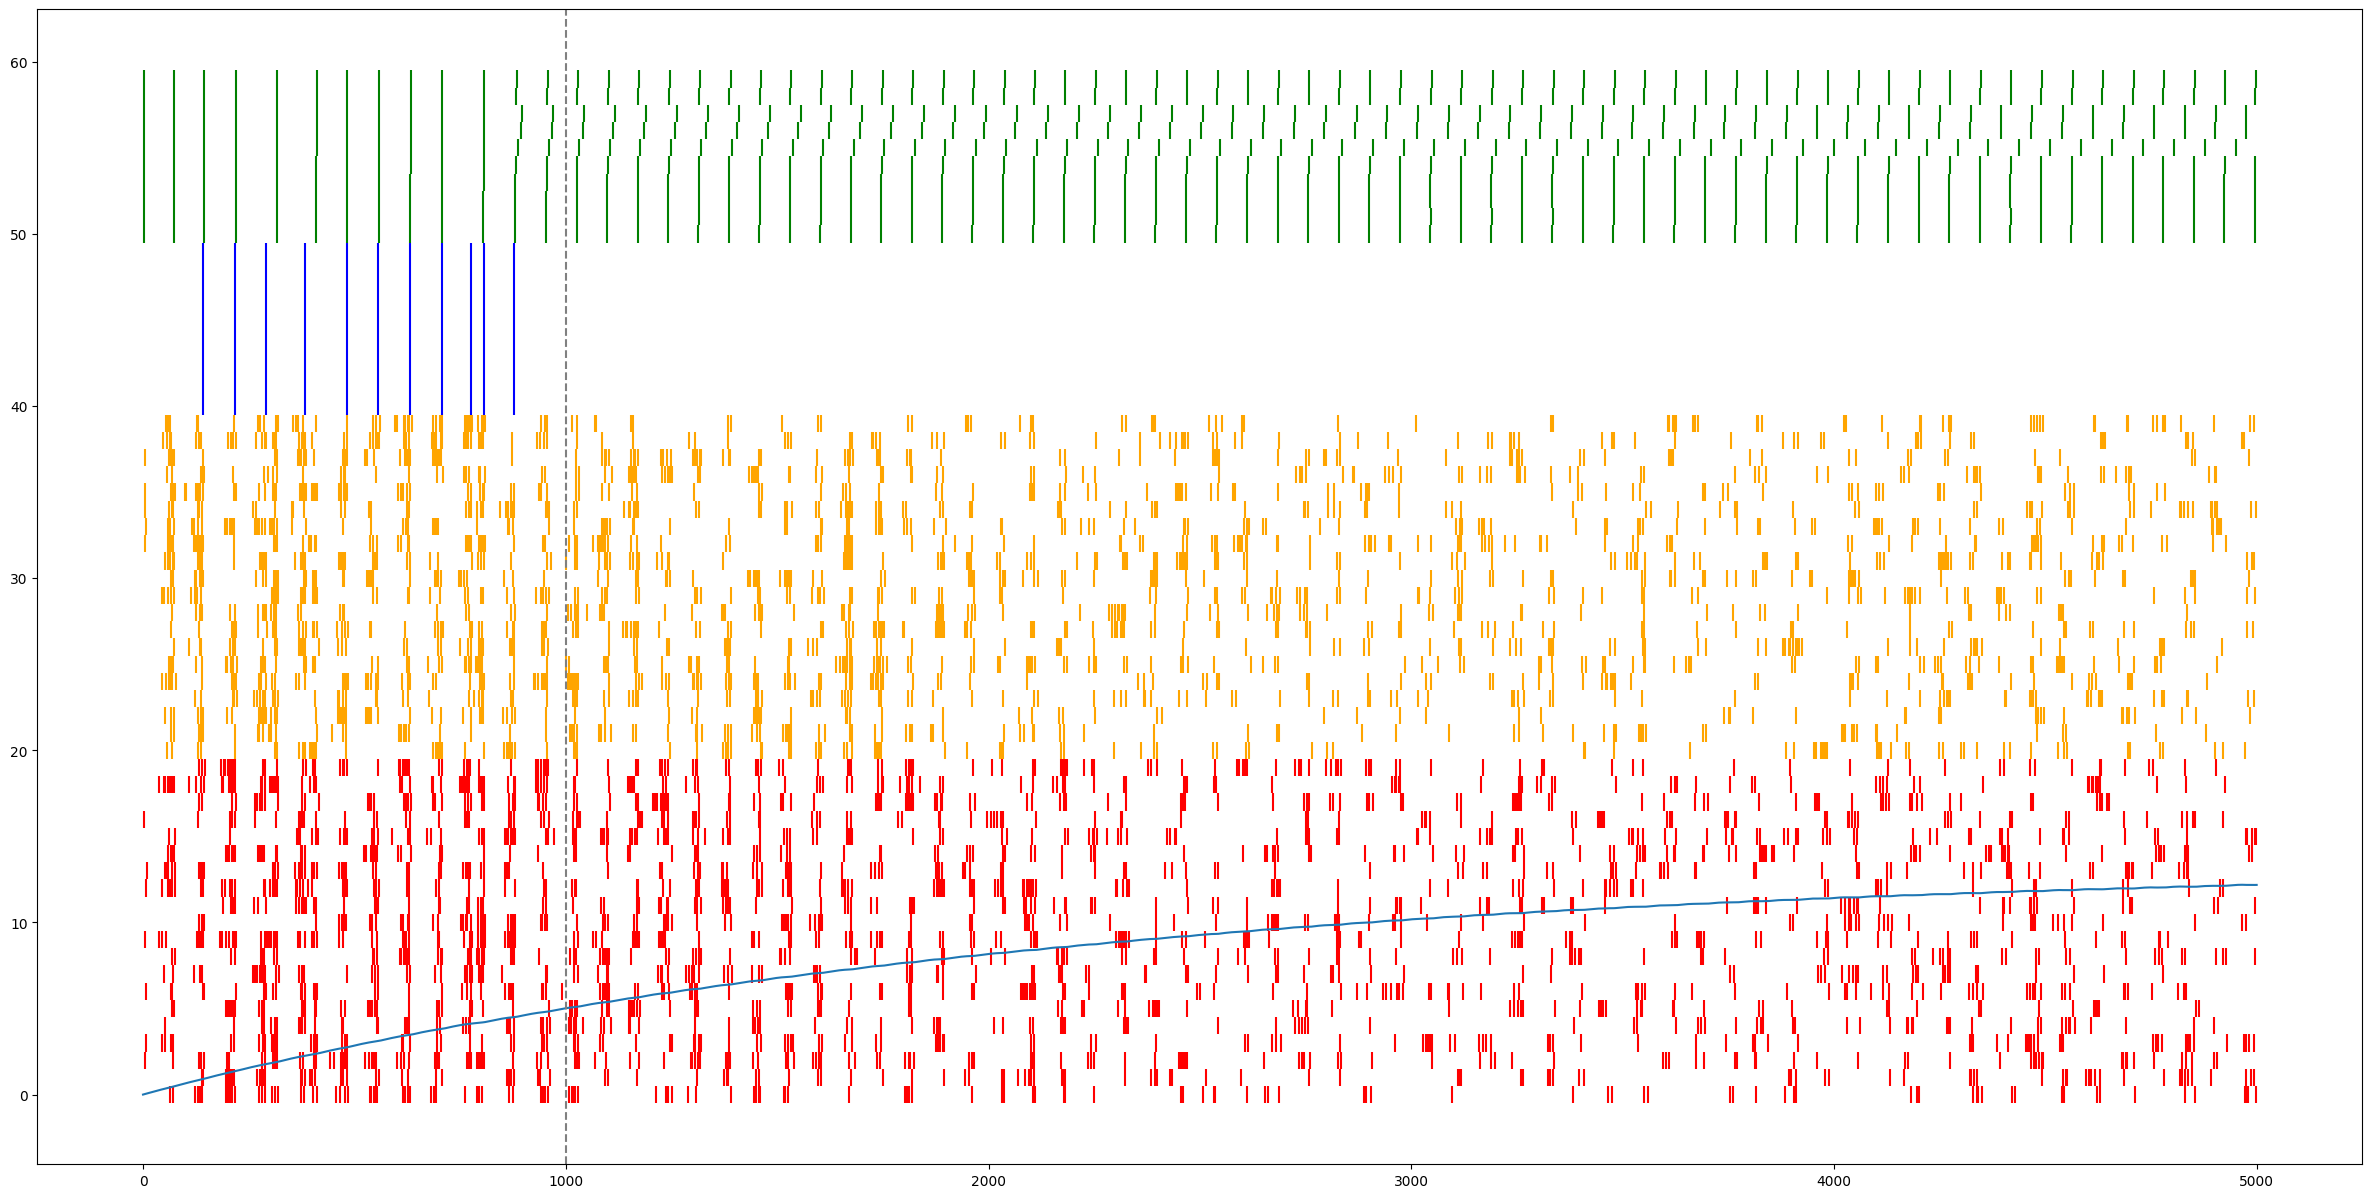

In [828]:
### PHASE LOCKING VALUE ANALYSIS ###
def phase_locking_range_fixed(spike_times, t, freqs, min_spikes=3):
    PLV_freqs = np.zeros((len(freqs), spike_times.shape[1]))
    for f_idx, freq in enumerate(freqs):
        for neuron in range(spike_times.shape[1]):
            spike_times_neuron = spike_times[spike_times[:, neuron] != 0, neuron]
            if len(spike_times_neuron) < min_spikes:
                PLV_freqs[f_idx, neuron] = np.nan
                continue
            phases = (2 * np.pi * freq * spike_times_neuron / 1000.0) % (2 * np.pi)
            PLV_freqs[f_idx, neuron] = np.abs(np.sum(np.exp(1j * phases)) / len(phases))
    return PLV_freqs

freqs = np.linspace(1, 100, 100)
PLV_freqs = phase_locking_range_fixed(spike_times, t, freqs)

fig, axs = plt.subplots(4, 1, figsize=(12, 10))

axs[0].plot(freqs, np.nanmean(PLV_freqs[:, :NE], axis=1), color='red')
axs[0].set_title('E1')
axs[0].set_ylabel('PLV')
axs[0].set_xlabel('Frequency (Hz)')
axs[0].axvline(x=14, color='red', linestyle='--')
axs[1].plot(freqs, np.nanmean(PLV_freqs[:, NE:NE+NE2], axis=1), color='orange')
axs[1].set_title('E2')
axs[1].set_ylabel('PLV')
axs[1].set_xlabel('Frequency (Hz)')

axs[2].plot(freqs, np.nanmean(PLV_freqs[:, NE+NE2:NE+NE2+NI], axis=1), color='blue')
axs[2].set_title('I')
axs[2].set_ylabel('PLV')
axs[2].set_xlabel('Frequency (Hz)')

axs[3].plot(freqs, np.nanmean(PLV_freqs[:, NE+NE2+NI:], axis=1), color='green')
axs[3].set_title('O')
axs[3].set_ylabel('PLV')
axs[3].set_xlabel('Frequency (Hz)')

plt.tight_layout()
plt.show()
# Raster plot
rast = [spike_times[spike_times[:, i] != 0, i] for i in range(Ntot)]
rast_colors = ['red']*NE + ['orange']*NE2 + ['blue']*NI + ['green']*NO
plt.figure(figsize=(30, 15))
plt.eventplot(rast, colors=rast_colors)
#plt.xlim(0,500)
H_avg = np.mean(H[:, E1], axis=1)
plt.plot(t, H_avg*100)
plt.axvline(x=1000, color='gray', linestyle='--')
plt.savefig("raster_plot.png", dpi=300, bbox_inches='tight')
plt.show()


Initial voltage of excitatory neurons: [-60.54380249 -70.50552159]
Initial voltage of inhibitory neurons: [-76.45940524 -68.8193006 ]
Initial voltage of O-LM neurons: [-68.36305285 -65.20018576]
Initial h of excitatory neurons: [0.09115384 0.21032158]
Initial h of inhibitory neurons: [0.95760806 0.8787205 ]
Initial h of O-LM neurons: [0.76384972 0.67038892]
Initial n of excitatory neurons: [0.07213277 0.02790759]
Initial n of inhibitory neurons: [0.03184729 0.06085377]
Initial n of O-LM neurons: [0.09949545 0.11140548]
Initial r of O-LM neurons: [0.1775502  0.13668283]
Initial a of O-LM neurons: [0.03644298 0.0437575 ]
Initial b of O-LM neurons: [0.41066291 0.3112043 ]


/var/folders/h6/lrzzslg91lsg0q56fgqvrlsh0000gn/T/ipykernel_34023/2589907379.py:36: RuntimeWarning: overflow encountered in scalar divide
  return 1.0/(1+(aq**4)/(Ca_acum**4))
/var/folders/h6/lrzzslg91lsg0q56fgqvrlsh0000gn/T/ipykernel_34023/2589907379.py:36: RuntimeWarning: divide by zero encountered in scalar divide
  return 1.0/(1+(aq**4)/(Ca_acum**4))


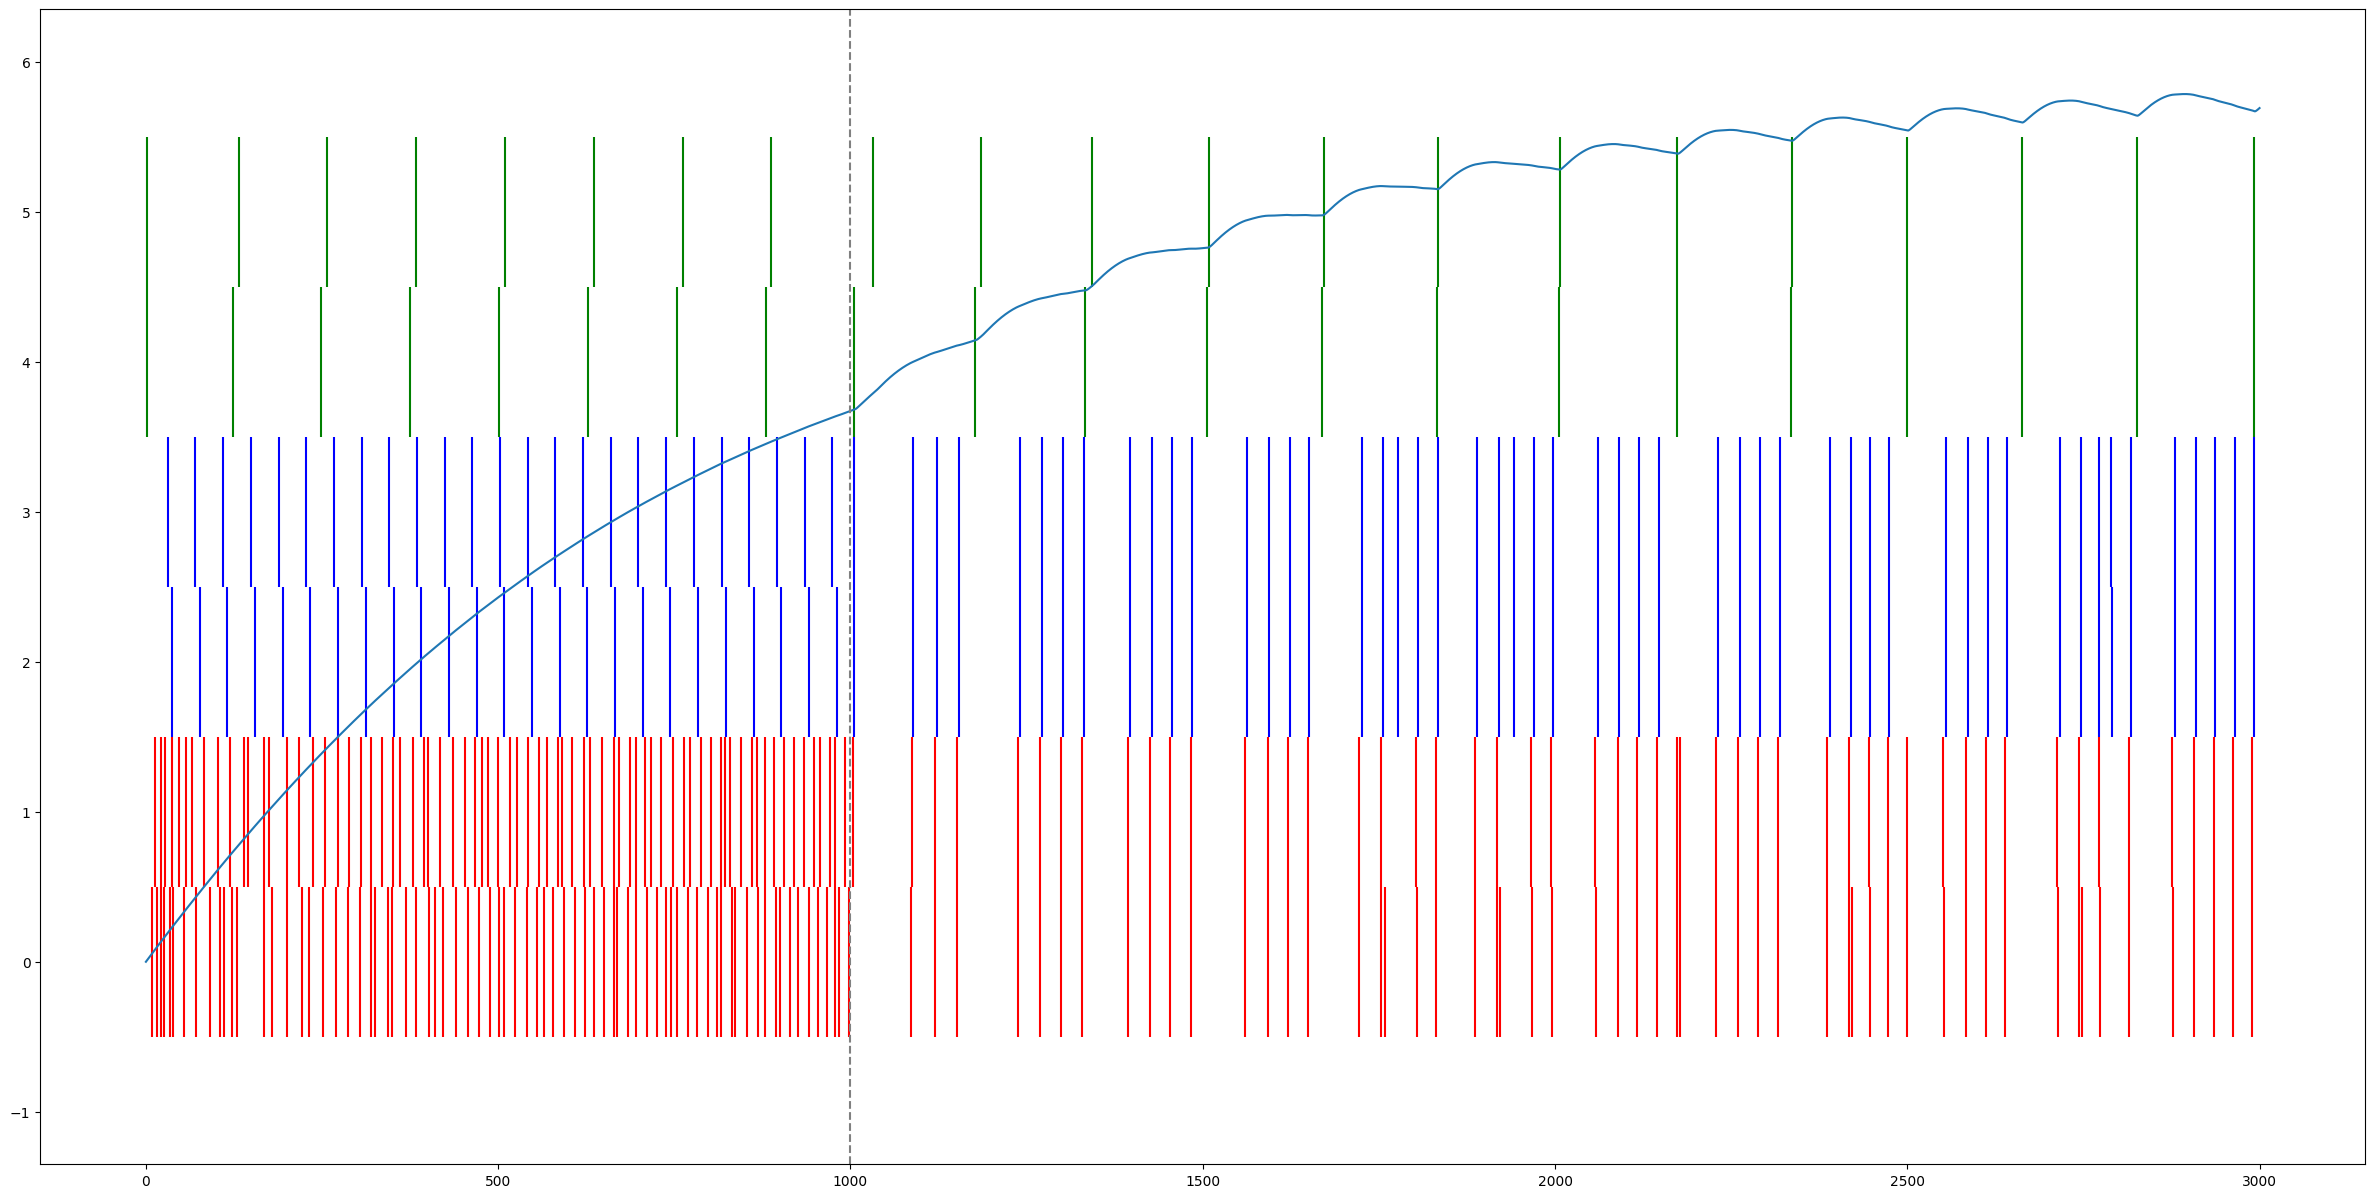

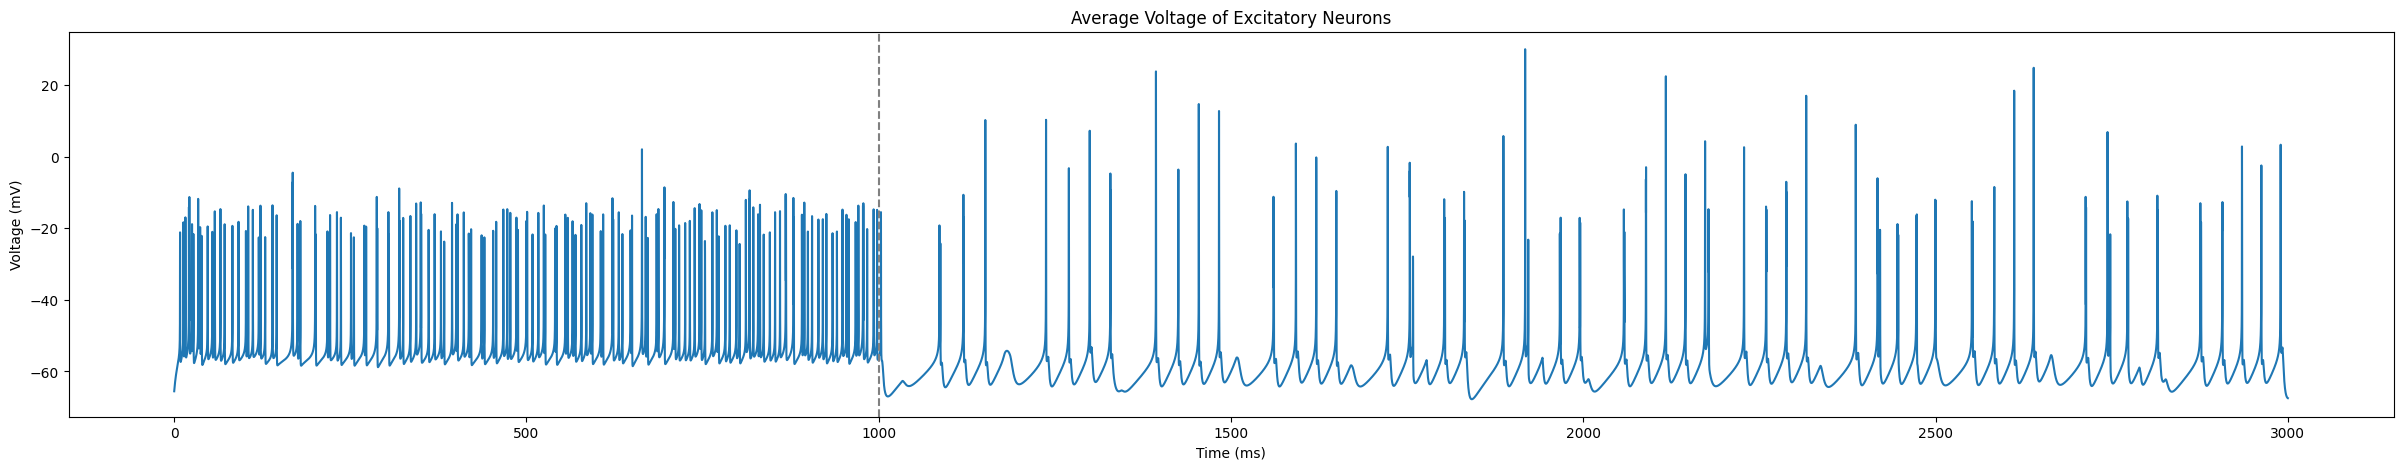

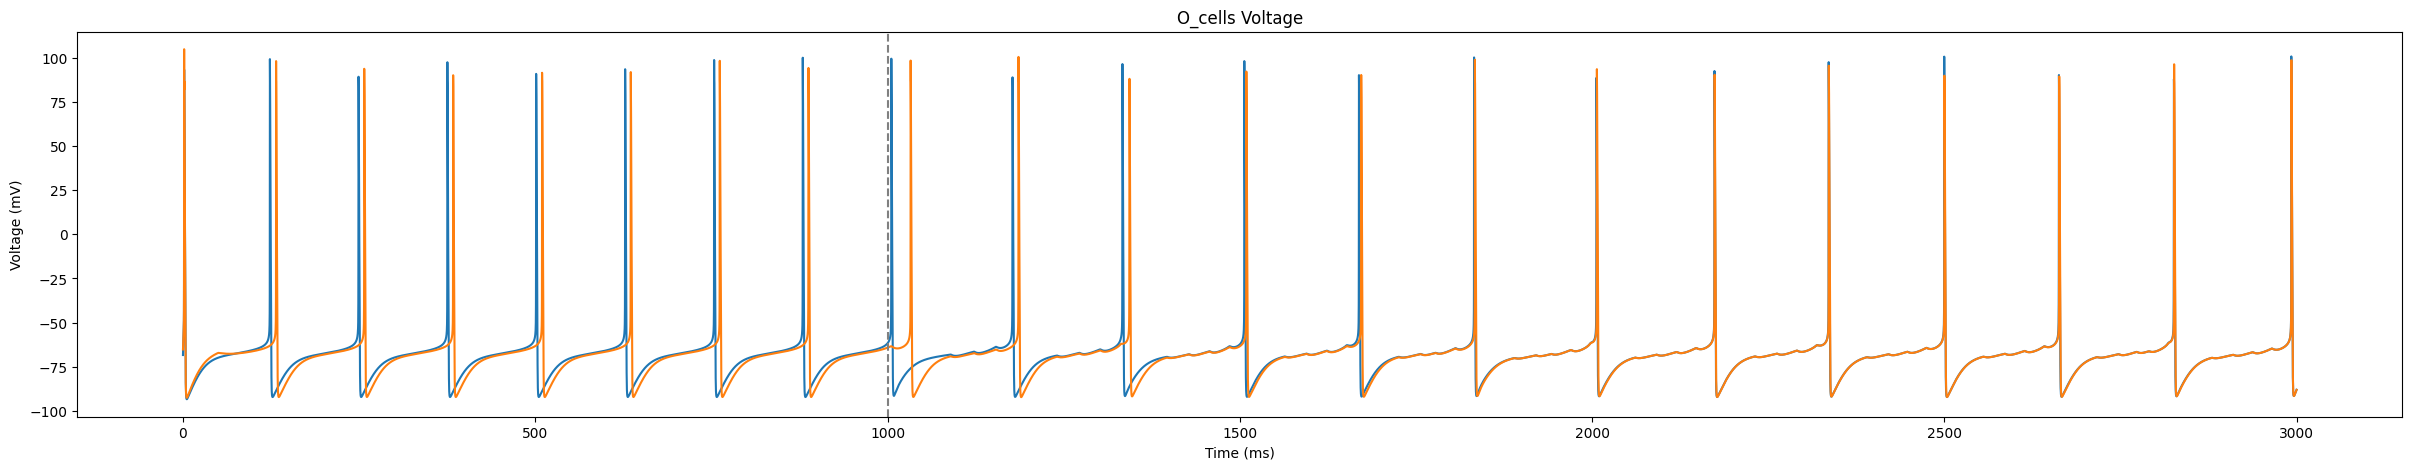

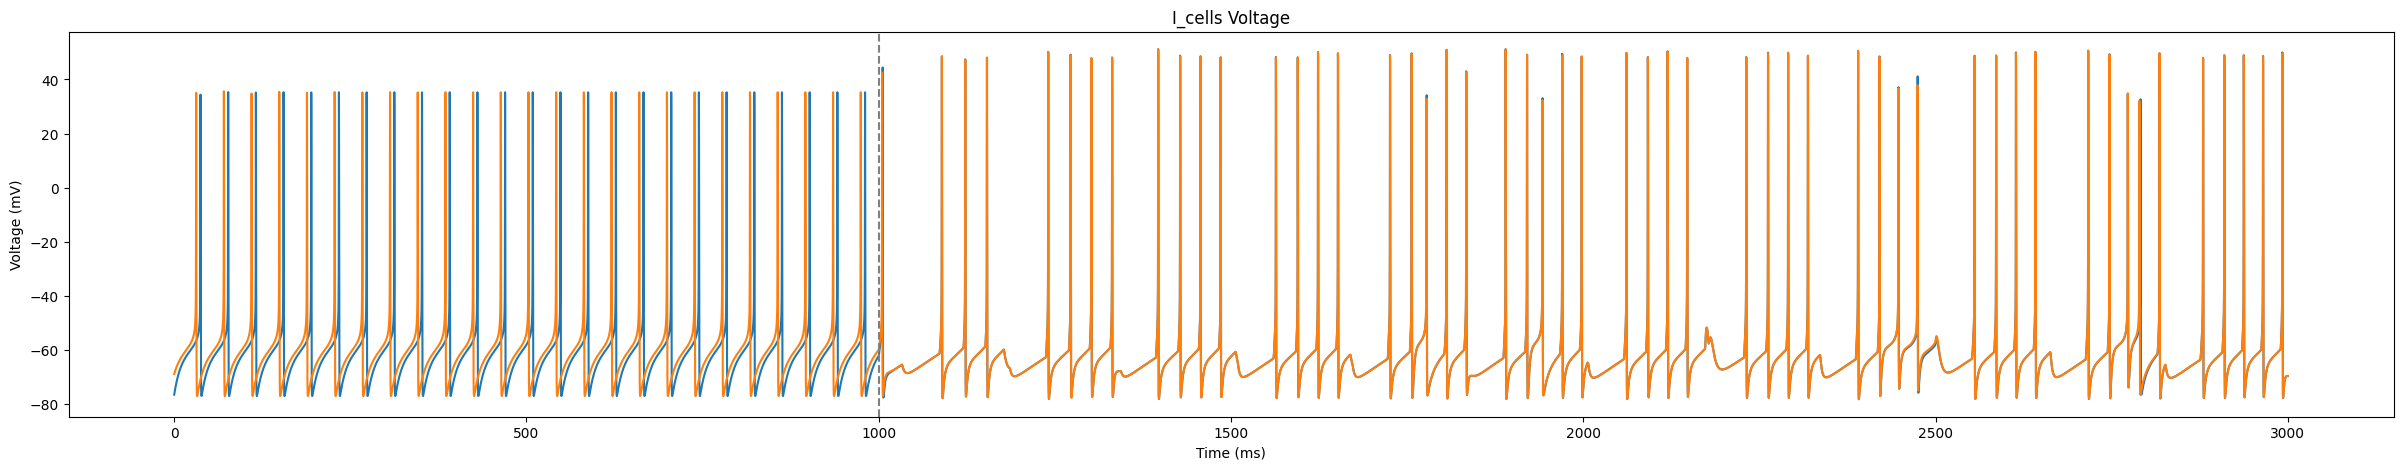

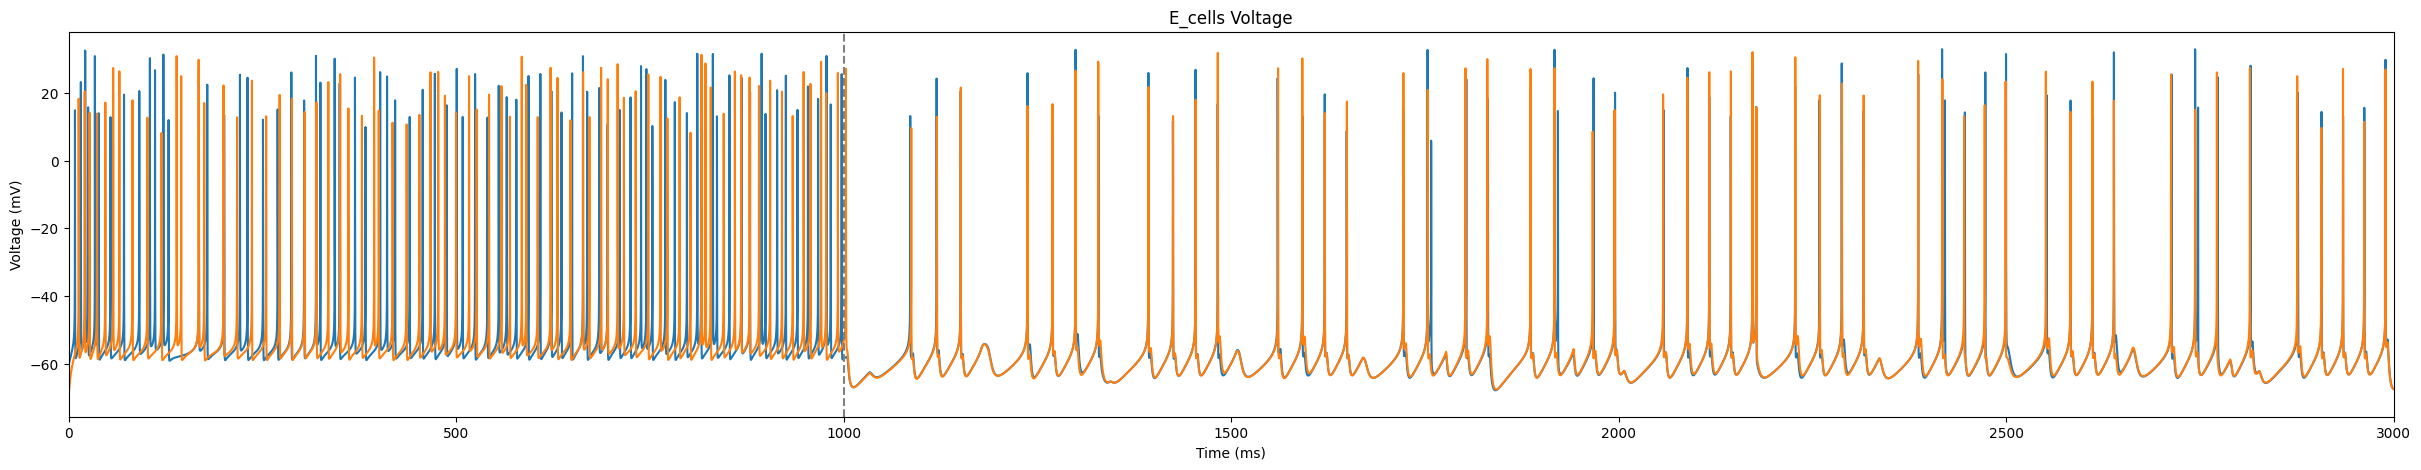

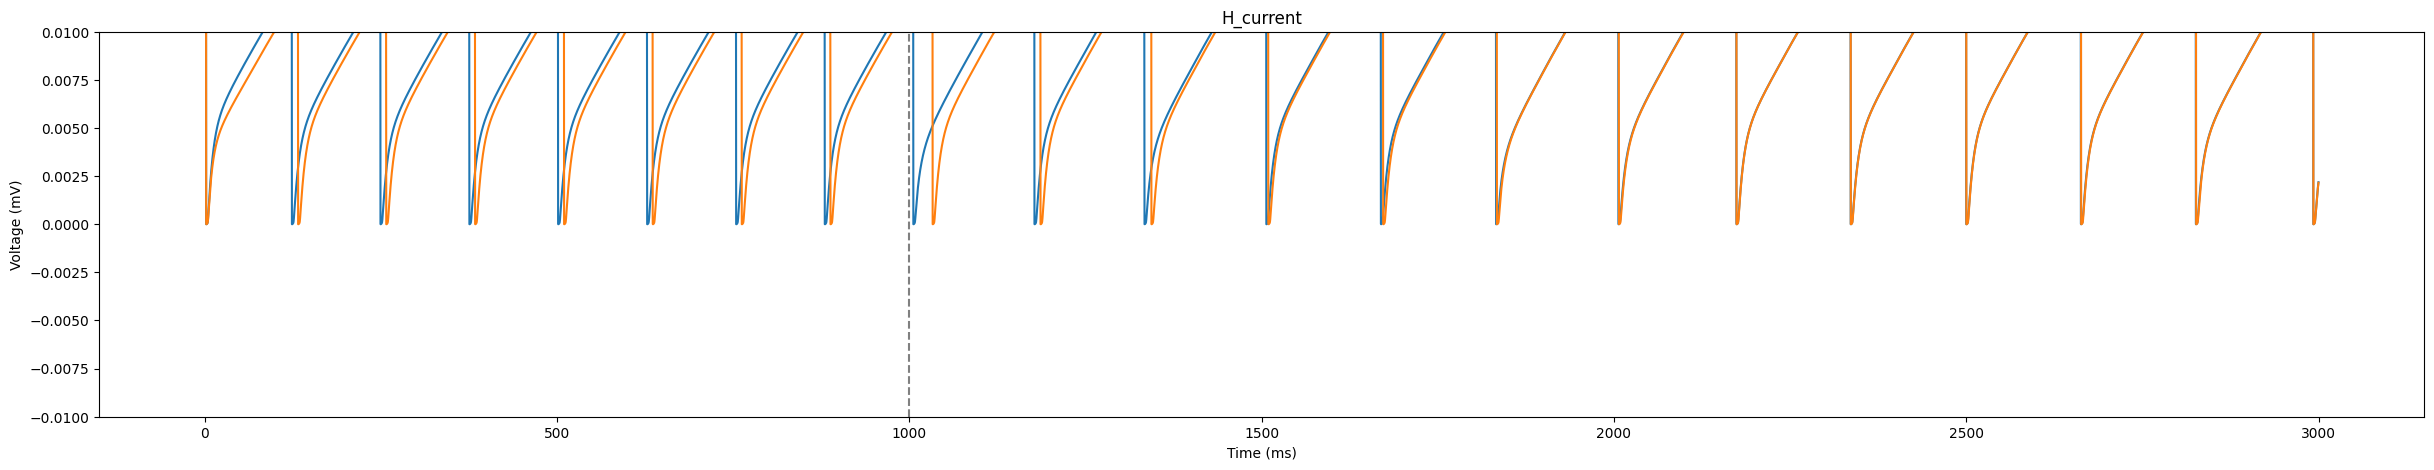

In [1458]:
### Good Version###

import numpy as np
import matplotlib.pyplot as plt
El = -58
# Network sizes
NE = 2
NI = 2
NO = 2

p_EE = 1.0
p_IE = 1.0
p_OE = 1.0
p_EI = 1.0
p_II = 1.0
p_OI = 1.0
p_E0 = 1.0
p_IO = 1.0
p_OO = 1.0

# Time
dt = 0.1  # ms
t_max = 3000  # ms
t = np.arange(0, t_max, dt)

# Initial Conditions
V = np.zeros([len(t), NE + NI + NO])
Vd = np.zeros([len(t), NE + NI + NO])
h = np.zeros([len(t), NE + NI + NO])
n = np.zeros([len(t), NE + NI + NO])
r = np.zeros([len(t), NE + NI + NO])
a = np.zeros([len(t), NE + NI + NO])
b = np.zeros([len(t), NE + NI + NO])
rv = np.zeros([len(t), NE + NI + NO])
Z = np.zeros([len(t), NE + NI + NO])
B = np.zeros([len(t), NE + NI + NO])
H = np.zeros([len(t), NE + NI + NO])
C = np.zeros([len(t), NE + NI + NO])
Ca_acum = np.zeros([len(t), NE + NI + NO])
Ca_acum[0, :] = 0.0001
Q = np.zeros([len(t), NE + NI + NO])

V[0, :] = El#-56
Vd[0, :] = El#-56
# h[0, :] = hinf(V[0, :])
# n[0, :] = ninf(V[0, :])
# rv[0, :] = rinf(V[0, :])
# Z[0, :] = Zinf(V[0, :])
# B[0, :] = Binf(V[0, :])
# H[0, :] = Hinf(Vd[0, :])
# C[0, :] = cinf(V[0, :])
# Q[0, :] = Qinf(Ca_acum[0, :])

V[0, :NE] = -70 + 10*np.random.randn(NE)
print(f'Initial voltage of excitatory neurons: {V[0, :NE]}')
V[0, NE:NE+NI] = -70 + 5*np.random.randn(NI)
print(f'Initial voltage of inhibitory neurons: {V[0, NE:NE+NI]}')
V[0, NE+NI:] = -65 + 10*np.random.randn(NO)
print(f'Initial voltage of O-LM neurons: {V[0, NE+NI:]}')
h[0, :NE] = Hinf(V[0, :NE])
print(f'Initial h of excitatory neurons: {h[0, :NE]}')
h[0, NE:NE+NI] = WB_h_inf(V[0, NE:NE+NI])
print(f'Initial h of inhibitory neurons: {h[0, NE:NE+NI]}')
h[0, NE+NI:] = OLM_h_inf(V[0, NE+NI:])
print(f'Initial h of O-LM neurons: {h[0, NE+NI:]}')
n[0, :NE] = ninf(V[0, :NE])
print(f'Initial n of excitatory neurons: {n[0, :NE]}')
n[0, NE:NE+NI] = WB_n_inf(V[0, NE:NE+NI])
print(f'Initial n of inhibitory neurons: {n[0, NE:NE+NI]}')
n[0, NE+NI:] = OLM_n_inf(V[0, NE+NI:])
print(f'Initial n of O-LM neurons: {n[0, NE+NI:]}')
r[0, NE+NI:] = OLM_r_inf(V[0, NE+NI:])
print(f'Initial r of O-LM neurons: {r[0, NE+NI:]}')
a[0, NE+NI:] = OLM_a_inf(V[0, NE+NI:])
print(f'Initial a of O-LM neurons: {a[0, NE+NI:]}')
b[0, NE+NI:] = OLM_b_inf(V[0, NE+NI:])
print(f'Initial b of O-LM neurons: {b[0, NE+NI:]}')

s_E = np.zeros(NE)
s_I = np.zeros(NI)
s_O = np.zeros(NO)

# Spike time tracker
t_spike = 1000 * np.ones(NE + NI + NO)

# Connectivity
p_UV = 1
EE = np.random.binomial(1, p_UV, size=(NE, NE))
IE = np.random.binomial(1, p_UV, size=(NI, NE))
OE = np.random.binomial(1, p_UV, size=(NO, NE))
EI = np.random.binomial(1, p_UV, size=(NE, NI))
II = np.random.binomial(1, p_UV, size=(NI, NI))
OI = np.random.binomial(1, p_UV, size=(NO, NI))
EO = np.random.binomial(1, p_UV, size=(NE, NO))
IO = np.random.binomial(1, p_UV, size=(NI, NO))
OO = np.random.binomial(1, p_UV, size=(NO, NO))

# Applied currents
def zap_input(i, Fzap, dt):
    return np.sin(2 * np.pi * Fzap * 10**-3 * i * dt + 3 * np.pi / 2)
N = len(t)
noise = piecewise_constant_white_noise(t,Tdur=.1,D=1)
Iapp_E = np.zeros(NE)
Iapp_I = np.zeros(NI)
Iapp_O = np.zeros(NO)
sig_E = 0.05
sig_I = 0.1
sig_O = 0.05
#Iapp_E = 0 * (1 + sig_E * np.random.randn(NE)) # nA
#Iapp_I = 0.35 * (1 + sig_I * np.random.randn(NI)) # nA
#Iapp_O = -1.8 * (1 + sig_O * np.random.randn(NO)) # nA
# Iapp_E = np.ones(NE)
Iapp_I = np.ones(NI) * 0
Iapp_O = np.ones(NO) * 0

Iapp_O = np.ones([len(t),NO]) * 0 
Iapp_E = np.ones([len(t),NE]) * 0 
Iapp_I = np.ones([len(t),NI]) * .5 

#Iapp_E = np.array([zap_input(i, 4, dt) for i in range(N)]) 
#Iapp_I = 0.48*np.array([zap_input(i, 40, dt) for i in range(N)]) 
#Iapp_O = 3*np.array([zap_input(i, 80, dt) for i in range(N)]) 
phase = np.array([zap_input(i, 5, dt) for i in range(N)])
# Spike recording
spike_times = np.zeros([len(t), NE + NI + NO])

# Main loop
for i in range(len(t) - 1):
    s_E_prev, s_I_prev, s_O_prev = s_E.copy(), s_I.copy(), s_O.copy()
    if i > 10000:
        nested = 1
    else:
        nested = 0
    
    # Excitatory neurons
    for j in range(NE):
        # Iapp_E[:,0] = -1
        # Iapp_E[1000:,1] = -1
        V[i+1, j], h[i+1, j], n[i+1, j], s_E[j], Vd[i+1, j], rv[i+1, j], Z[i+1, j], B[i+1, j], H[i+1, j], C[i+1, j], Ca_acum[i+1, j], Q[i+1, j] = RTM_Neuron_update(
            j, t_spike[j], V[i, j], Vd[i, j], h[i, j], n[i, j], rv[i, j], Z[i, j], B[i, j], H[i, j], C[i, j], Ca_acum[i, j], Q[i, j],
            Iapp_E[i,j], s_E_prev, s_I_prev, s_O_prev,
            EE[:, j], IE[:, j], OE[:, j],
            1, 1, 1, NE, NI, NO,nested
        )
        if V[i+1, j] > 0 and V[i, j] <= 0:
            spike_times[i, j] = t[i]
            t_spike[j] = 0

    # Inhibitory neurons
    for j in range(NI):
        # Iapp_I[:,0] = .1
        # Iapp_I[1000:,1] = .2
        V[i+1, NE+j], h[i+1, NE+j], n[i+1, NE+j], s_I[j] = WB_Neuron_update(
            j, t_spike[NE+j], V[i, NE+j], h[i, NE+j], n[i, NE+j],
            Iapp_I[i, j], s_E_prev, s_I_prev, s_O_prev,
            EI[:, j], II[:, j], OI[:, j], 1, 1, 1, NE, NI, NO,nested
        ) 
        if V[i+1, NE+j] > 0 and V[i, NE+j] <= 0:
            spike_times[i, NE+j] = t[i]
            t_spike[NE+j] = 0

    # O-LM neurons
    for j in range(NO):
        idx = NE + NI + j
        Iapp_O[:,0] = -.3
        Iapp_O[500:,1] = -.3
        
        V[i+1, idx], h[i+1, idx], n[i+1, idx], r[i+1, idx], a[i+1, idx], b[i+1, idx], s_O[j] = OLM_Neuron_update(
            j, t_spike[idx], V[i, idx], h[i, idx], n[i, idx], r[i, idx], a[i, idx], b[i, idx],
            Iapp_O[i, j], s_E_prev, s_I_prev, s_O_prev,
            EO[:, j], IO[:, j], OO[:, j], 1, 1, 1, NE, NI, NO,nested
        )
        if V[i+1, idx] > 0 and V[i, idx] <= 0:
            spike_times[i, idx] = t[i]
            t_spike[idx] = 0

    t_spike += dt

# Raster plot
rast = [spike_times[spike_times[:, i] != 0, i] for i in range(NE + NI + NO)]
rast_colors = ['red']*NE + ['blue']*NI + ['green']*NO
plt.figure(figsize=(30, 15))
plt.eventplot(rast, colors=rast_colors)
H_avg = np.mean(H[:, :NE], axis=1)
plt.plot(t,H_avg*100)
#plt.plot(t,Iapp_I)
plt.axvline(x=1000, color='gray', linestyle='--', label='Seperation') 
plt.savefig("raster_plot.png", dpi=300, bbox_inches='tight')
plt.show()

# Average voltage
V_avg = np.mean(V[:, :NE], axis=1)
plt.figure(figsize=(30, 5))
plt.plot(t, V_avg)
#plt.plot(t,phase)
plt.axvline(x=1000, color='gray', linestyle='--', label='Seperation') 
#plt.xlim(000, 1000)
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.title('Average Voltage of Excitatory Neurons')
plt.savefig("V_avg_plot.png", dpi=300, bbox_inches='tight')
plt.show()


O_cells = V[:, NE+NI:]
plt.figure(figsize=(30, 5))
plt.plot(t, O_cells)
#plt.plot(t,phase)
plt.axvline(x=1000, color='gray', linestyle='--', label='Seperation') 
#plt.xlim(000, 1000)
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.title('O_cells Voltage')
plt.savefig("O_cells_voltage.png", dpi=300, bbox_inches='tight')
plt.show()
I_cells = V[:, NE:NE+NI]
plt.figure(figsize=(30, 5))
plt.plot(t, I_cells)
#plt.plot(t,phase)
plt.axvline(x=1000, color='gray', linestyle='--', label='Seperation') 
#plt.xlim(000, 1000)
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.title('I_cells Voltage')
plt.savefig("I_cells_voltage.png", dpi=300, bbox_inches='tight')
plt.show()
E_cells = V[:, :NE]
plt.figure(figsize=(30, 5))
plt.plot(t, E_cells)
#plt.plot(t,phase)
plt.axvline(x=1000, color='gray', linestyle='--', label='Seperation') 
plt.xlim(000, 3000)
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.title('E_cells Voltage')
plt.savefig("E_cells_voltage.png", dpi=300, bbox_inches='tight')
plt.show()


H_current = r[:, NE+NI:]
plt.figure(figsize=(30, 5))
plt.plot(t, H_current)
#plt.plot(t,phase)
plt.axvline(x=1000, color='gray', linestyle='--', label='Seperation') 
#plt.xlim(000, 1000)
plt.ylim(-0.01,0.01)
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.title('H_current')
plt.savefig("H_current.png", dpi=300, bbox_inches='tight')
plt.show()

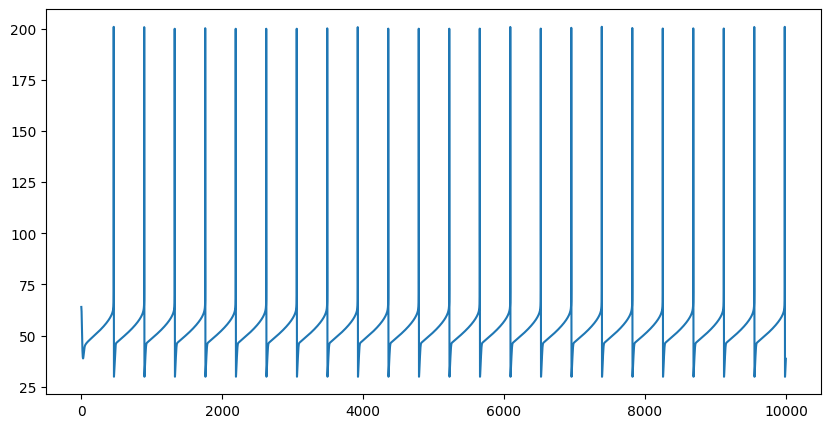

In [991]:
plt.figure(figsize=(10, 5))
plt.plot(t,V[:,0]+122)
#plt.plot(t, V[:, i_NO], label=f'NO {i_NO+1}', color='red')
Z_avg = np.mean(Z[:, :NE], axis=1)
plt.plot(t,Z_avg*5000, label='Z variable avg', color='green')

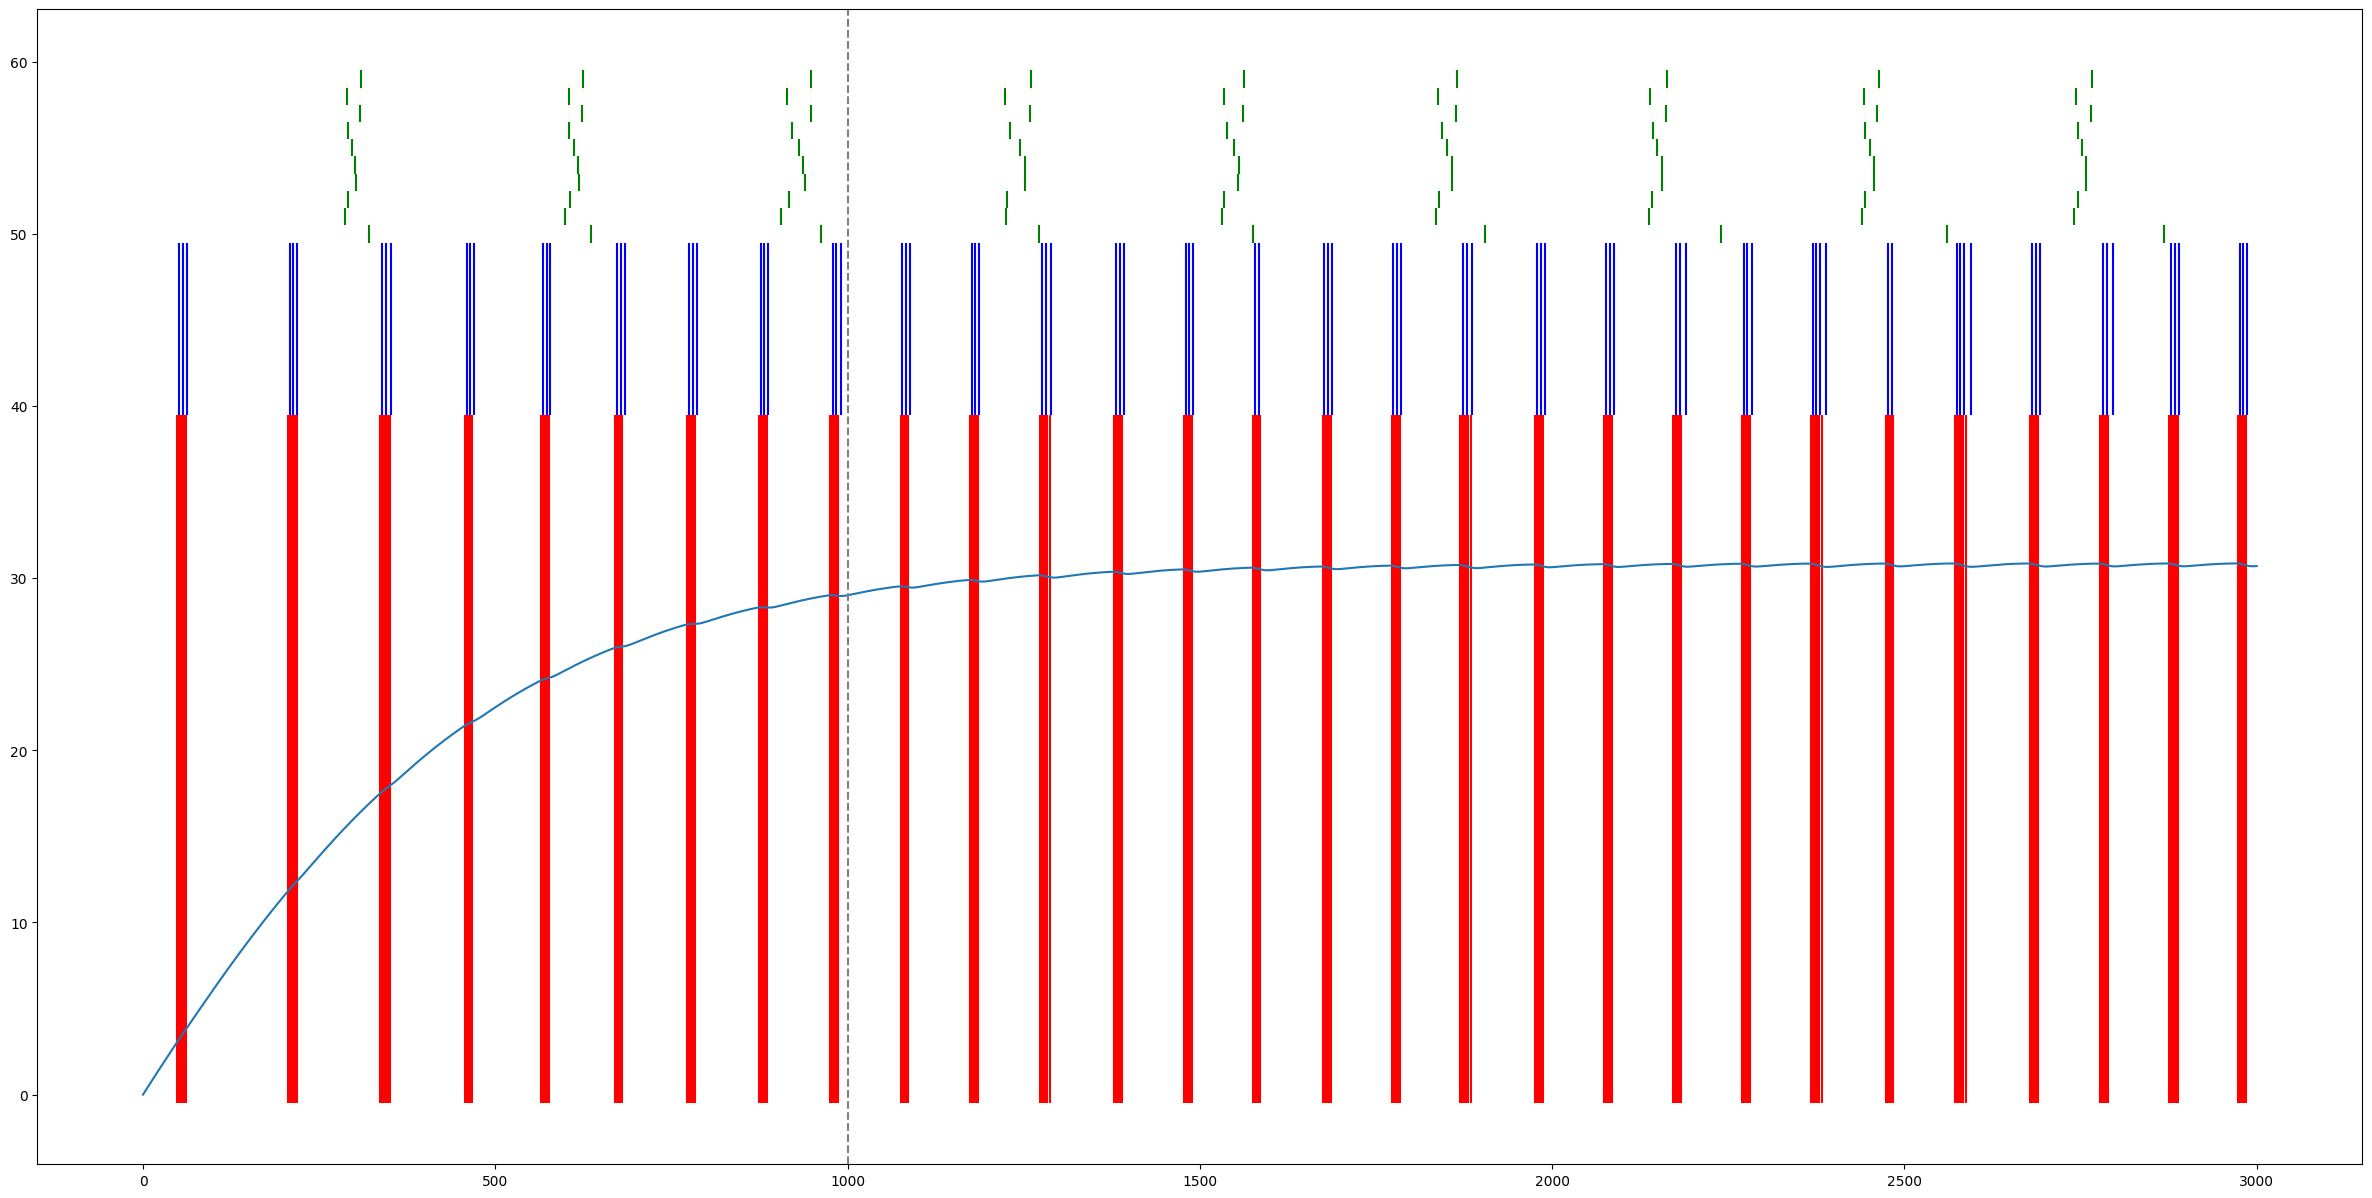

In [821]:
# Raster plot

rast = [spike_times[spike_times[:, i] != 0, i] for i in range(NE + NI + NO)]
rast_colors = ['red']*NE + ['blue']*NI + ['green']*NO
plt.figure(figsize=(30, 15))
plt.eventplot(rast, colors=rast_colors)
H_avg = np.mean(H[:, :NE], axis=1)
plt.plot(t,H_avg*1000)
#plt.plot(t,Iapp_I)
plt.axvline(x=1000, color='gray', linestyle='--', label='Seperation') 
plt.savefig("raster_plot.png", dpi=300, bbox_inches='tight')
plt.show()

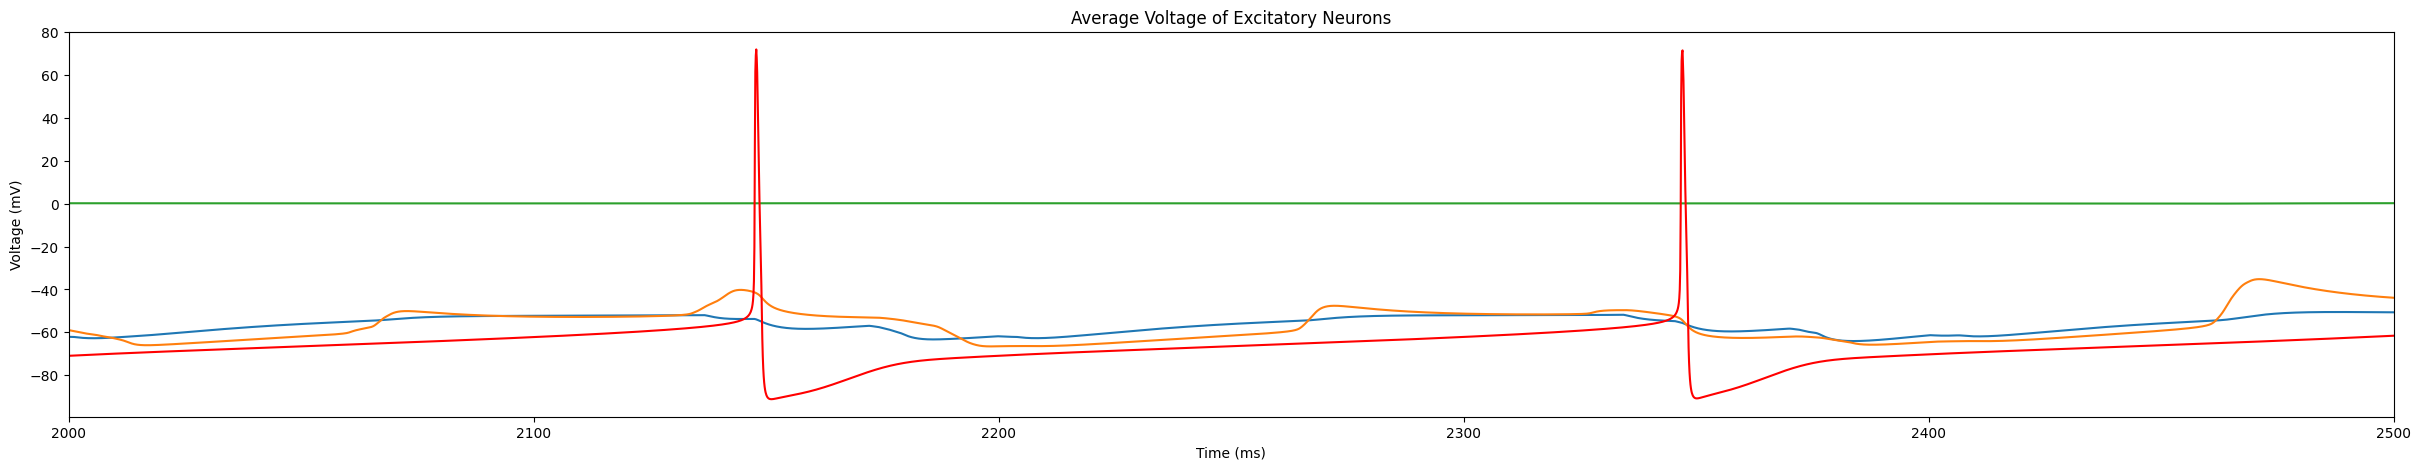

In [841]:
# Average voltage
idx_NO = np.arange(NE + NI, NE + NI + NO)
i_NO = np.random.choice(idx_NO)
V_avg = np.mean(V[:, :NE], axis=1)
Vd_avg = np.mean(Vd[:, :NE], axis=1)
Z_avg = np.mean(Z[:, :NE], axis=1)
plt.figure(figsize=(30, 5))
plt.plot(t, Vd_avg)
plt.plot(t, V_avg)
plt.plot(t, Z_avg)
plt.plot(t, V[:, i_NO], label=f'NO {i_NO+1}', color='red')
plt.axvline(x=1000, color='gray', linestyle='--', label='Seperation') 
#plt.ylim(0, .3)
plt.xlim(2000,2500)
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.title('Average Voltage of Excitatory Neurons')
plt.savefig("V_avg_plot.png", dpi=300, bbox_inches='tight')
plt.show()

In [1562]:
### AVERAGE FIRING RATES ###

tot_spikes_E = 0
tot_spikes_E2 = 0
tot_spikes_I = 0
tot_spikes_O = 0

for k in range(NE):
    spike_per_neuron = len(spike_times[spike_times[:, k] != 0, k])
    tot_spikes_E += spike_per_neuron
for k in range(NE2):
    spike_per_neuron = len(spike_times[spike_times[:, NE+k] != 0, NE+k])
    tot_spikes_E2 += spike_per_neuron
for k in range(NI):
    spike_per_neuron = len(spike_times[spike_times[:, NE+NE2+k] != 0, NE+NE2+k])
    tot_spikes_I += spike_per_neuron
for k in range(NO):
    spike_per_neuron = len(spike_times[spike_times[:, NE+NE2+NI+k] != 0, NE+NE2+NI+k])
    tot_spikes_O += spike_per_neuron
       
print(" total spikes Excitatory: ", tot_spikes_E)
print(" Average firing rate Excitatory: ", 1000*(tot_spikes_E/(t_max*NE)), " Hz")
print(" total spikes Excitatory2: ", tot_spikes_E2)
print(" Average firing rate Excitatory2: ", 1000*(tot_spikes_E2/(t_max*NE2)), " Hz")
print(" total spikes inhibitory: ", tot_spikes_I)
print(" Average firing rate Inhibitory: ", 1000*(tot_spikes_I/(t_max*NI)), " Hz")
print(" total spikes OLM: ", tot_spikes_O)
print(" Average firing rate OLM: ", 1000*(tot_spikes_O/(t_max*NO)), " Hz")


 total spikes Excitatory:  134
 Average firing rate Excitatory:  44.666666666666664  Hz
 total spikes Excitatory2:  199
 Average firing rate Excitatory2:  66.33333333333333  Hz
 total spikes inhibitory:  116
 Average firing rate Inhibitory:  19.333333333333336  Hz
 total spikes OLM:  33
 Average firing rate OLM:  5.5  Hz


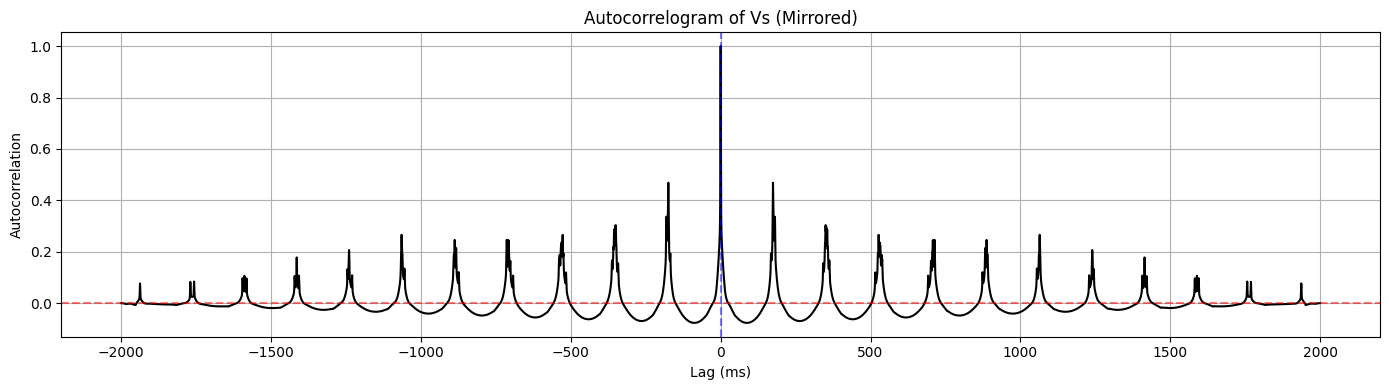

In [521]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate
idx_NO = np.arange(NE + NI, NE + NI + NO)
i_NO = np.random.choice(idx_NO)
# Normalize Vs
Vs_normalized = (V[:, i_NO] - np.mean(V[:, i_NO])) / np.std(V[:, i_NO])

# Full autocorrelation (both positive and negative lags)
autocorr_full = correlate(Vs_normalized, Vs_normalized, mode='full')
autocorr_full = autocorr_full / len(V[:, i_NO])

# Create lags for both sides
lags_full = np.arange(-len(V[:, i_NO])+1, len(V[:, i_NO])) * dt

plt.figure(figsize=(14, 4))
plt.plot(lags_full, autocorr_full, color='black')
plt.xlabel('Lag (ms)')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelogram of Vs (Mirrored)')
plt.axhline(0, color='red', linestyle='--', alpha=0.5)
plt.axvline(0, color='blue', linestyle='--', alpha=0.5)
plt.grid(True)
plt.tight_layout()
plt.show()

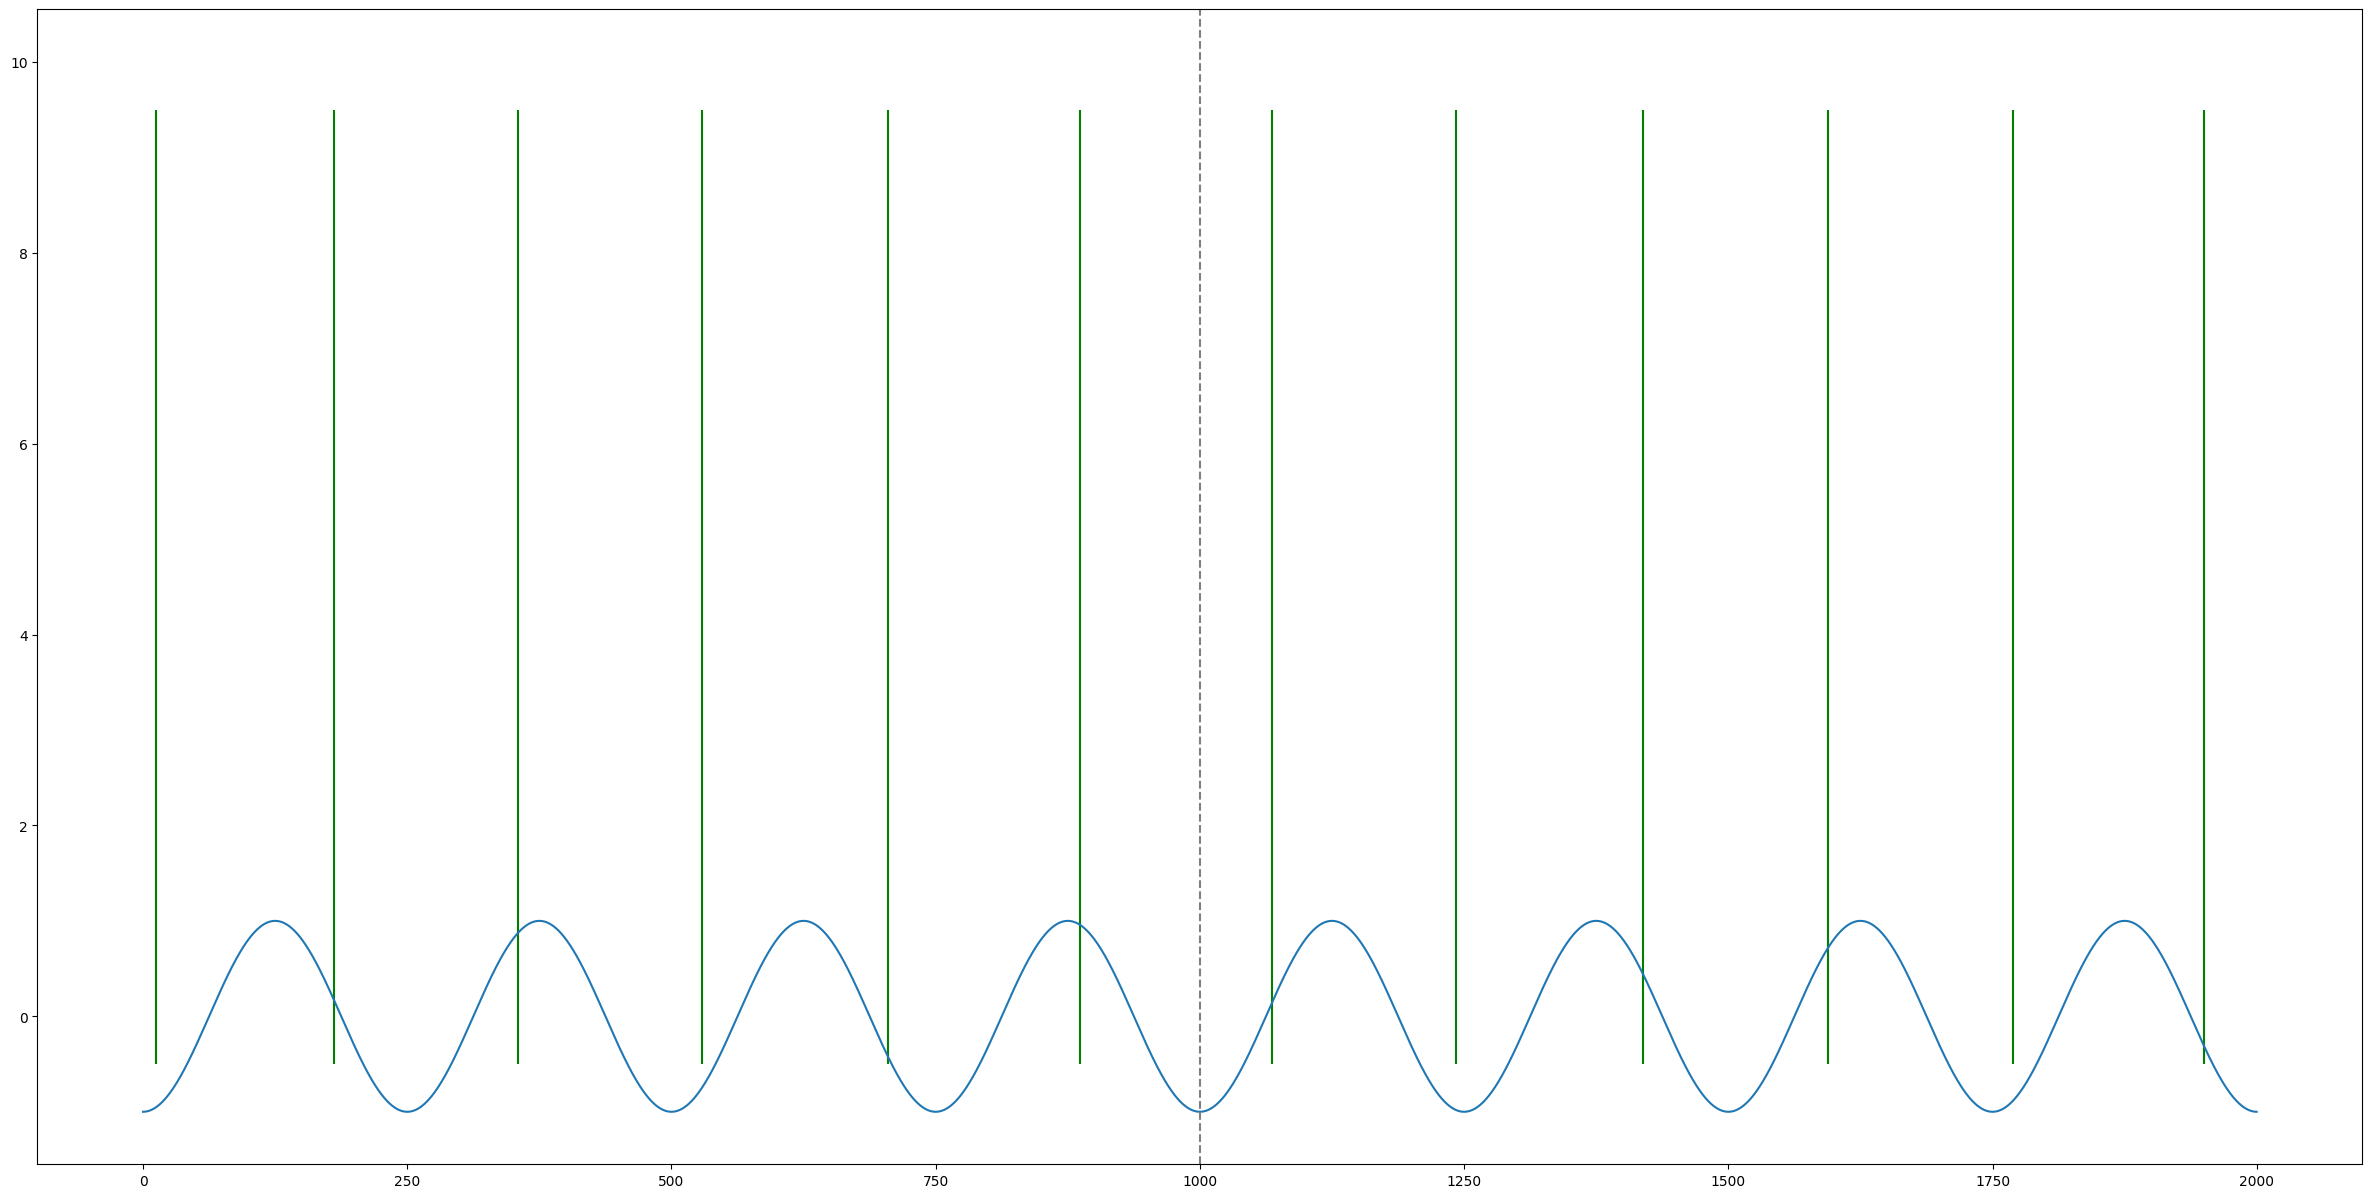

In [514]:
# Raster plot
phase = np.array([zap_input(i, 4, dt) for i in range(N)])

rast = [spike_times[spike_times[:, i] != 0, i] for i in range(NE + NI + NO)]
rast_colors = ['red']*NE + ['blue']*NI + ['green']*NO
plt.figure(figsize=(30, 15))
plt.eventplot(rast, colors=rast_colors)
plt.plot(t,phase)
# plt.plot(t,Iapp_I+120)
plt.axvline(x=1000, color='gray', linestyle='--', label='Seperation') 
plt.savefig("raster_plot.png", dpi=300, bbox_inches='tight')
plt.show()

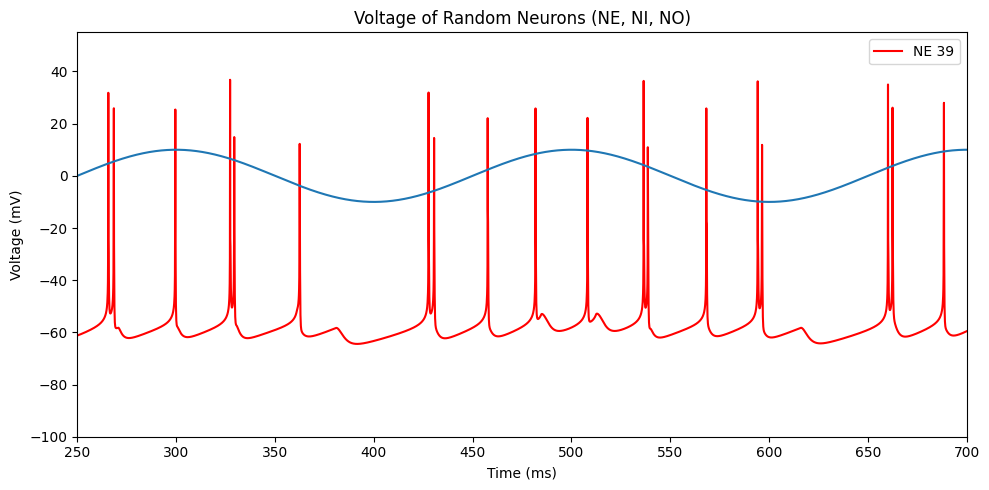

In [637]:
idx_NE = np.arange(0, NE)

i_NE = np.random.choice(idx_NE)
plt.figure(figsize=(10, 5))
plt.plot(t, V[:, i_NE], label=f'NE {i_NE+1}', color='red')

plt.plot(t,10*phase)
#plt.plot(t,10*Iapp_I)
plt.ylim(-100, 55)
plt.xlim(250, 700)
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.title('Voltage of Random Neurons (NE, NI, NO)')
plt.legend()
plt.tight_layout()
plt.savefig("V_all_random.png", dpi=300, bbox_inches='tight')
plt.show()

IndexError: index 42 is out of bounds for axis 1 with size 10

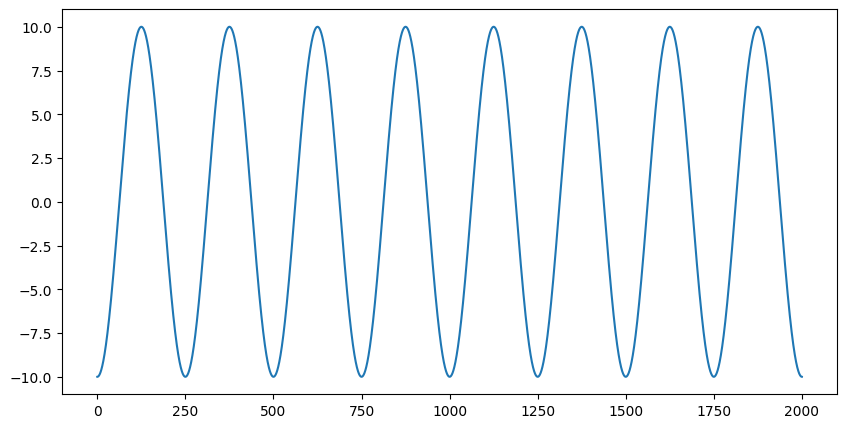

In [ ]:
# Indices for each population
idx_NE = np.arange(0, NE)
idx_NI = np.arange(NE, NE + NI)
idx_NO = np.arange(NE + NI, NE + NI + NO)
# Choose one random neuron from each population
i_NE = np.random.choice(idx_NE)
i_NI = np.random.choice(idx_NI)
i_NO = np.random.choice(idx_NO)

# ---- Plot random NE neuron ----
plt.figure(figsize=(10, 5))
plt.plot(t,10*phase)
#plt.plot(t,10*Iapp_I)
plt.plot(t, V[:, i_NE], label=f'NE {i_NE+1}', color='red')
plt.ylim(-100, 55)
plt.xlim(000, 4000)
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.title('Voltage of Random NE Neuron')
plt.legend()
plt.tight_layout()
plt.savefig("V_NE_plot.png", dpi=300, bbox_inches='tight')
plt.show()

# ---- Plot random NE, NI, NO neurons together ----
plt.figure(figsize=(10, 5))
plt.plot(t, V[:, i_NE], label=f'NE {i_NE+1}', color='red')
plt.plot(t, V[:, i_NI], label=f'NI {i_NI-NE+1}', color='blue',alpha = 0.5)
plt.plot(t, V[:, i_NO], label=f'NO {i_NO-NE-NI+1}', color='green')
plt.plot(t,10*phase)
#plt.plot(t,10*Iapp_I)
plt.ylim(-100, 55)
plt.xlim(0, 1000)
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.title('Voltage of Random Neurons (NE, NI, NO)')
plt.legend()
plt.tight_layout()
plt.savefig("V_all_random.png", dpi=300, bbox_inches='tight')
plt.show()

# ---- Plot random NI neuron ----
plt.figure(figsize=(10, 5))
plt.plot(t, V[:, i_NI], label=f'NI {i_NI-NE+1}', color='blue')
#plt.plot(t,10*Iapp_I)
plt.ylim(-100, 55)
plt.xlim(0, 1000)
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.title('Voltage of Random NI Neuron')
plt.legend()
plt.tight_layout()
plt.savefig("V_NI_plot.png", dpi=300, bbox_inches='tight')
plt.show()

# ---- Plot random NO neuron ----
plt.figure(figsize=(10, 5))
plt.plot(t, V[:, i_NO], label=f'NO {i_NO-NE-NI+1}', color='green')
plt.plot(t,10*phase)
plt.ylim(-100, 55)
plt.xlim(000, 1000)
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.title('Voltage of Random NO Neuron')
plt.legend()
plt.tight_layout()
plt.savefig("V_NO_plot.png", dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
# def RTM2_Neuron_update(j, t, V, Vd, h, n, rv, Z, B, H, C, Ca_acum, Q,
#                       Iapp, s_E, s_I, s_O, EE, IE, OE, p_EE, p_IE, p_OE, NE, NI, NO, nested,noise=0, dt=0.1):
  
#     # Store previous values for gating updates
#     V_prev, Vd_prev, Ca_prev = V.copy(), Vd.copy(), Ca_acum.copy()

#     # Parameters 
#     Cm = 1.0
#     El = -58 #-56
#     Gl, Gl2 = 0.1, 0.1
#     Ena, Ek, Eh = 60, -75, -32.9
#     Gna, Gk, Gnap = 75, 20, 0.1
#     Gna2, Gk2 = 0, 0
#     Gm, Gh = 3,1#1,3 # 3,1
#     Gsd, Gds = 0.2, 0.02  # soma-dendrite coupling
#     # External applied current
#     Amp_Vs, Amp_Vd = 0,1

#     # Synapse Stuff
#     if nested == 1:
#         g_EE = 0.0 # mS/cm^2
#         g_IE = 0.3 #0.25 # mS/cm^2
#         g_OE = 0.5 # mS/cm^2
    
#     # g_EI = 0.02
#     # g_EO = 0.1

#     else:
#         g_EE = 0.0 # mS/cm^2
#         g_IE = 0 # mS/cm^2
#         g_OE = 0.0 # mS/cm^2

#     # g_EI = 0
#     # g_EO = 0

#     tau_rise = 0.5 # ms
#     tau_decay = 3.0 # ms
#     tau_peak = 0.5 # ms

#     if p_EE > 0:
#         g_bar_EE = g_EE * EE / (p_EE * NE)
#     else:
#         g_bar_EE = np.zeros(NE)
#     if p_IE > 0:
#         g_bar_IE = g_IE * IE / (p_IE * NI)
#     else:
#         g_bar_IE = np.zeros(NE)
#     if p_OE > 0:
#         g_bar_OE = g_OE * OE / (p_OE * NO)
#     else:
#         g_bar_OE = np.zeros(NO)


#     E_syn_I = -75.0 # mV
#     E_syn_E = 0.0 # mV
#     I_syn_E = 0.0
#     E_syn_O = -75.0 # mV
#     O_syn_E = 0

#     amp_noise = 0

  
#     k1Vs = (-Gl*(V-El) - Gna*(minf(V)**3)*h*(V-Ena) - Gnap*pinf(V)*(V-Ena)
#              - Gk*(n**4)*(V-Ek) - Gm*Z*(V-Ek) - Gsd*(V-Vd) + Amp_Vs*Iapp
#              - np.sum(np.multiply(g_bar_EE, s_E)) * (V - E_syn_E) 
#              - np.sum(np.multiply(g_bar_IE, s_I)) * (V - E_syn_I)+noise)/Cm
    
#     k1Vd = (-Gl2*(Vd-El) - Gh*H*(Vd-Eh) - Gds*(Vd-V)
#              - Gna2*(minf(Vd)**3)*rv*(Vd-Ena) - Gk2*(rv**4)*(Vd-Ek) + Amp_Vd*Iapp
#              - np.sum(np.multiply(g_bar_OE, s_O)) * (Vd - E_syn_O)+noise)/Cm

#     k1h = (hinf(V_prev) - h)/tauh(V_prev)
#     k1n = (ninf(V_prev) - n)/taun(V_prev)
#     k1rv = (rinf(V_prev) - rv)
#     k1Z = (Zinf(V_prev) - Z)/75
#     k1B = (Binf(V_prev) - B)/15
#     k1H = (Hinf(Vd_prev) - H)/tauH(Vd_prev)
#     k1C = (cinf(V_prev) - C)/2
#     k1Ca = (-0.13*(0*rv**2)*(V_prev-120) - Ca_acum)/13
#     k1Q = (Qinf(Ca_prev) - Q)/450

#     V1 = V + k1Vs*dt
#     Vd1 = Vd + k1Vd*dt
#     h1 = h + k1h*dt
#     n1 = n + k1n*dt
#     rv1 = rv + k1rv*dt
#     Z1 = Z + k1Z*dt
#     B1 = B + k1B*dt
#     H1 = H + k1H*dt
#     C1 = C + k1C*dt
#     Ca1 = Ca_acum + k1Ca*dt
#     Q1 = Q + k1Q*dt

#     k2Vs = (-Gl*(V1-El) - Gna*(minf(V1)**3)*h1*(V1-Ena) - Gnap*pinf(V1)*(V1-Ena)
#              - Gk*(n1**4)*(V1-Ek) - Gm*Z1*(V1-Ek) - Gsd*(V1-Vd1) + Amp_Vs*Iapp
#              - np.sum(np.multiply(g_bar_EE, s_E)) * (V - E_syn_E) 
#              - np.sum(np.multiply(g_bar_IE, s_I)) * (V - E_syn_I)+noise)/Cm
    
#     k2Vd = (-Gl2*(Vd1-El) - Gh*H1*(Vd1-Eh) - Gds*(Vd1-V1)
#              - Gna2*(minf(Vd1)**3)*rv1*(Vd1-Ena) - Gk2*(rv1**4)*(Vd1-Ek) + Amp_Vd*Iapp
#              - np.sum(np.multiply(g_bar_OE, s_O)) * (Vd - E_syn_O)+noise)/Cm

#     k2h = (hinf(V1) - h1)/tauh(V1)
#     k2n = (ninf(V1) - n1)/taun(V1)
#     k2rv = (rinf(V1) - rv1)
#     k2Z = (Zinf(V1) - Z1)/75
#     k2B = (Binf(V1) - B1)/15
#     k2H = (Hinf(Vd1) - H1)/tauH(Vd1)
#     k2C = (cinf(V1) - C1)/2
#     k2Ca = (-0.13*(0*rv1**2)*(V1-120) - Ca1)/13
#     k2Q = (Qinf(Ca1) - Q1)/450

#     # Update variables
#     V += 0.5*(k1Vs + k2Vs)*dt
#     Vd += 0.5*(k1Vd + k2Vd)*dt
#     h += 0.5*(k1h + k2h)*dt
#     n += 0.5*(k1n + k2n)*dt
#     rv += 0.5*(k1rv + k2rv)*dt
#     Z += 0.5*(k1Z + k2Z)*dt
#     B += 0.5*(k1B + k2B)*dt
#     H += 0.5*(k1H + k2H)*dt
#     C += 0.5*(k1C + k2C)*dt
#     Ca_acum += 0.5*(k1Ca + k2Ca)*dt
#     Q += 0.5*(k1Q + k2Q)*dt

#     tau_rise, tau_decay, tau_peak = 0.5, 3.0, 0.5
#     s_E[j] += (np.exp(-t/tau_peak)*(1-s_E[j])/tau_rise - s_E[j]/tau_decay)*dt

#     return V, h, n, s_E[j], Vd, rv, Z, B, H, C, Ca_acum, Q
